In [1]:
import numpy as np
import pandas as pd

from scipy.stats import norm, skew, kurtosis

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder, OneHotEncoder, StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 1) Loading Data

In [2]:
df = pd.read_csv("data.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
df.drop(['Id'], axis=1, inplace=True)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [4]:
df1 = df.copy()

# 2) Missing Values

In [5]:
def missing_vals(df):
    
    missing = df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False).values
    
    percentage = (df.isna().mean()*100)[df.isna().mean()*100 > 0].sort_values(ascending=False).values
    
    names = df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False).index
    
    dtypes = df[names].dtypes.values
    
    data = np.array([dtypes, missing, percentage]).T
    
    return pd.DataFrame(data=data, index=names, columns=['Dtypes', '#Missing Values', '%Missing Values'])

In [6]:
missing_vals(df1)

Dtypes #Missing Values %Missing Values
PoolQC         object            1453       99.520548
MiscFeature    object            1406        96.30137
Alley          object            1369       93.767123
Fence          object            1179       80.753425
FireplaceQu    object             690       47.260274
LotFrontage   float64             259       17.739726
GarageType     object              81        5.547945
GarageYrBlt   float64              81        5.547945
GarageFinish   object              81        5.547945
GarageQual     object              81        5.547945
GarageCond     object              81        5.547945
BsmtExposure   object              38         2.60274
BsmtFinType2   object              38         2.60274
BsmtFinType1   object              37        2.534247
BsmtCond       object              37        2.534247
BsmtQual       object              37        2.534247
MasVnrArea    float64               8        0.547945
MasVnrType     object               8        0.547945
Electrical     object               1        0.068493

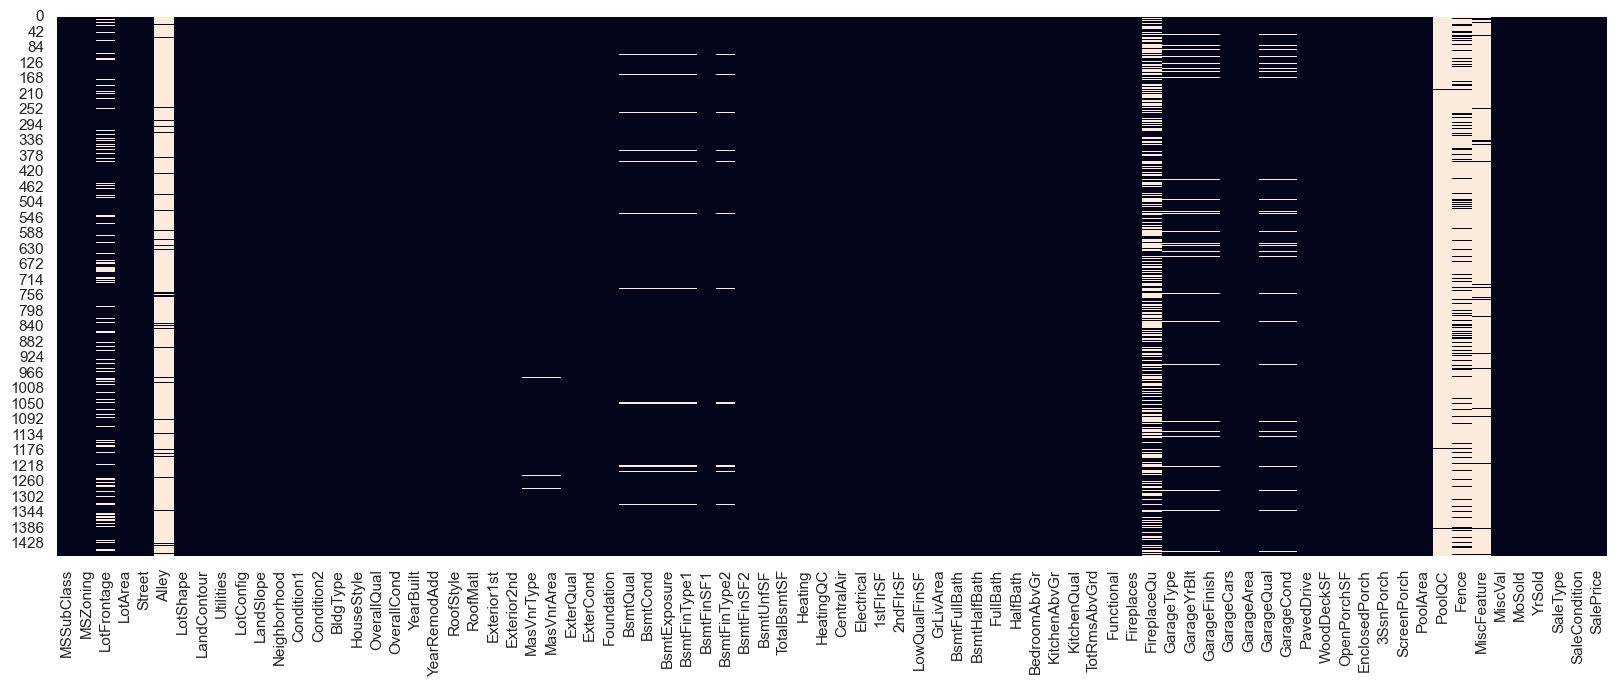

In [7]:
plt.figure(figsize=(20, 7))
sns.heatmap(df1.isna(), cbar=False)
plt.show()

In [8]:
fill_zero = ['MasVnrArea', 'GarageArea', 'GarageYrBlt']
df1[fill_zero] = SimpleImputer(strategy='constant', fill_value=0).fit_transform(df1[fill_zero])

change_cat = ['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold', 'OverallQual', 'OverallCond']
df1[change_cat] = df1[change_cat].astype(object)

fill_none = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'MasVnrType']
df1[fill_none] = SimpleImputer(strategy='constant', fill_value='None').fit_transform(df1[fill_none])

delete_rows = ['Electrical']
df1.dropna(axis=0, subset=delete_rows, inplace=True)

fill_num = ['LotFrontage']
knn_imputer = KNNImputer(n_neighbors=5)
df1[fill_num] = knn_imputer.fit_transform(df1[fill_num])

In [9]:
missing_vals(df1)

Empty DataFrame
Columns: [Dtypes, #Missing Values, %Missing Values]
Index: []

In [10]:
df2 = df1.copy()

# 3) Feature Engineering

In [11]:
# Square per Room
df2["SqFtPerRoom"] = df2["GrLivArea"] / (df2["TotRmsAbvGrd"] + df2["FullBath"] + df2["HalfBath"] + df2["KitchenAbvGr"])

# Total Home Quality
df2['Total_Home_Quality'] = df2['OverallQual'] + df2['OverallCond']

# Total Bathrooms
df2['Total_Bathrooms'] = (df2['FullBath'] + (0.5*df2['HalfBath']) + df2['BsmtFullBath'] + (0.5*df2['BsmtHalfBath']))

# HighQualSF
df2["HighQualSF"] = df2["1stFlrSF"] + df2["2ndFlrSF"]

In [12]:
df3 = df2.copy()

# 4) Target Transformation

In [13]:
def skew_kurtosis(df):
    
    numeric_features = df.dtypes[df.dtypes != 'object'].index
    
    skewness_vals = df[numeric_features].apply(axis=0, func=lambda x: skew(x)).values
    
    kurtosis_vals = df[numeric_features].apply(axis=0, func=lambda x: kurtosis(x)).values
    
    data = np.array([skewness_vals, kurtosis_vals]).T
    
    return pd.DataFrame(data=data, index=numeric_features, columns=['Skewness', 'Kurtosis'])

In [14]:
skew_kurtosis(df3[['SalePrice']])

Skewness  Kurtosis
SalePrice  1.880008  6.502799

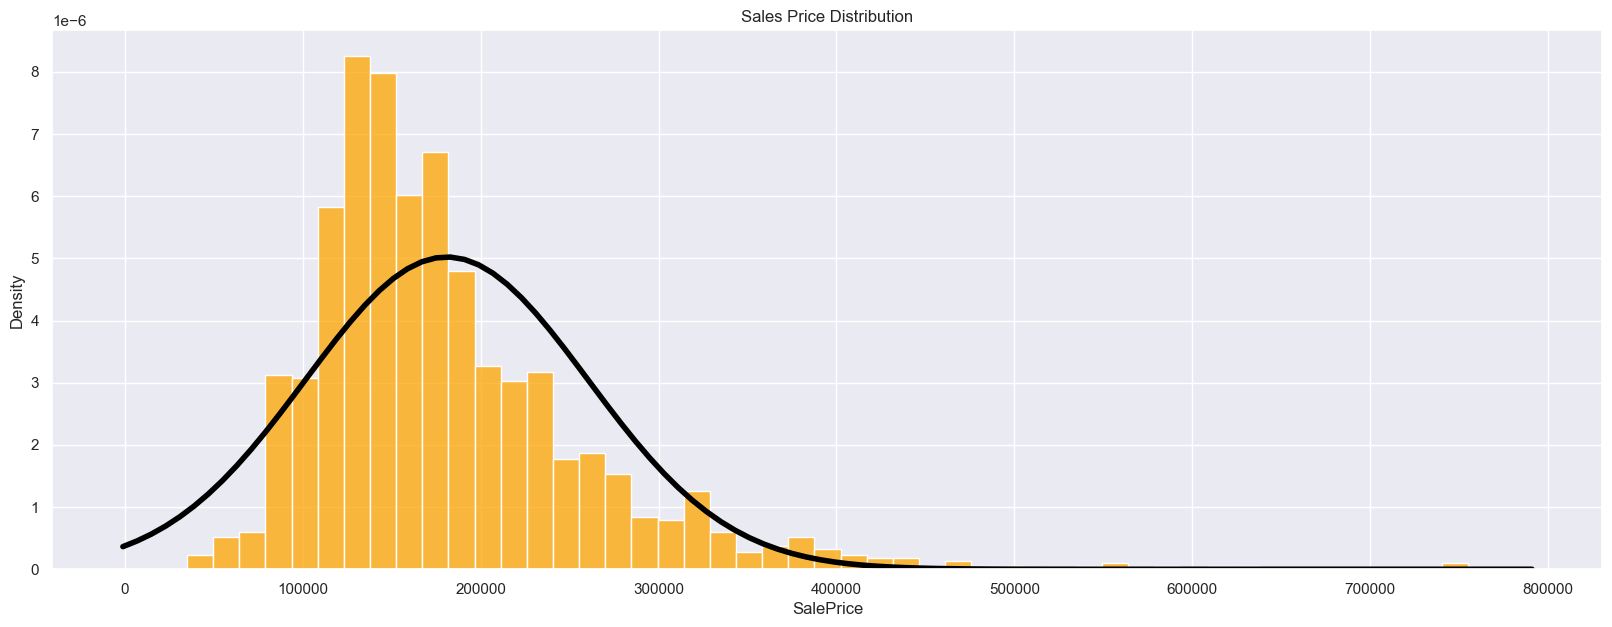

In [15]:
plt.figure(figsize=(20, 7))
ax = sns.histplot(df3['SalePrice'], stat='density', color='orange')
mu, std = norm.fit(df3['SalePrice'])
xx = np.linspace(*ax.get_xlim(),100)
plt.title('Sales Price Distribution')
ax.plot(xx, norm.pdf(xx, mu, std), c='black', lw=4)
plt.show()

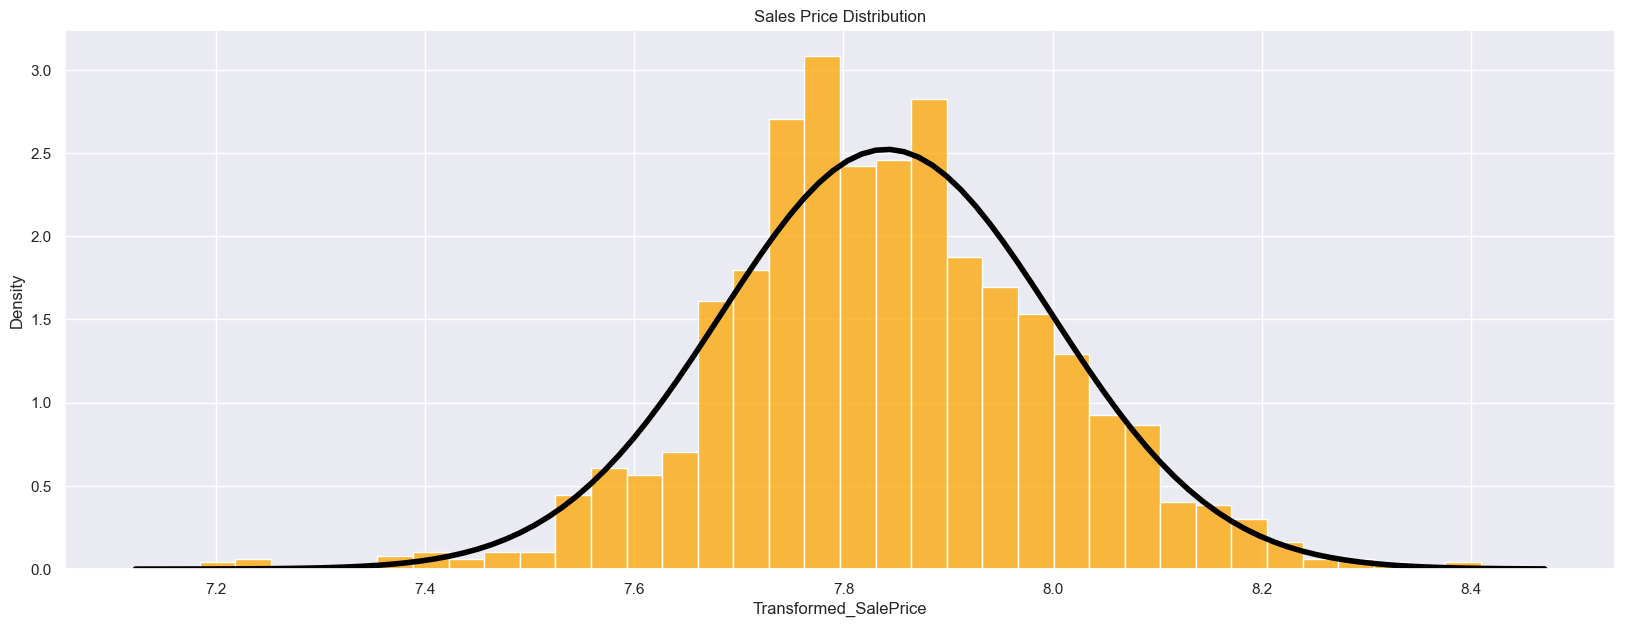

In [16]:
target_transformer = PowerTransformer(method='yeo-johnson', standardize=False)

df3['Transformed_SalePrice'] = target_transformer.fit_transform(df3[['SalePrice']]).T[0]

plt.figure(figsize=(20, 7))
ax2 = sns.histplot(df3['Transformed_SalePrice'], stat='density', color='orange')
mu2, std2 = norm.fit(df3['Transformed_SalePrice'])
xx2 = np.linspace(*ax2.get_xlim(),100)
plt.title('Sales Price Distribution')
ax2.plot(xx2, norm.pdf(xx2, mu2, std2), c='black', lw=4)
plt.show()

In [17]:
df3.drop(['SalePrice'], axis=1, inplace=True)
df4 = df3.copy()

# 5) Features Transformation

In [18]:
skew_kurtosis(df4.drop(['Transformed_SalePrice'], axis=1))

Skewness    Kurtosis
LotFrontage       2.382060   21.754015
LotArea          12.190881  202.402120
MasVnrArea        2.673798   10.095230
BsmtFinSF1        1.683465   11.079615
BsmtFinSF2        4.249219   20.023898
BsmtUnfSF         0.918367    0.466639
TotalBsmtSF       1.525190   13.232154
1stFlrSF          1.375089    5.724629
2ndFlrSF          0.813466   -0.554484
LowQualFinSF      8.998885   82.885802
GrLivArea         1.364297    4.868582
BsmtFullBath      0.594354   -0.841470
BsmtHalfBath      4.097541   16.322022
FullBath          0.037821   -0.858040
HalfBath          0.677275   -1.073973
BedroomAbvGr      0.211839    2.215847
KitchenAbvGr      4.482026   21.436776
TotRmsAbvGrd      0.676068    0.872000
Fireplaces        0.647913   -0.221309
GarageCars       -0.341494    0.214062
GarageArea        0.179081    0.907592
WoodDeckSF        1.539362    2.974720
OpenPorchSF       2.361099    8.452397
EnclosedPorch     3.085342   10.381118
3SsnPorch        10.290132  123.147774
ScreenPorch       4.116334   18.356321
PoolArea         14.807992  222.344724
MiscVal          24.443278  698.121807
SqFtPerRoom       0.980318    2.875496
Total_Bathrooms   0.265074   -0.138523
HighQualSF        1.328266    4.853191

In [19]:
skewed_values = skew_kurtosis(df4.drop(['Transformed_SalePrice'], axis=1))

threshold = (np.abs(skewed_values['Skewness']) < 2) | (np.abs(skewed_values['Kurtosis']) < 7)

skewed_values[threshold]

Skewness   Kurtosis
BsmtFinSF1       1.683465  11.079615
BsmtUnfSF        0.918367   0.466639
TotalBsmtSF      1.525190  13.232154
1stFlrSF         1.375089   5.724629
2ndFlrSF         0.813466  -0.554484
GrLivArea        1.364297   4.868582
BsmtFullBath     0.594354  -0.841470
FullBath         0.037821  -0.858040
HalfBath         0.677275  -1.073973
BedroomAbvGr     0.211839   2.215847
TotRmsAbvGrd     0.676068   0.872000
Fireplaces       0.647913  -0.221309
GarageCars      -0.341494   0.214062
GarageArea       0.179081   0.907592
WoodDeckSF       1.539362   2.974720
SqFtPerRoom      0.980318   2.875496
Total_Bathrooms  0.265074  -0.138523
HighQualSF       1.328266   4.853191

In [20]:
skewed_features = skewed_values[threshold].index
skewed_features

parameter_transformer = PowerTransformer(method='yeo-johnson', standardize=False)

df4[skewed_features] = parameter_transformer.fit_transform(df4[skewed_features])

In [21]:
df5 = df4.copy()

# 8) Encoding

## i) Ordinal Encoding

In [22]:
ordinal_features = ['MSSubClass', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Functional', 'Fence', 'GarageFinish', 'LandSlope', 'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'YrSold', 'MoSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'Total_Home_Quality']
ordinal_encoder = OrdinalEncoder()
df5[ordinal_features] = ordinal_encoder.fit_transform(df5[ordinal_features])

In [23]:
standardize_features = df5.dtypes[df5.dtypes != 'object'].index
standardize_features = standardize_features[:-1]

In [24]:
df6 = df5.copy()

## ii) OHE

In [25]:
ohe_features = df6[df6.dtypes[df6.dtypes == 'object'].index].columns
ohe_encoder = OneHotEncoder(sparse=False, drop=None)
ohe_encoded = ohe_encoder.fit_transform(df6[ohe_features])

In [26]:
ohe_categories = []

for i in ohe_encoder.categories_:
    for j in i:
        ohe_categories.append(j)

df6.drop(ohe_features, axis=1, inplace=True)
other_features = df6.columns.values

In [27]:
concatenated_data = np.concatenate((df6.values, ohe_encoded), axis=1)

transformed_data = pd.DataFrame(data=concatenated_data, columns=[*other_features, *ohe_categories])

In [28]:
df7 = transformed_data.copy()

# 9) Scaling

In [29]:
standard_scaler = StandardScaler()

df7[standardize_features] = standard_scaler.fit_transform(df7[standardize_features])

In [30]:
df8 =df7.copy()

# 6) Feature Selection

## i) Correlation Analysis

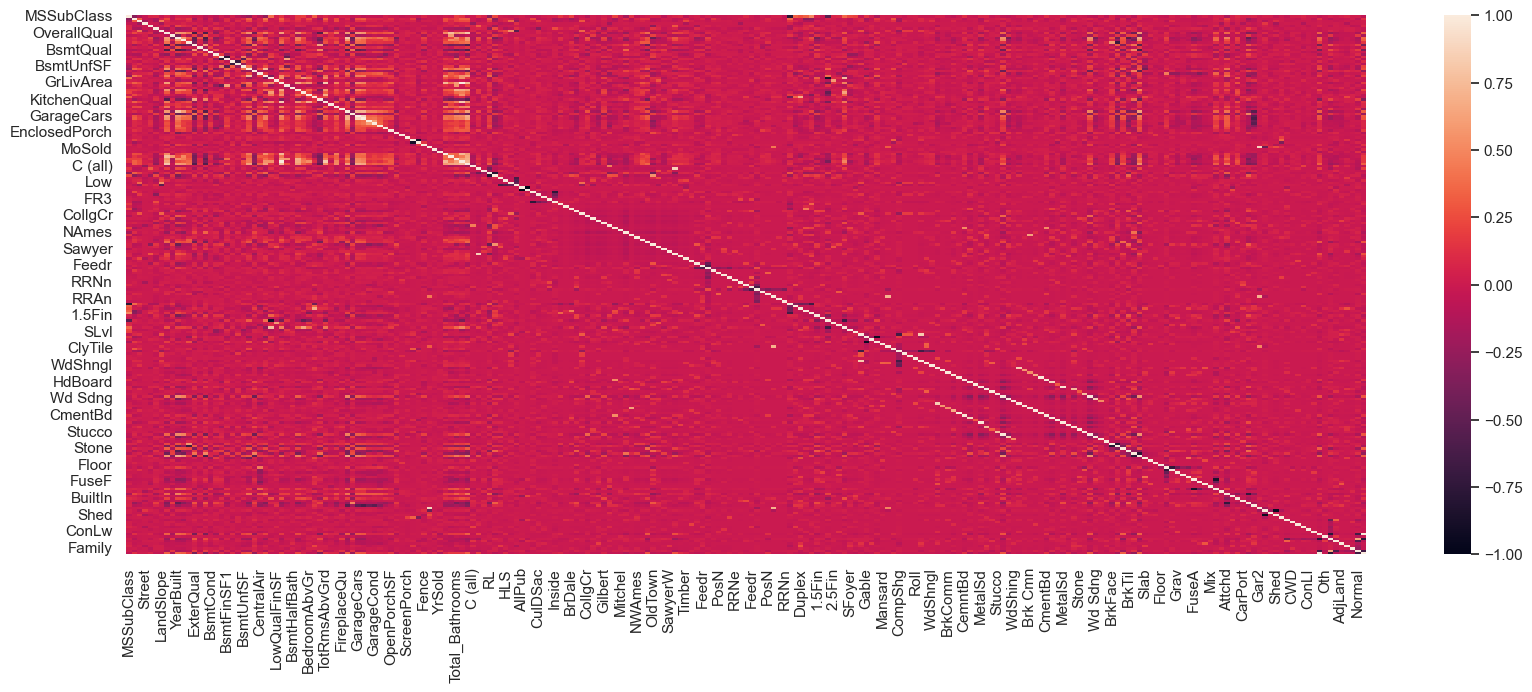

In [31]:
plt.figure(figsize=(20, 7))
sns.heatmap(df8.corr(method='pearson'))
plt.show()

In [32]:
corr = df8.corr(method='pearson')[['Transformed_SalePrice']].sort_values(by=['Transformed_SalePrice'], ascending=False)
corr

Transformed_SalePrice
Transformed_SalePrice               1.000000
OverallQual                         0.815235
HighQualSF                          0.736232
GrLivArea                           0.729388
GarageCars                          0.683783
...                                      ...
GarageFinish                       -0.414034
HeatingQC                          -0.425112
KitchenQual                        -0.526739
BsmtQual                           -0.572155
ExterQual                          -0.574202

[227 rows x 1 columns]

In [33]:
selected_features_1 = corr[(np.abs(corr['Transformed_SalePrice']) <= 1) & (np.abs(corr['Transformed_SalePrice']) >= 0.4)]
features_1 = selected_features_1.index[1:]
selected_features_1

Transformed_SalePrice
Transformed_SalePrice               1.000000
OverallQual                         0.815235
HighQualSF                          0.736232
GrLivArea                           0.729388
GarageCars                          0.683783
Total_Bathrooms                     0.676208
GarageArea                          0.647242
Total_Home_Quality                  0.645402
TotalBsmtSF                         0.611456
1stFlrSF                            0.607305
GarageYrBlt                         0.602061
YearBuilt                           0.599856
SqFtPerRoom                         0.592996
FullBath                            0.592231
YearRemodAdd                        0.567088
TotRmsAbvGrd                        0.538937
PConc                               0.530161
Fireplaces                          0.511809
MasVnrArea                          0.421457
Attchd                              0.419819
GarageFinish                       -0.414034
HeatingQC                          -0.425112
KitchenQual                        -0.526739
BsmtQual                           -0.572155
ExterQual                          -0.574202

In [34]:
df9 = df8[selected_features_1.index].copy()

## ii) Multicollinearity

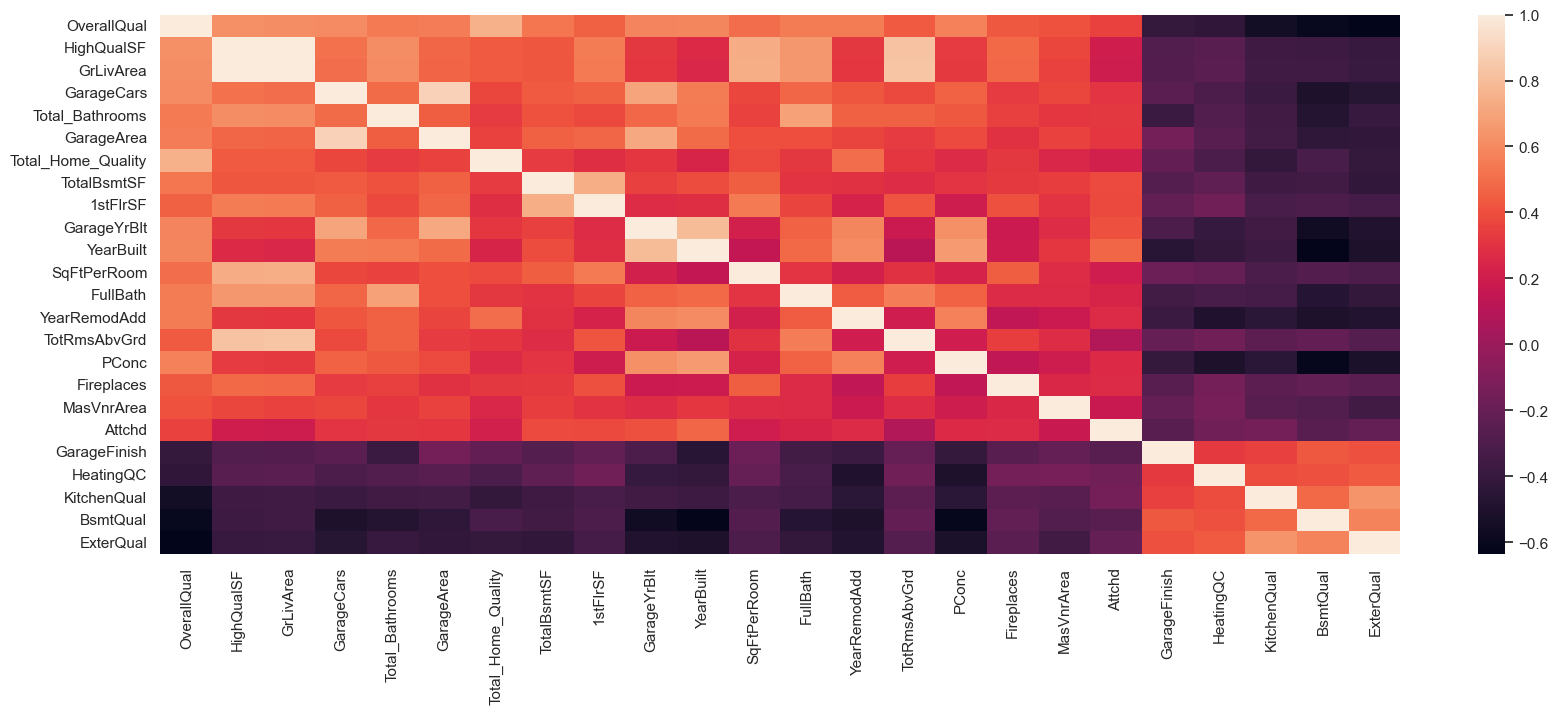

In [35]:
plt.figure(figsize=(20, 7))
sns.heatmap(df9[features_1].corr())
plt.show()

In [36]:
def compute_vif(df, considered_features):
    
    X = df[considered_features]
    X = add_constant(X)
    
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='const']
    
    return vif.sort_values(by=['VIF'], ascending=False)

In [37]:
def reduce_vif(df, threshold, considered_features):
    
    vif = compute_vif(df, considered_features)
    discarded_features = []
    
    while vif.iloc[0, 1] > threshold:
        discarded_features.append(vif.iloc[0, 0])
        vif = compute_vif(df, considered_features.drop(discarded_features))
    
    return vif

In [38]:
compute_vif(df9, features_1)

Variable         VIF
3            GrLivArea  172.929295
2           HighQualSF  111.020176
15        TotRmsAbvGrd   22.159986
12         SqFtPerRoom   18.155202
1          OverallQual    7.166322
6           GarageArea    6.526810
4           GarageCars    5.715406
11           YearBuilt    5.358260
10         GarageYrBlt    5.153571
7   Total_Home_Quality    3.707992
9             1stFlrSF    3.407825
13            FullBath    3.311463
5      Total_Bathrooms    2.881309
8          TotalBsmtSF    2.805675
16               PConc    2.627893
14        YearRemodAdd    2.562225
24           ExterQual    2.399325
23            BsmtQual    2.281713
22         KitchenQual    1.963198
21           HeatingQC    1.558463
20        GarageFinish    1.540274
19              Attchd    1.531702
17          Fireplaces    1.518575
18          MasVnrArea    1.359740

In [39]:
selected_features_2 = reduce_vif(df9, 5, features_1)
features_2 = selected_features_2['Variable'].to_list()
selected_features_2

Variable       VIF
7            YearBuilt  4.748294
6          GarageYrBlt  4.138371
5             1stFlrSF  3.138479
4          TotalBsmtSF  2.702933
1           GarageCars  2.681481
9             FullBath  2.556512
12               PConc  2.537507
2      Total_Bathrooms  2.488452
10        YearRemodAdd  2.407694
20           ExterQual  2.336097
19            BsmtQual  2.227776
18         KitchenQual  1.946509
11        TotRmsAbvGrd  1.910599
8          SqFtPerRoom  1.803938
3   Total_Home_Quality  1.774004
17           HeatingQC  1.546306
15              Attchd  1.528695
16        GarageFinish  1.504329
13          Fireplaces  1.498017
14          MasVnrArea  1.344485

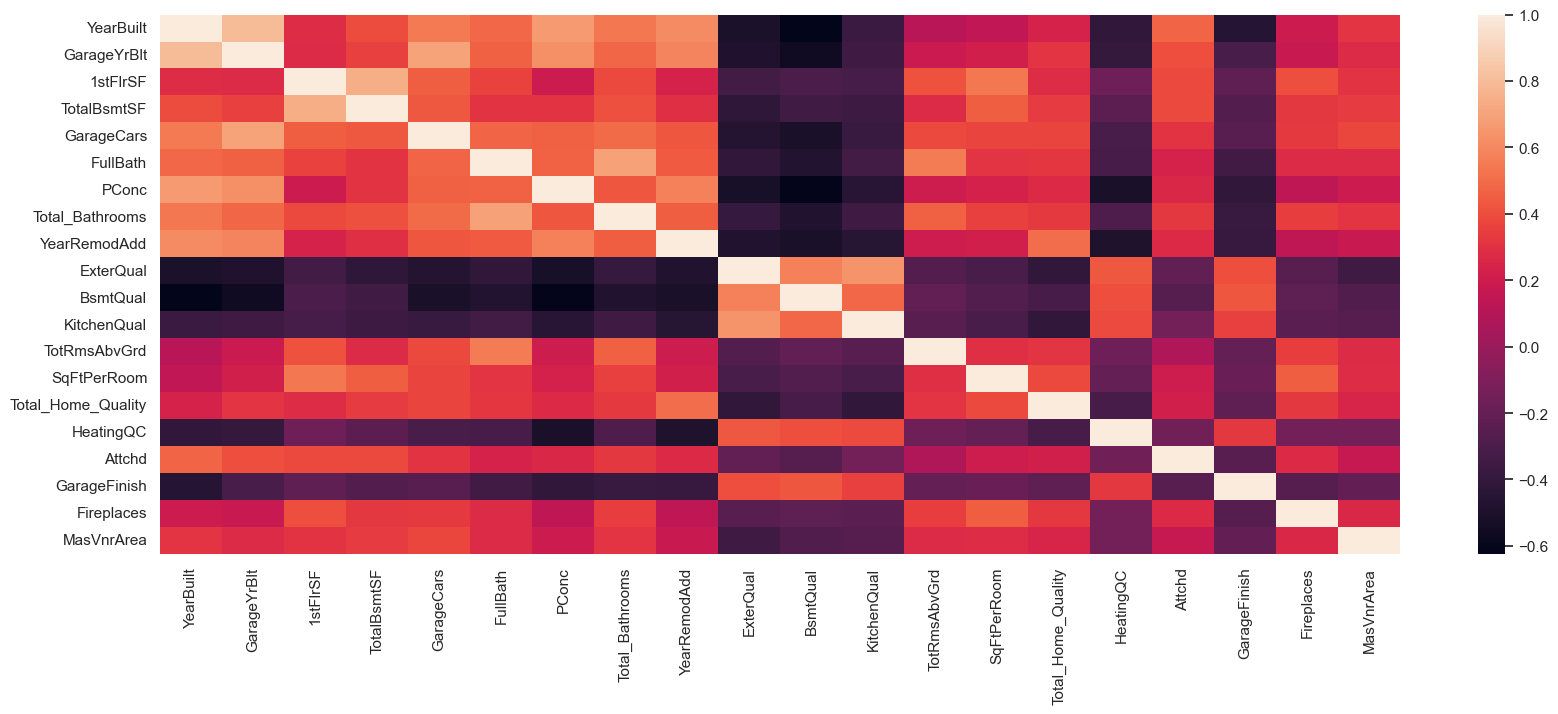

In [40]:
plt.figure(figsize=(20, 7))
sns.heatmap(df9[features_2].corr())
plt.show()

In [41]:
features_2.append('Transformed_SalePrice')
df10 = df9[features_2].copy()

# 7) EDA & Outlier Removal

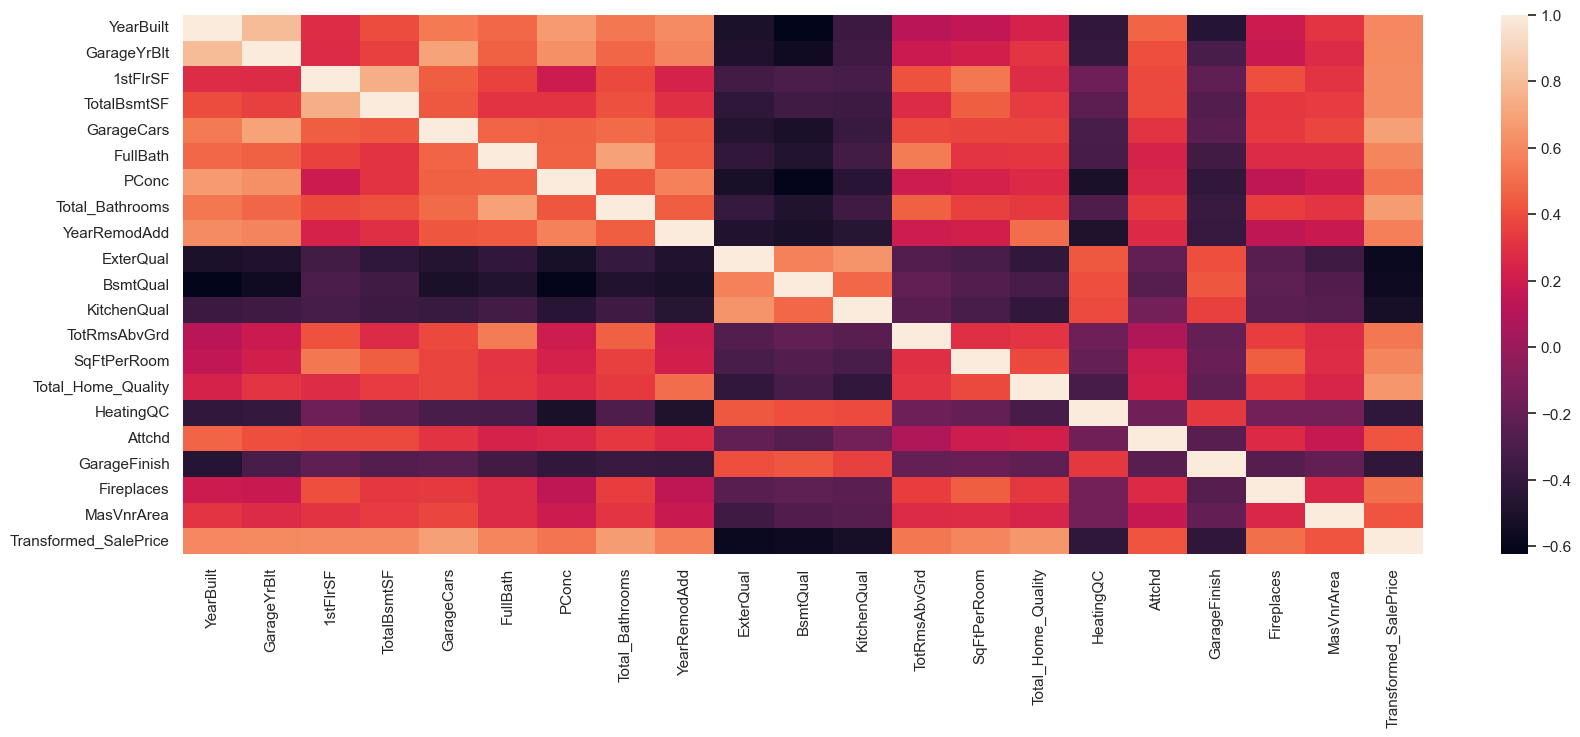

In [42]:
plt.figure(figsize=(20, 7))
sns.heatmap(df10.corr())
plt.show()

In [43]:
def simple_graph(df, x, y):
    
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(20, 21))
    
    sns.histplot(data=df, x=x, ax=ax1)
    sns.regplot(data=df, x=x, y=y, ax=ax2)
    sns.boxplot(data=df, x=x, y=y, ax=ax3)
    
    plt.suptitle(x)
    
    plt.show()
    
    return

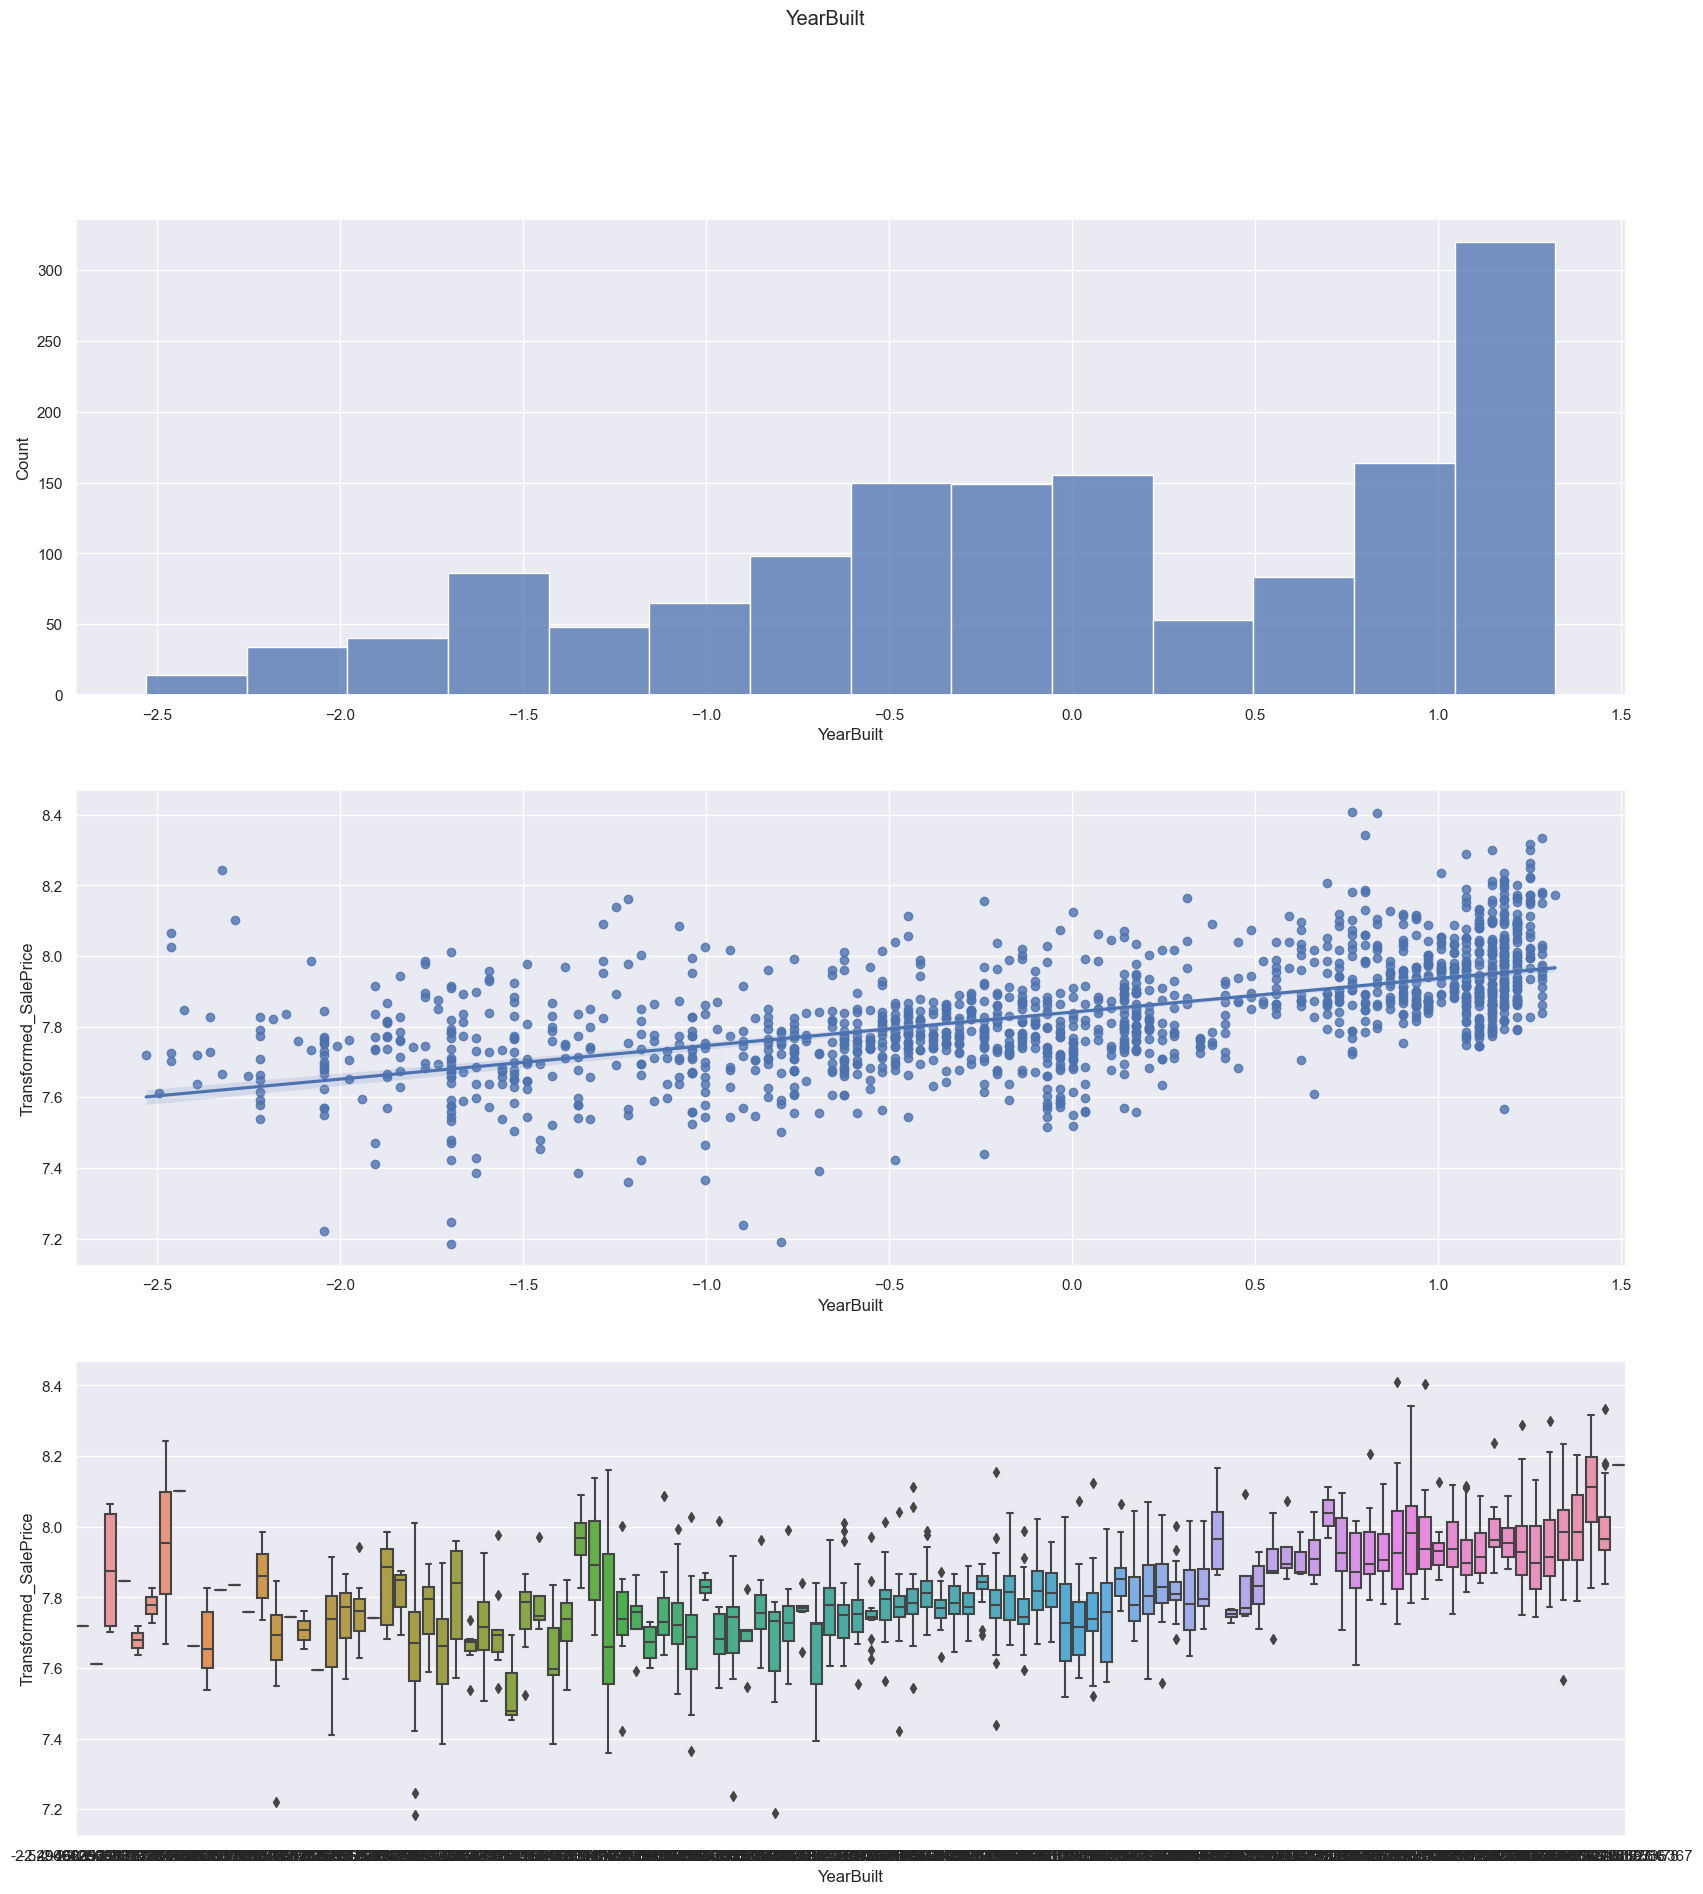

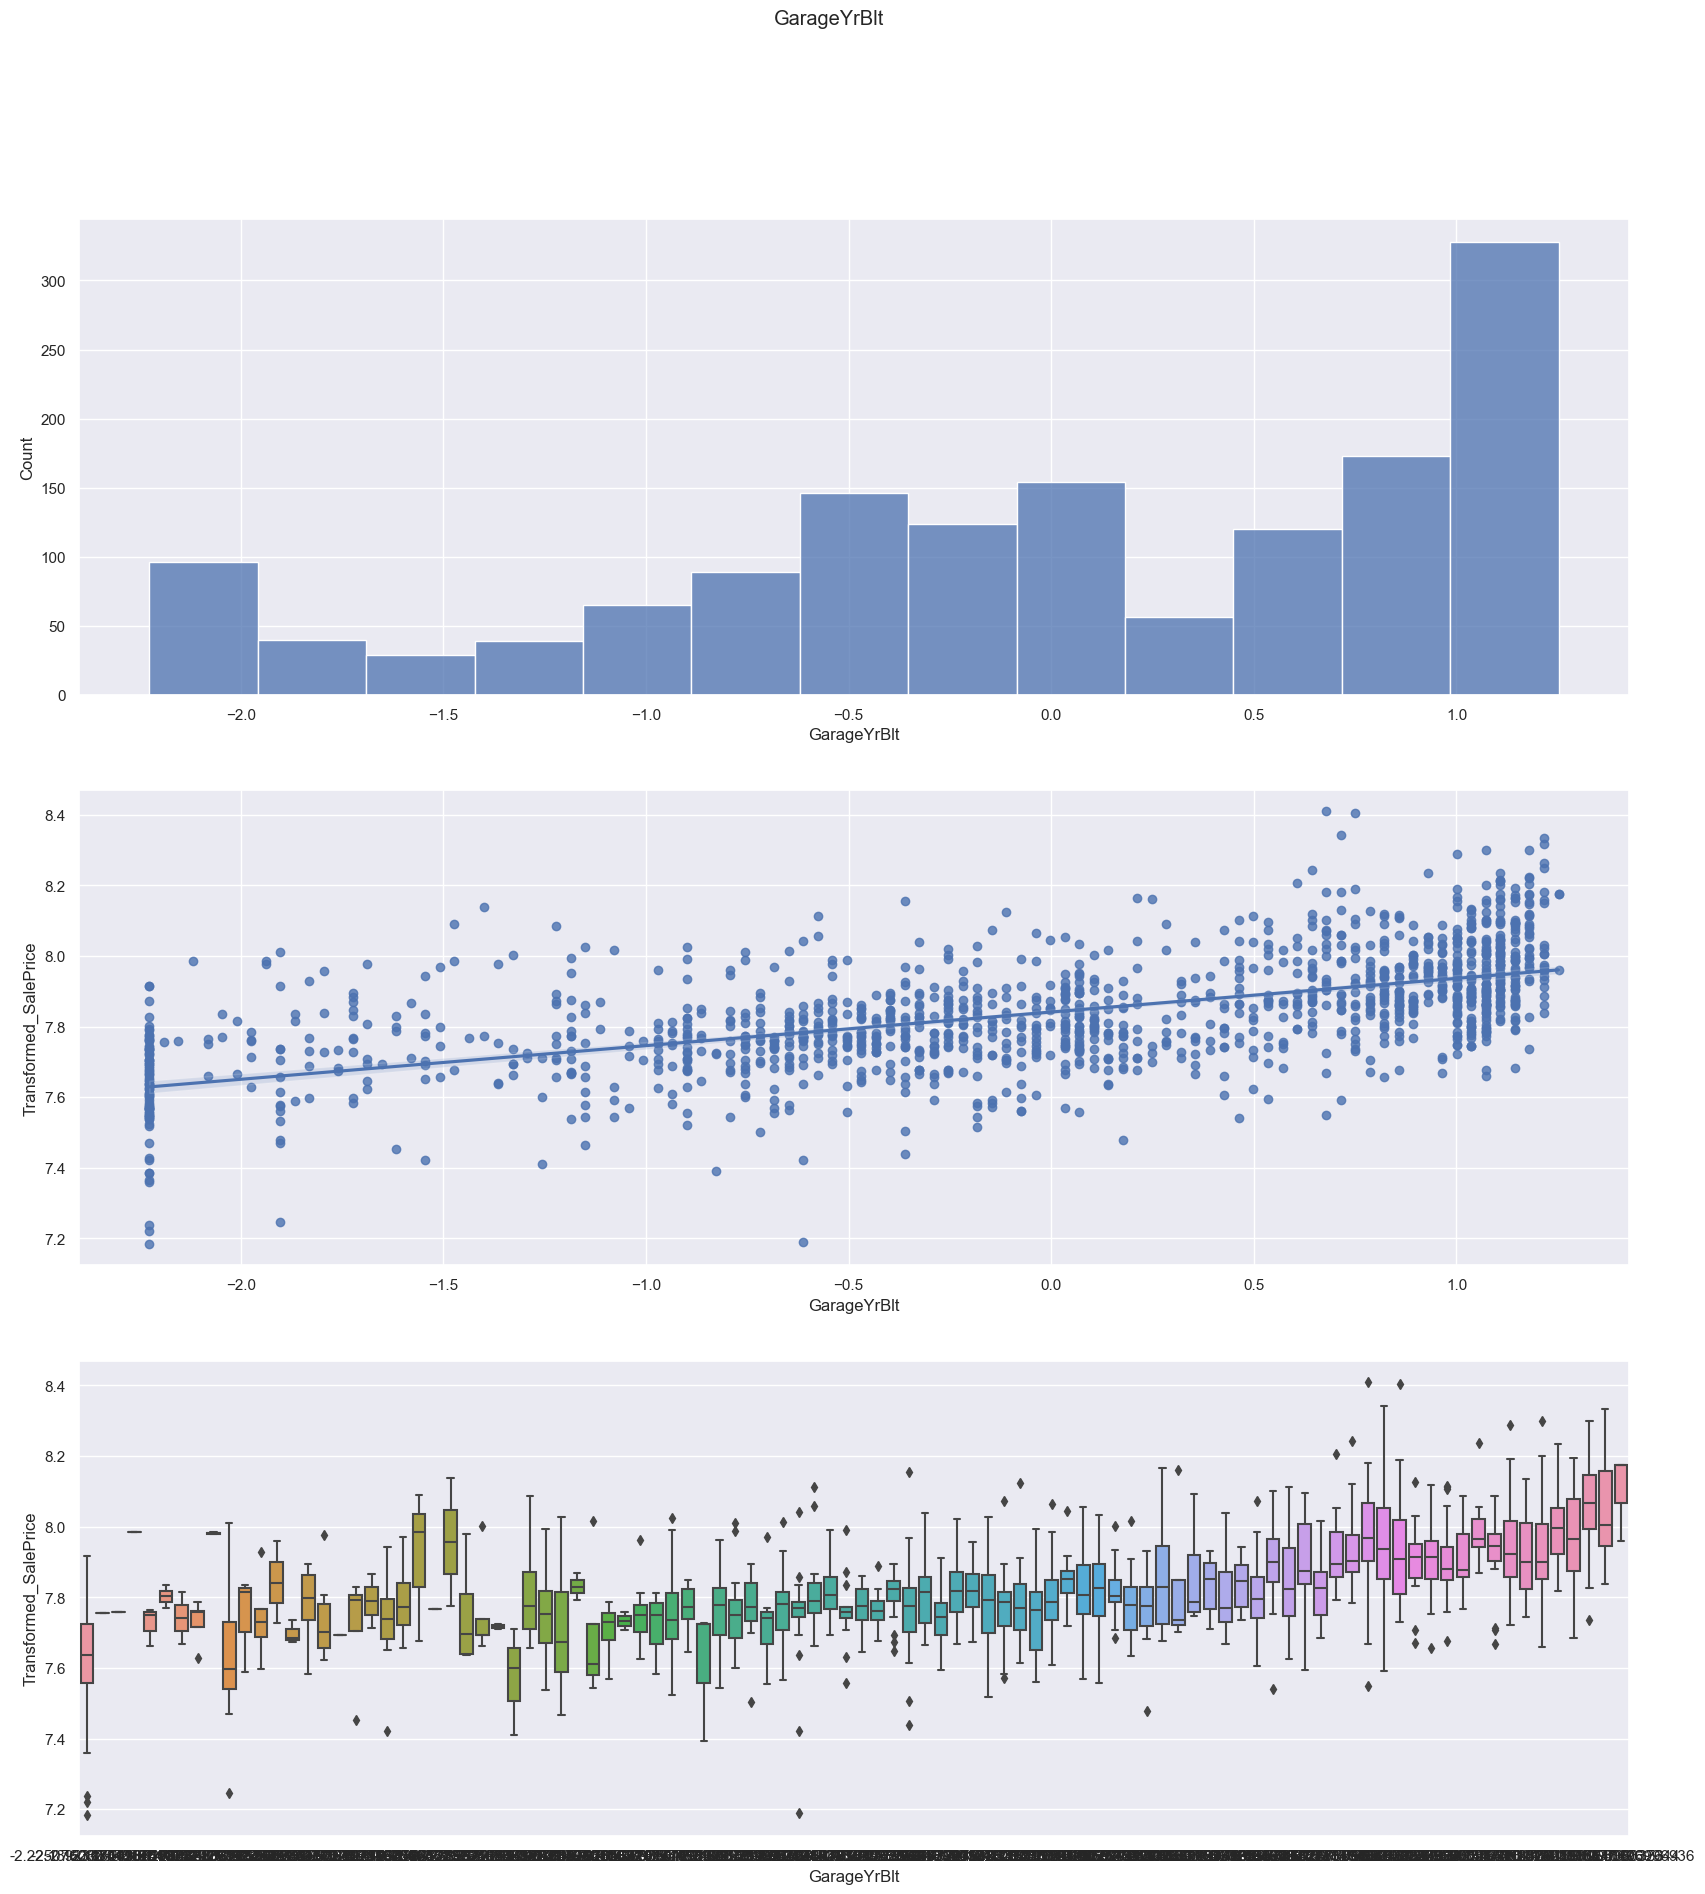

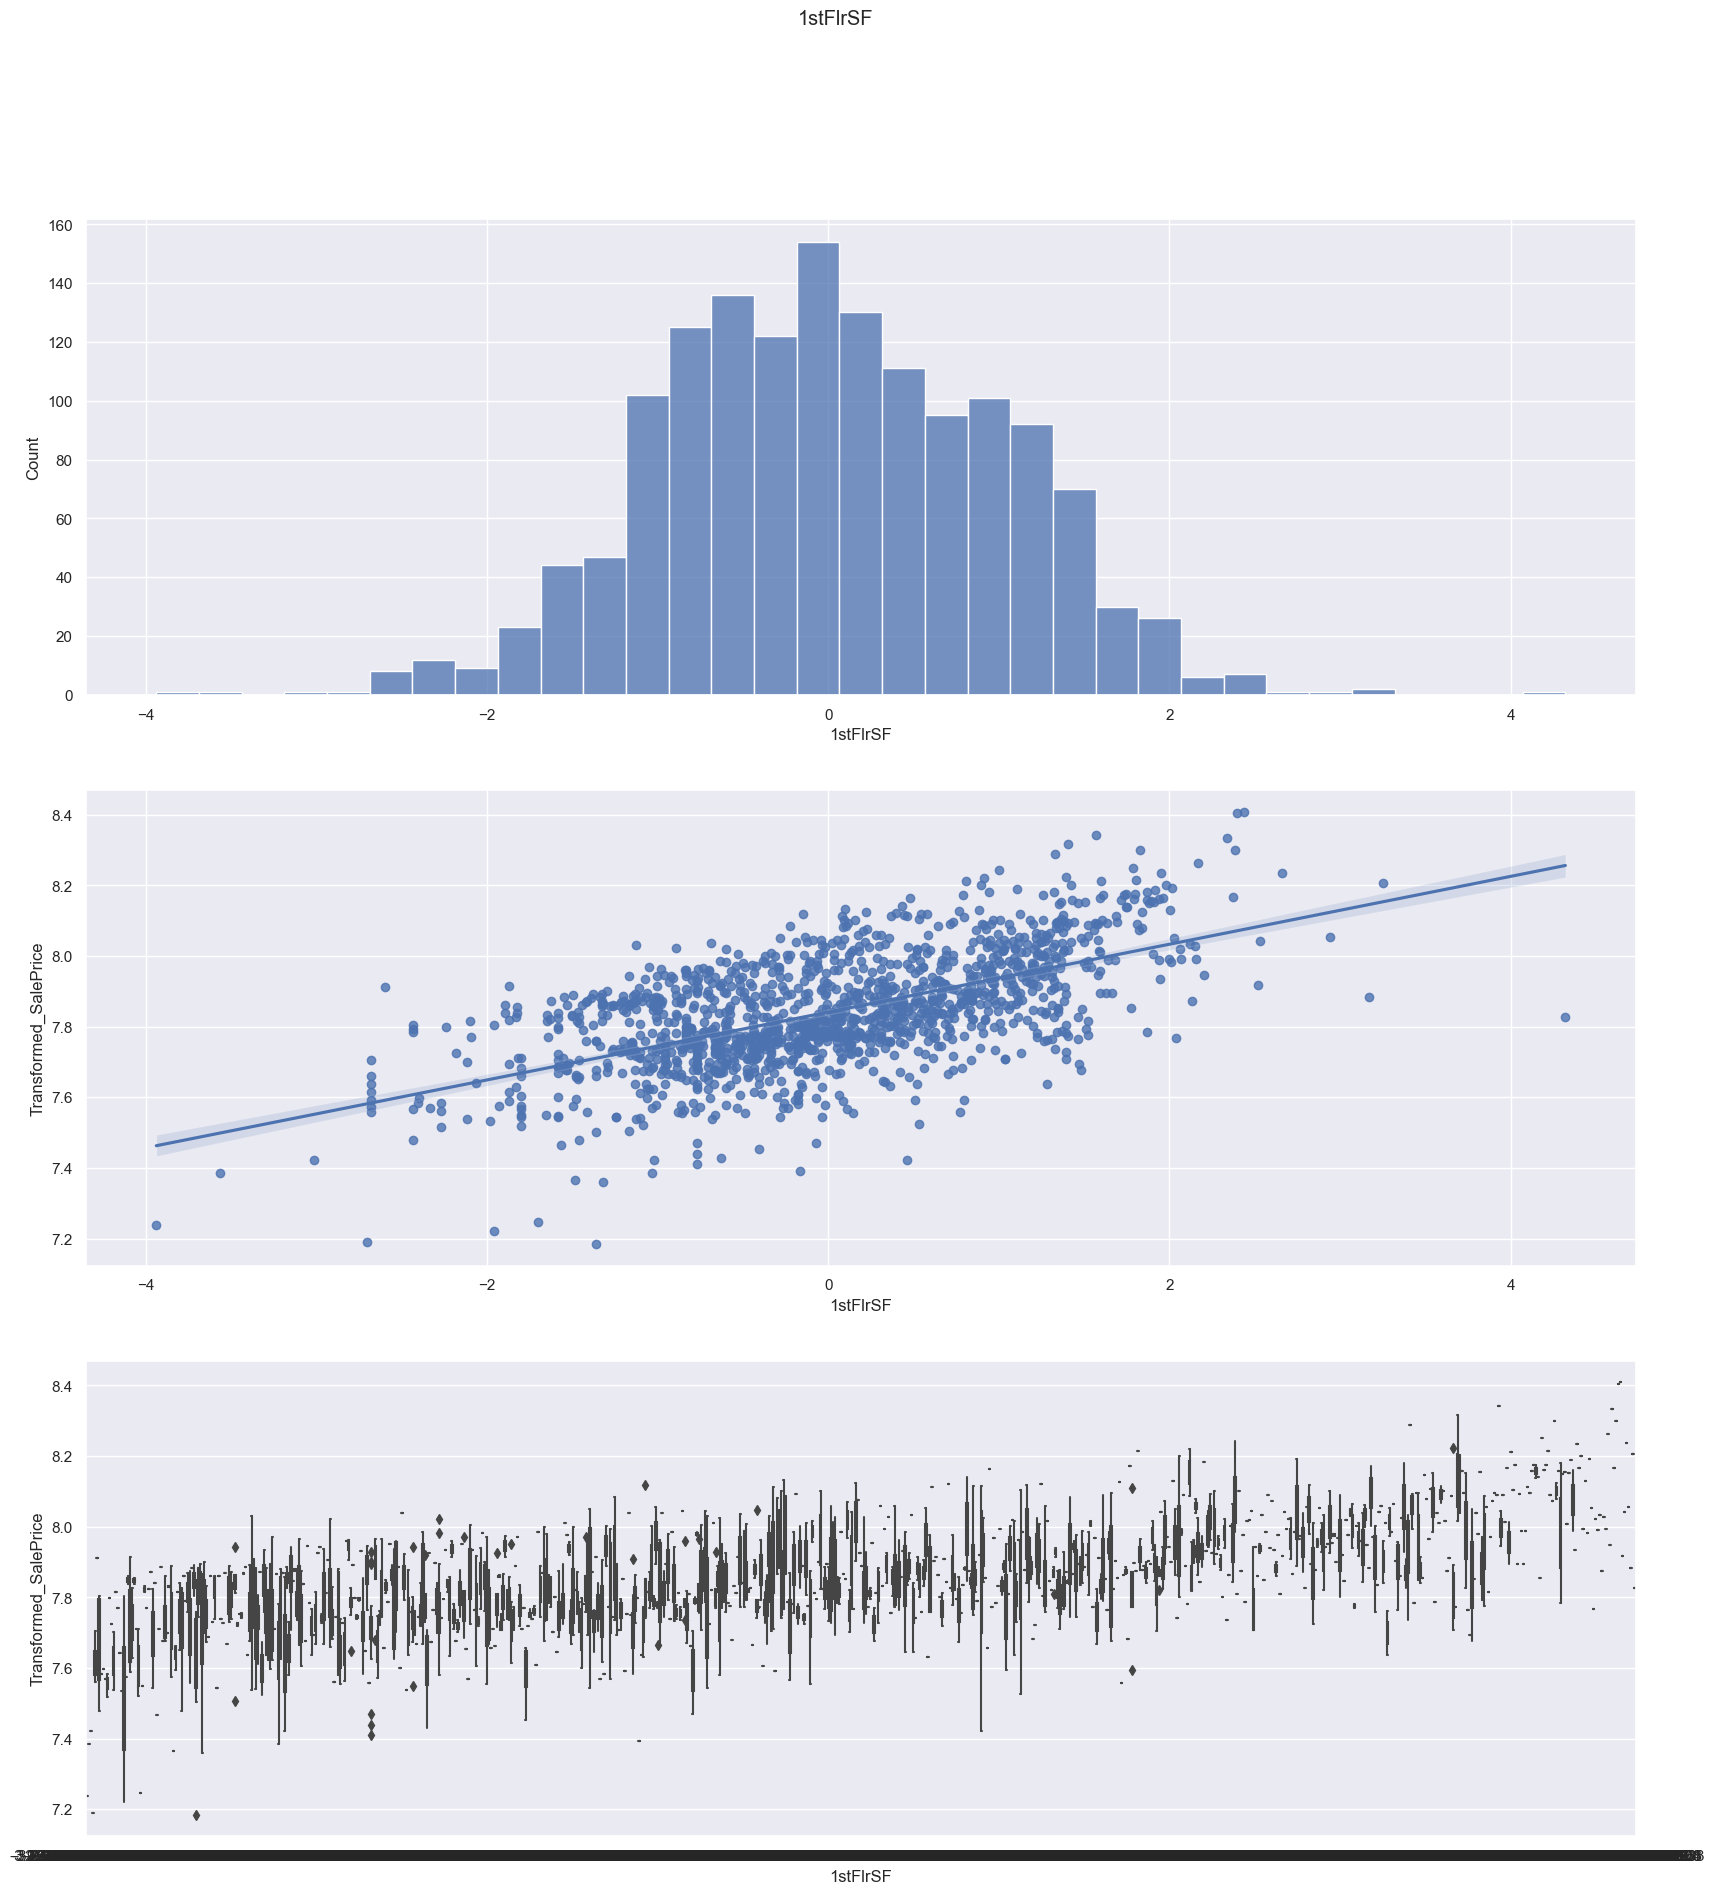

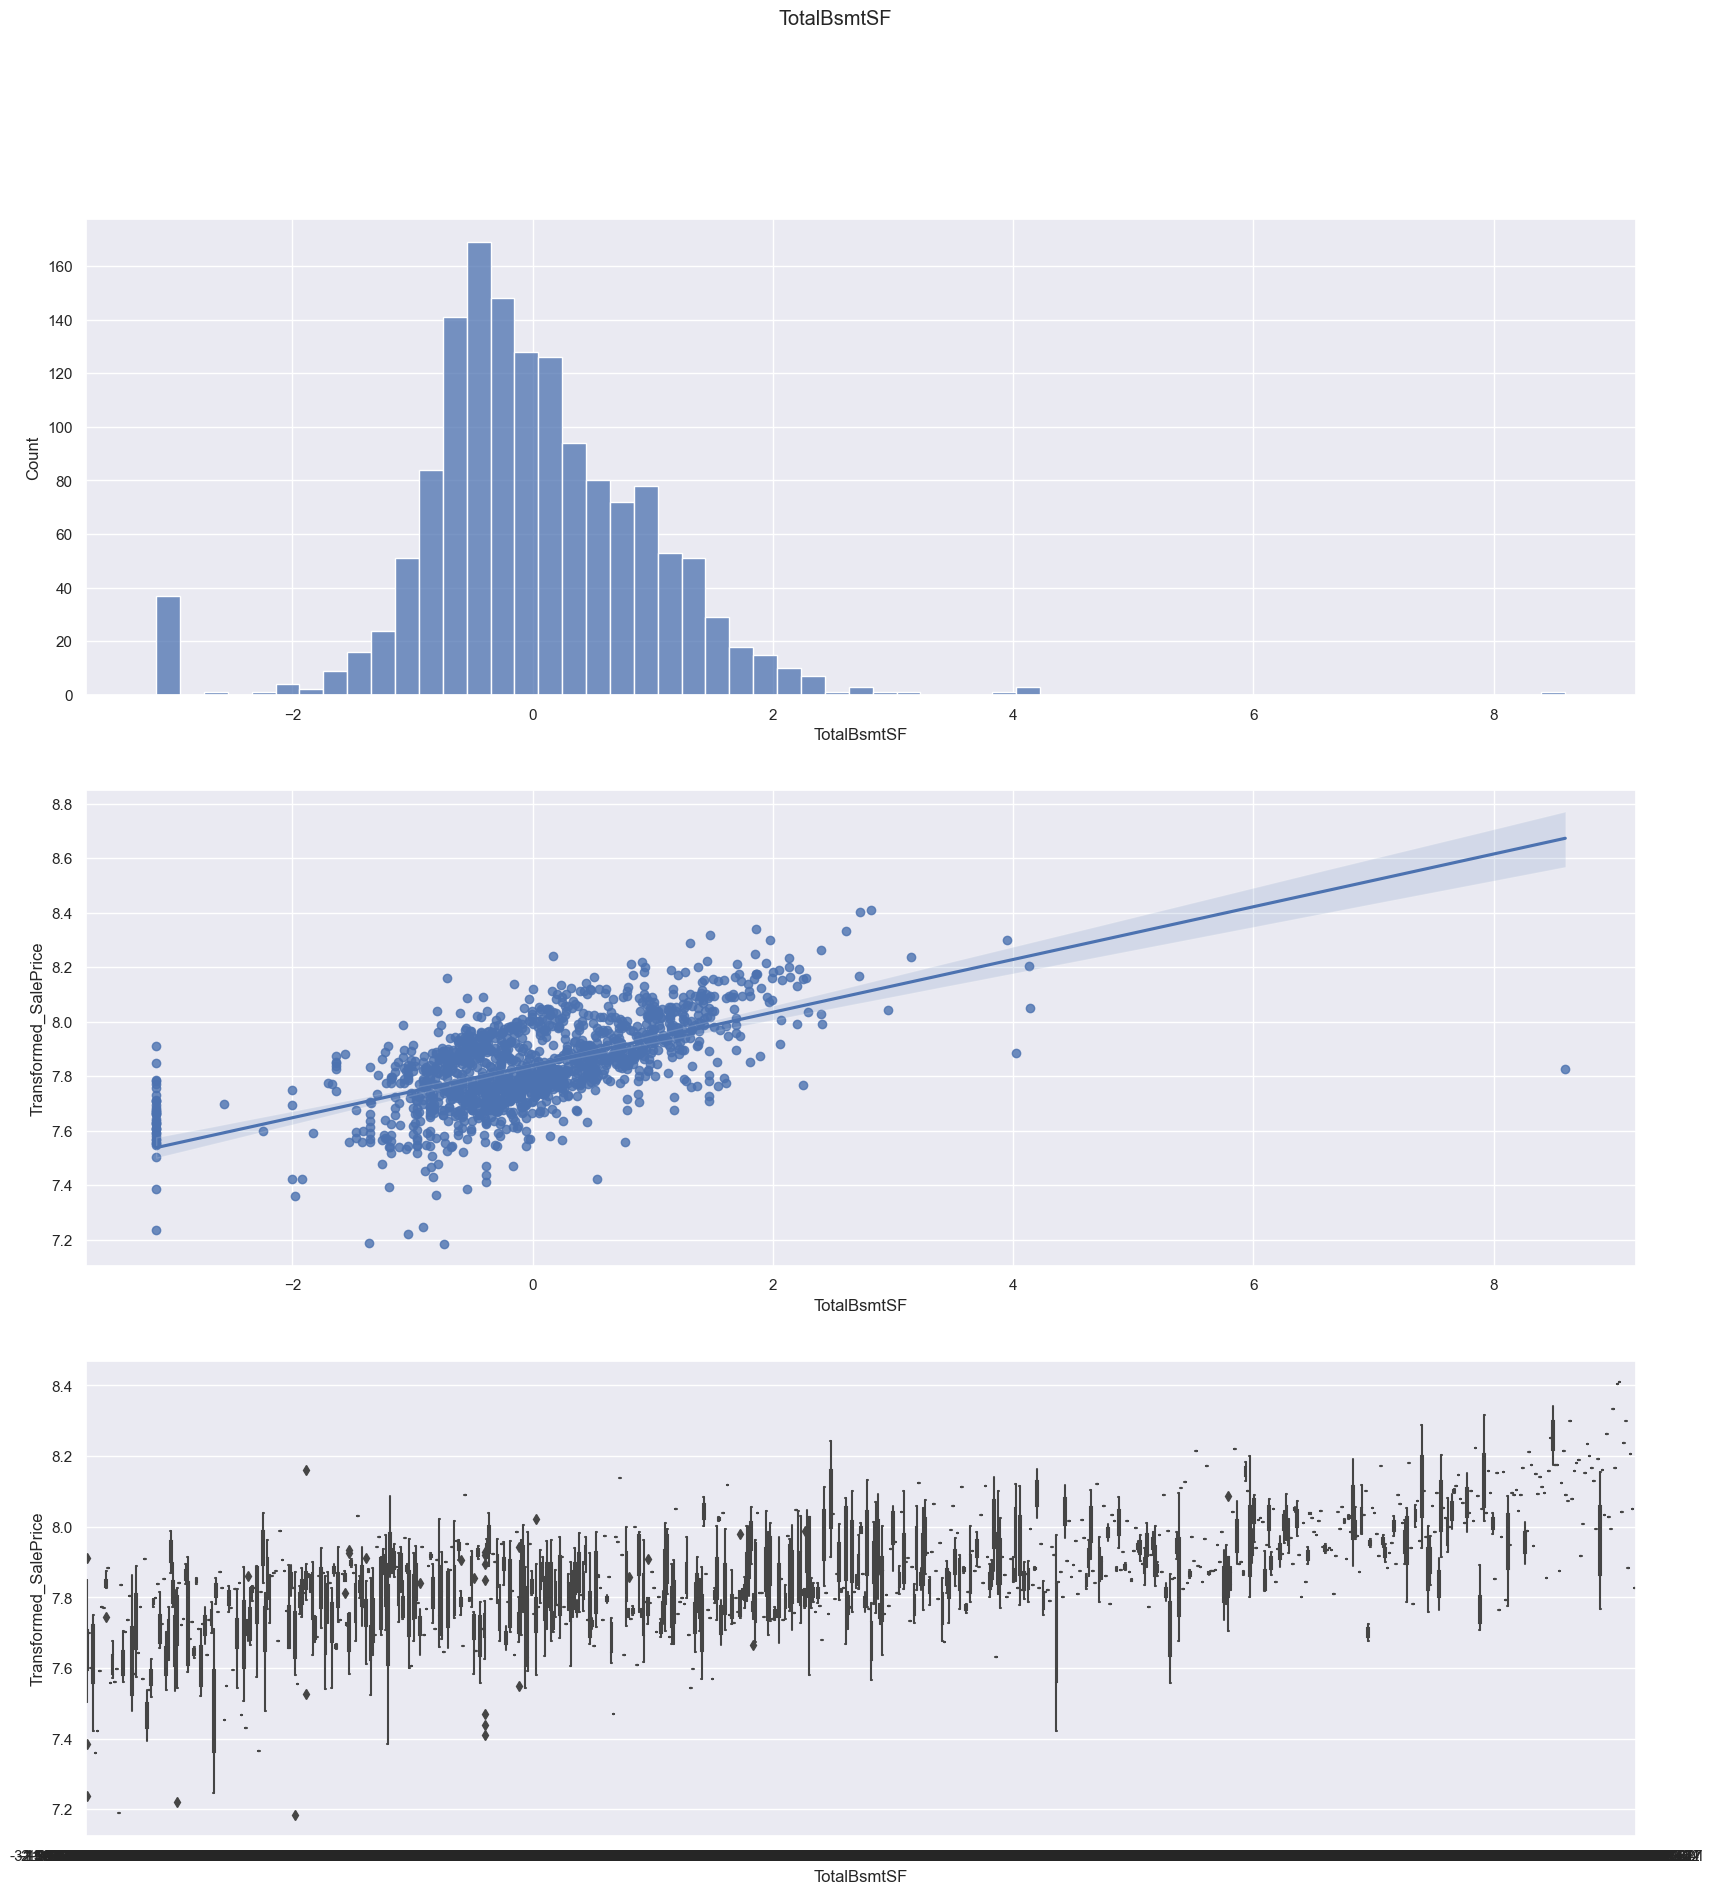

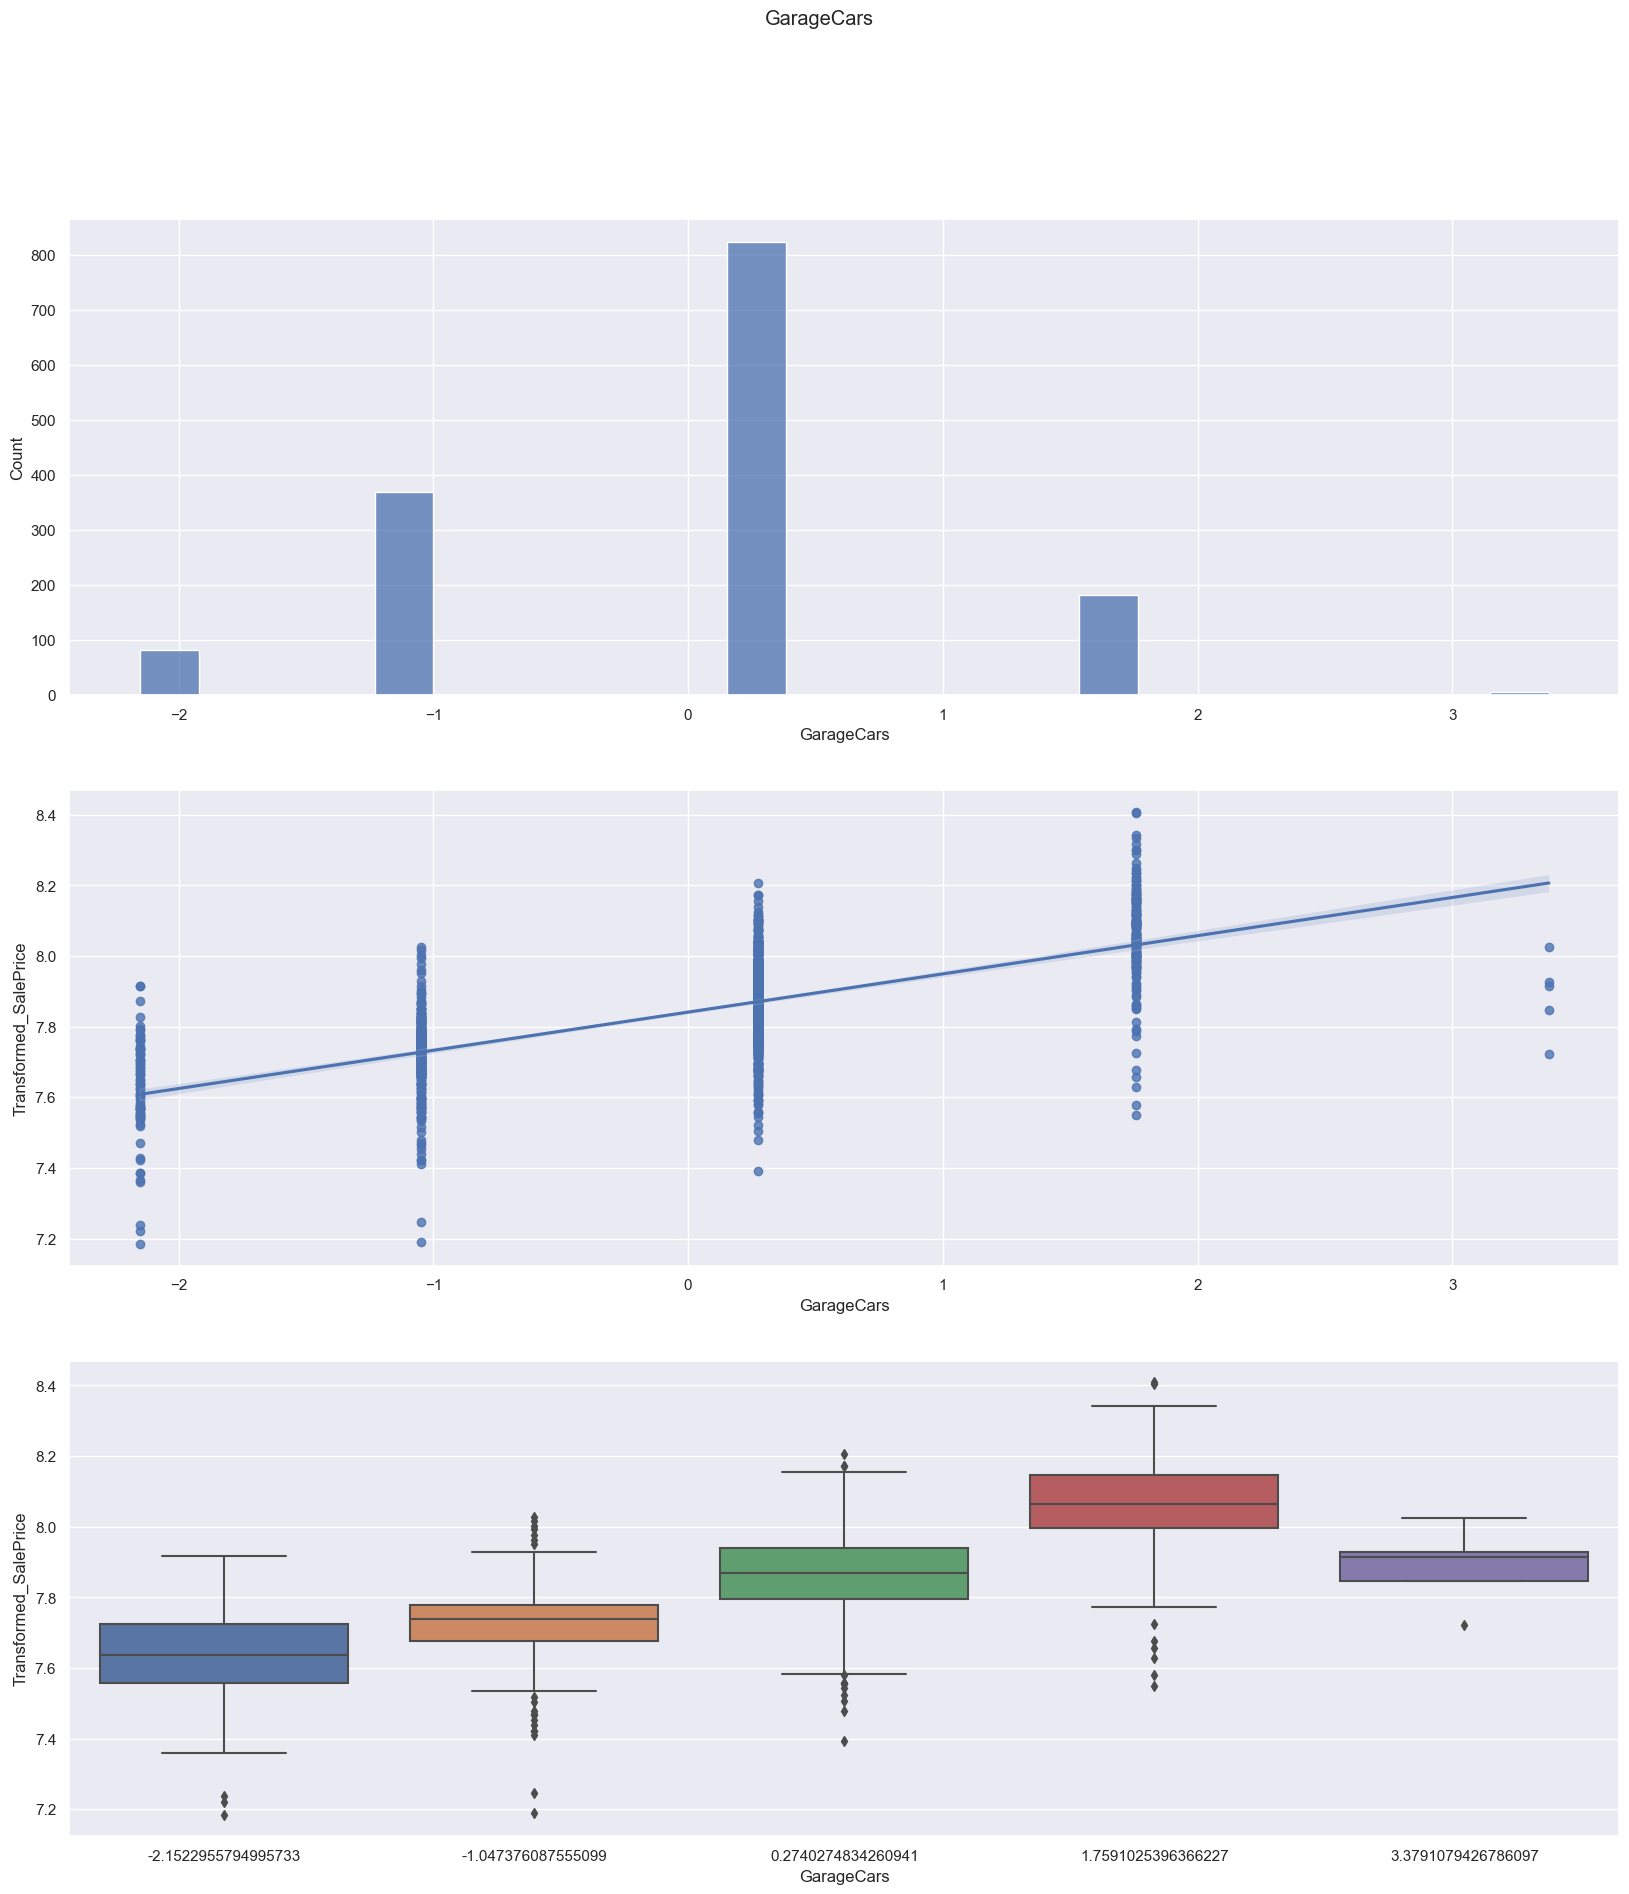

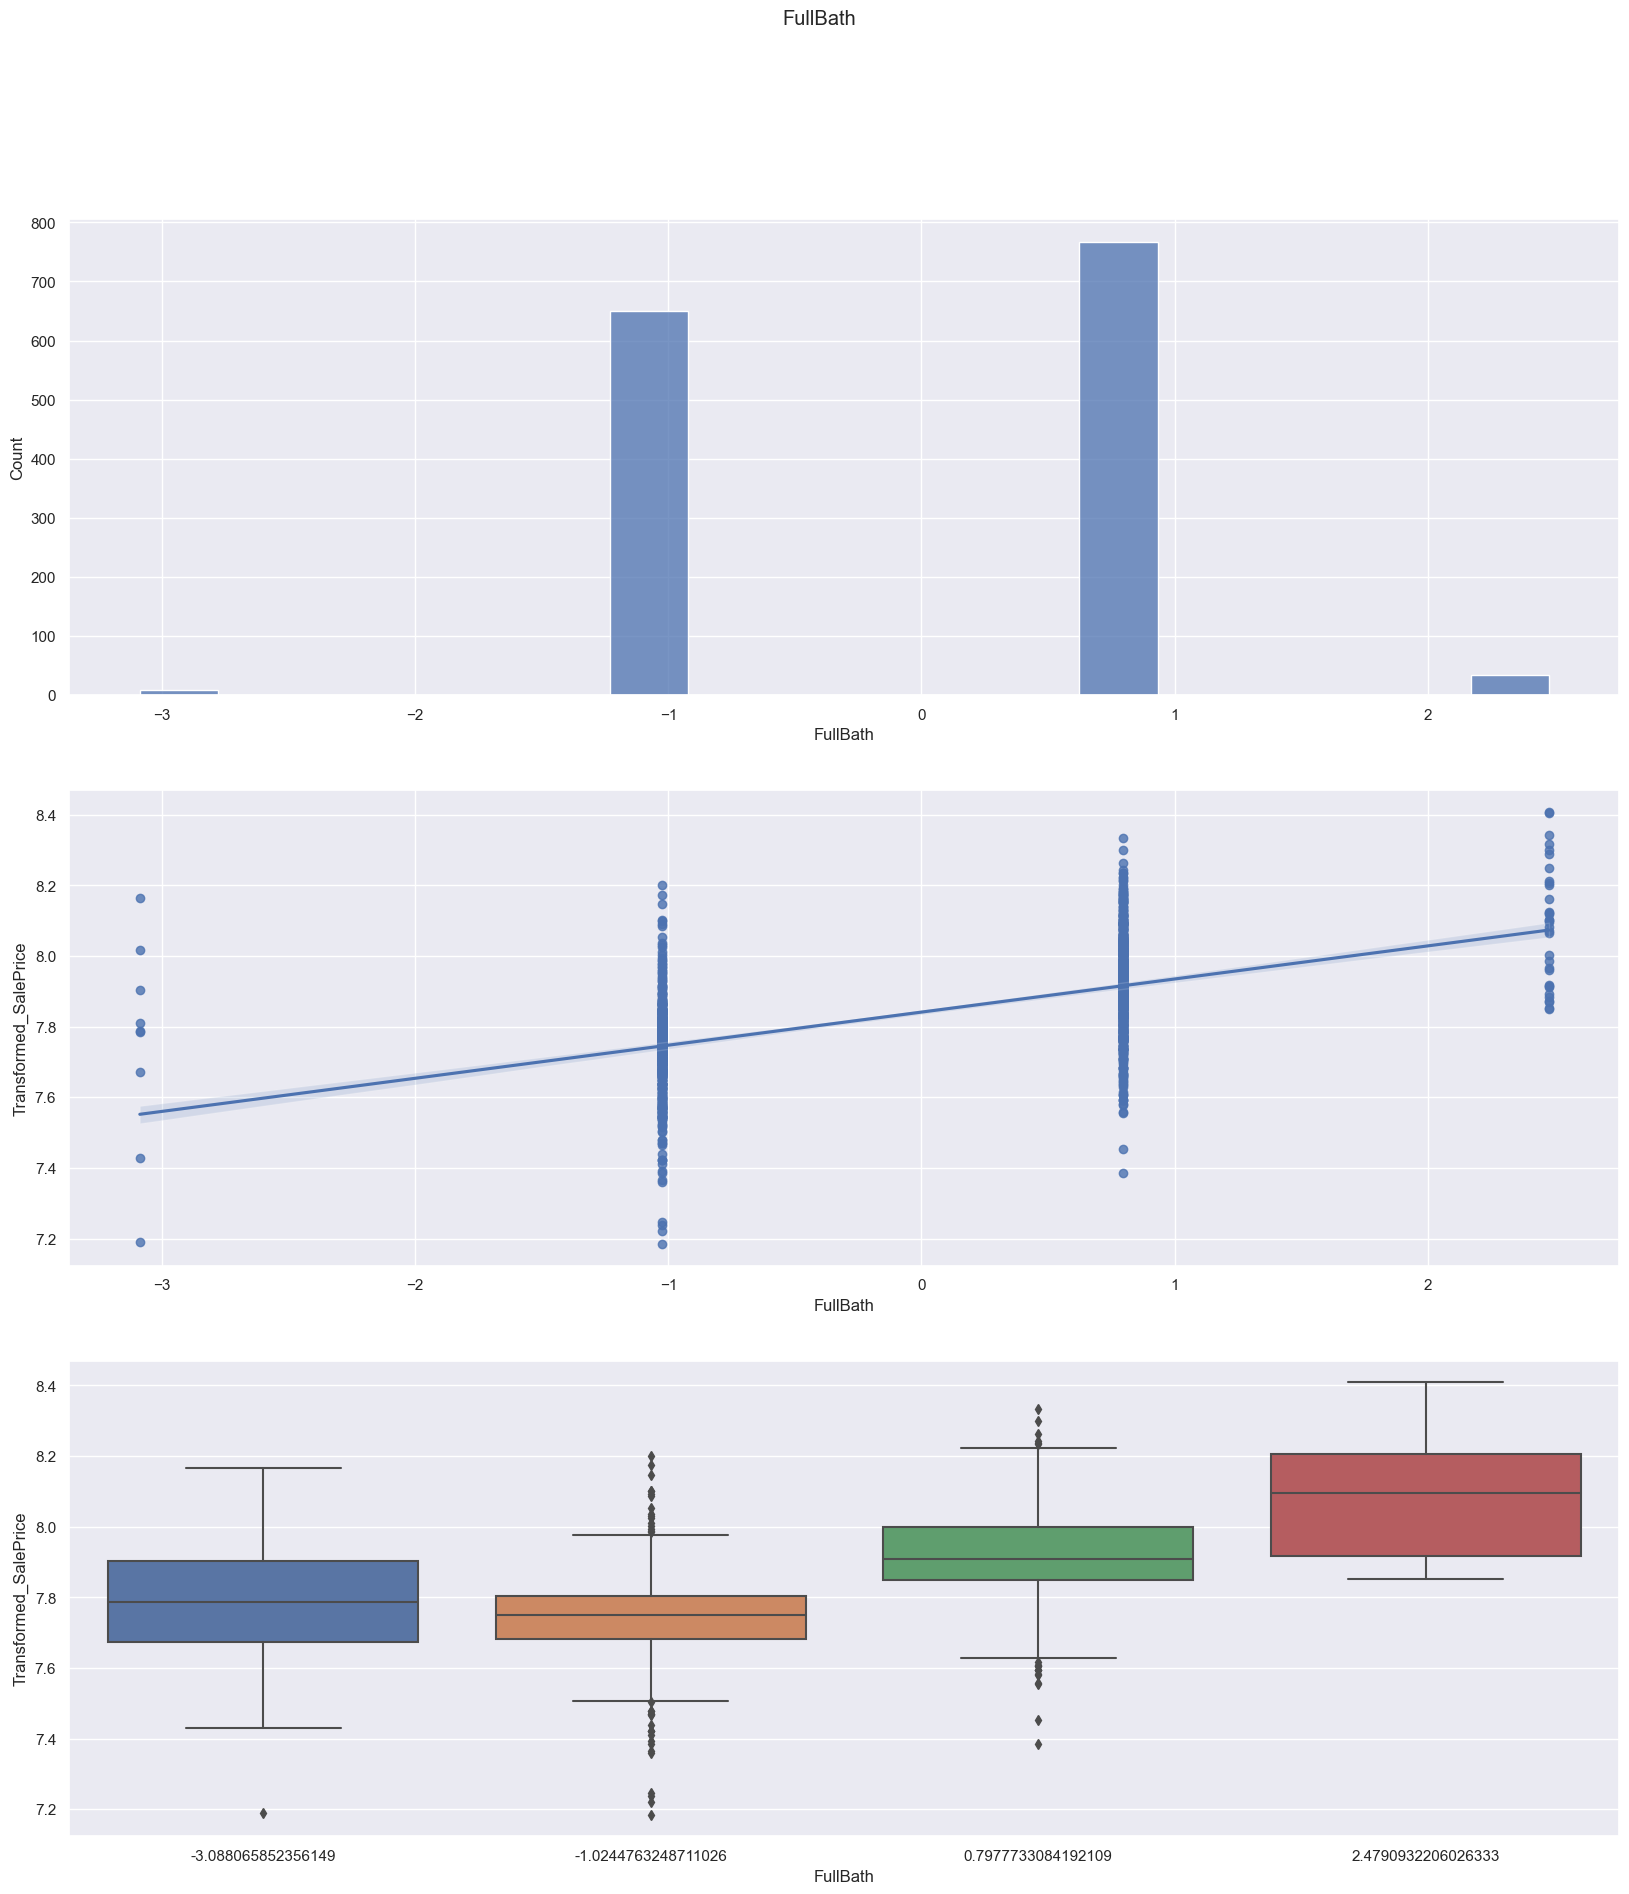

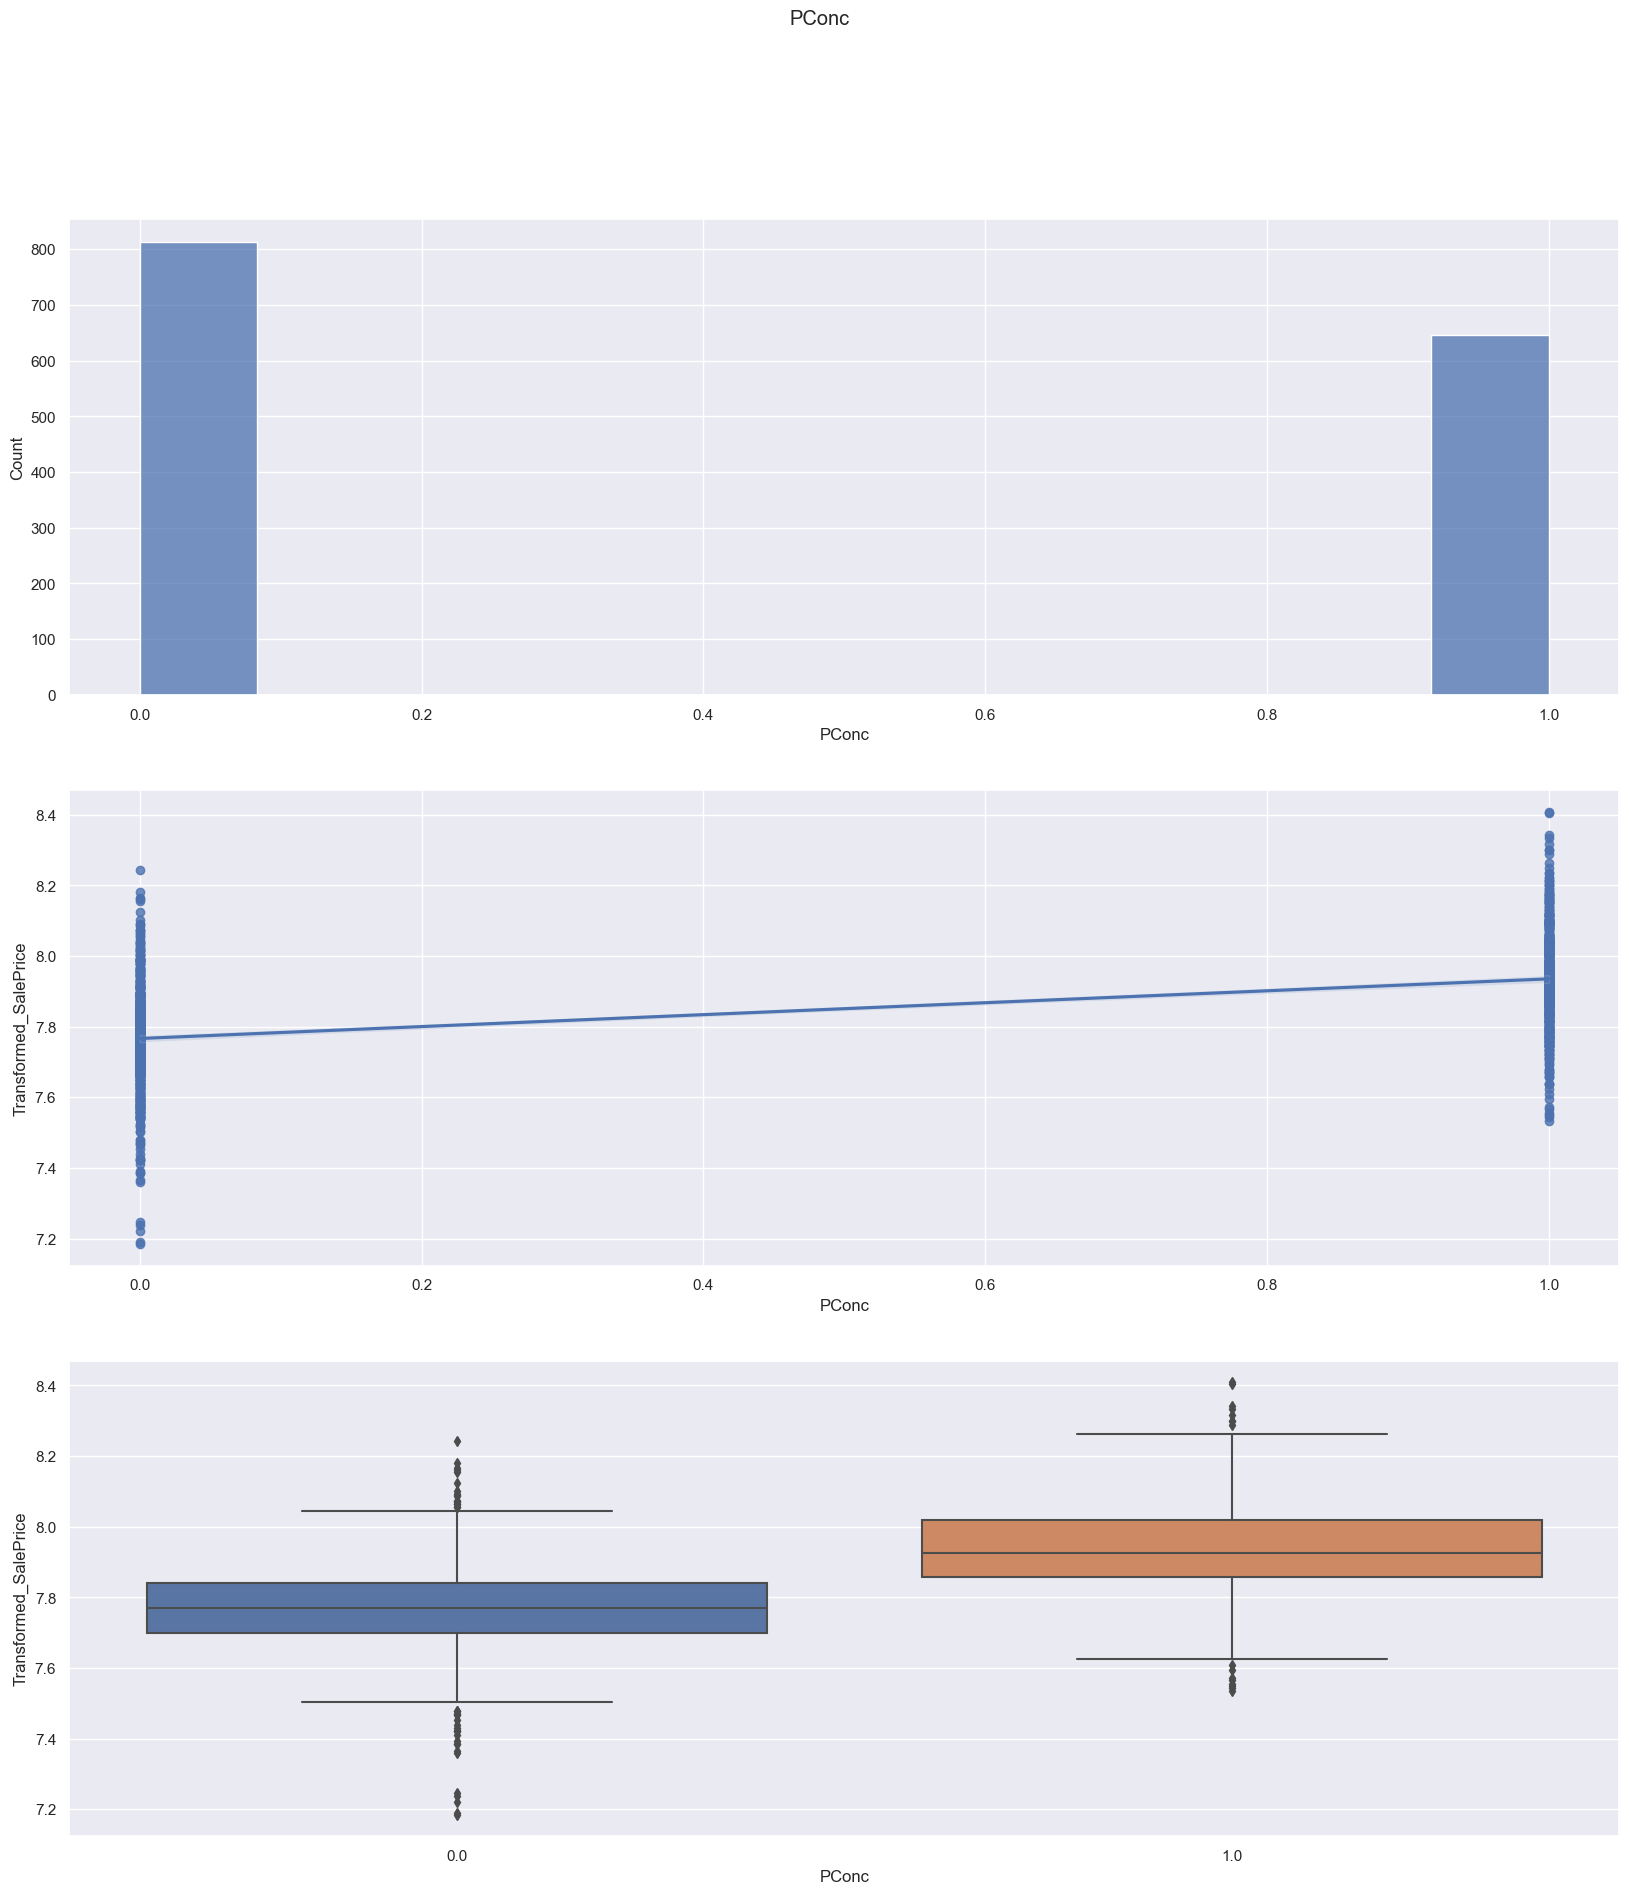

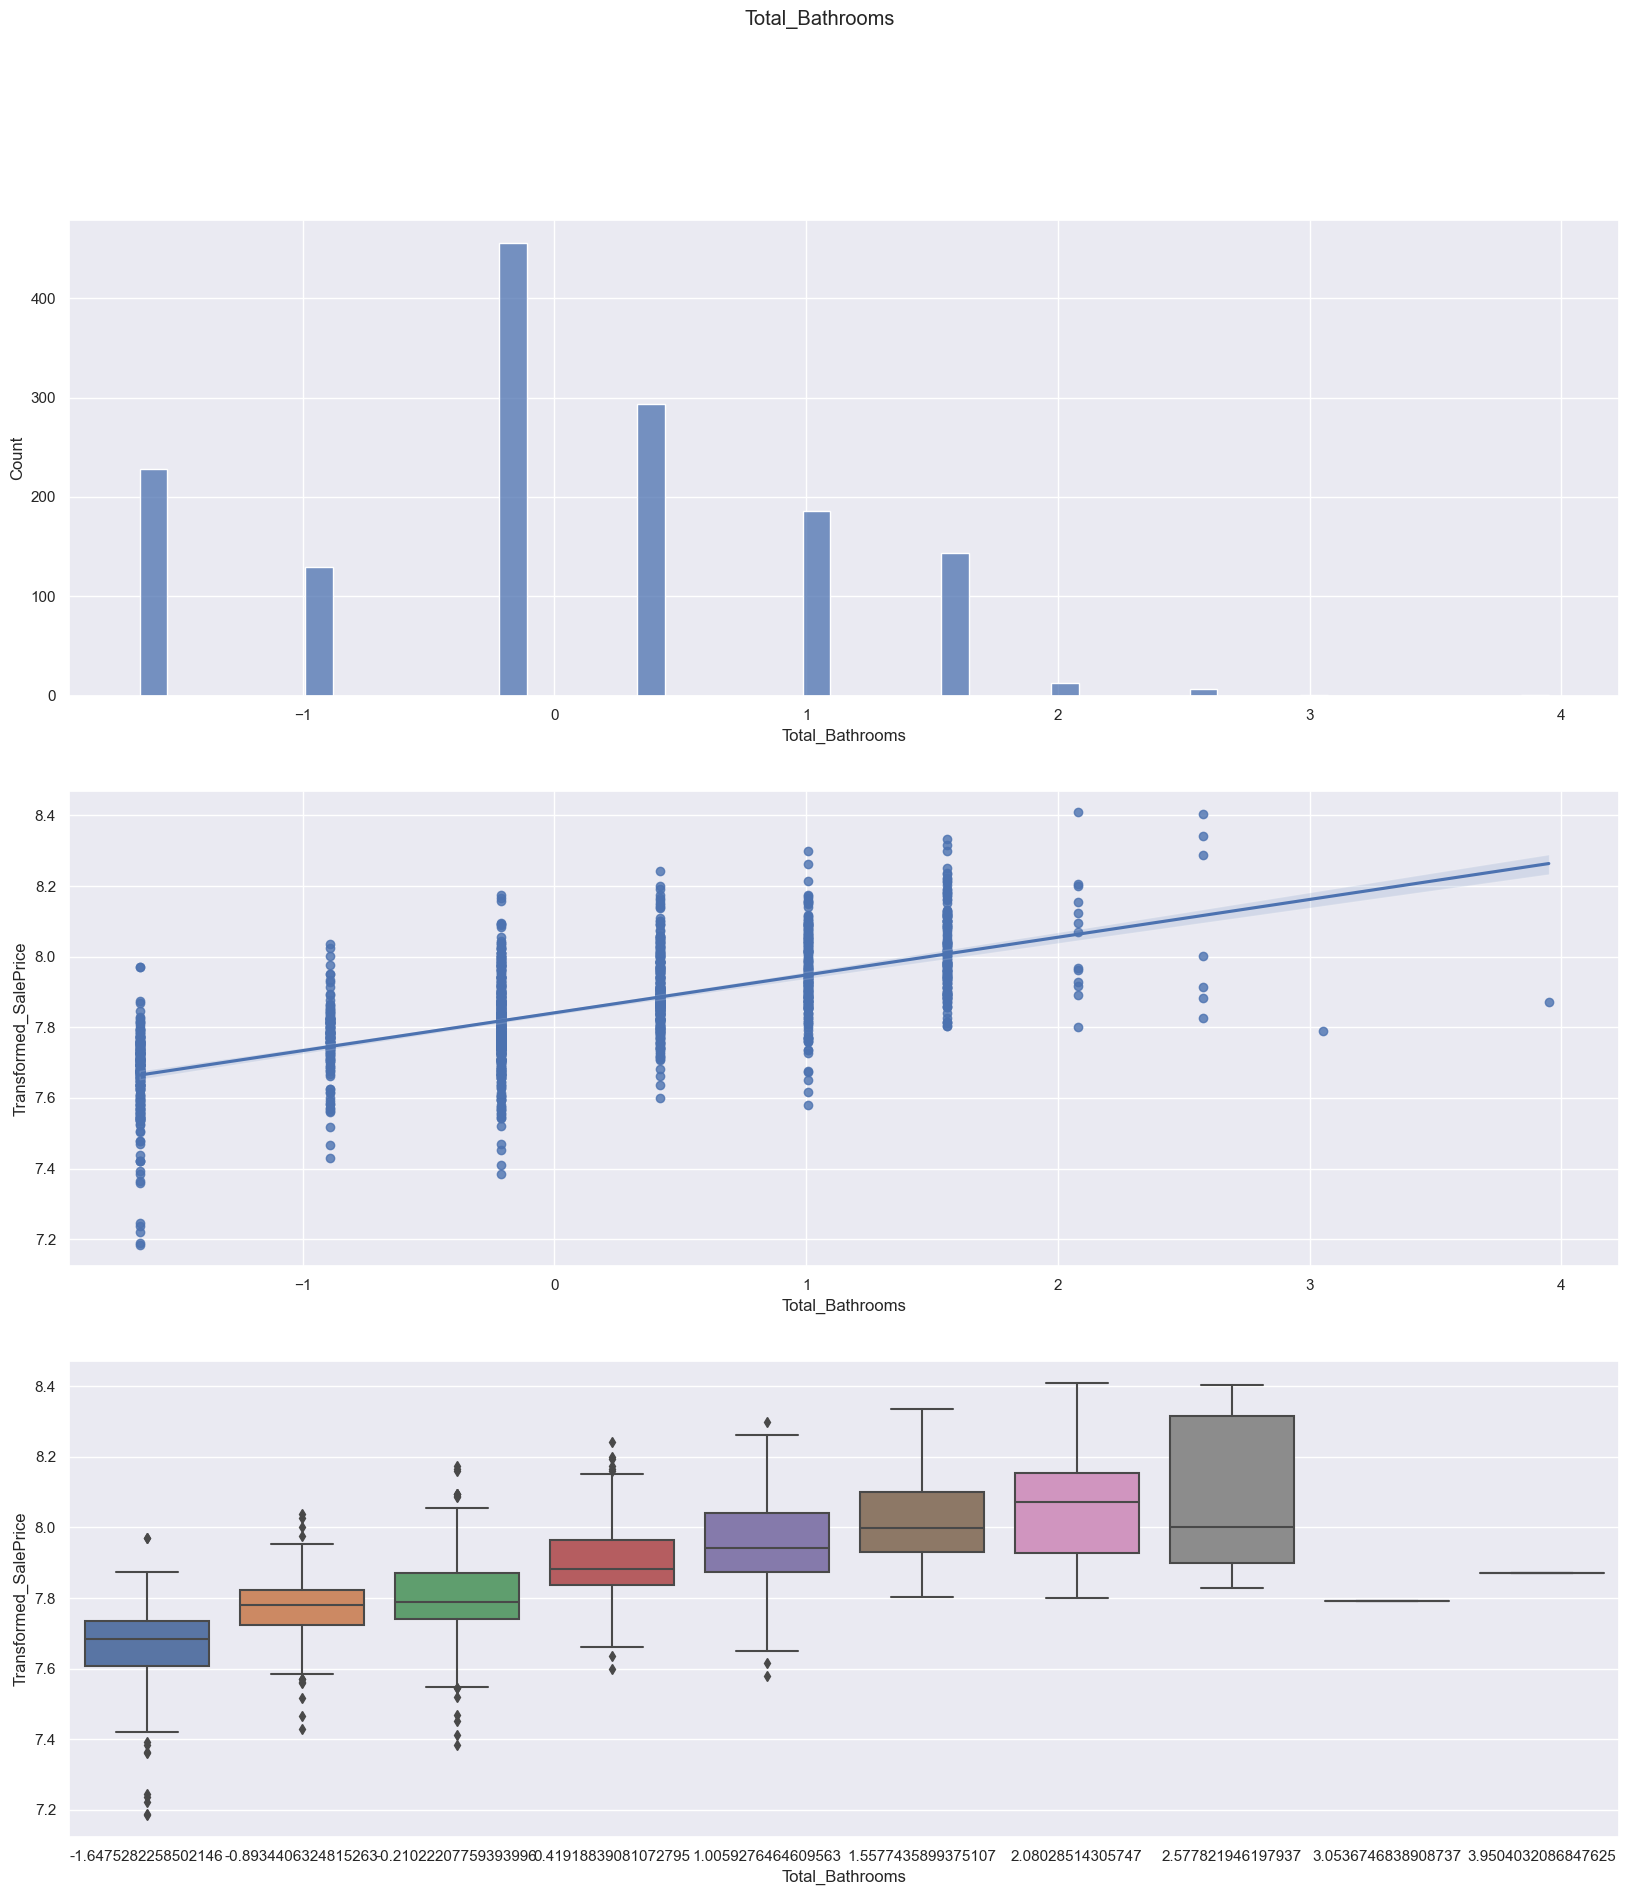

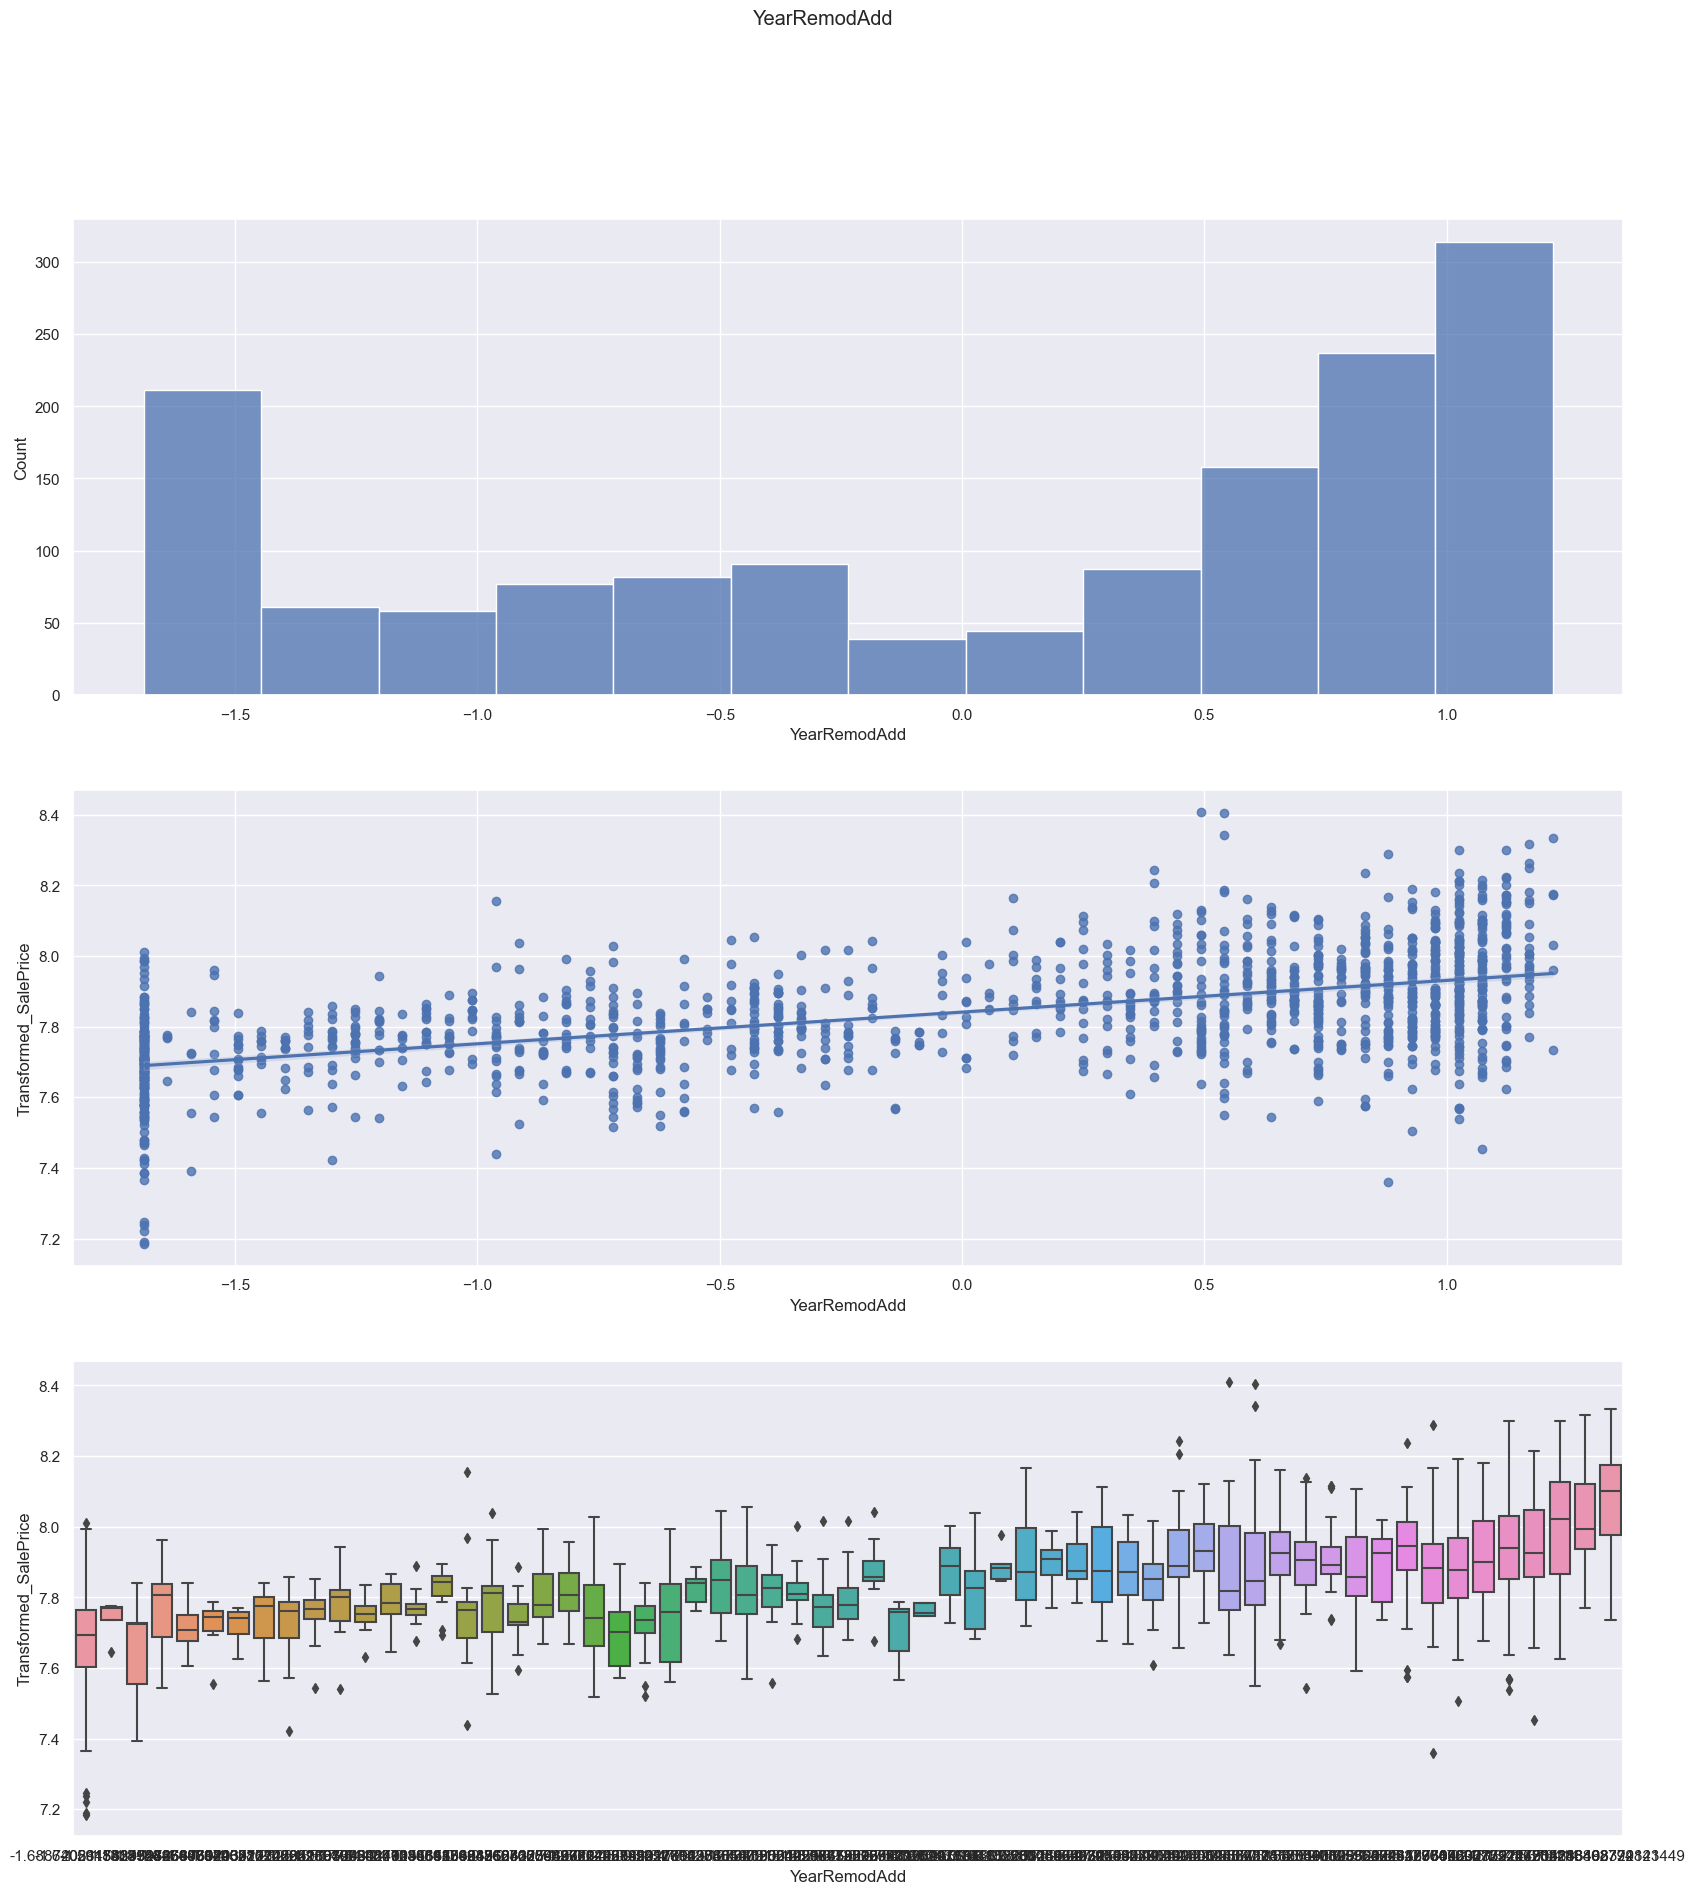

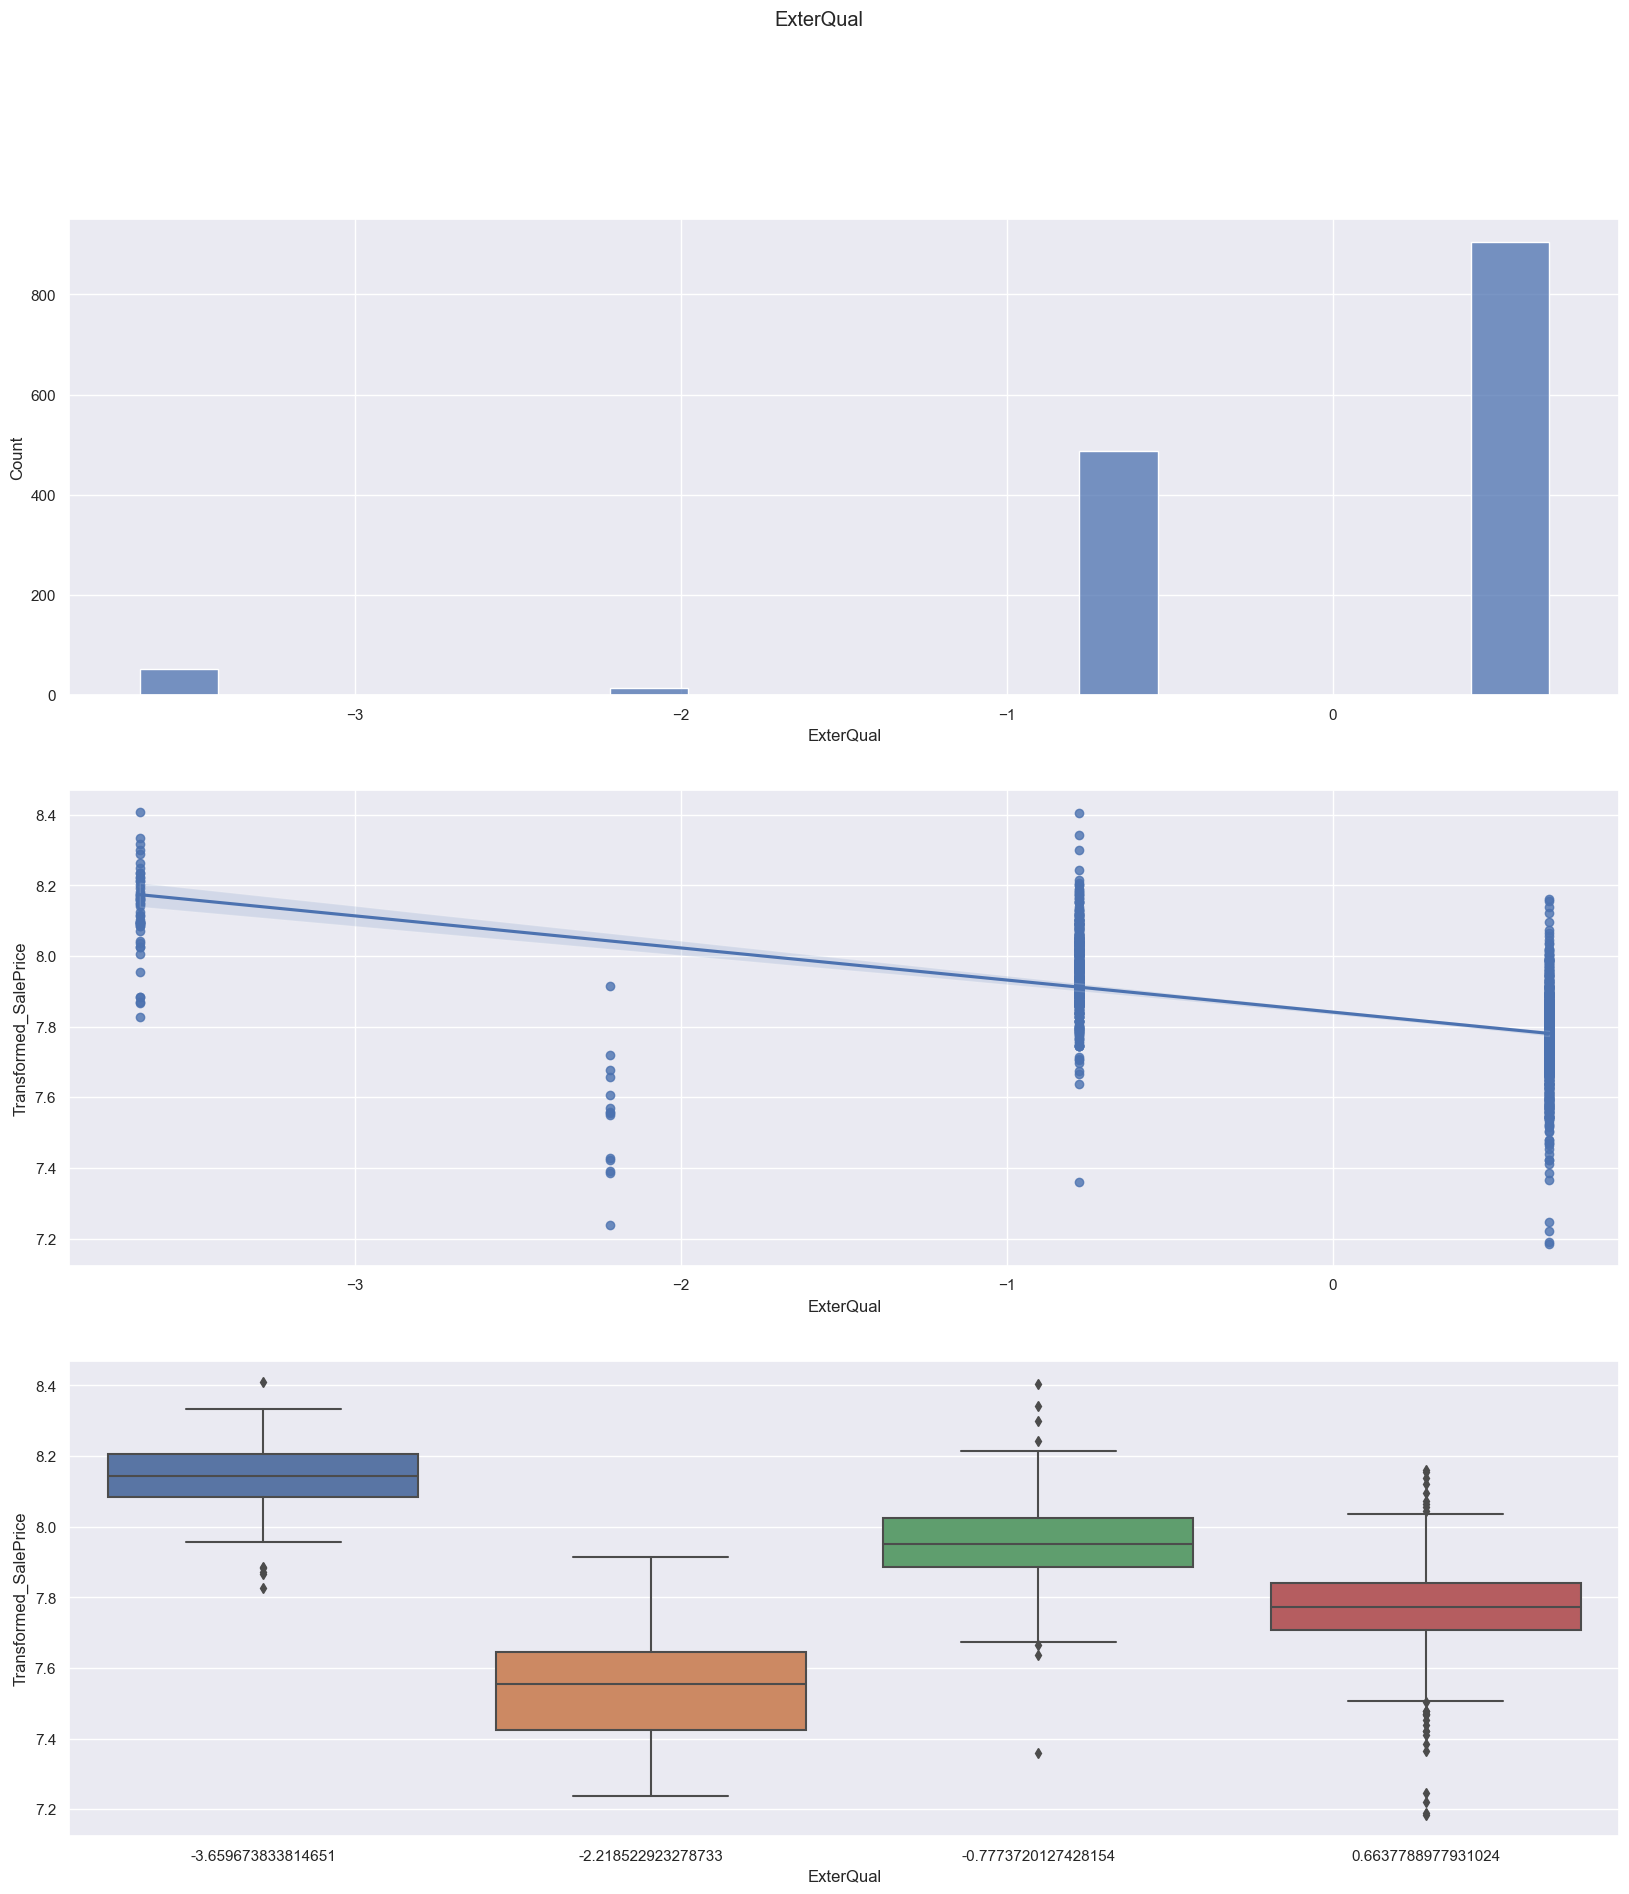

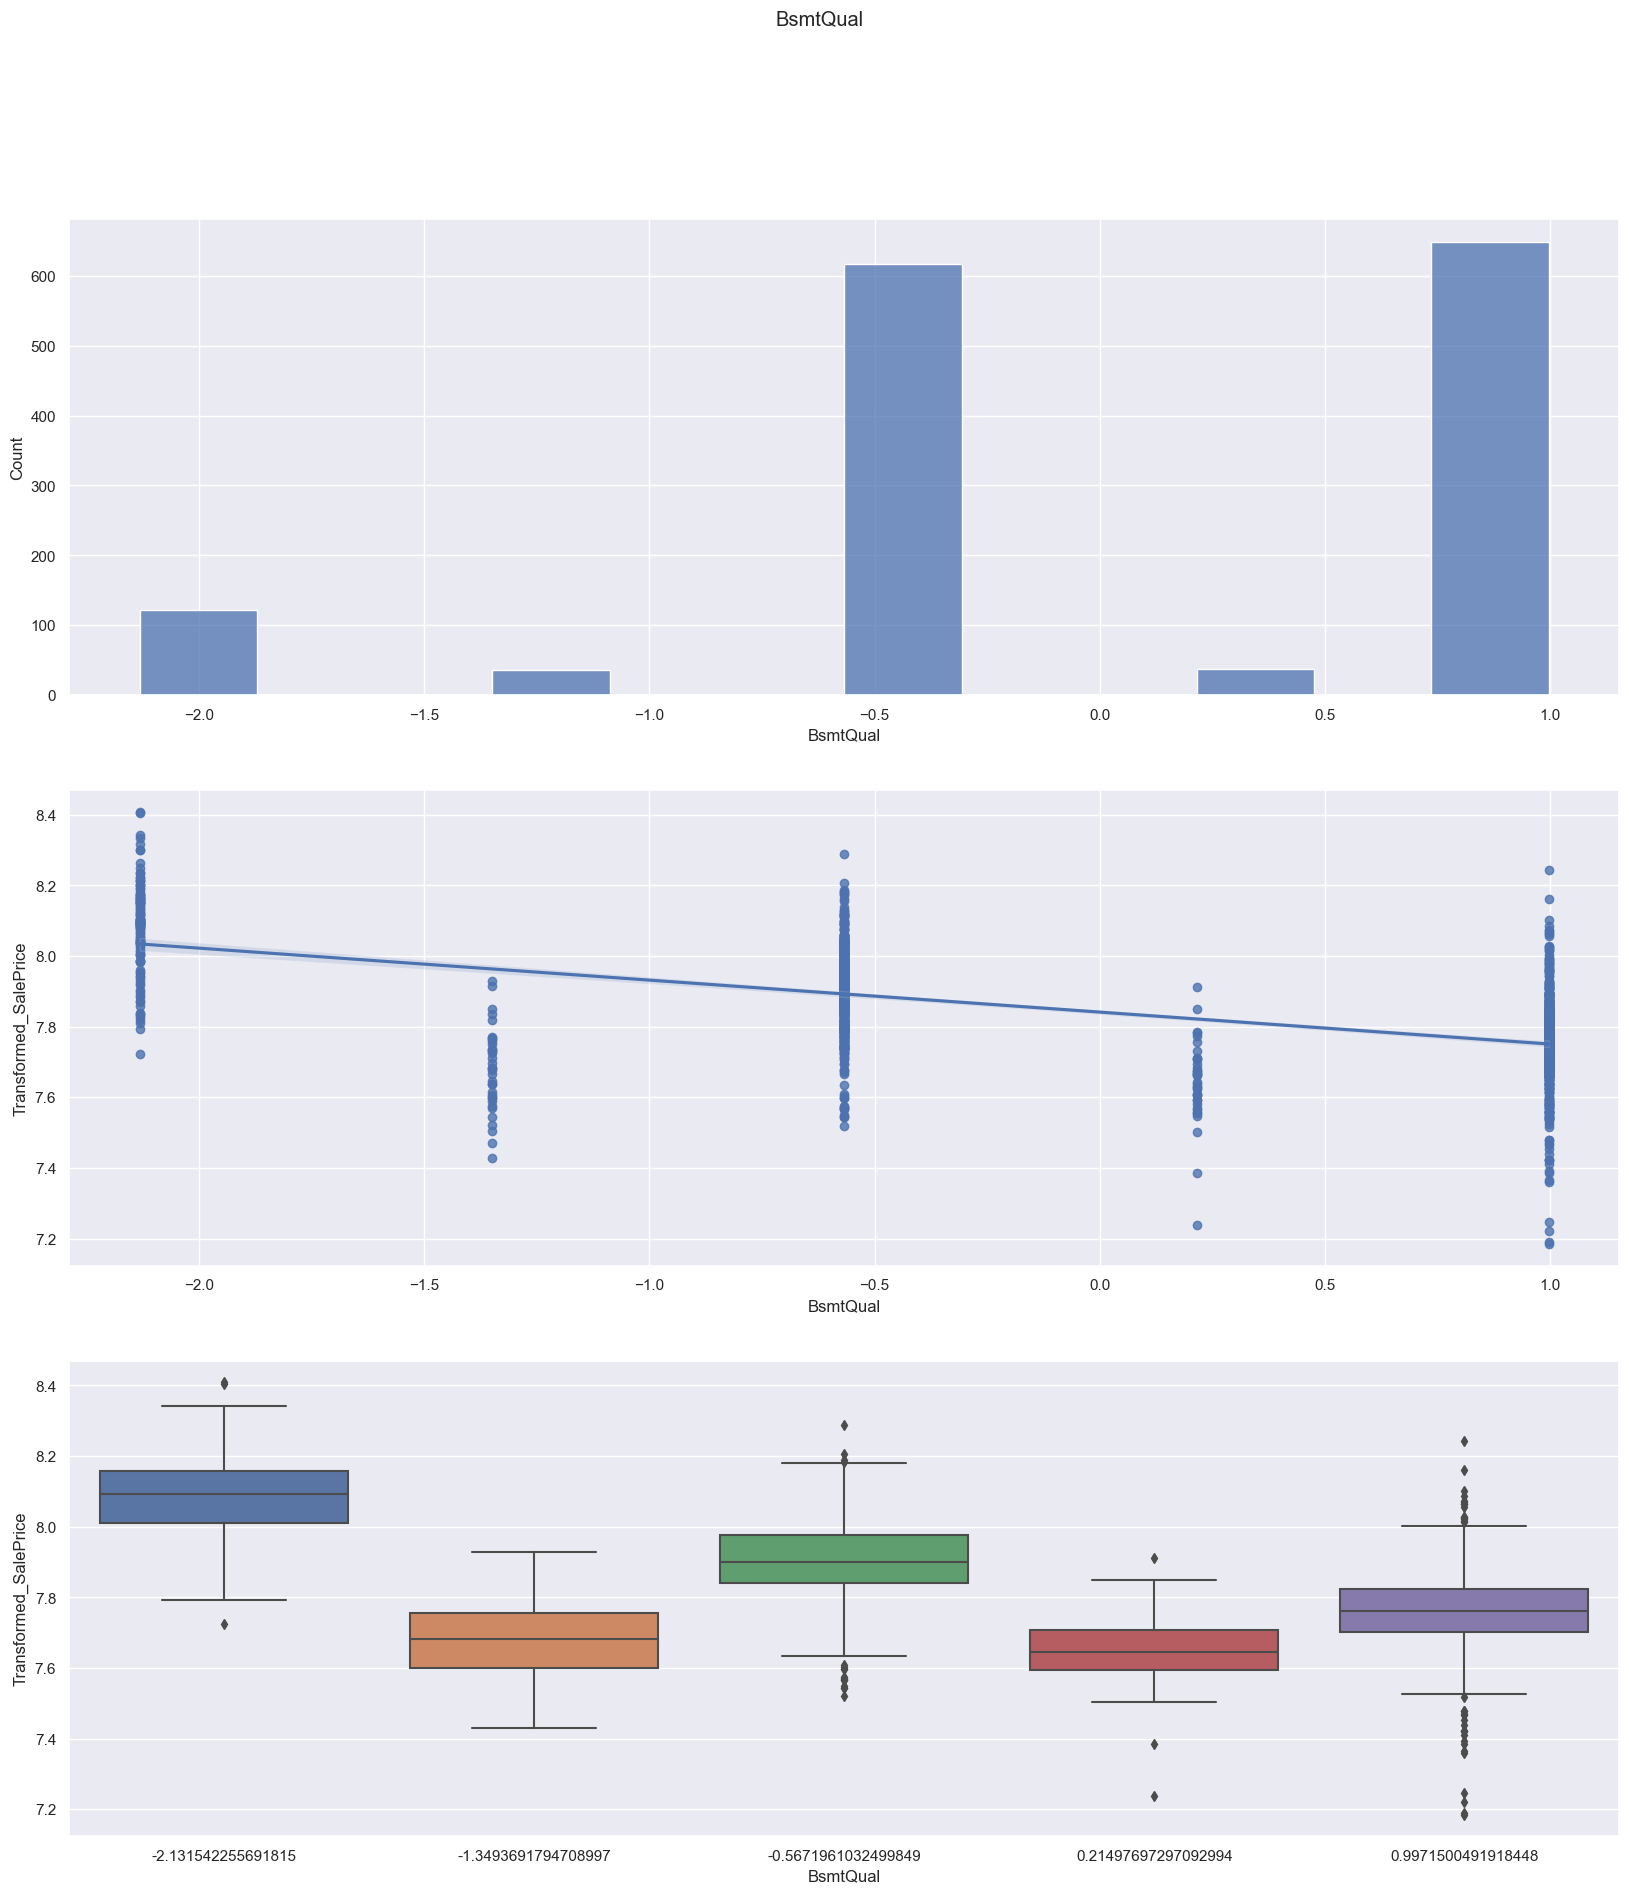

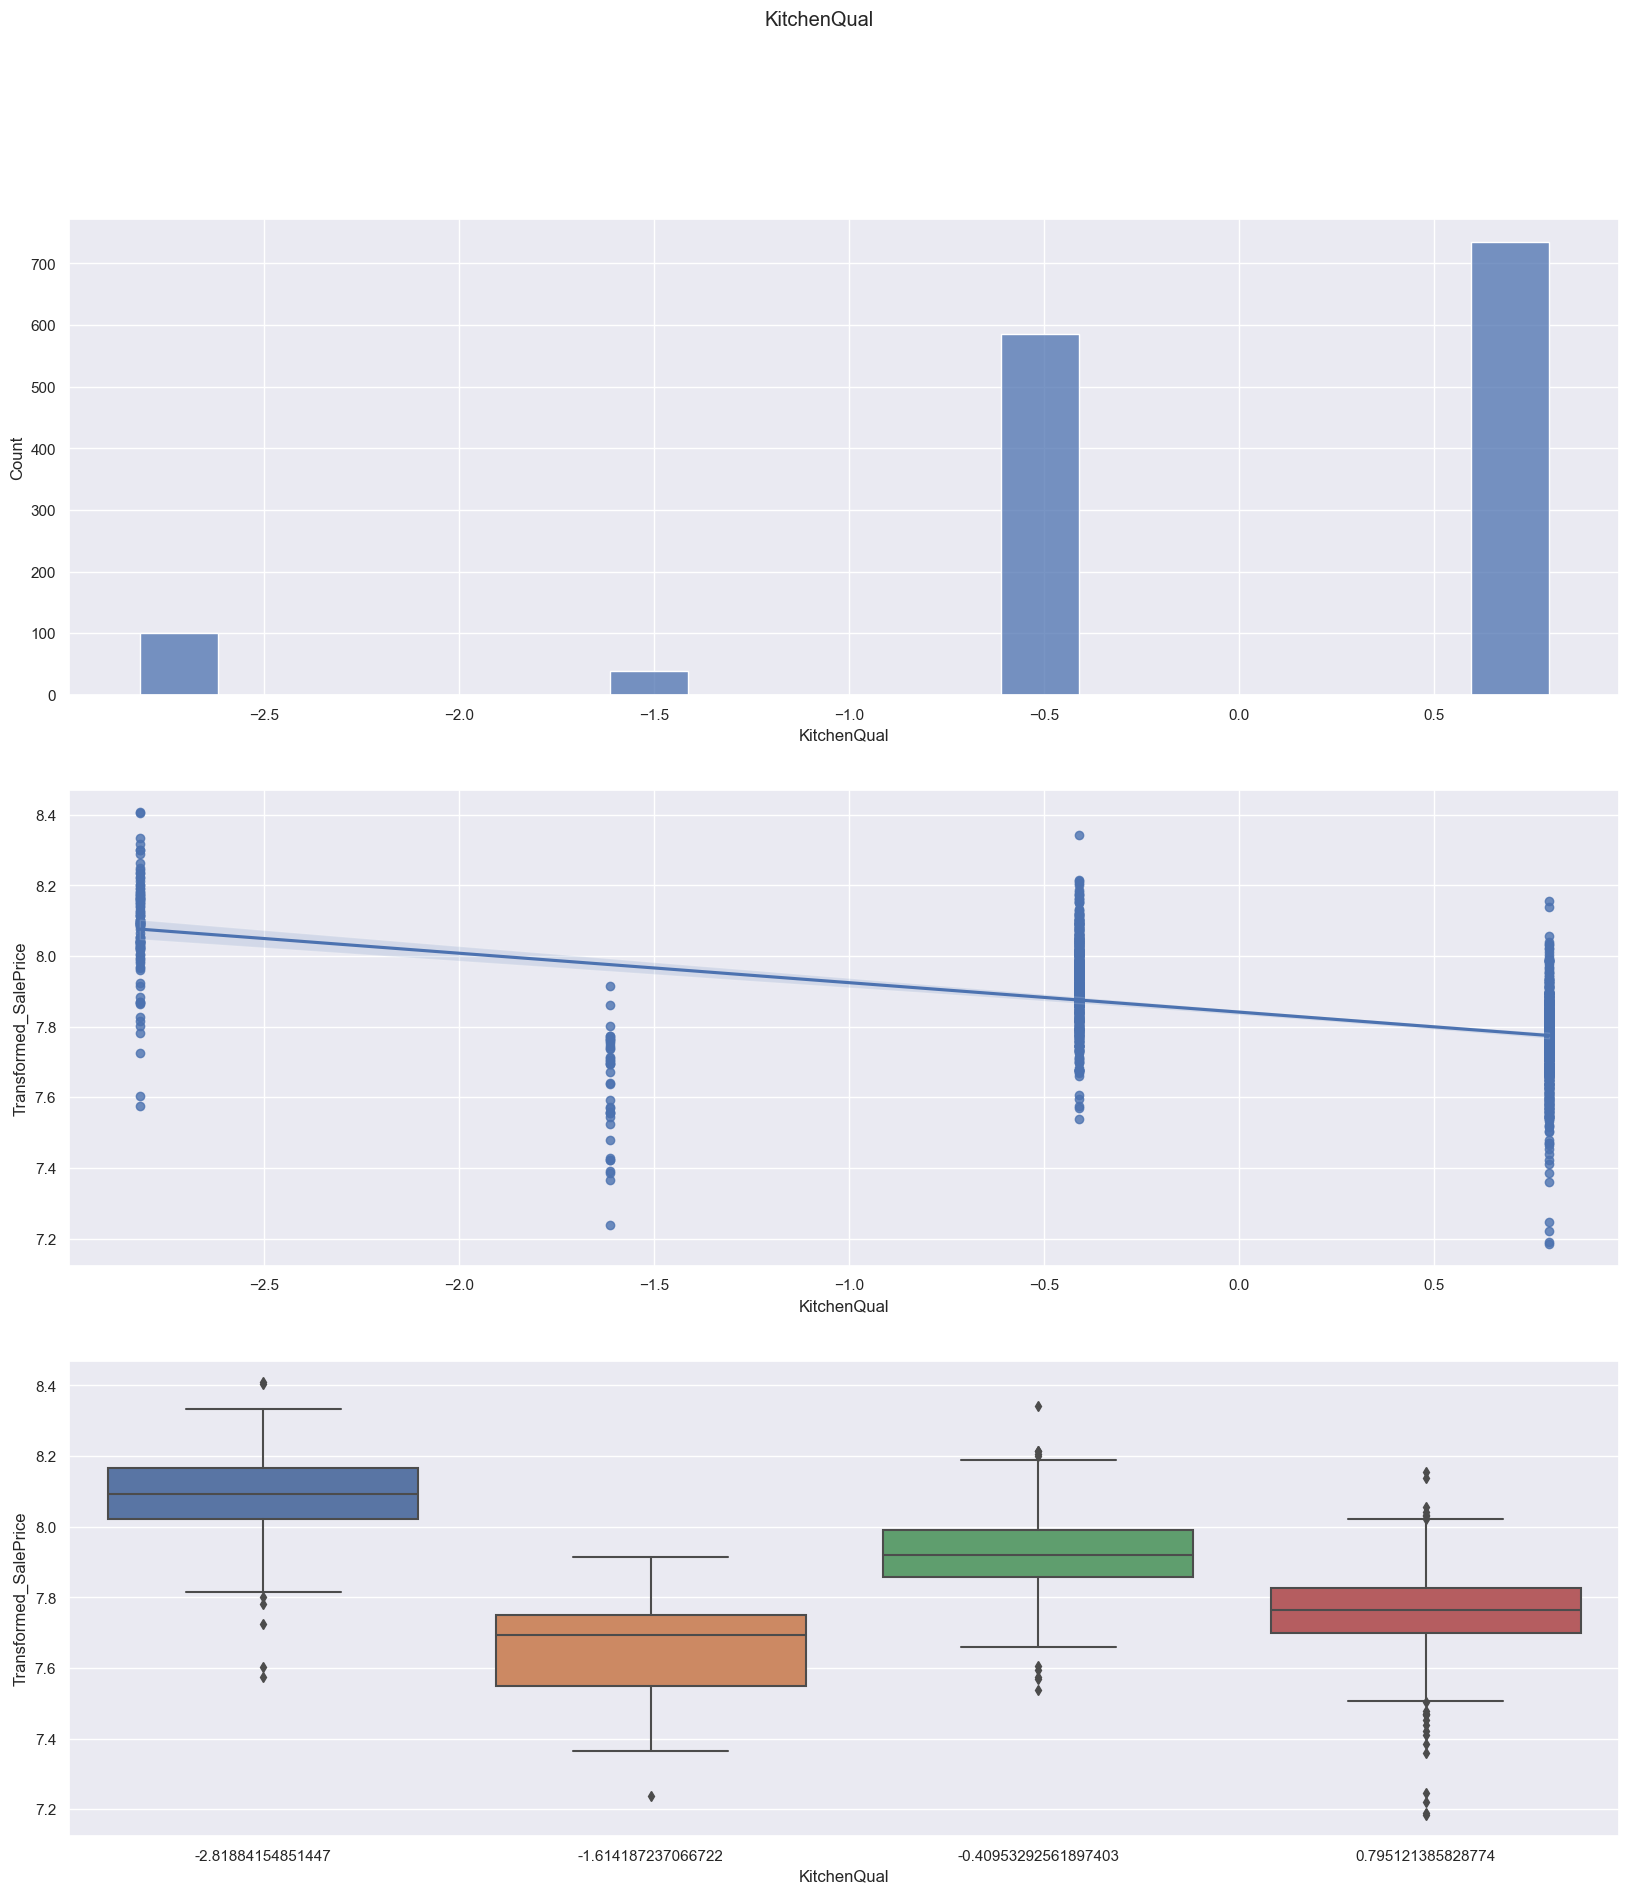

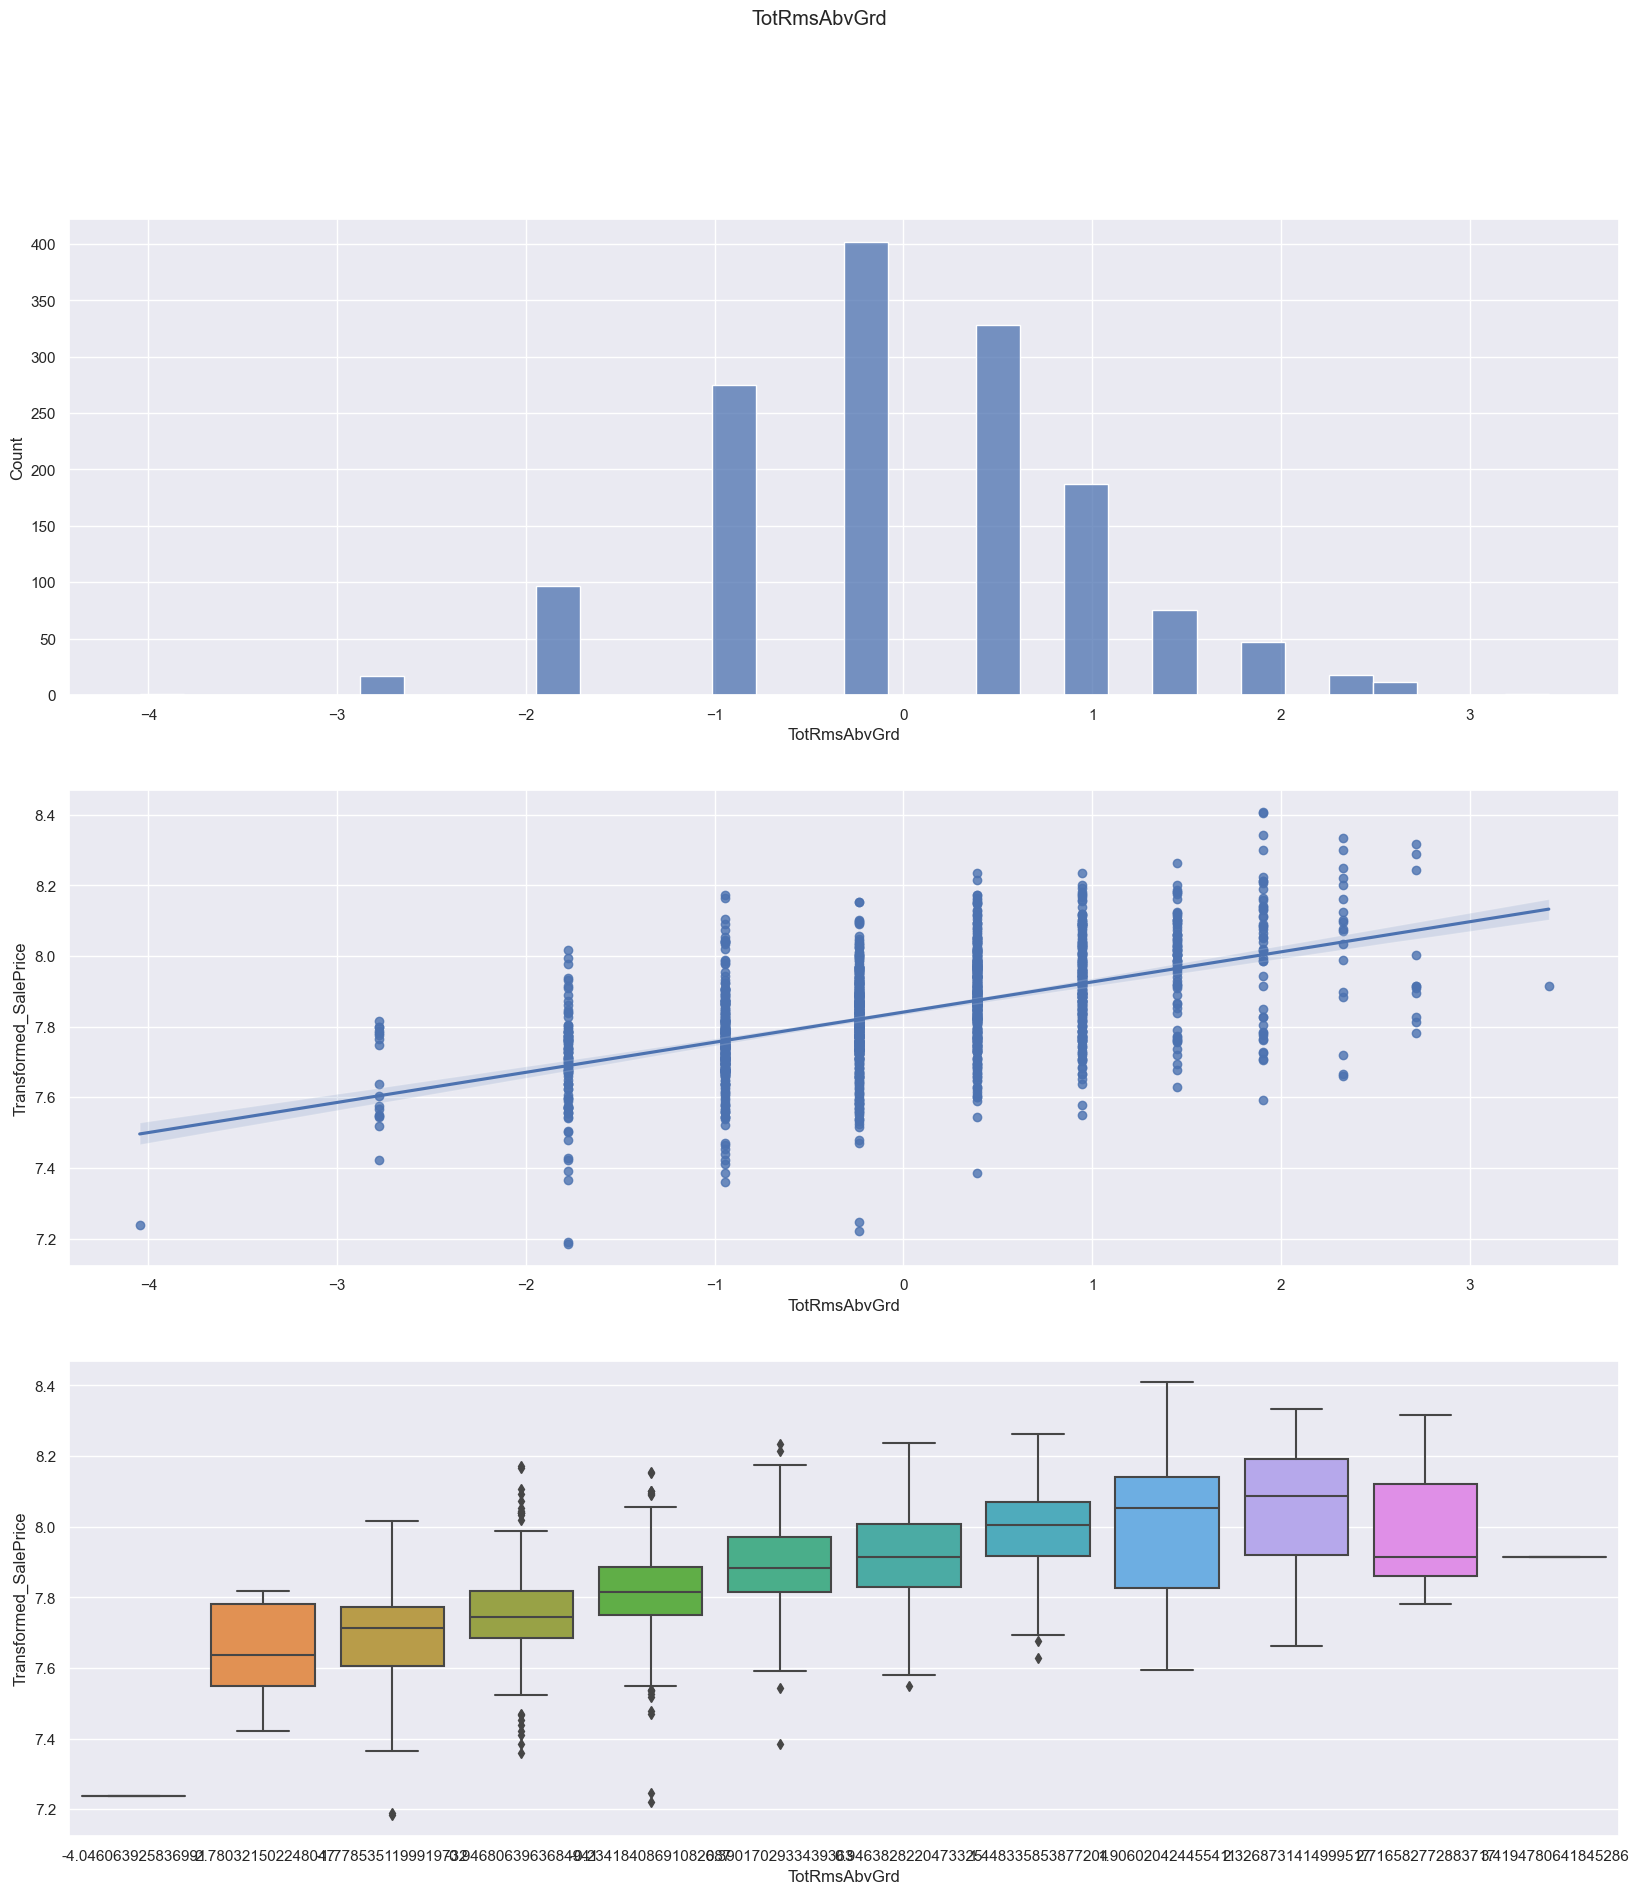

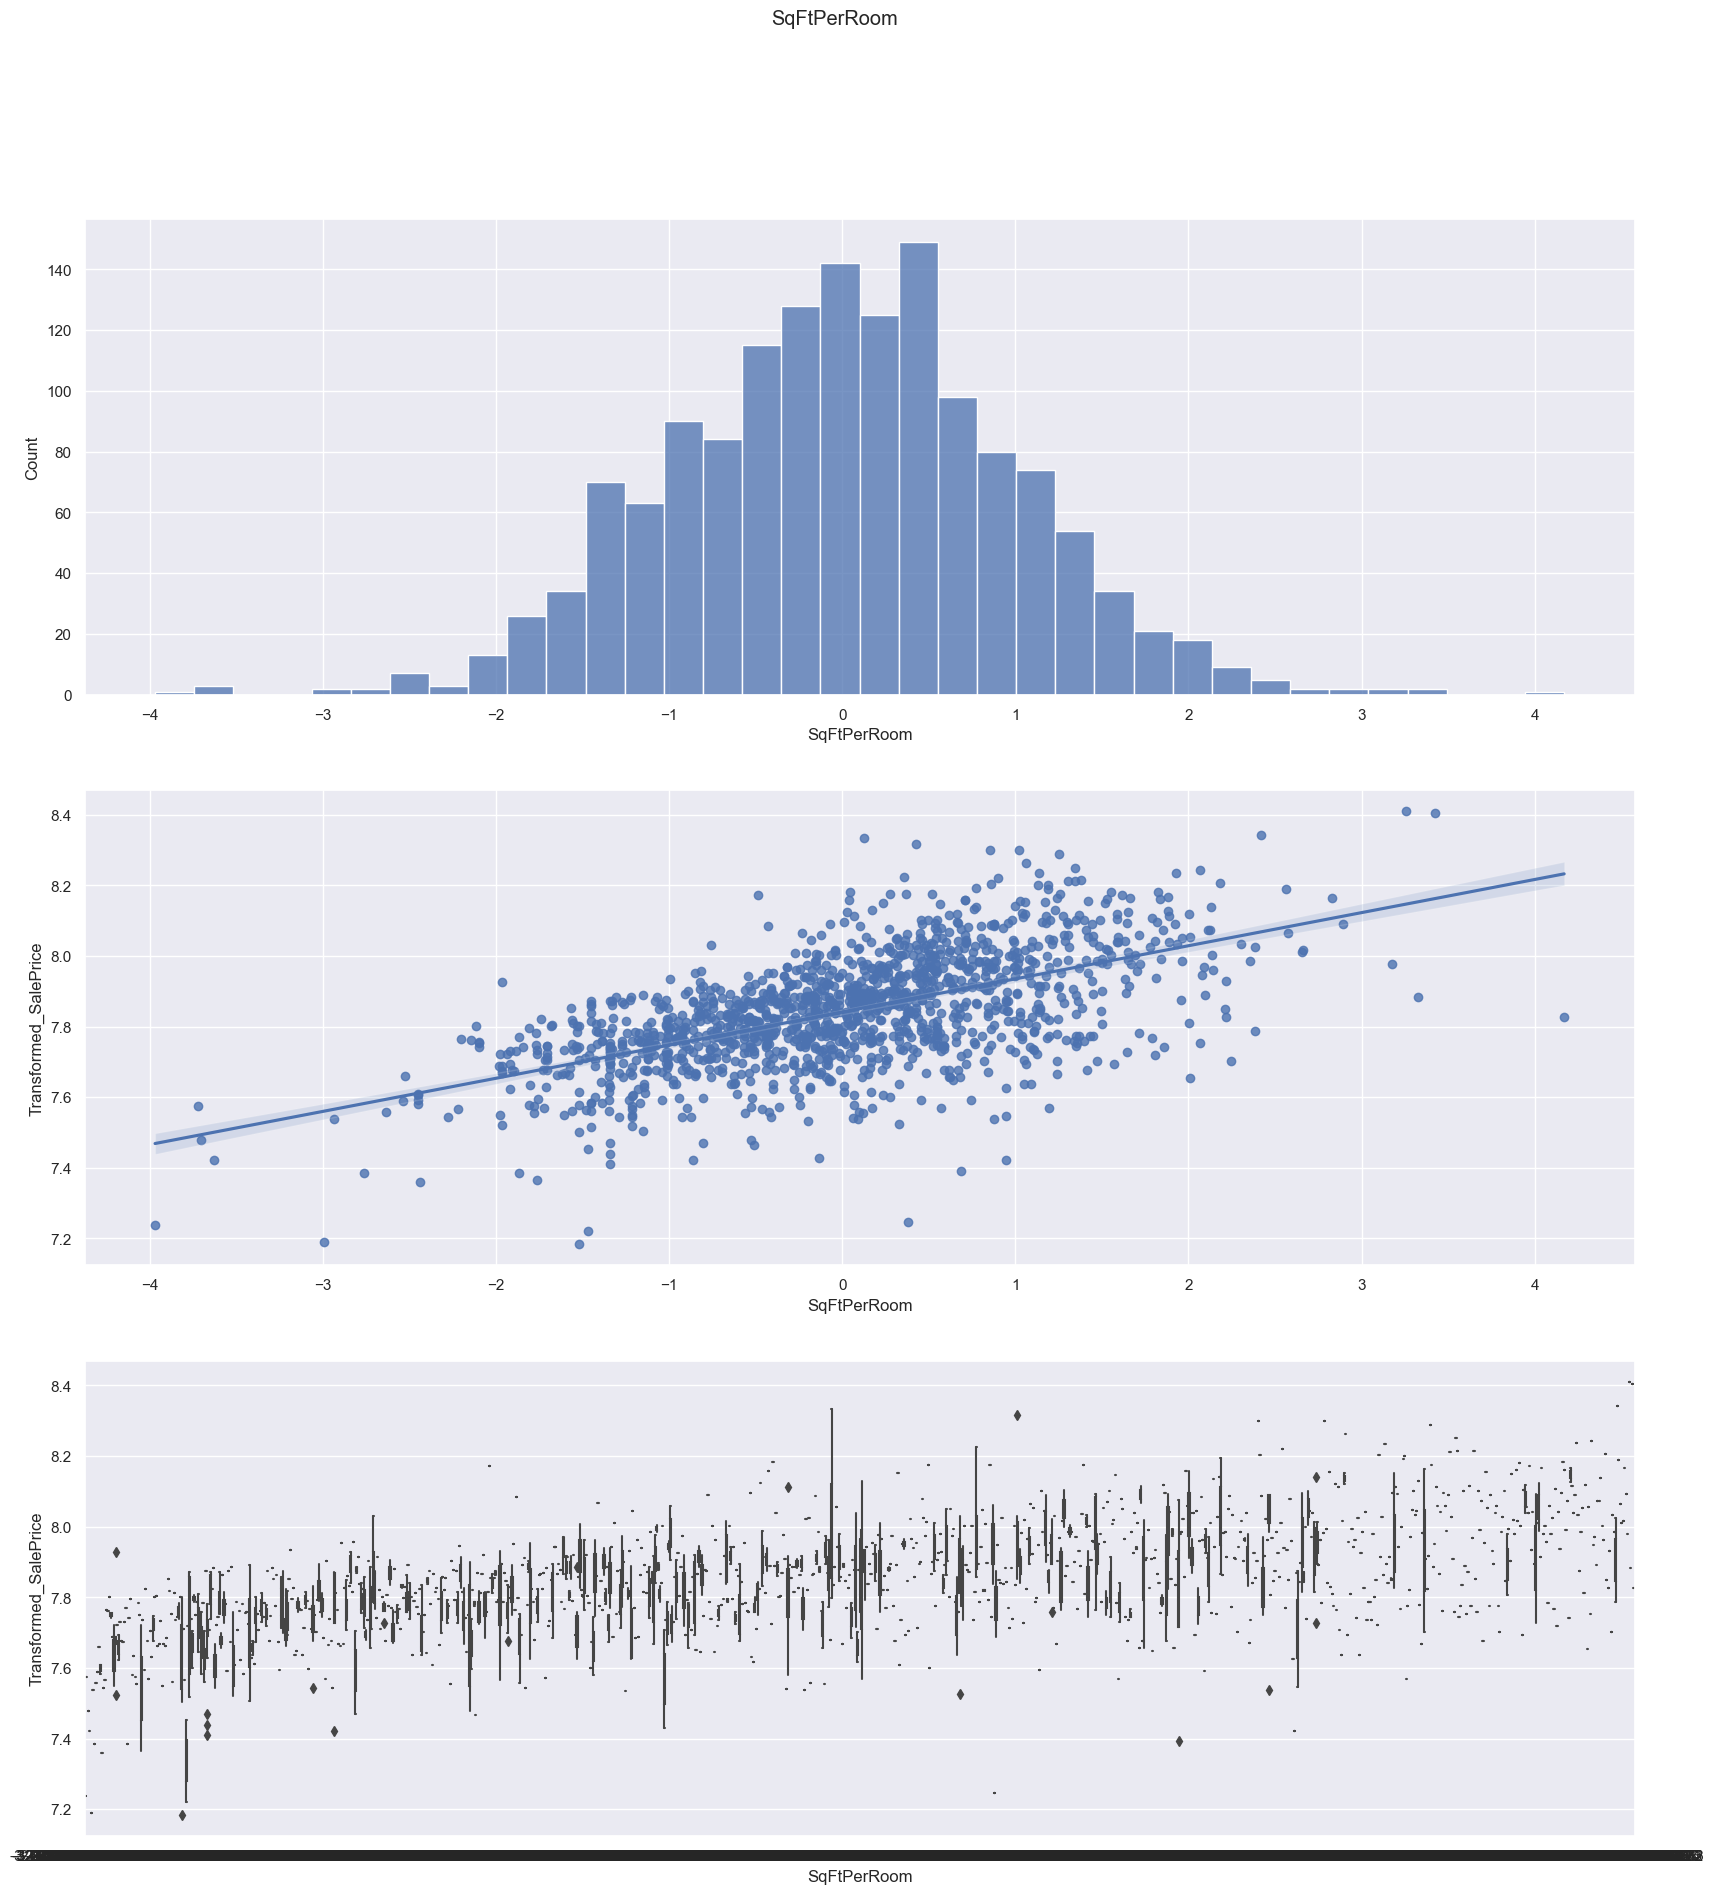

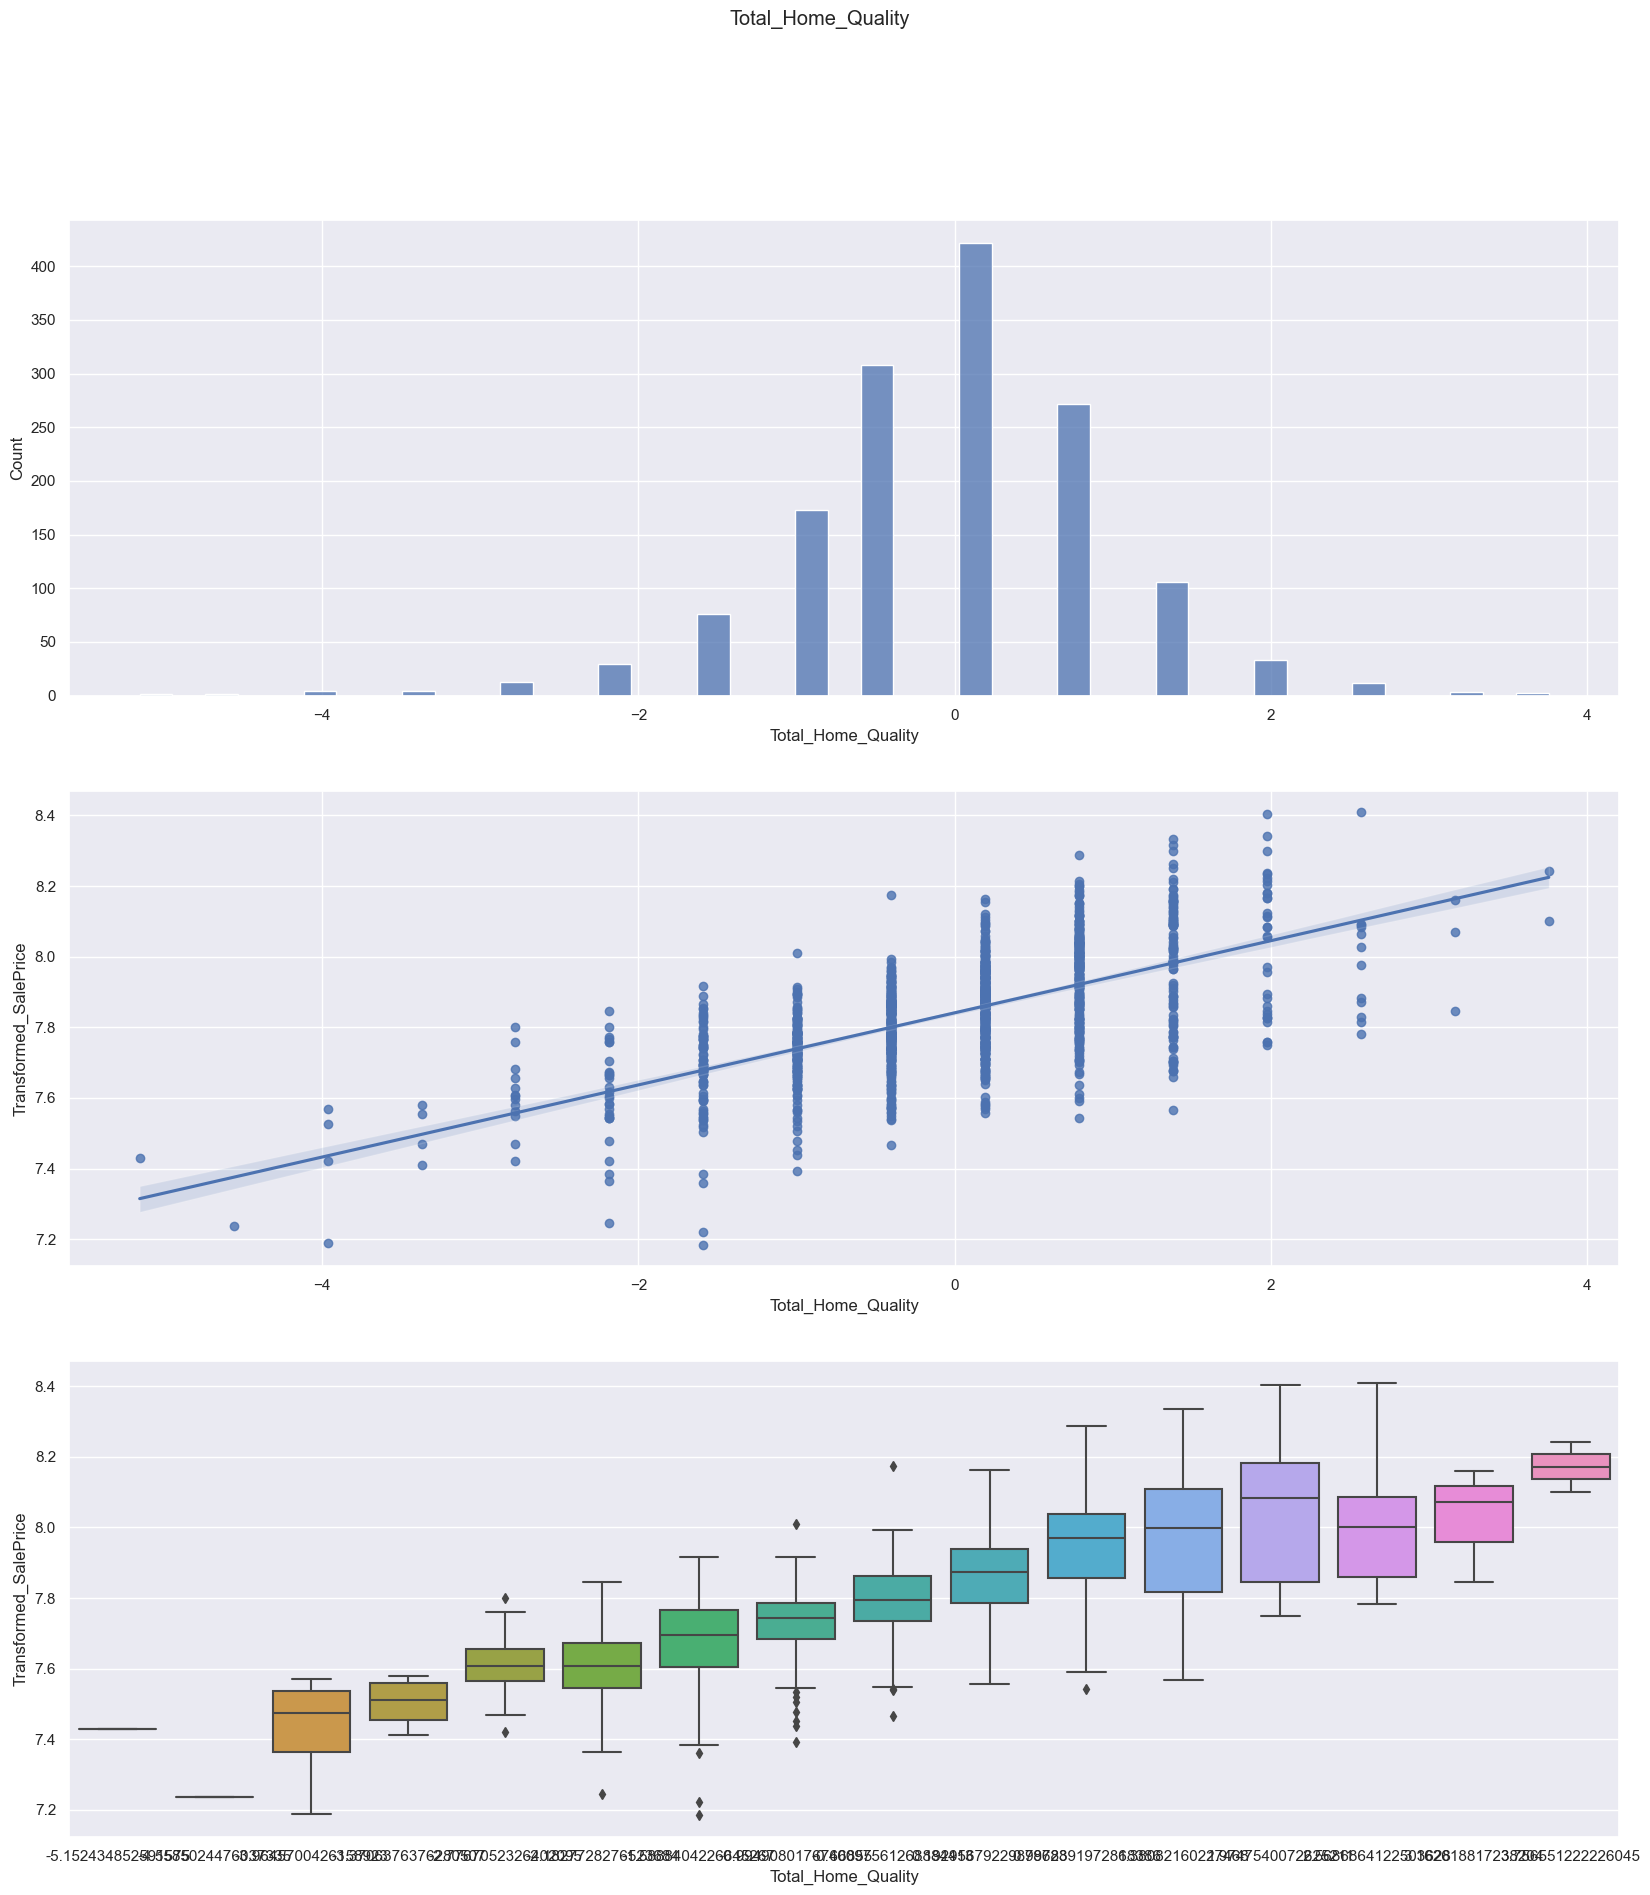

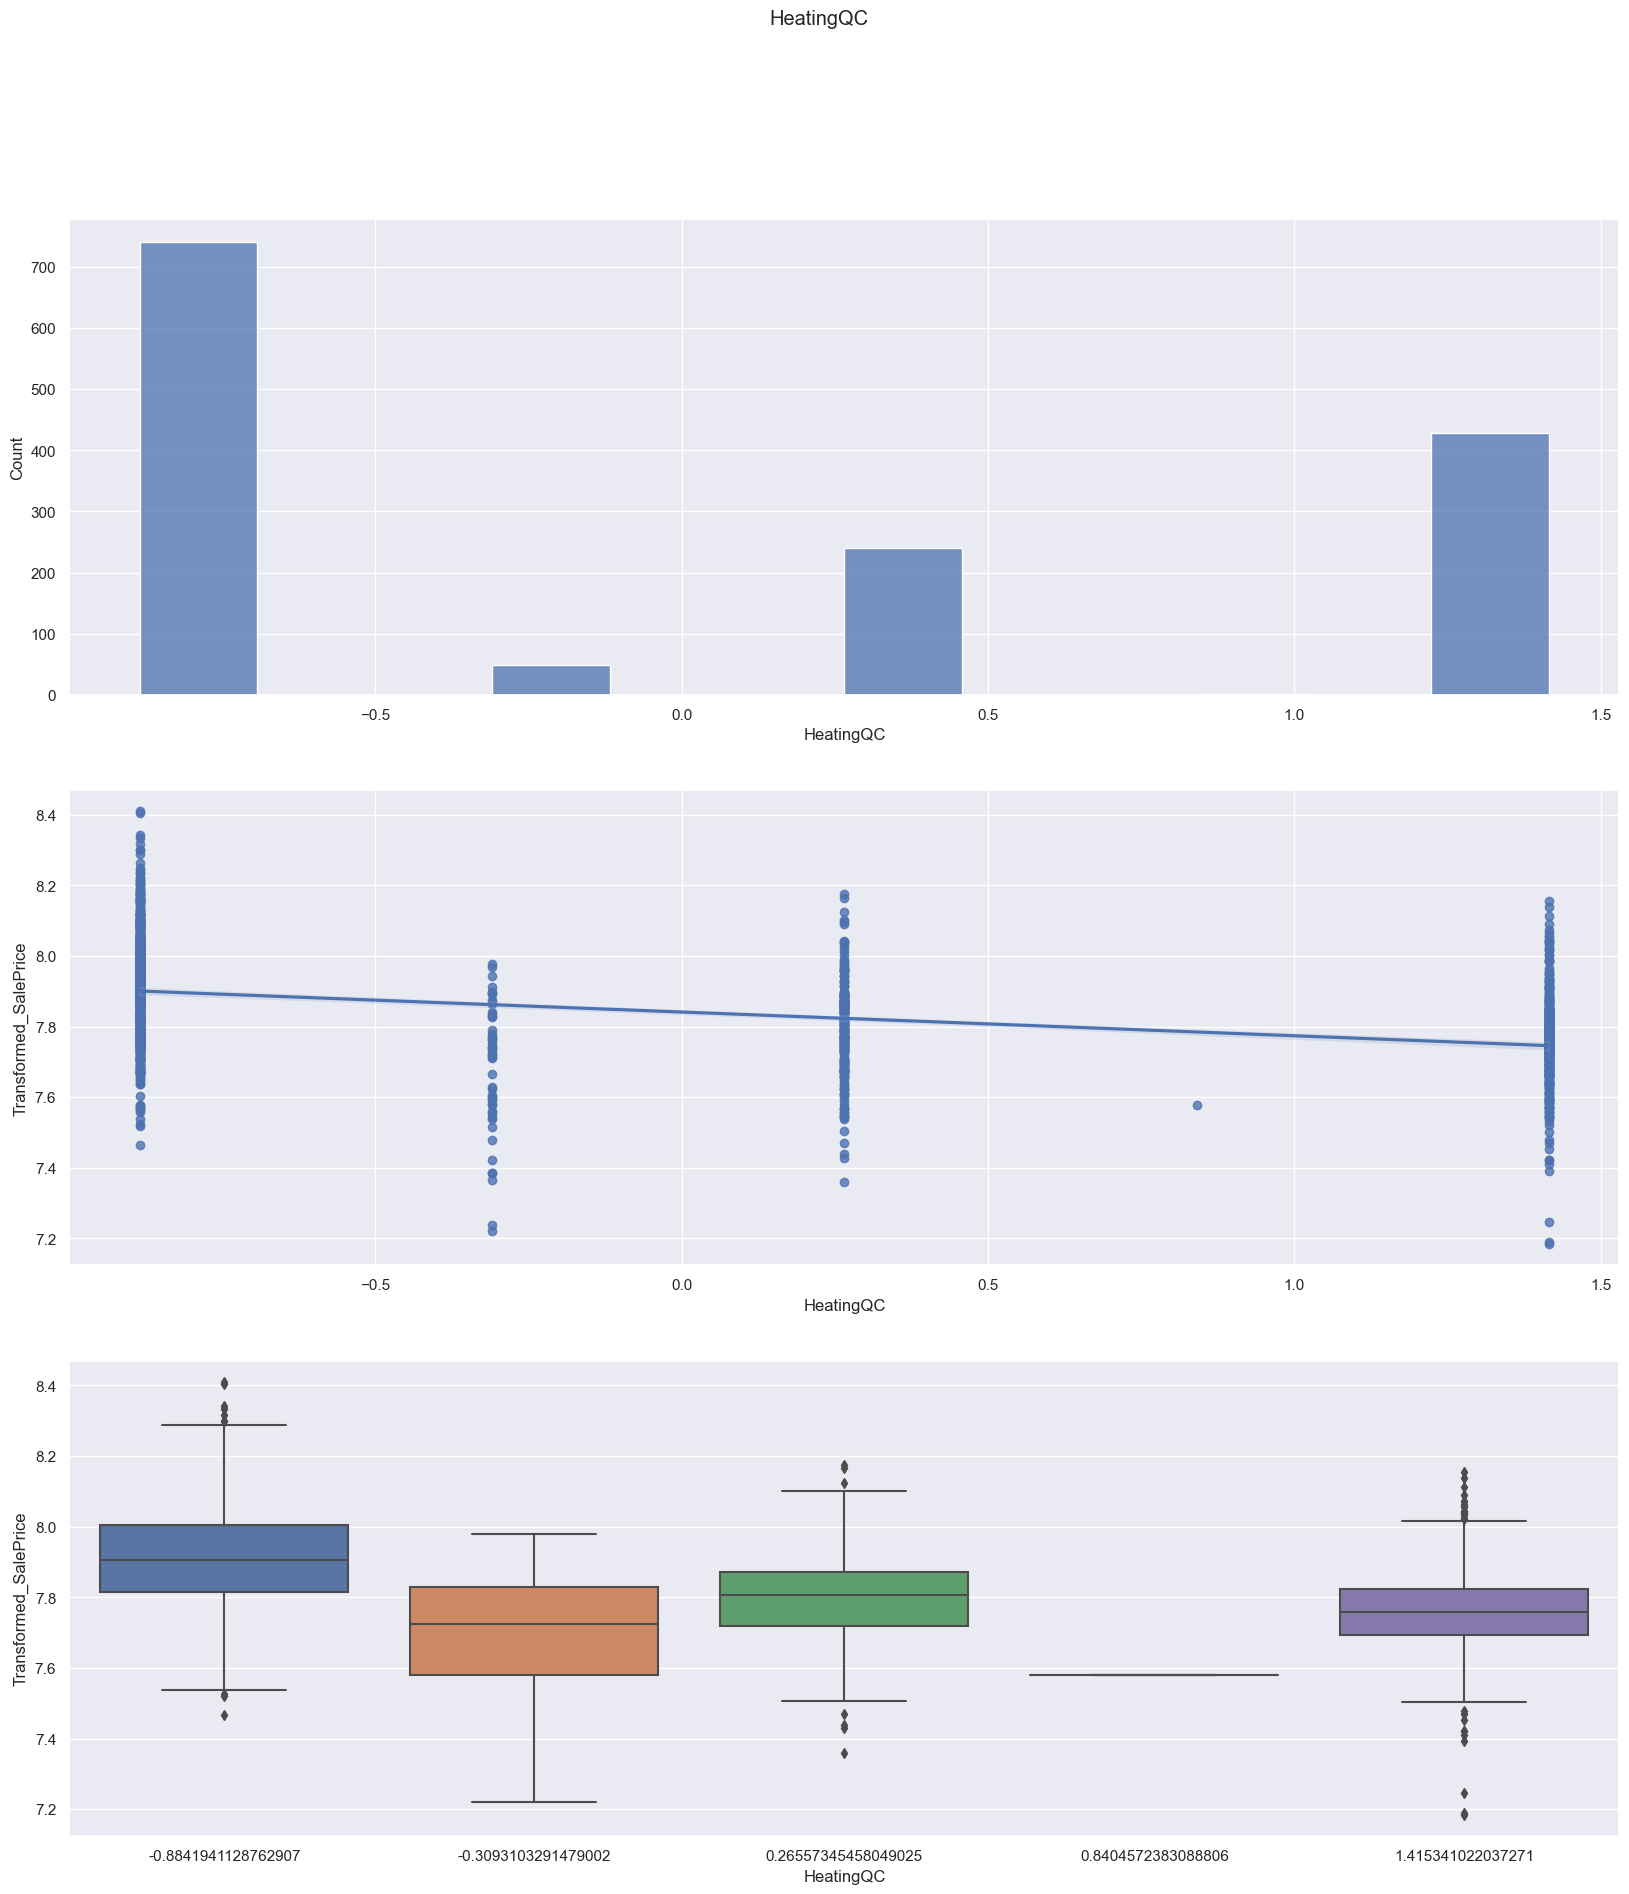

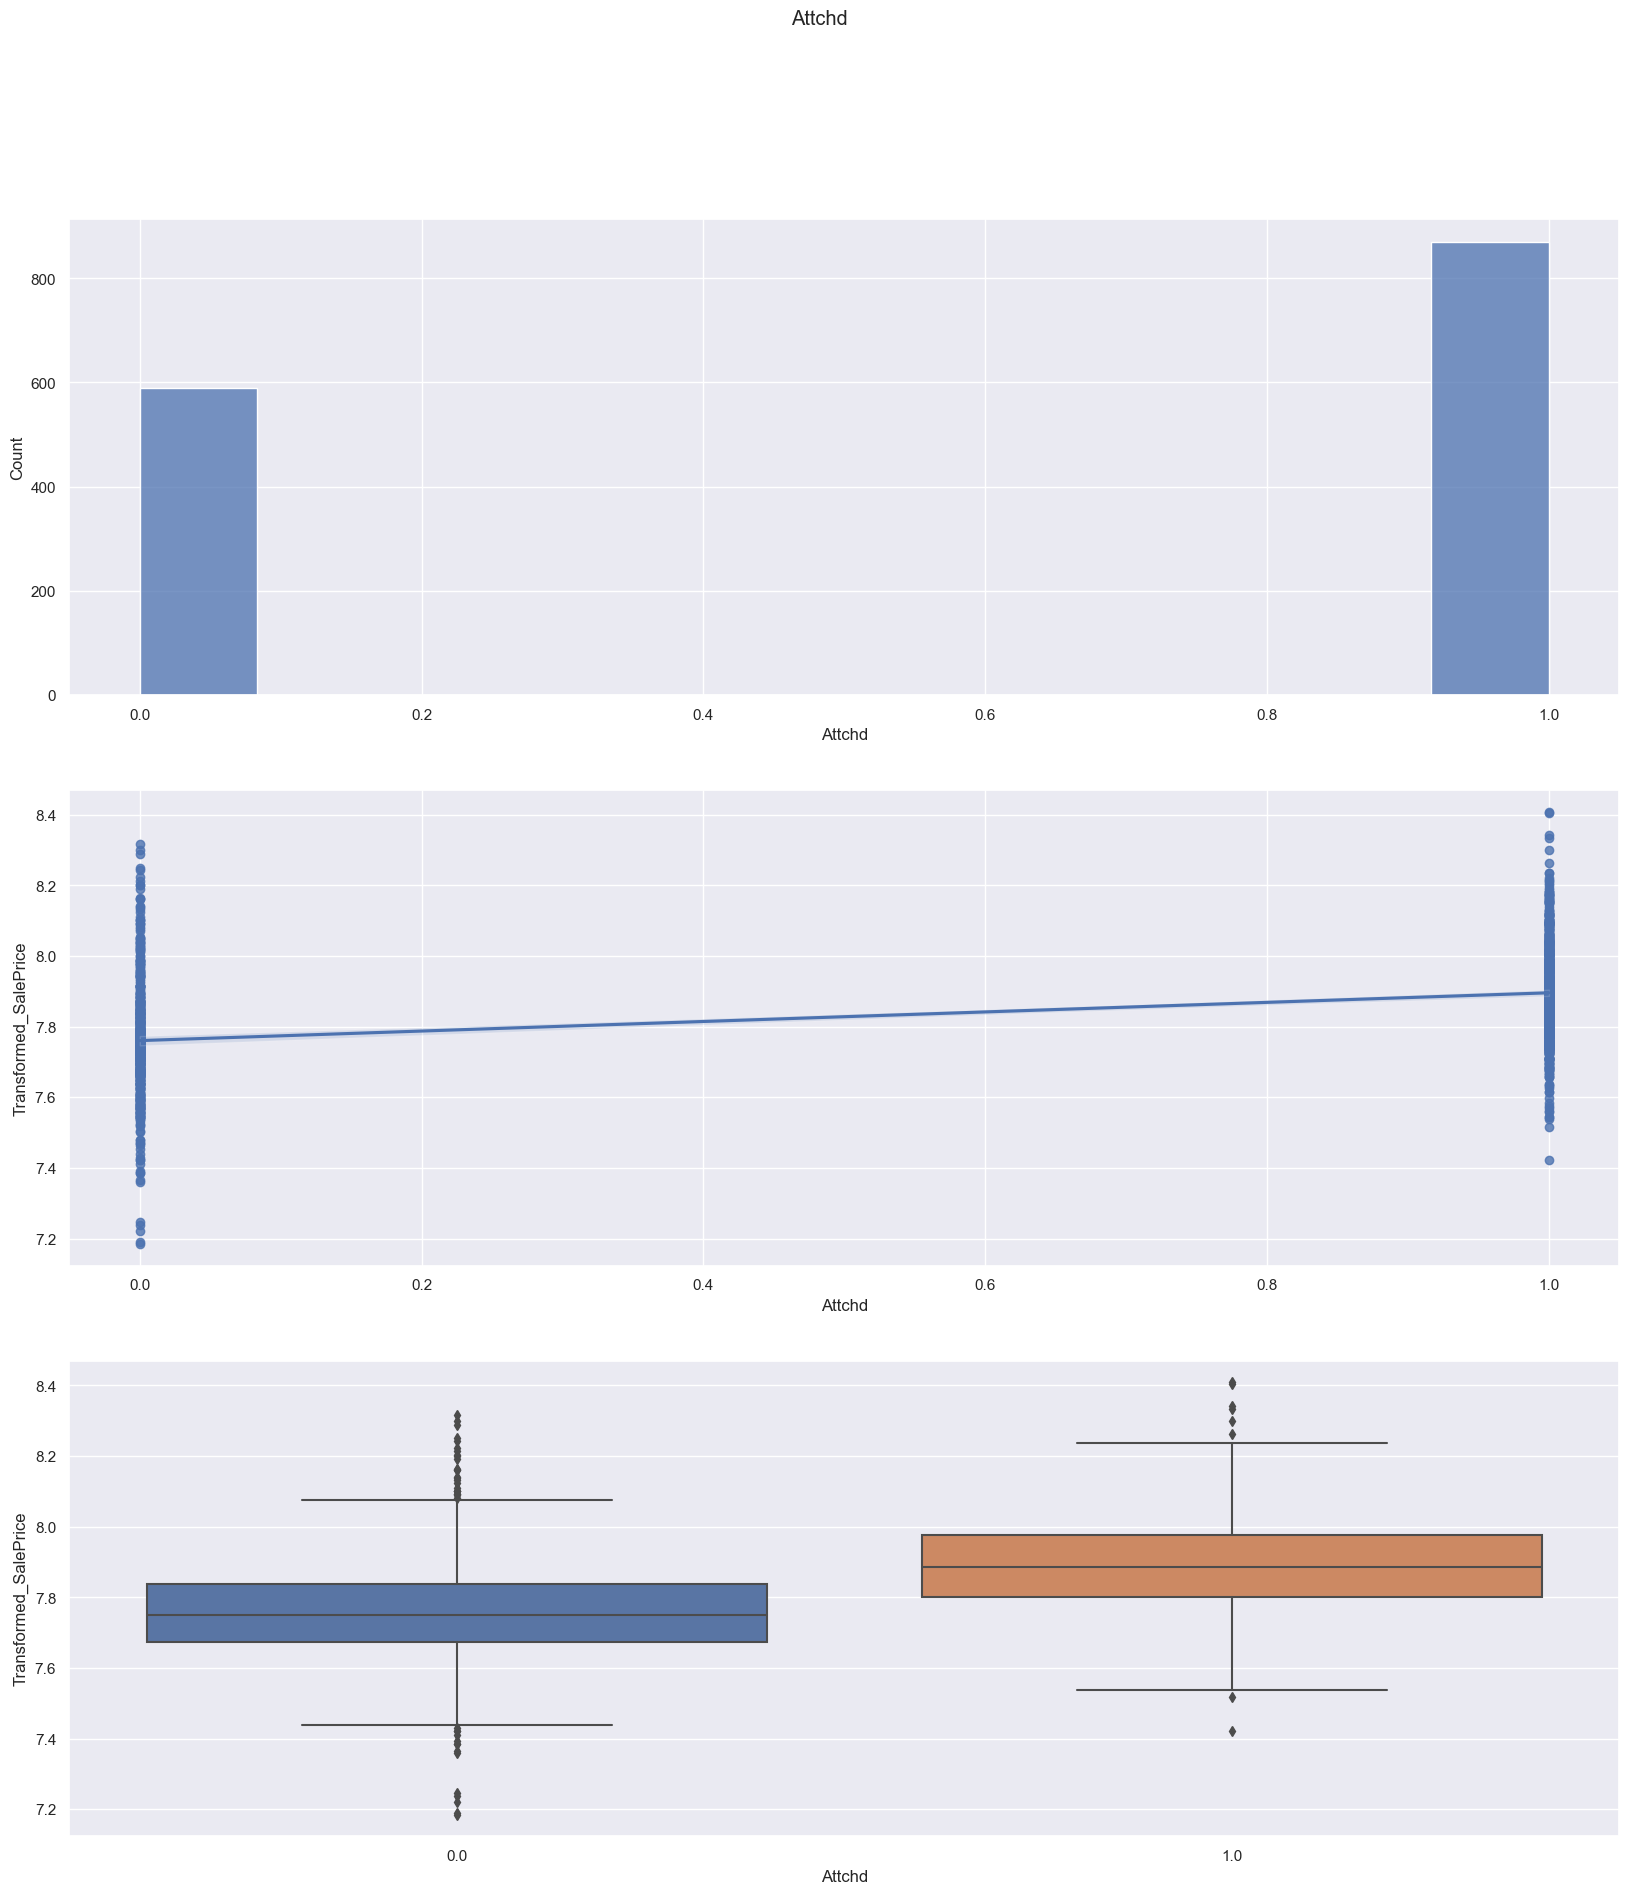

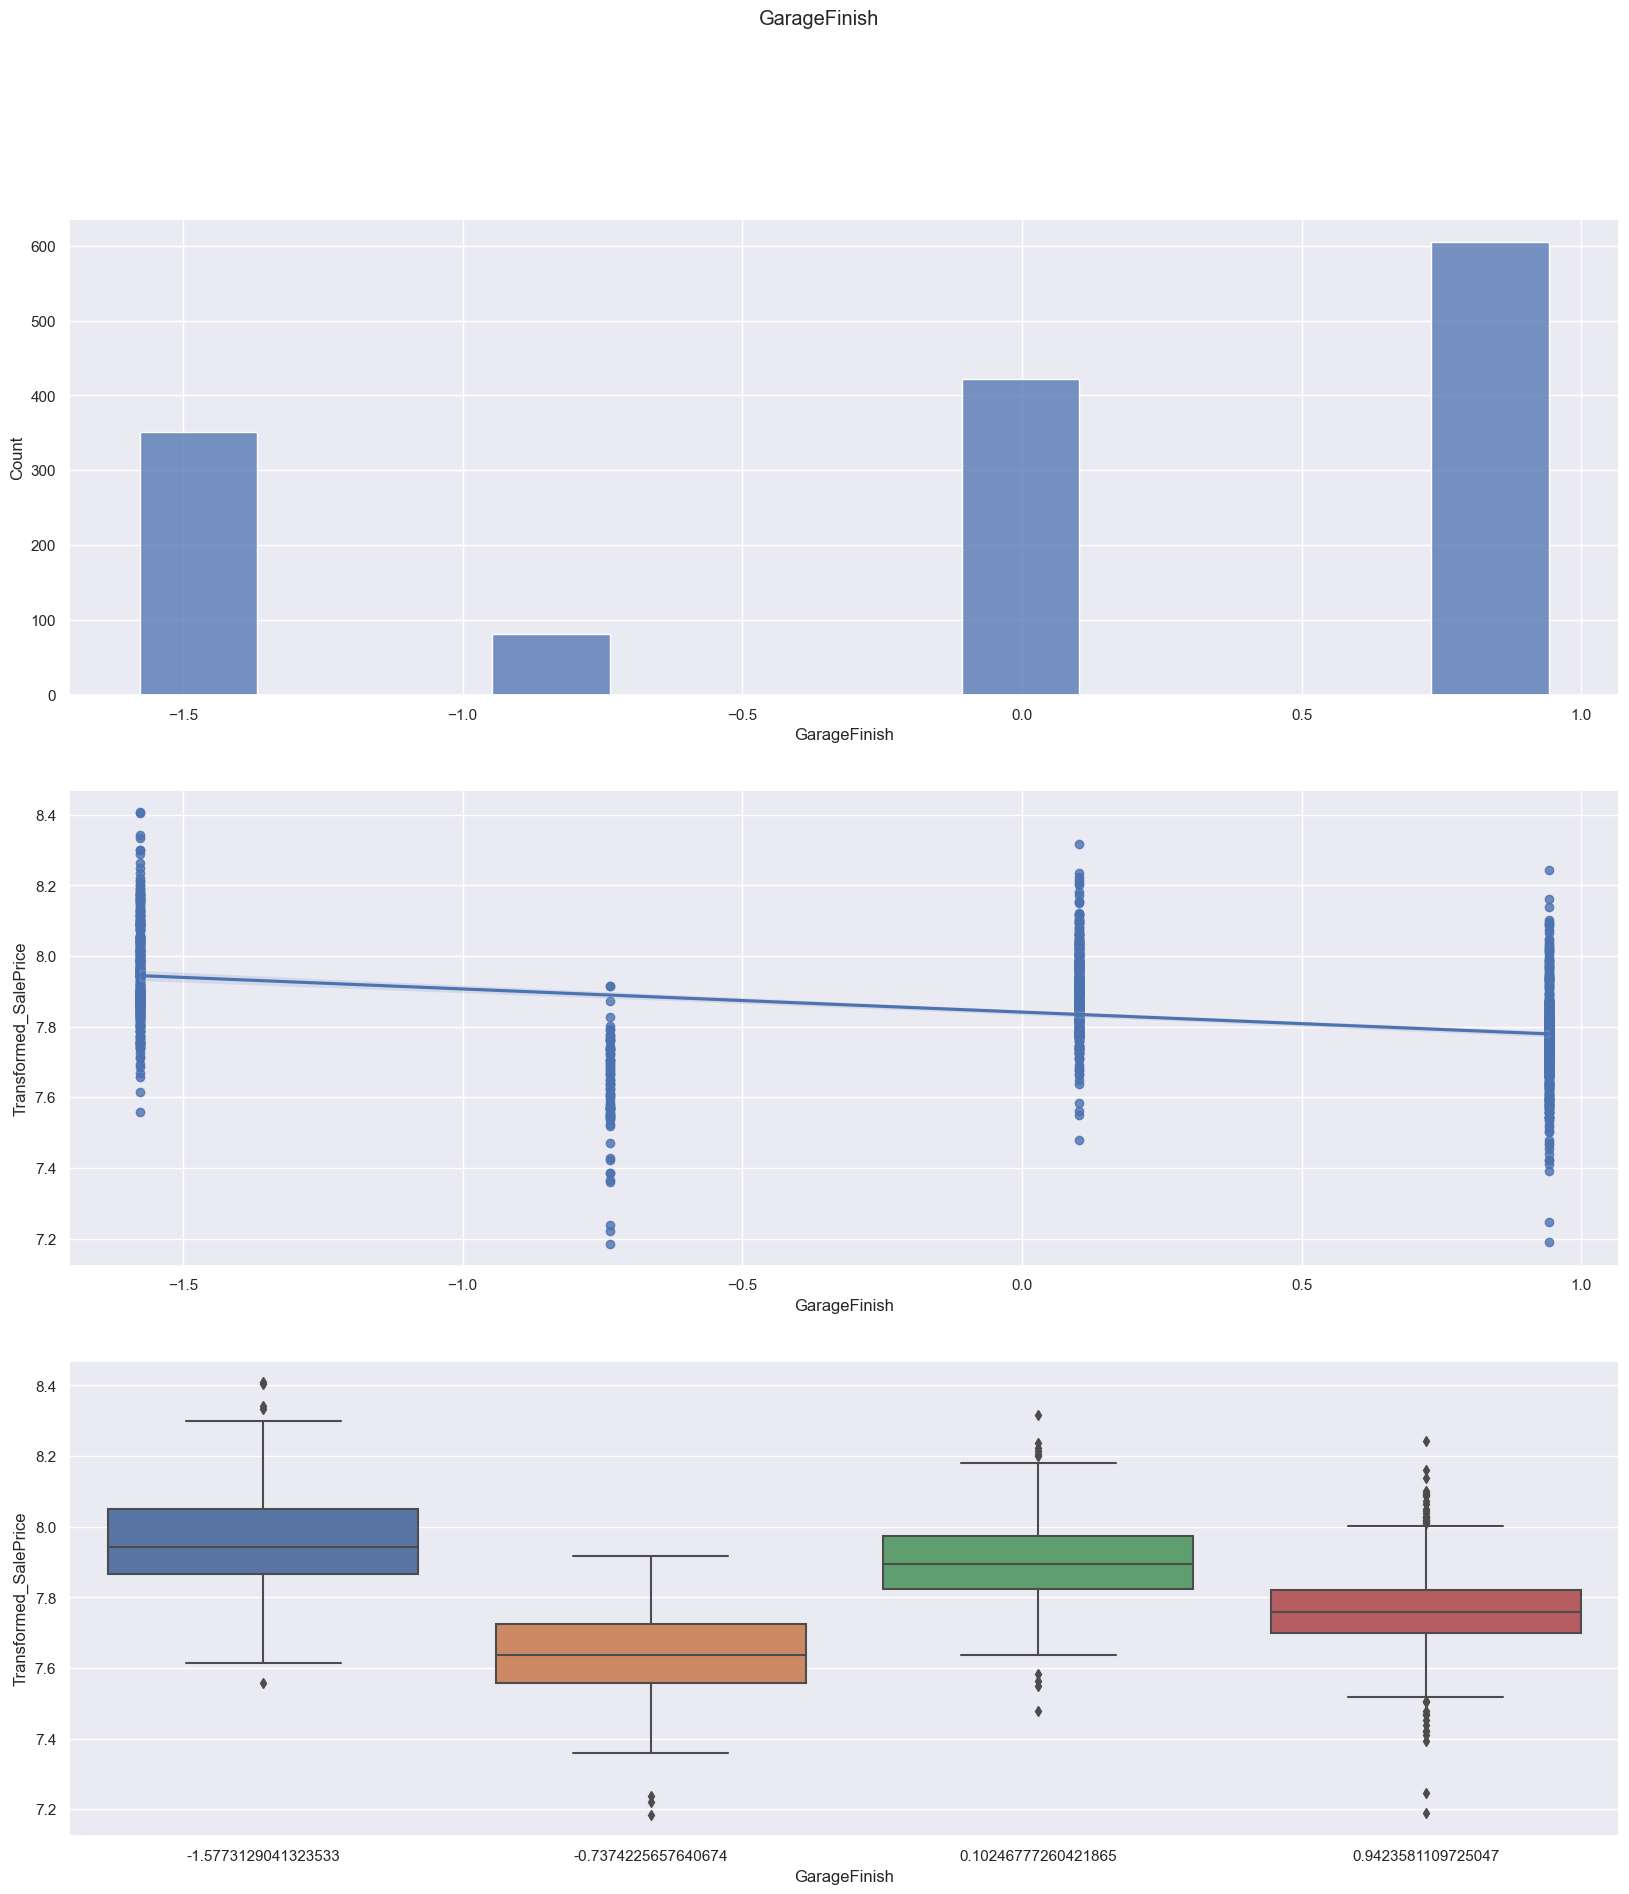

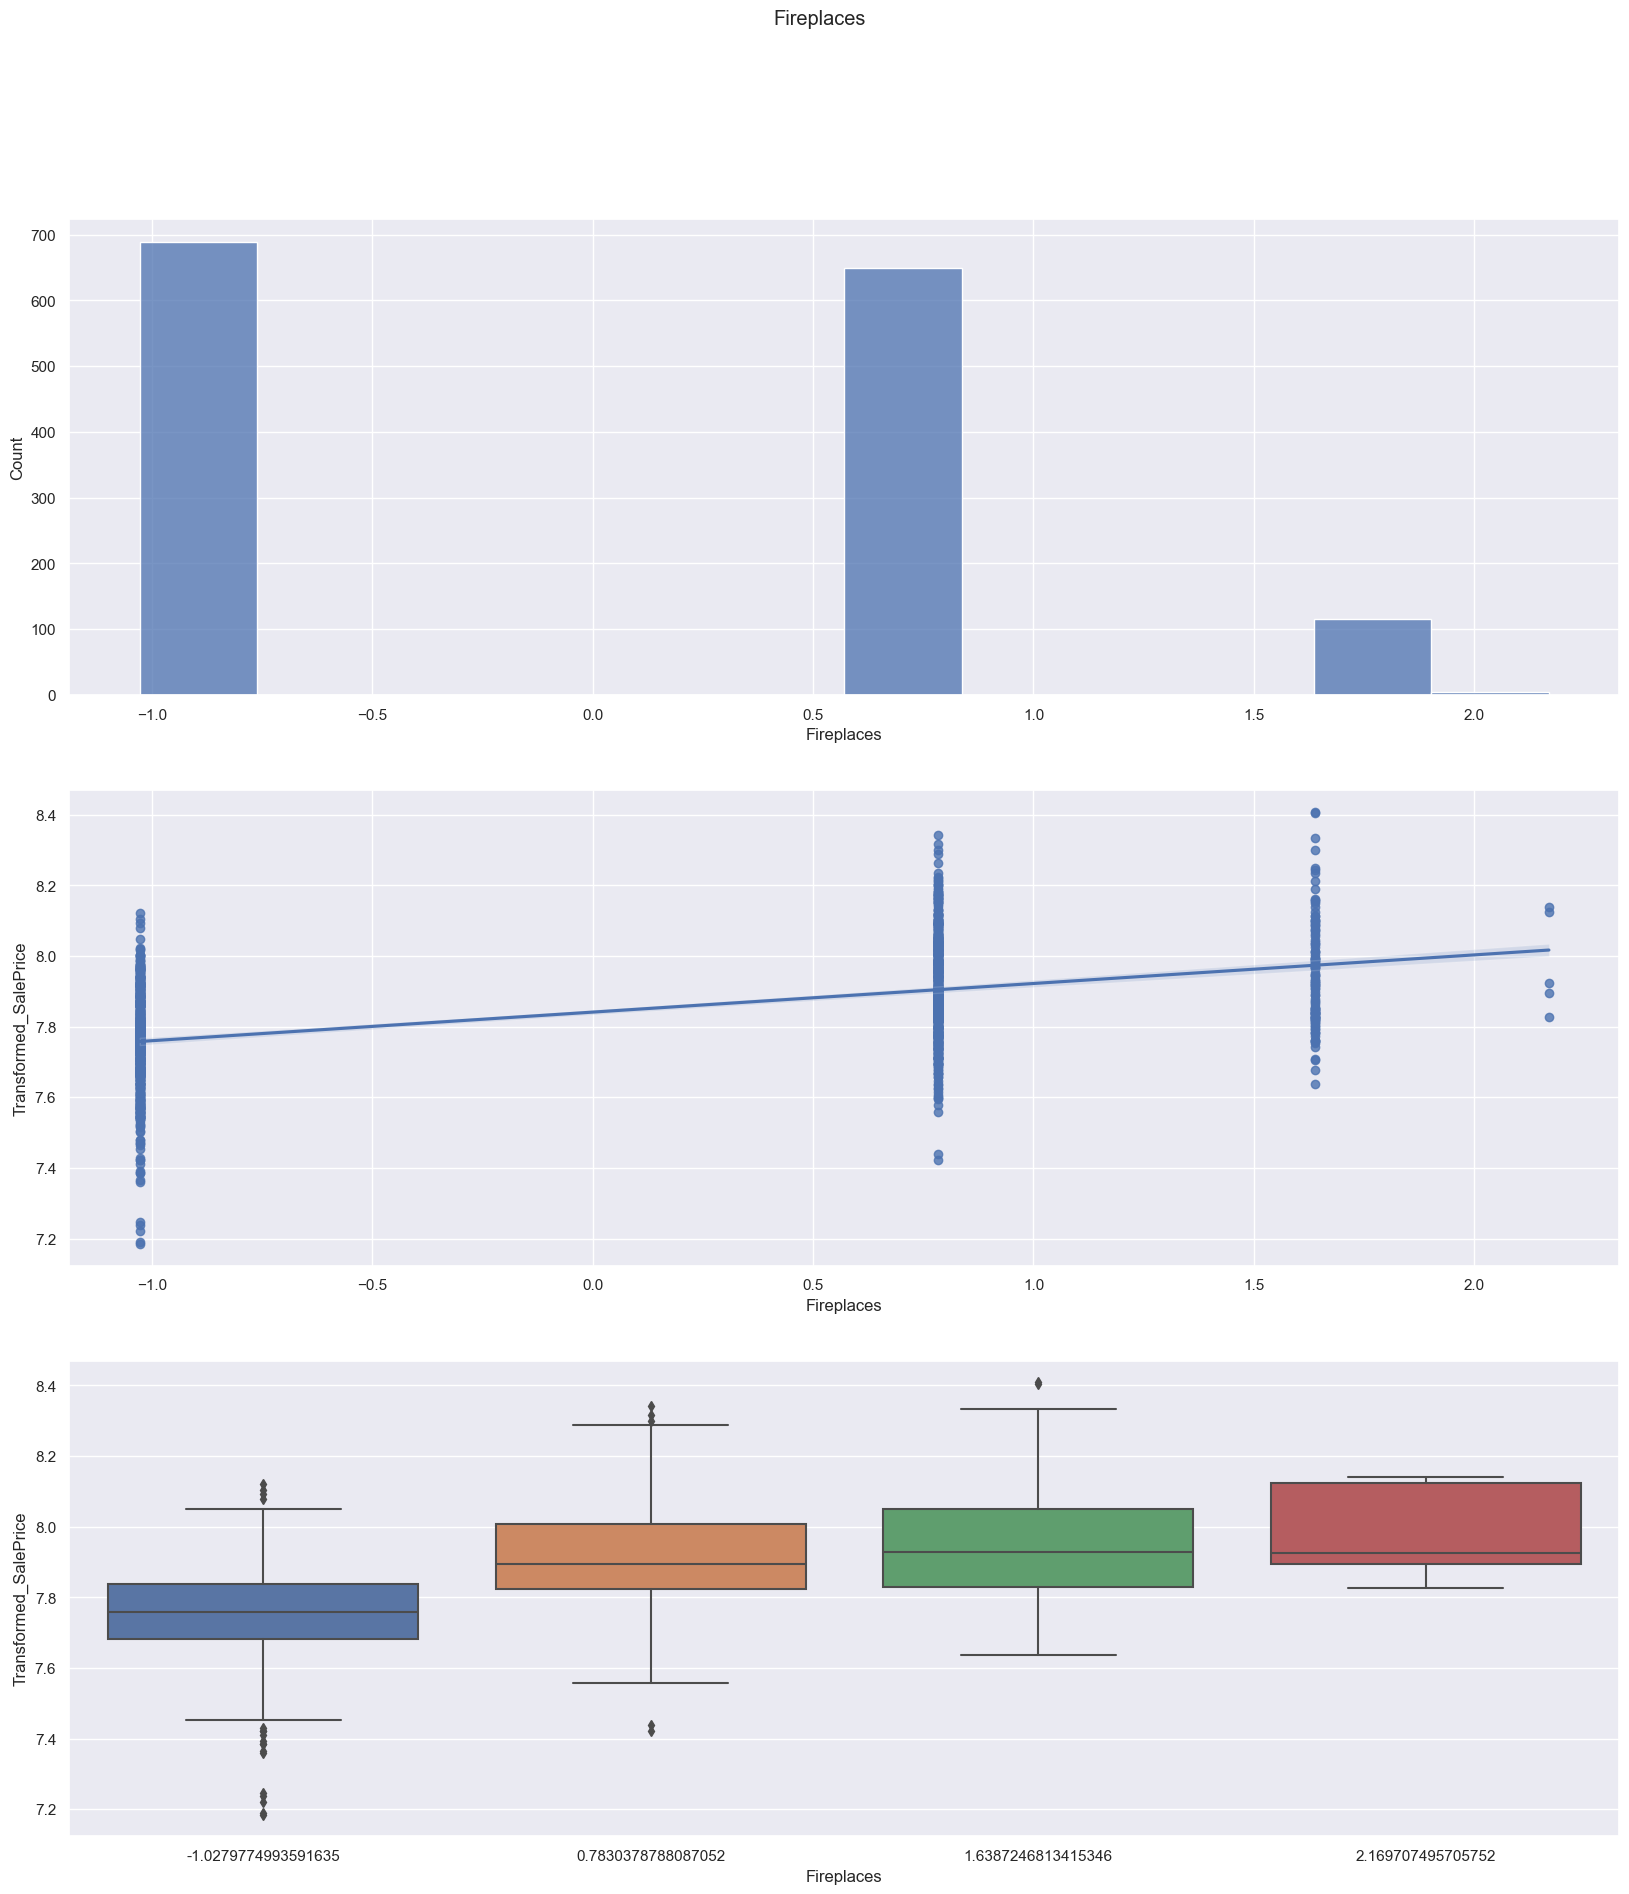

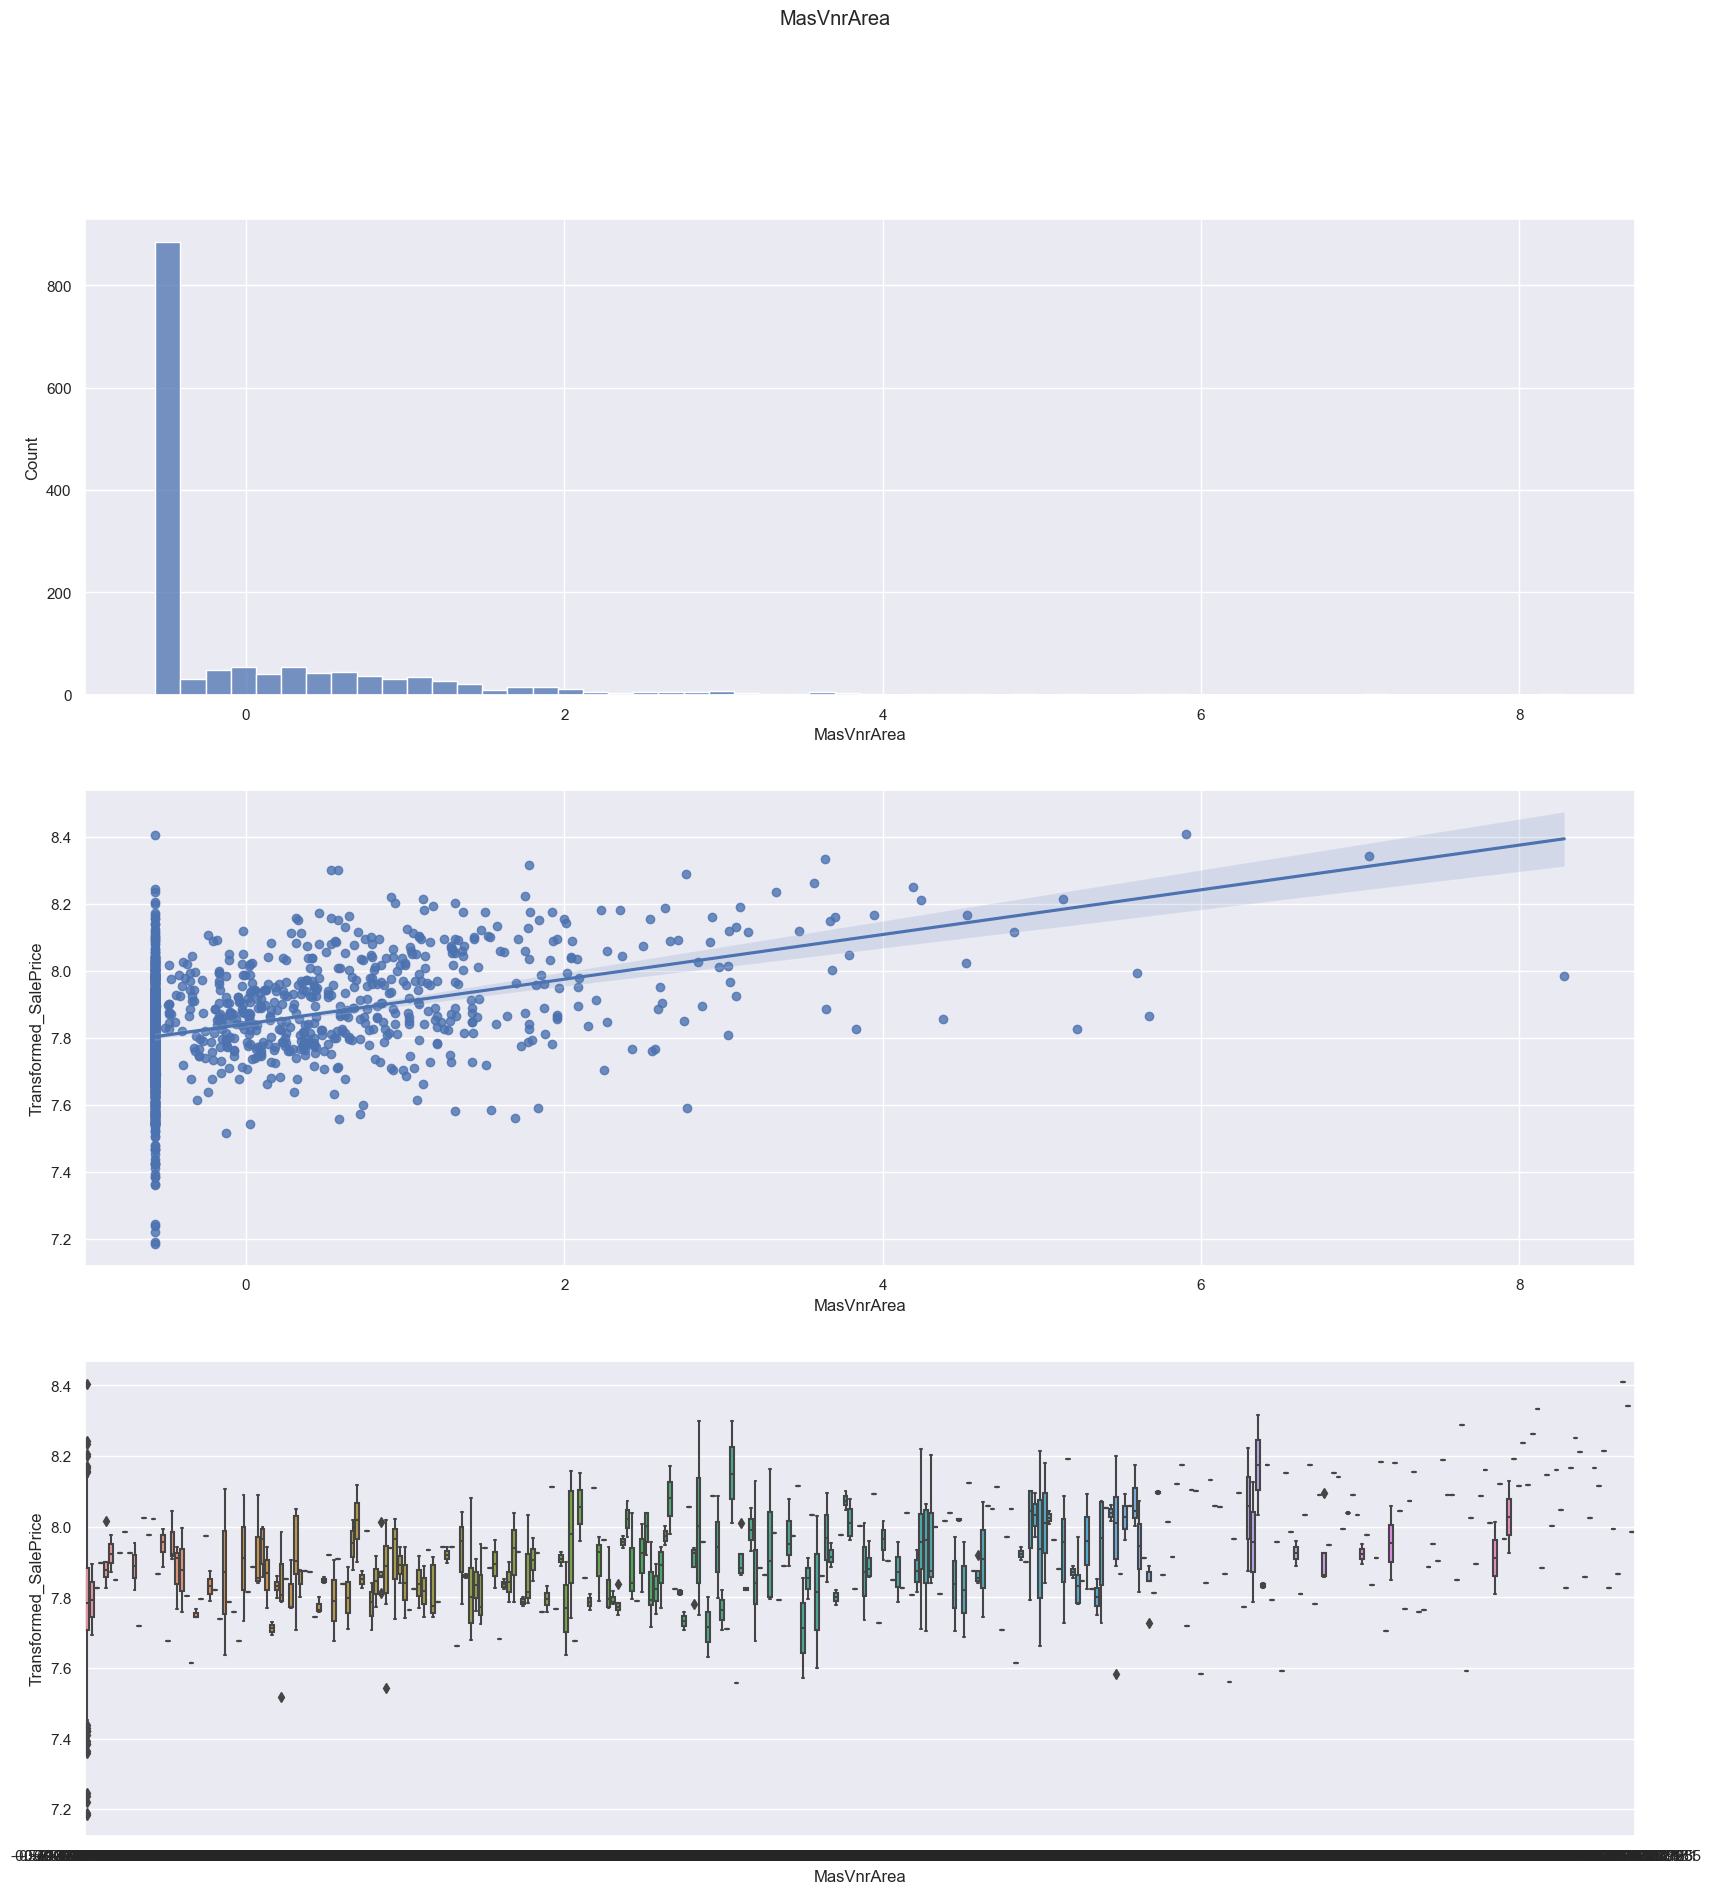

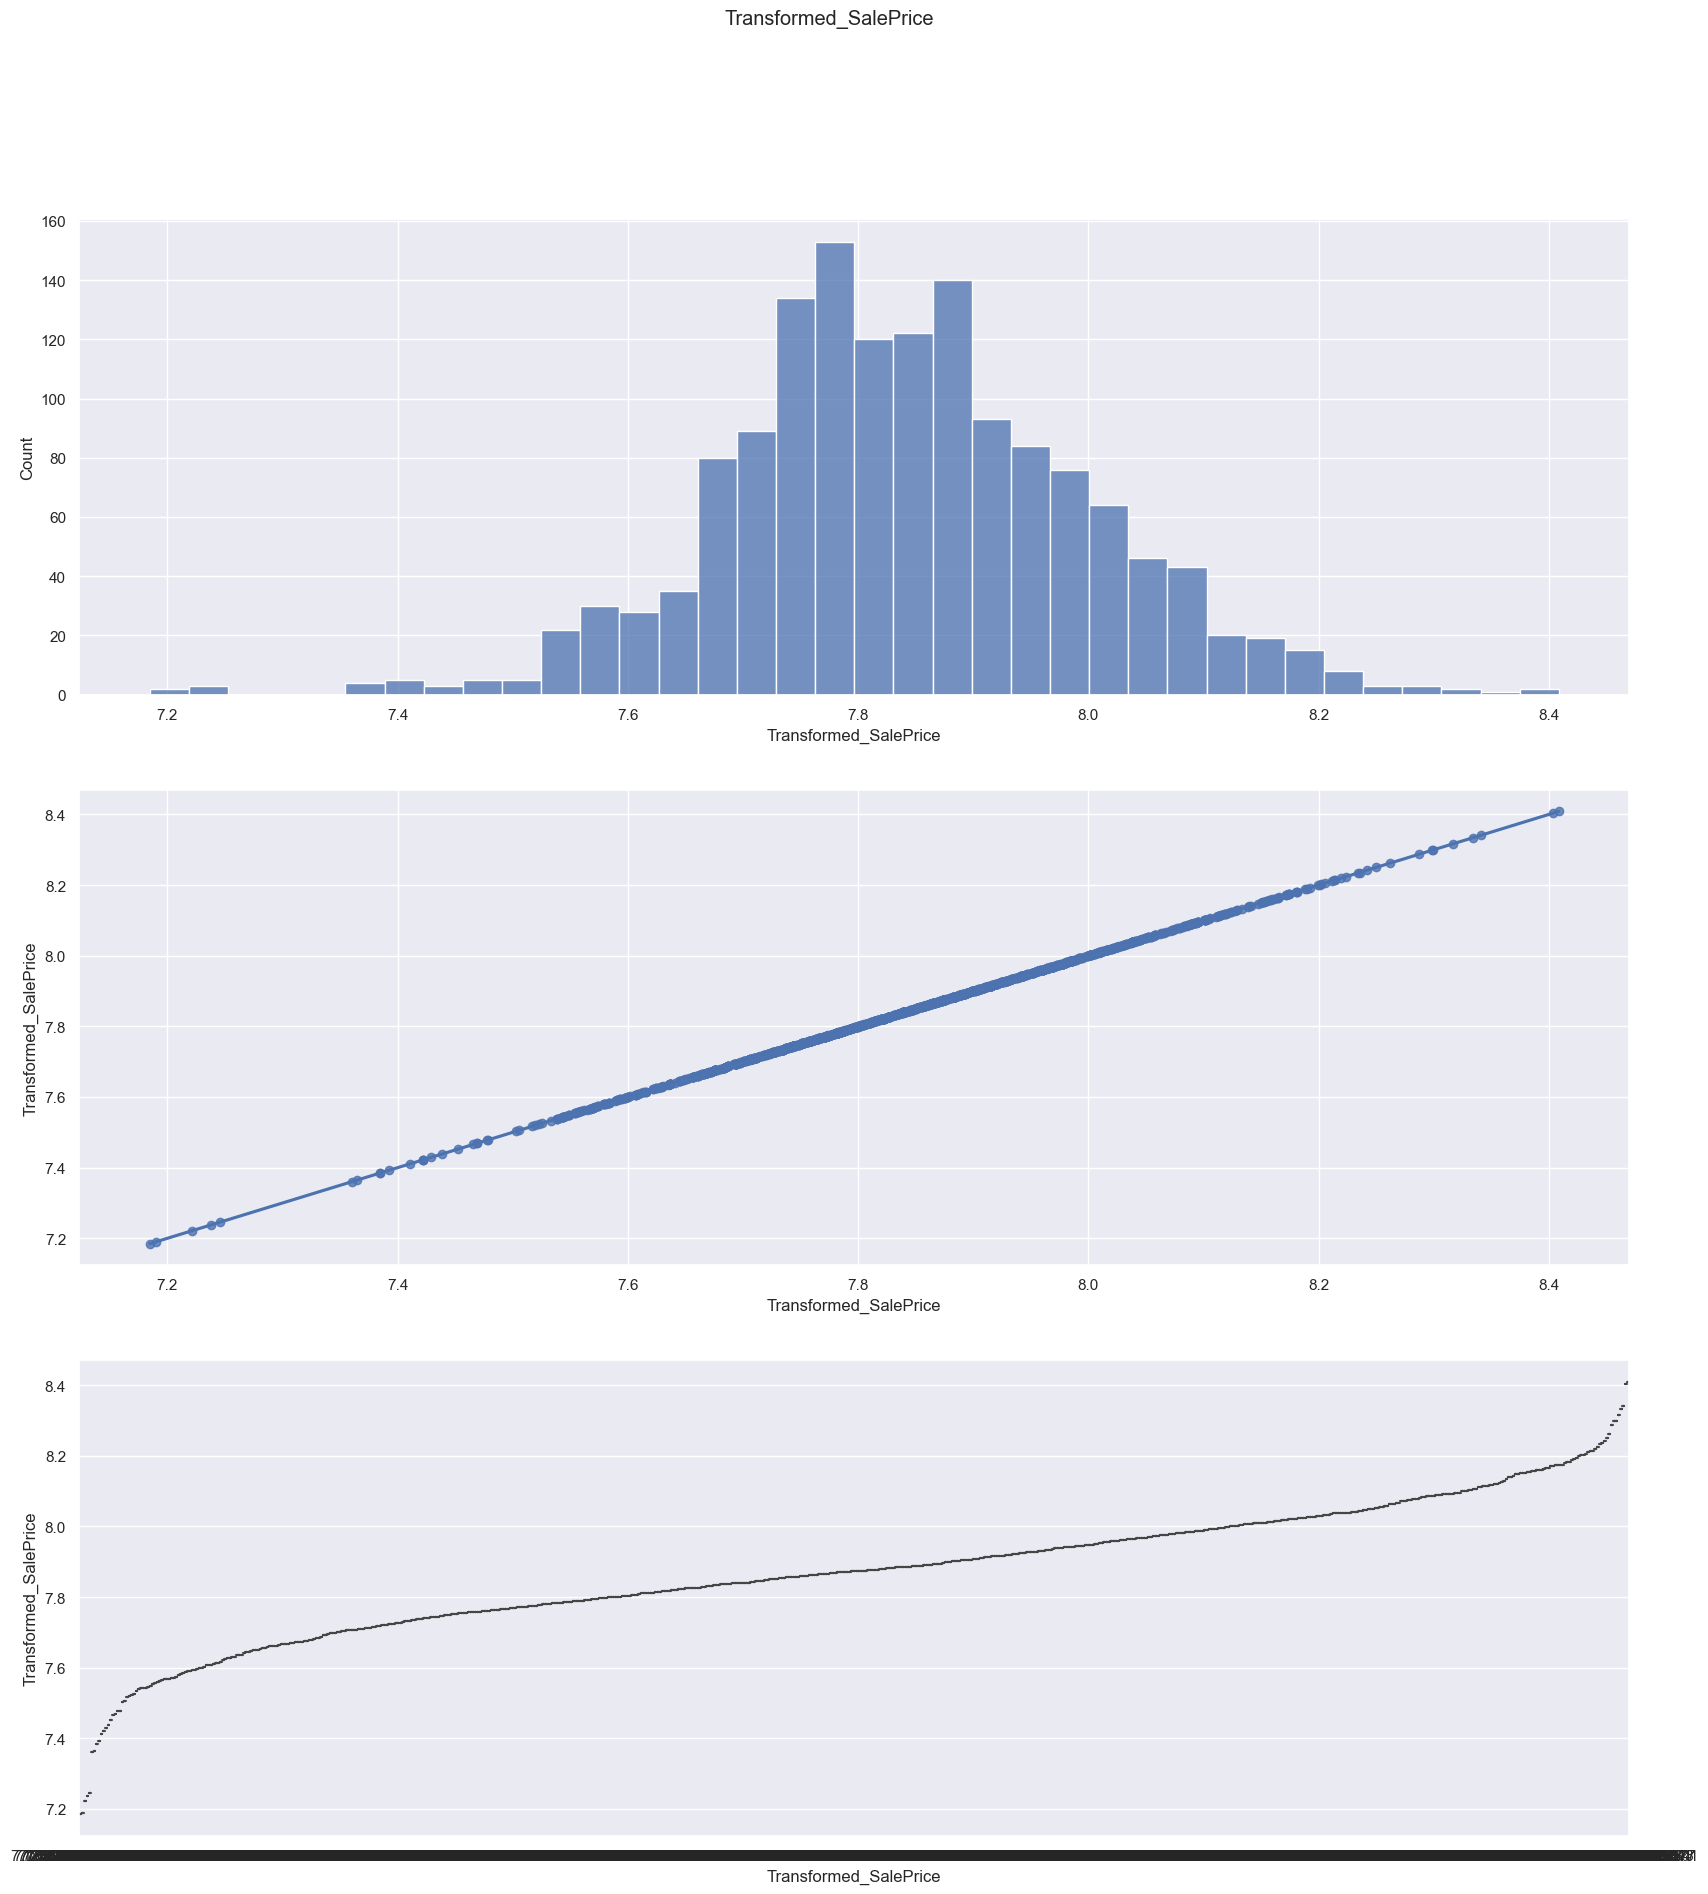

In [44]:
for i in df10.columns:
    simple_graph(df10, y='Transformed_SalePrice', x=i)

In [45]:
def IQR(df, parameter, threshold=1.5):
    
    q1, q3 = np.percentile(df[parameter], [25, 75])
    iqr = q3 - q1
    lower = q1 - (threshold*iqr)
    upper = q3 + (threshold*iqr)
    
    return df[(df[parameter] >= lower) & (df[parameter] <= upper)]

In [49]:
df10.columns

Index(['YearBuilt', 'GarageYrBlt', '1stFlrSF', 'TotalBsmtSF', 'GarageCars',
       'FullBath', 'PConc', 'Total_Bathrooms', 'YearRemodAdd', 'ExterQual',
       'BsmtQual', 'KitchenQual', 'TotRmsAbvGrd', 'SqFtPerRoom',
       'Total_Home_Quality', 'HeatingQC', 'Attchd', 'GarageFinish',
       'Fireplaces', 'MasVnrArea', 'Transformed_SalePrice'],
      dtype='object')

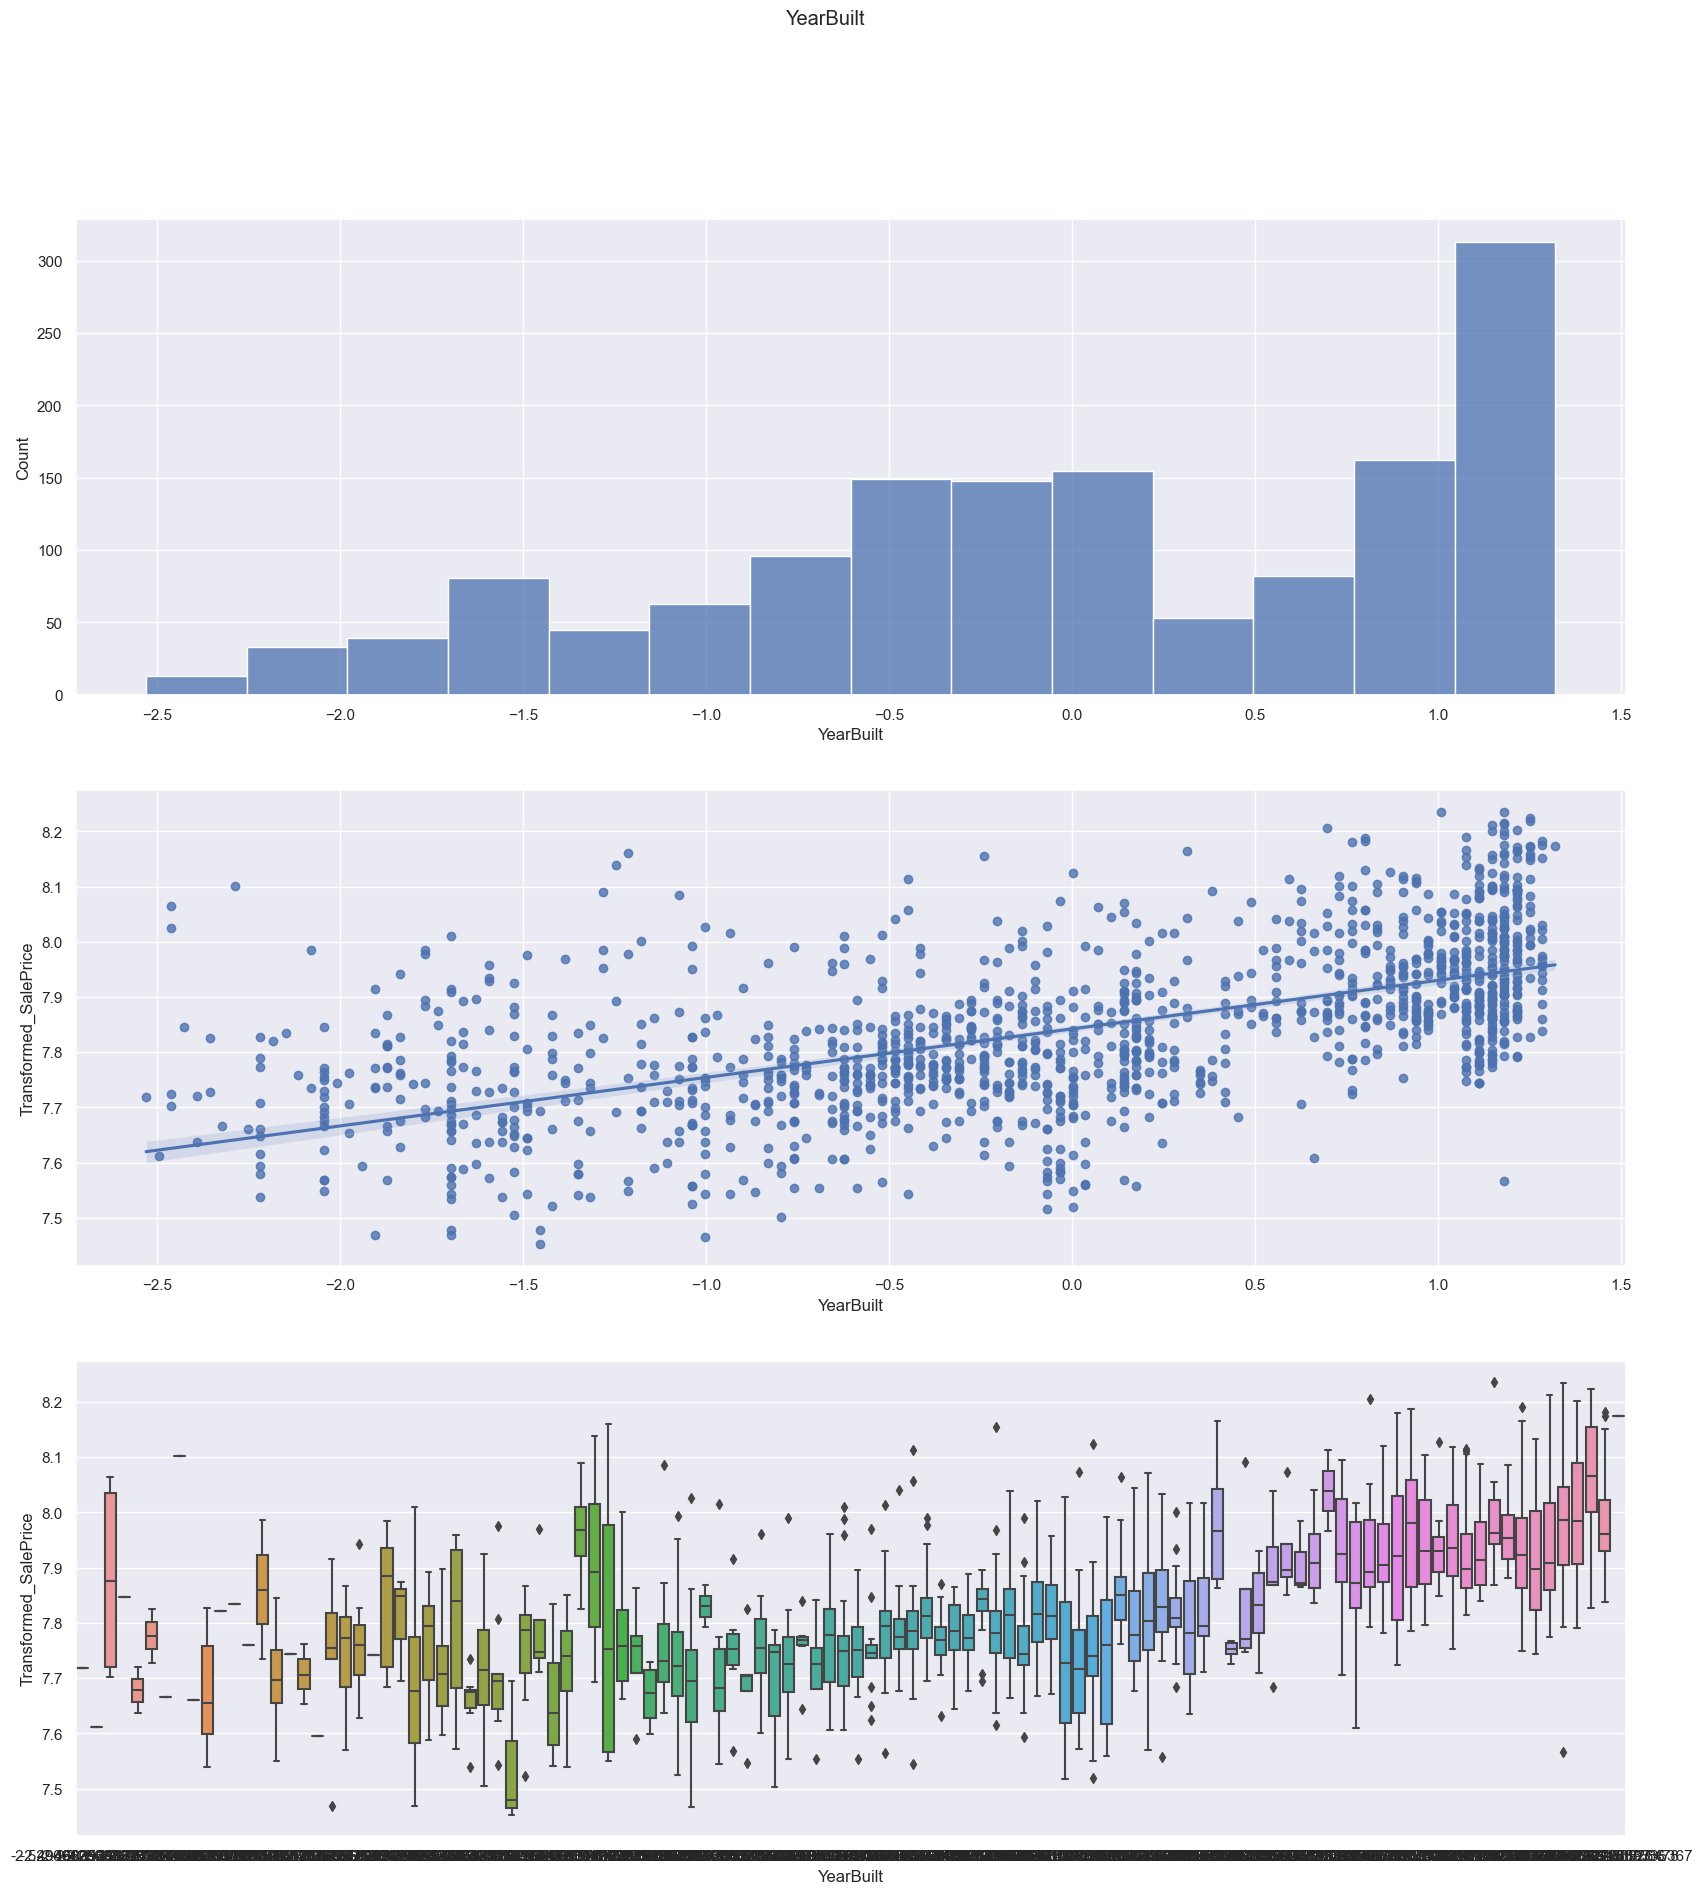

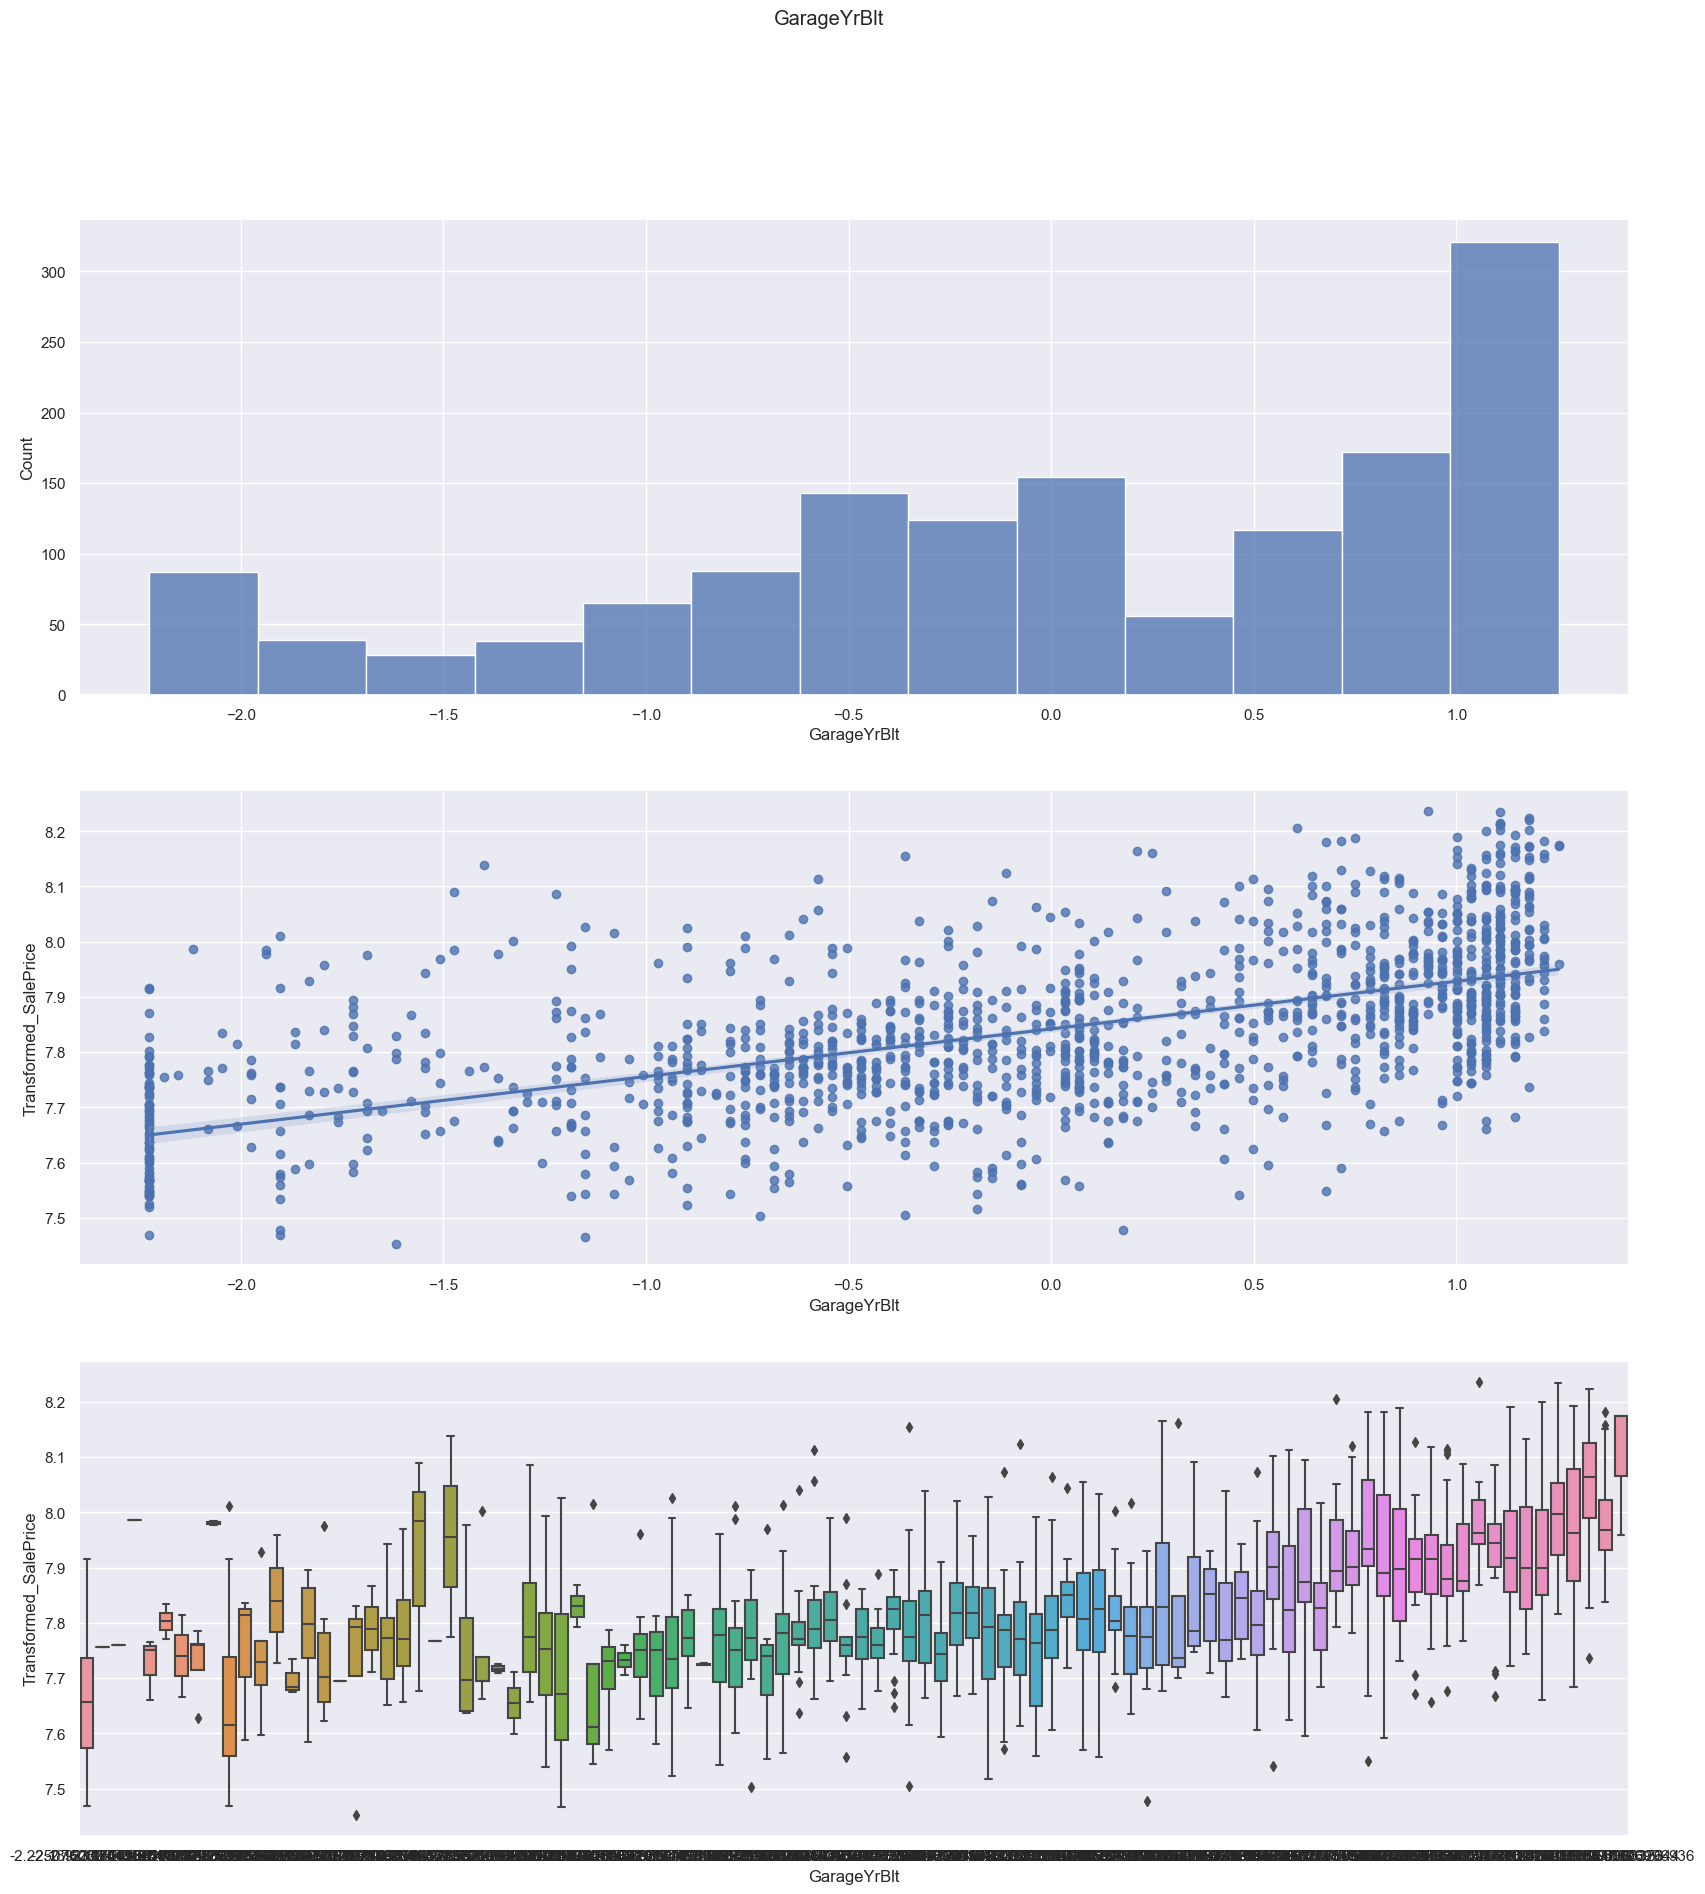

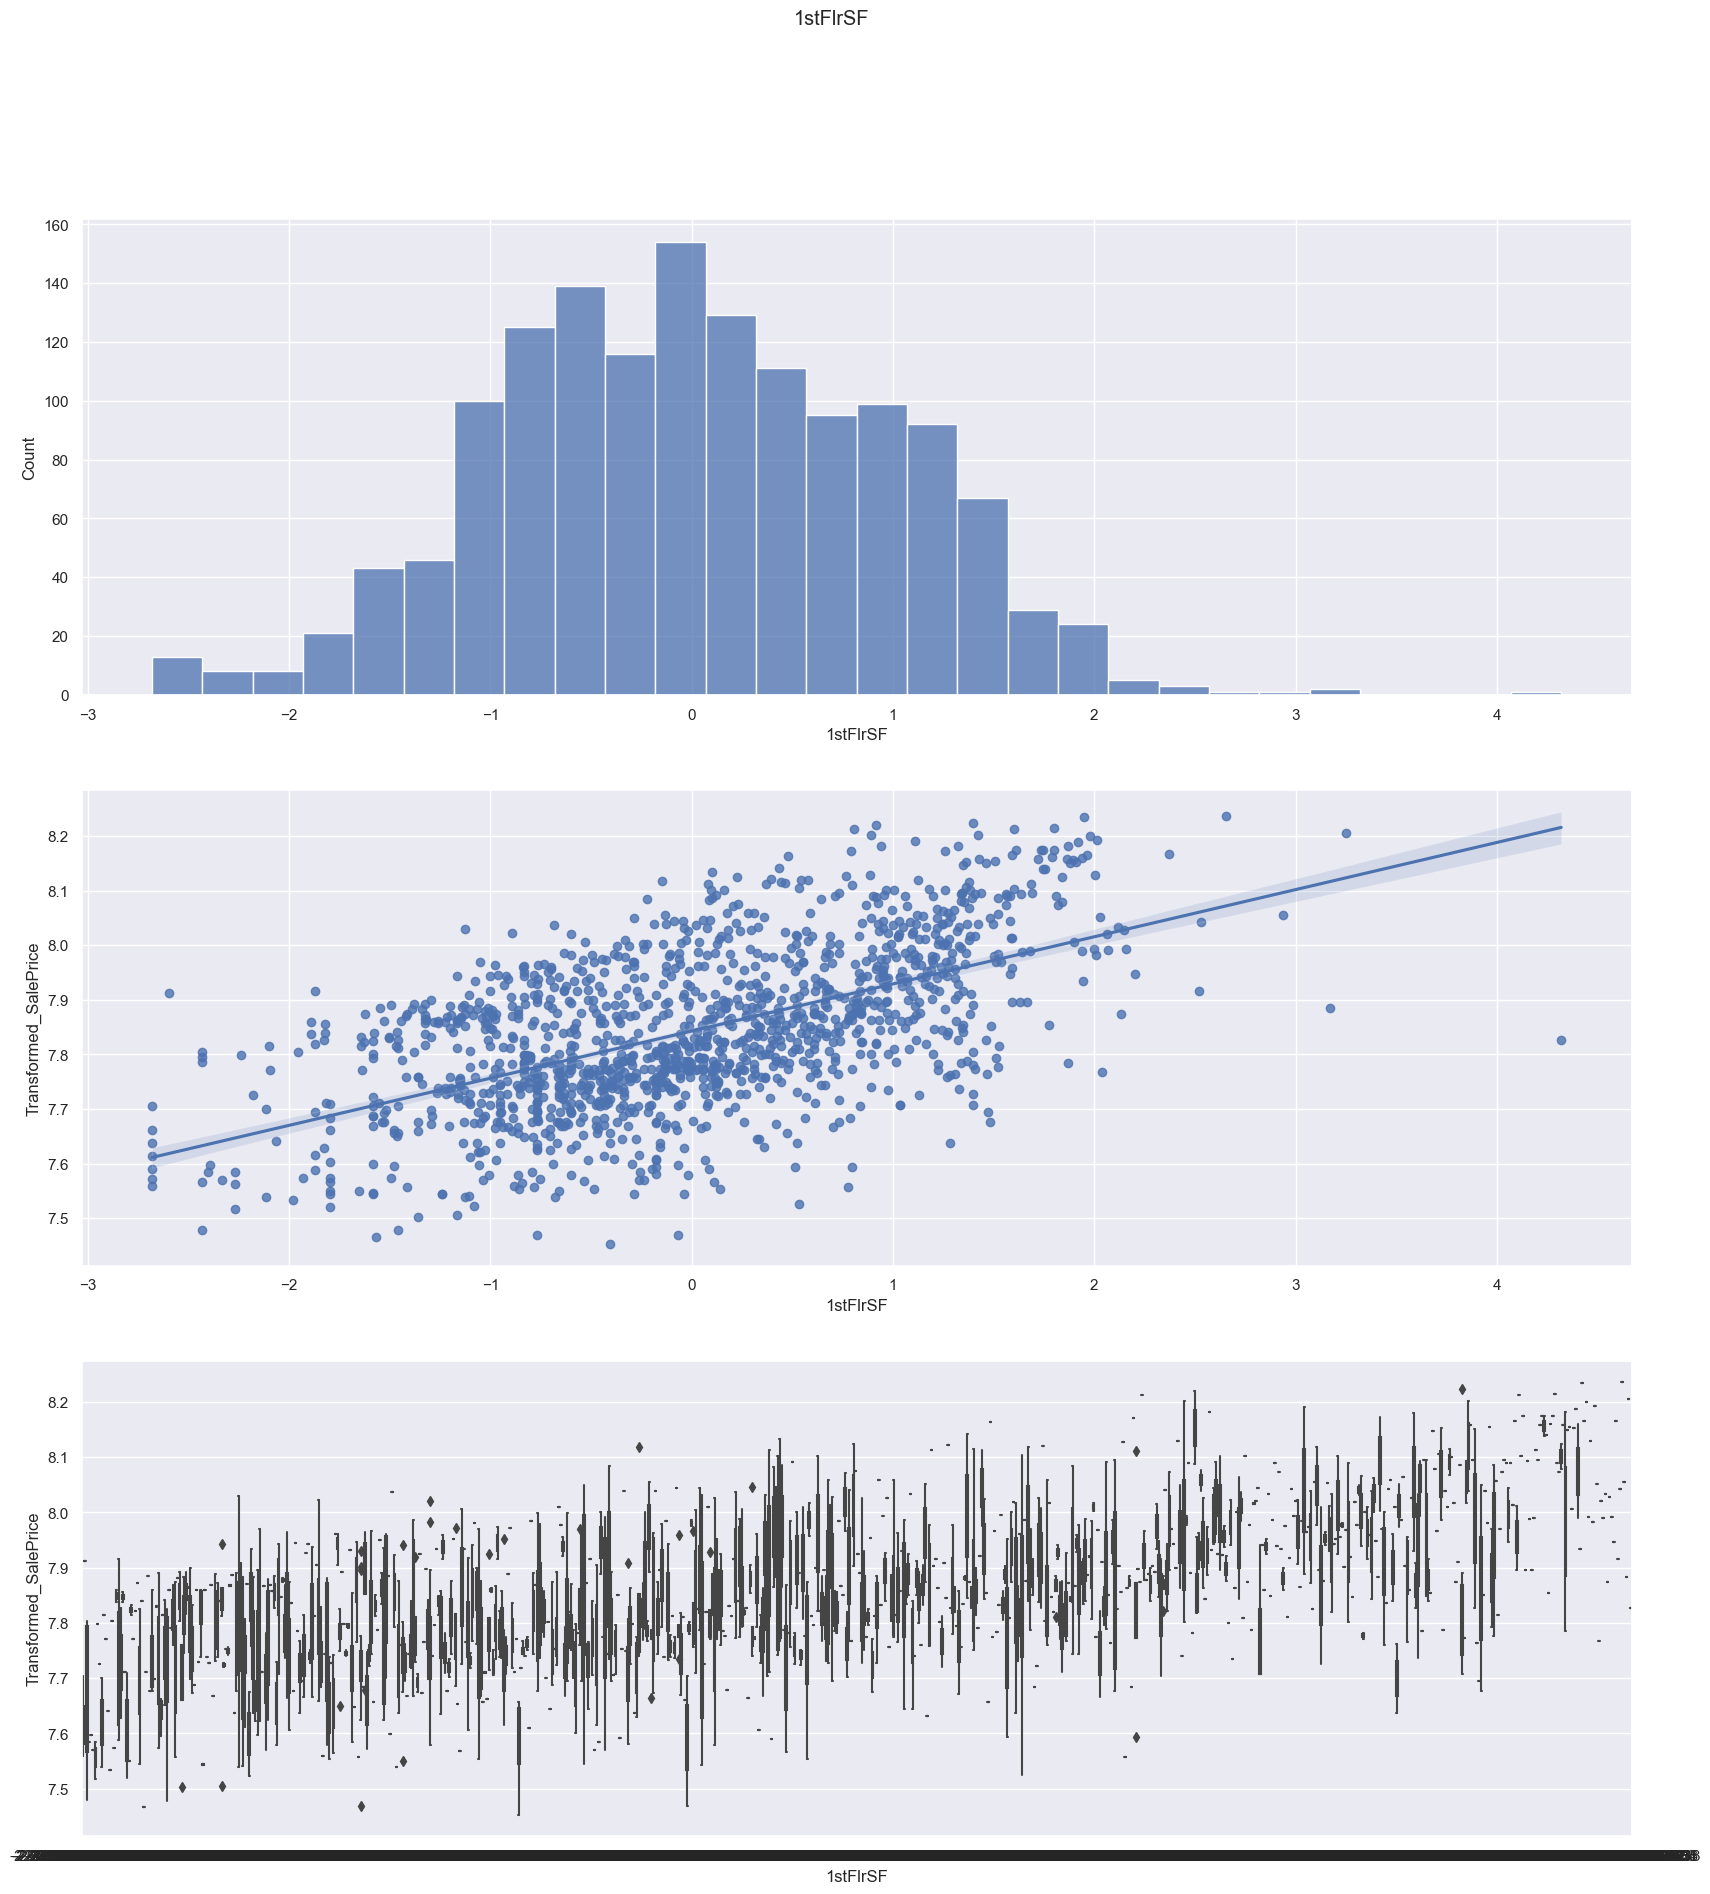

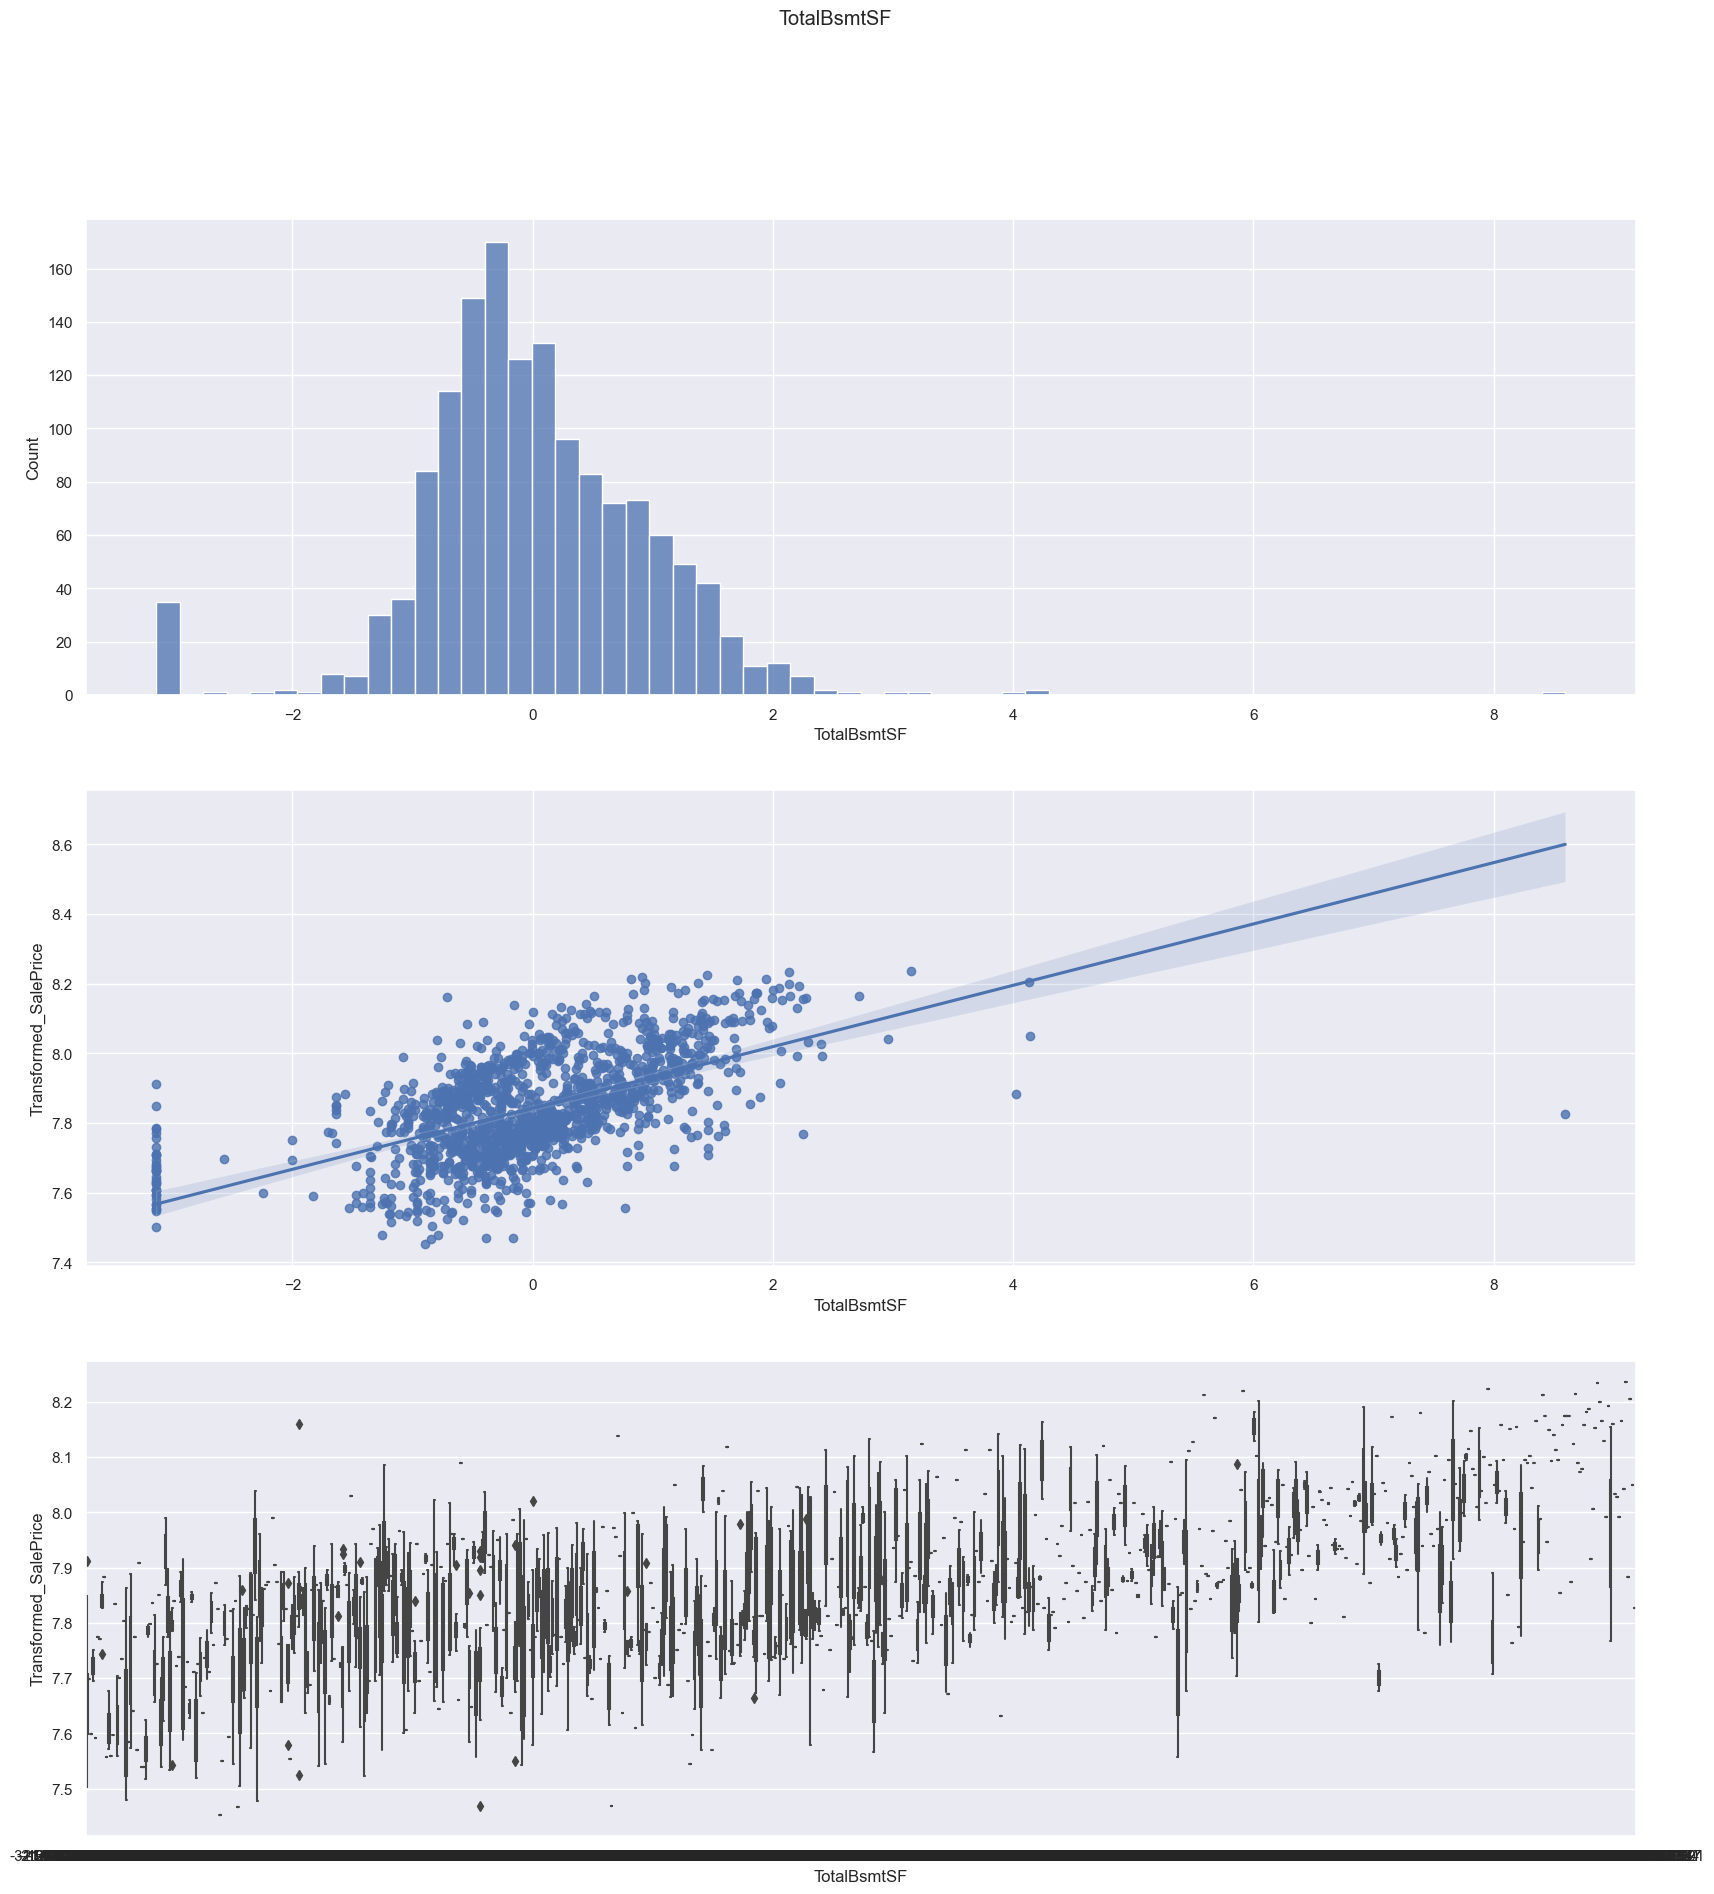

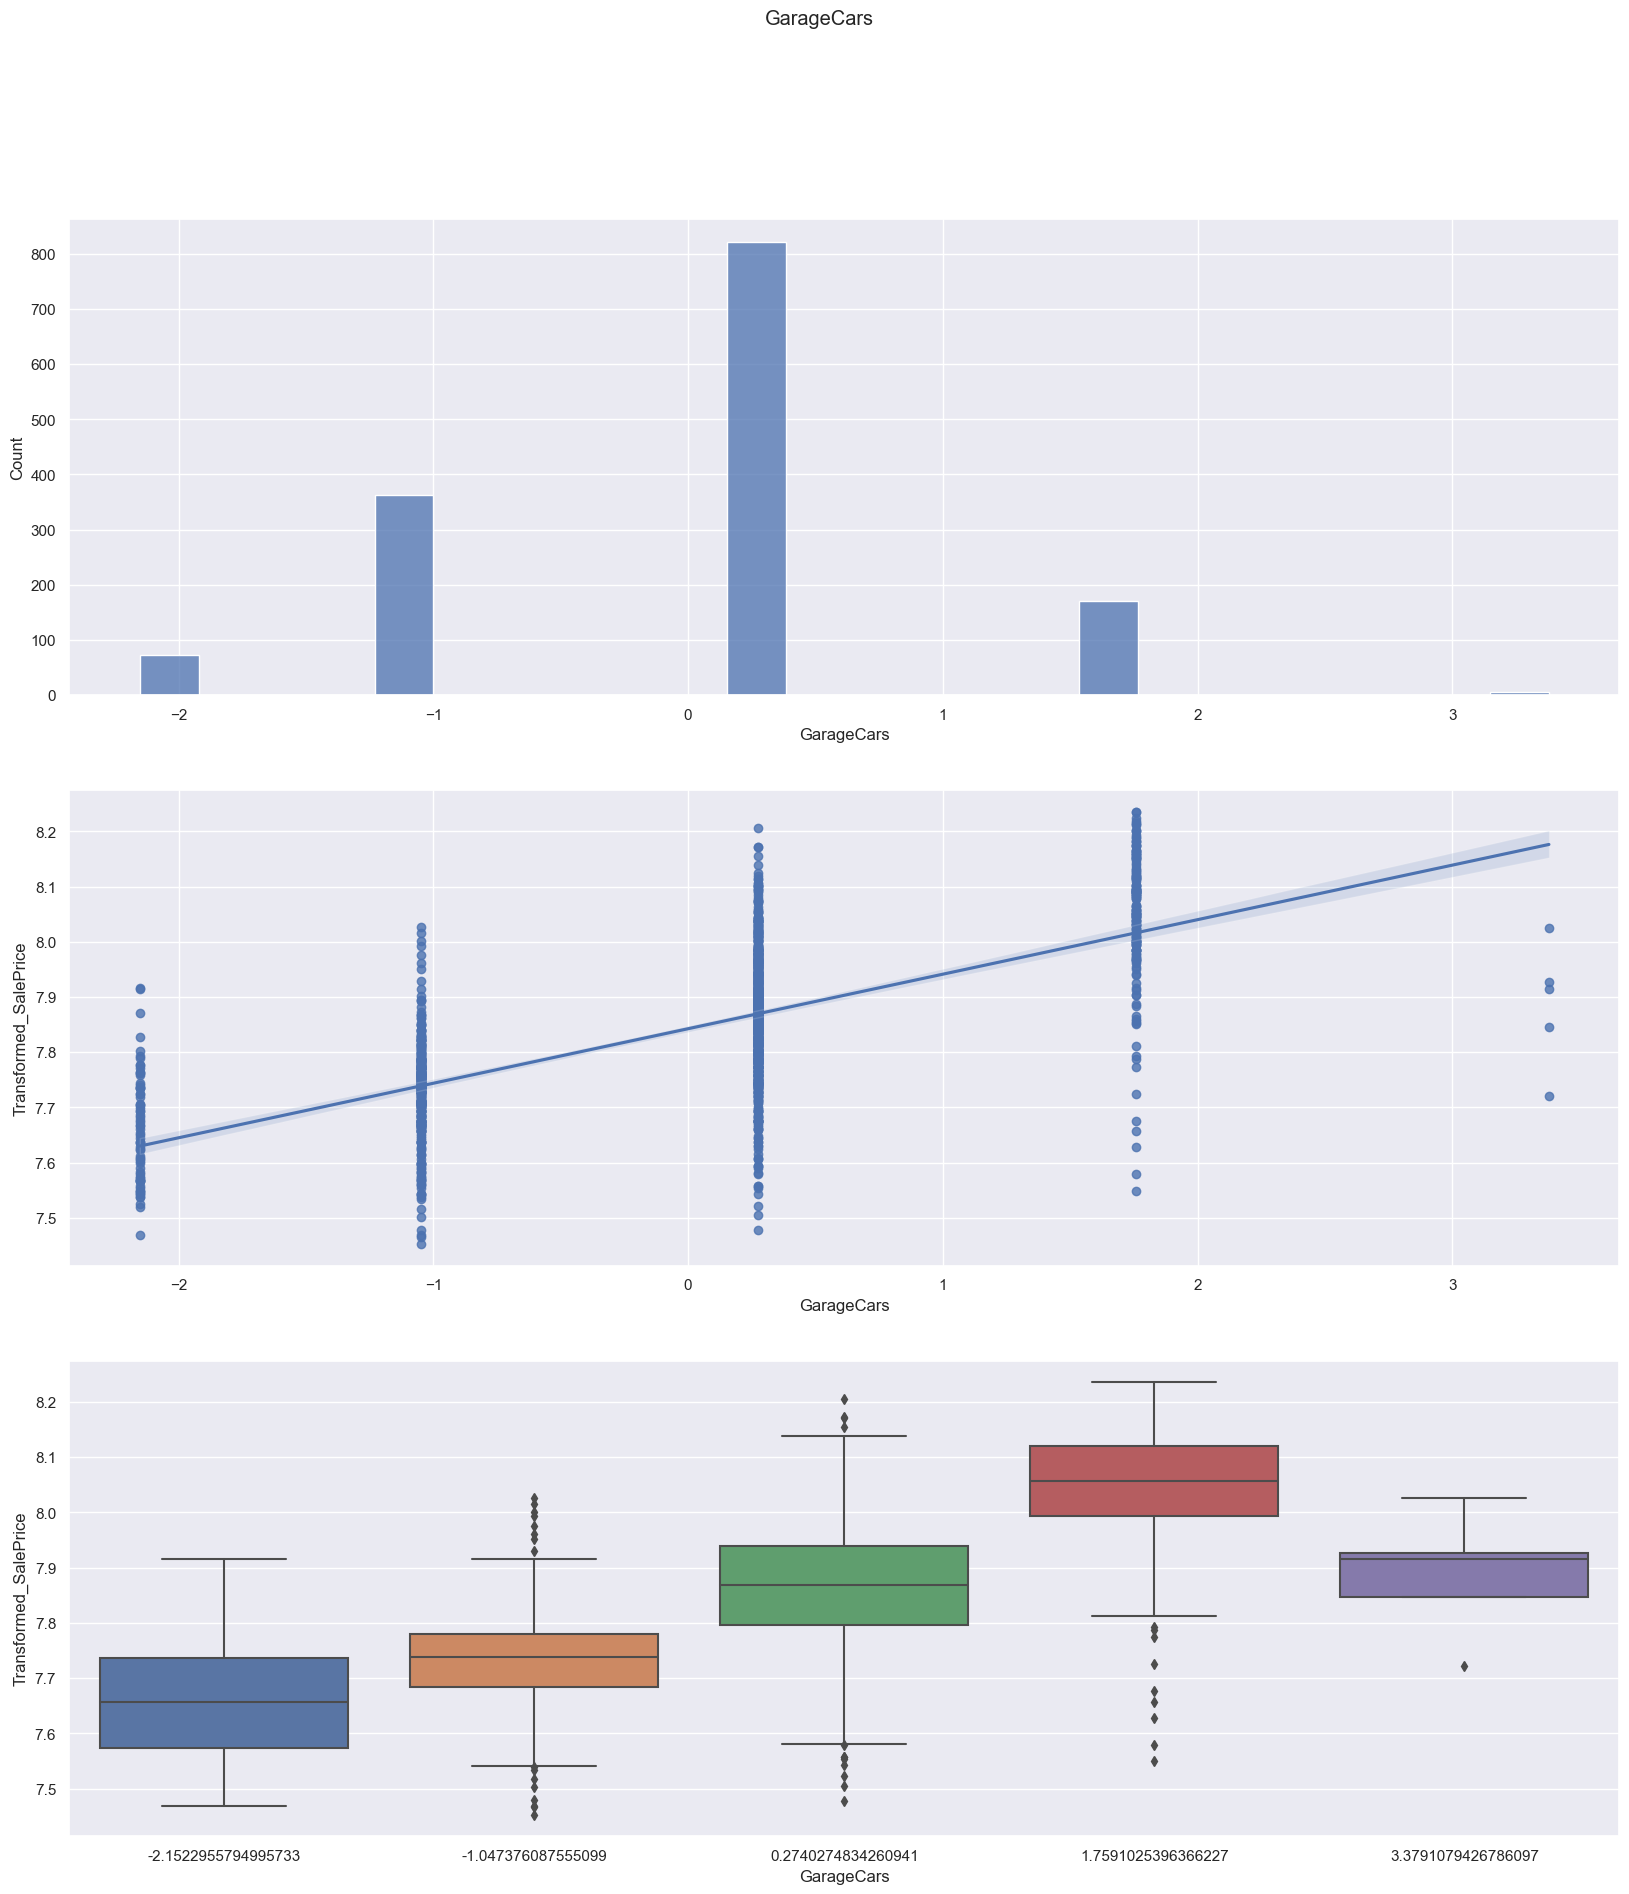

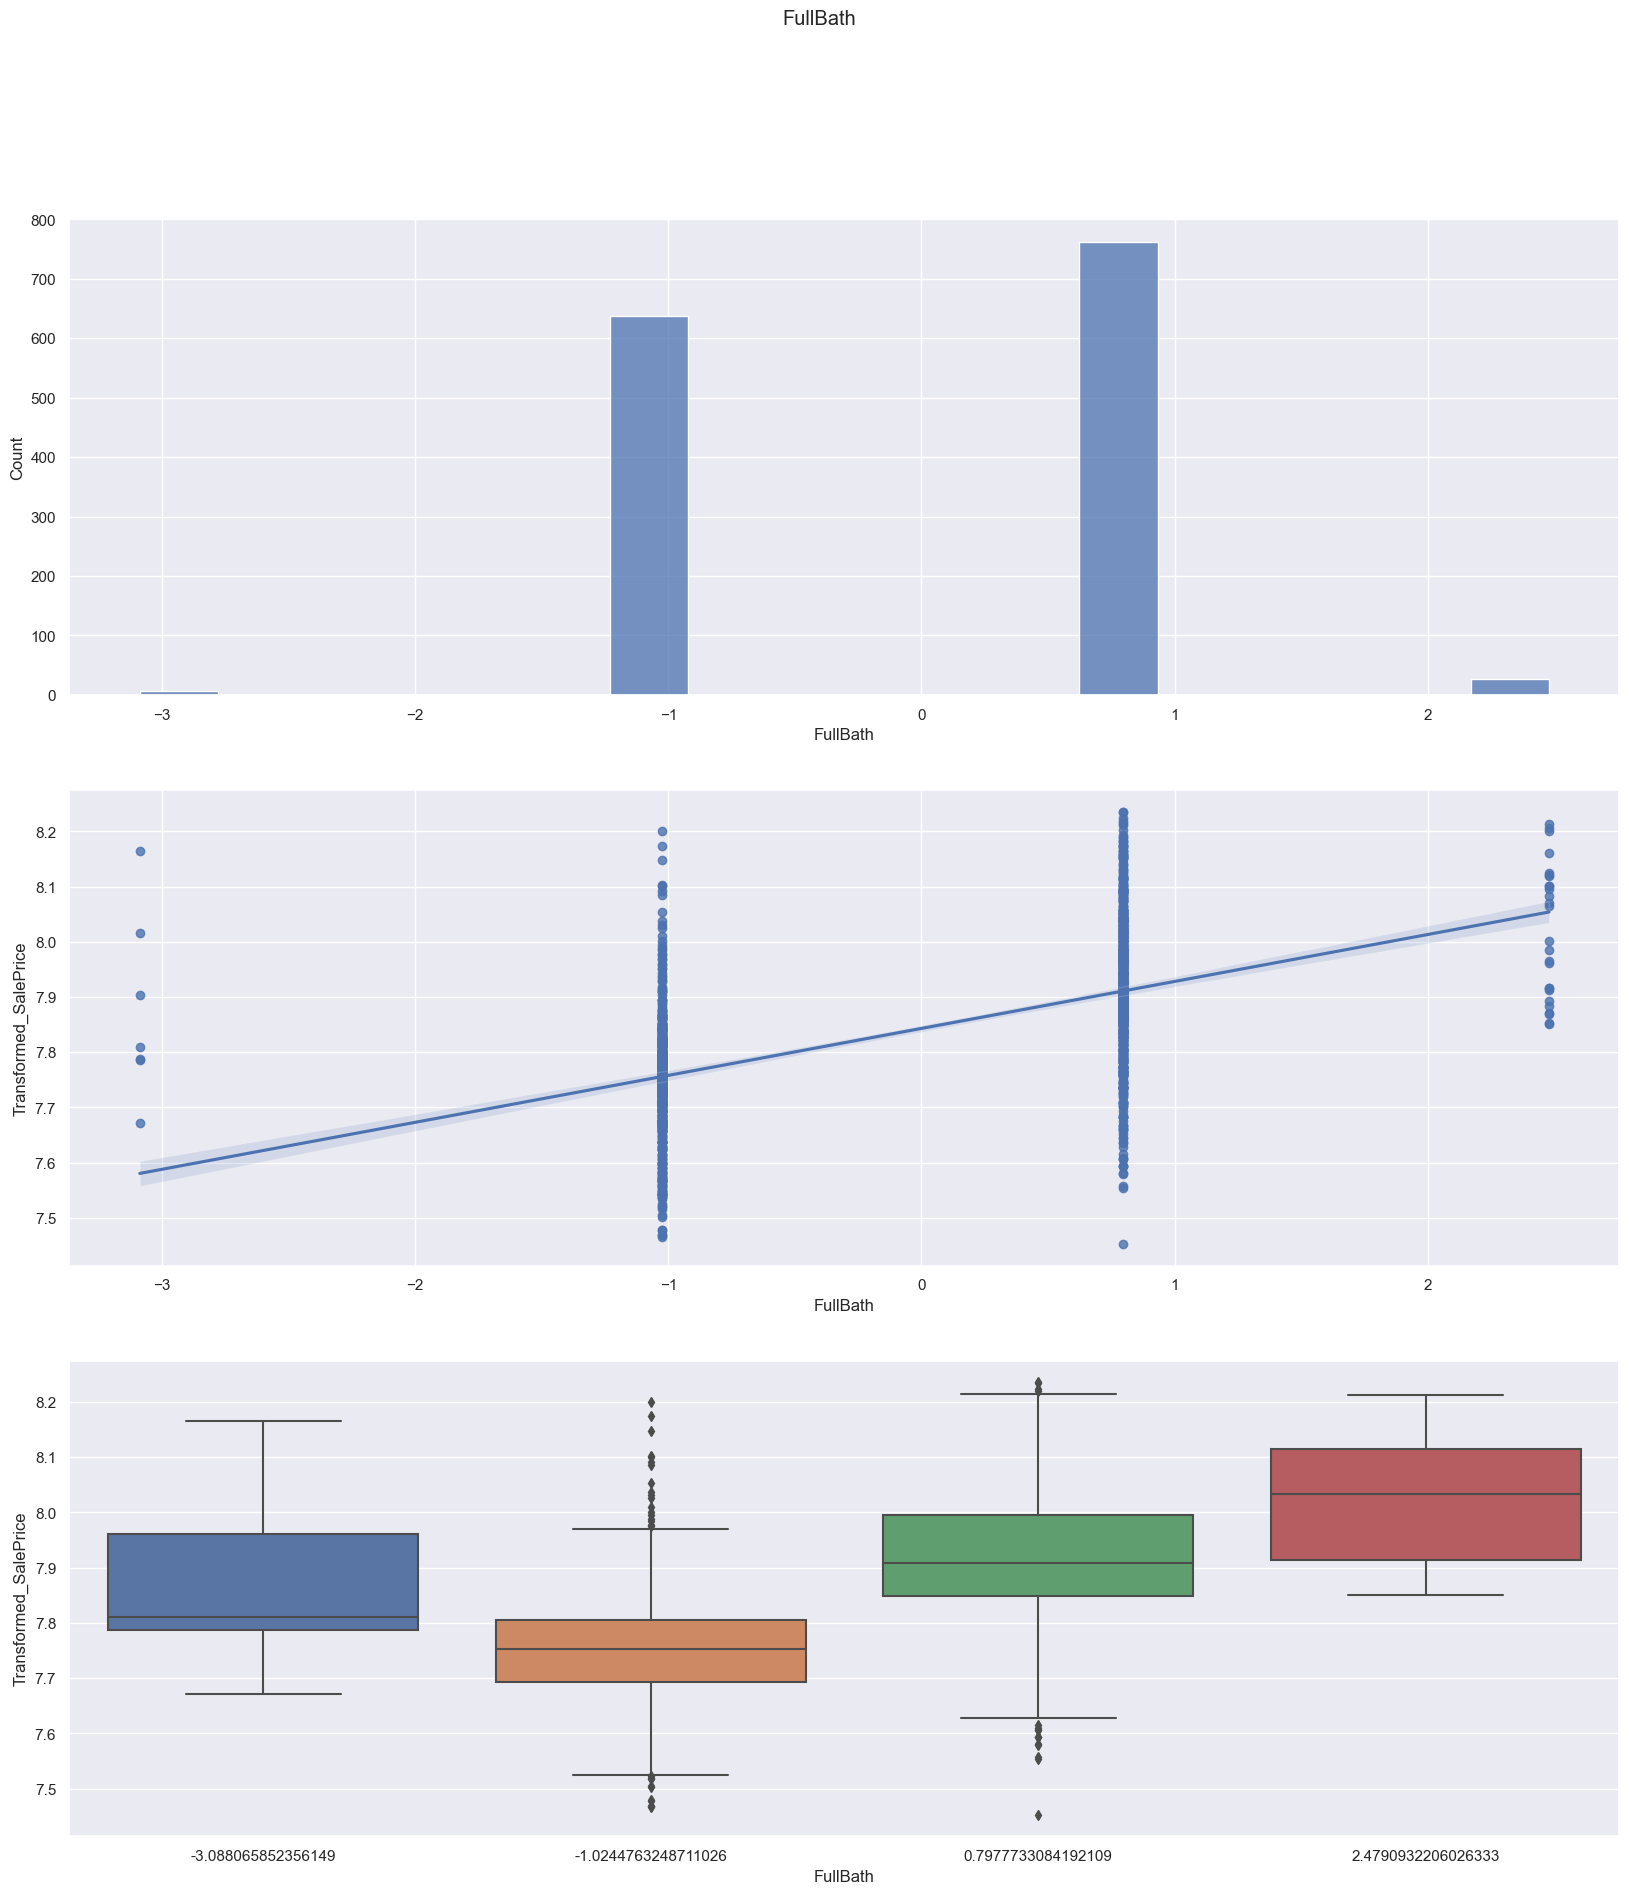

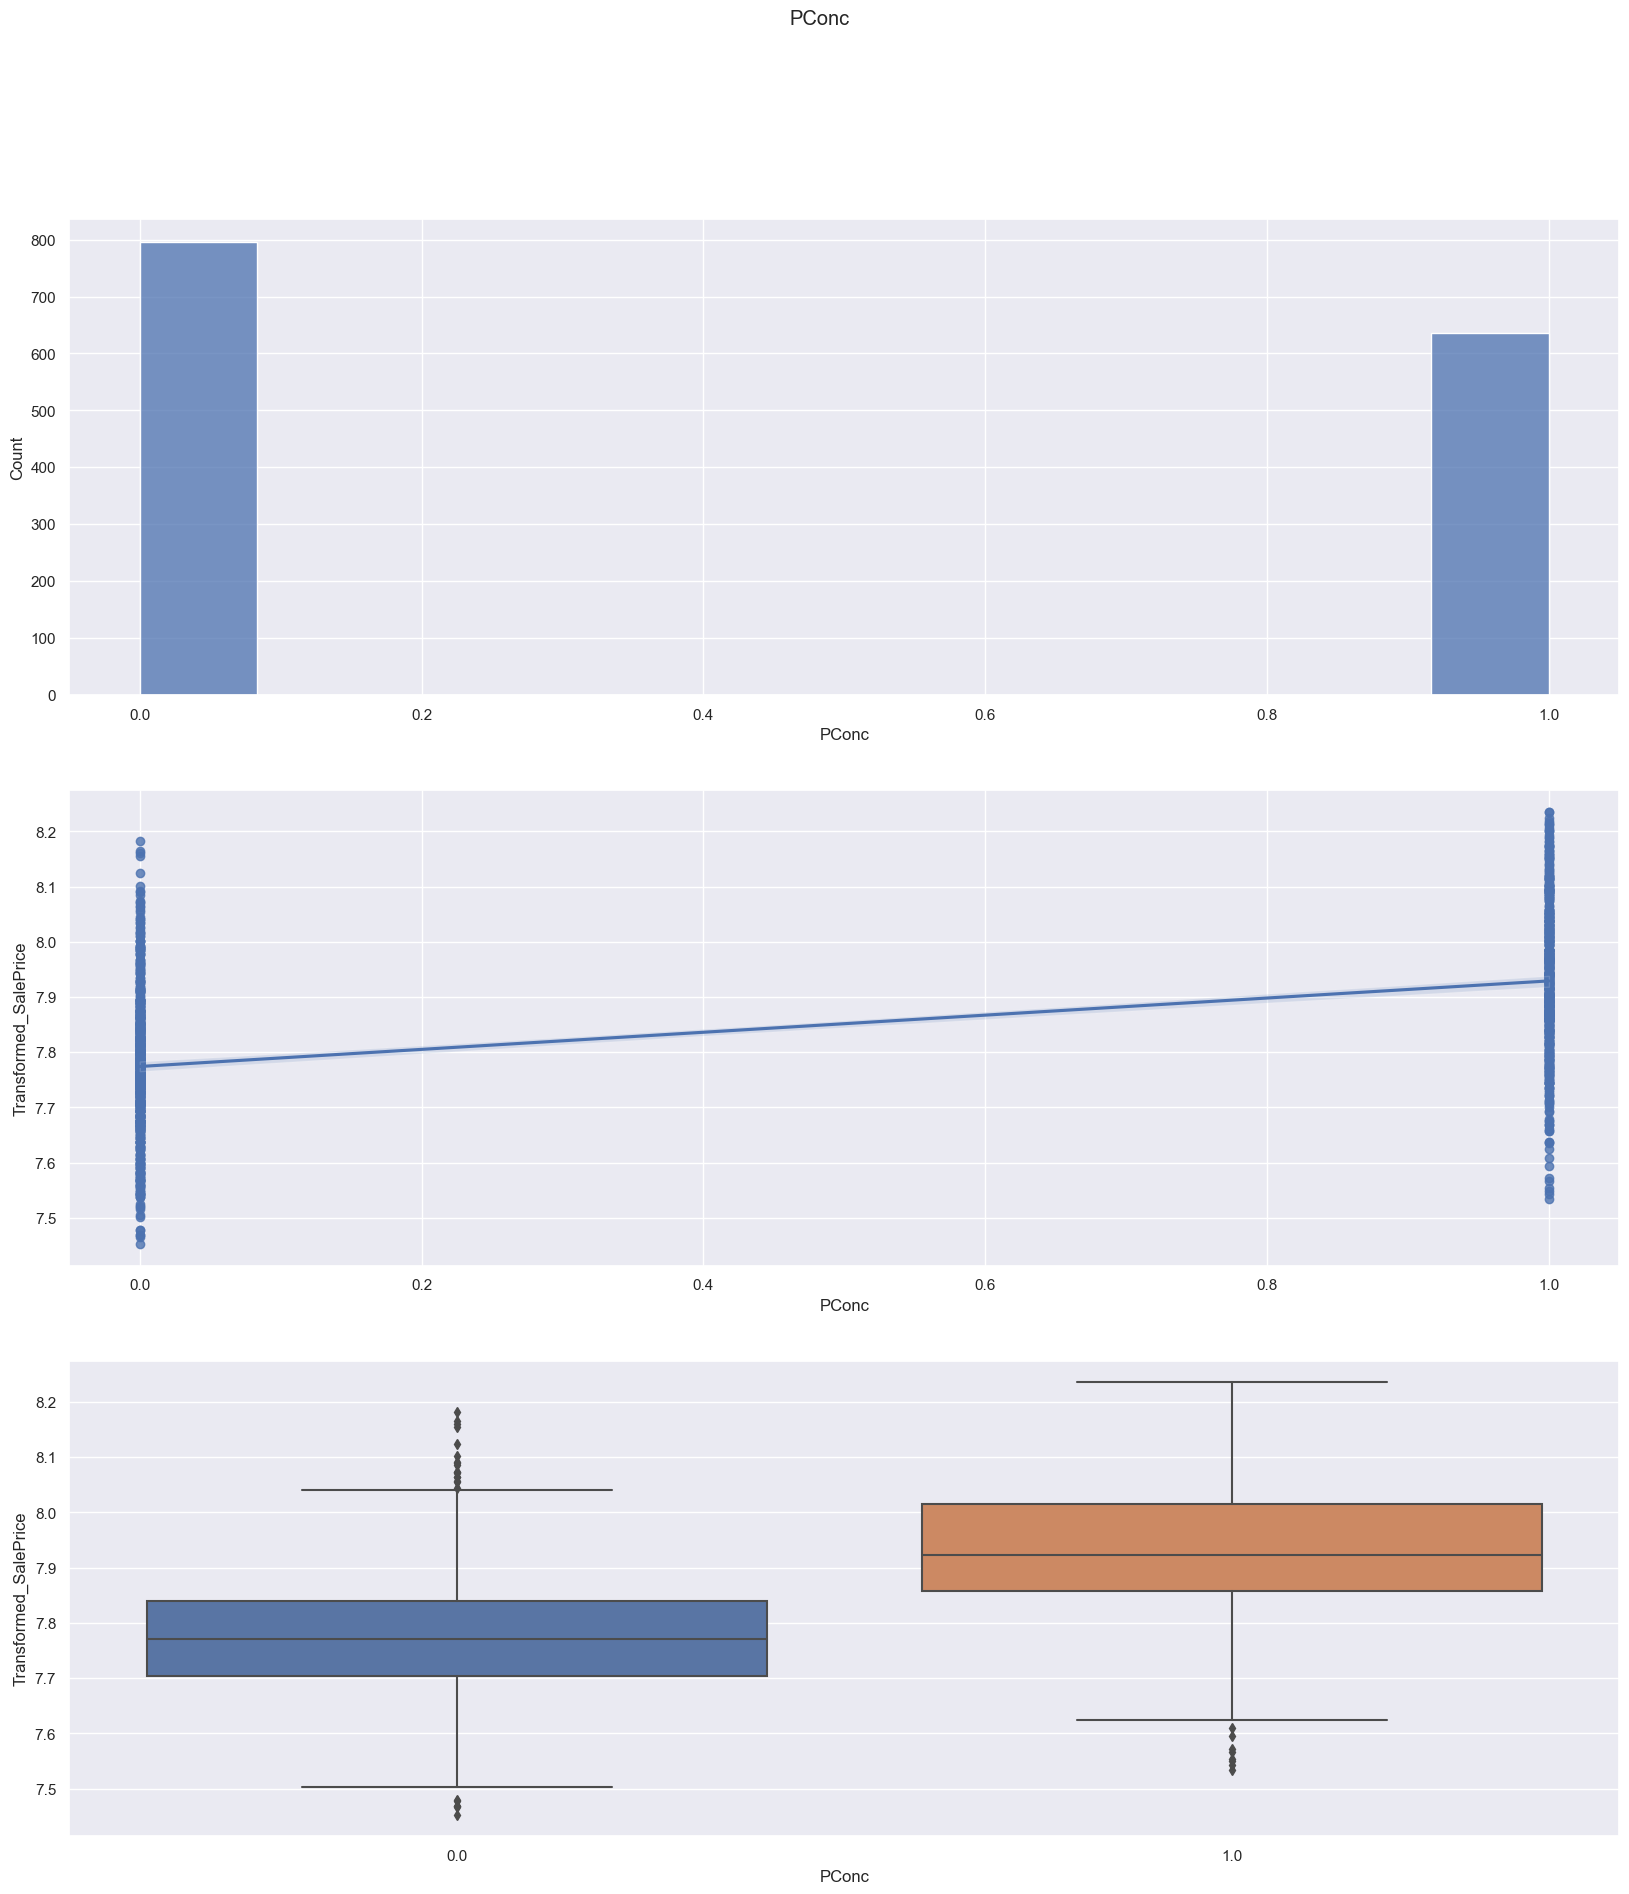

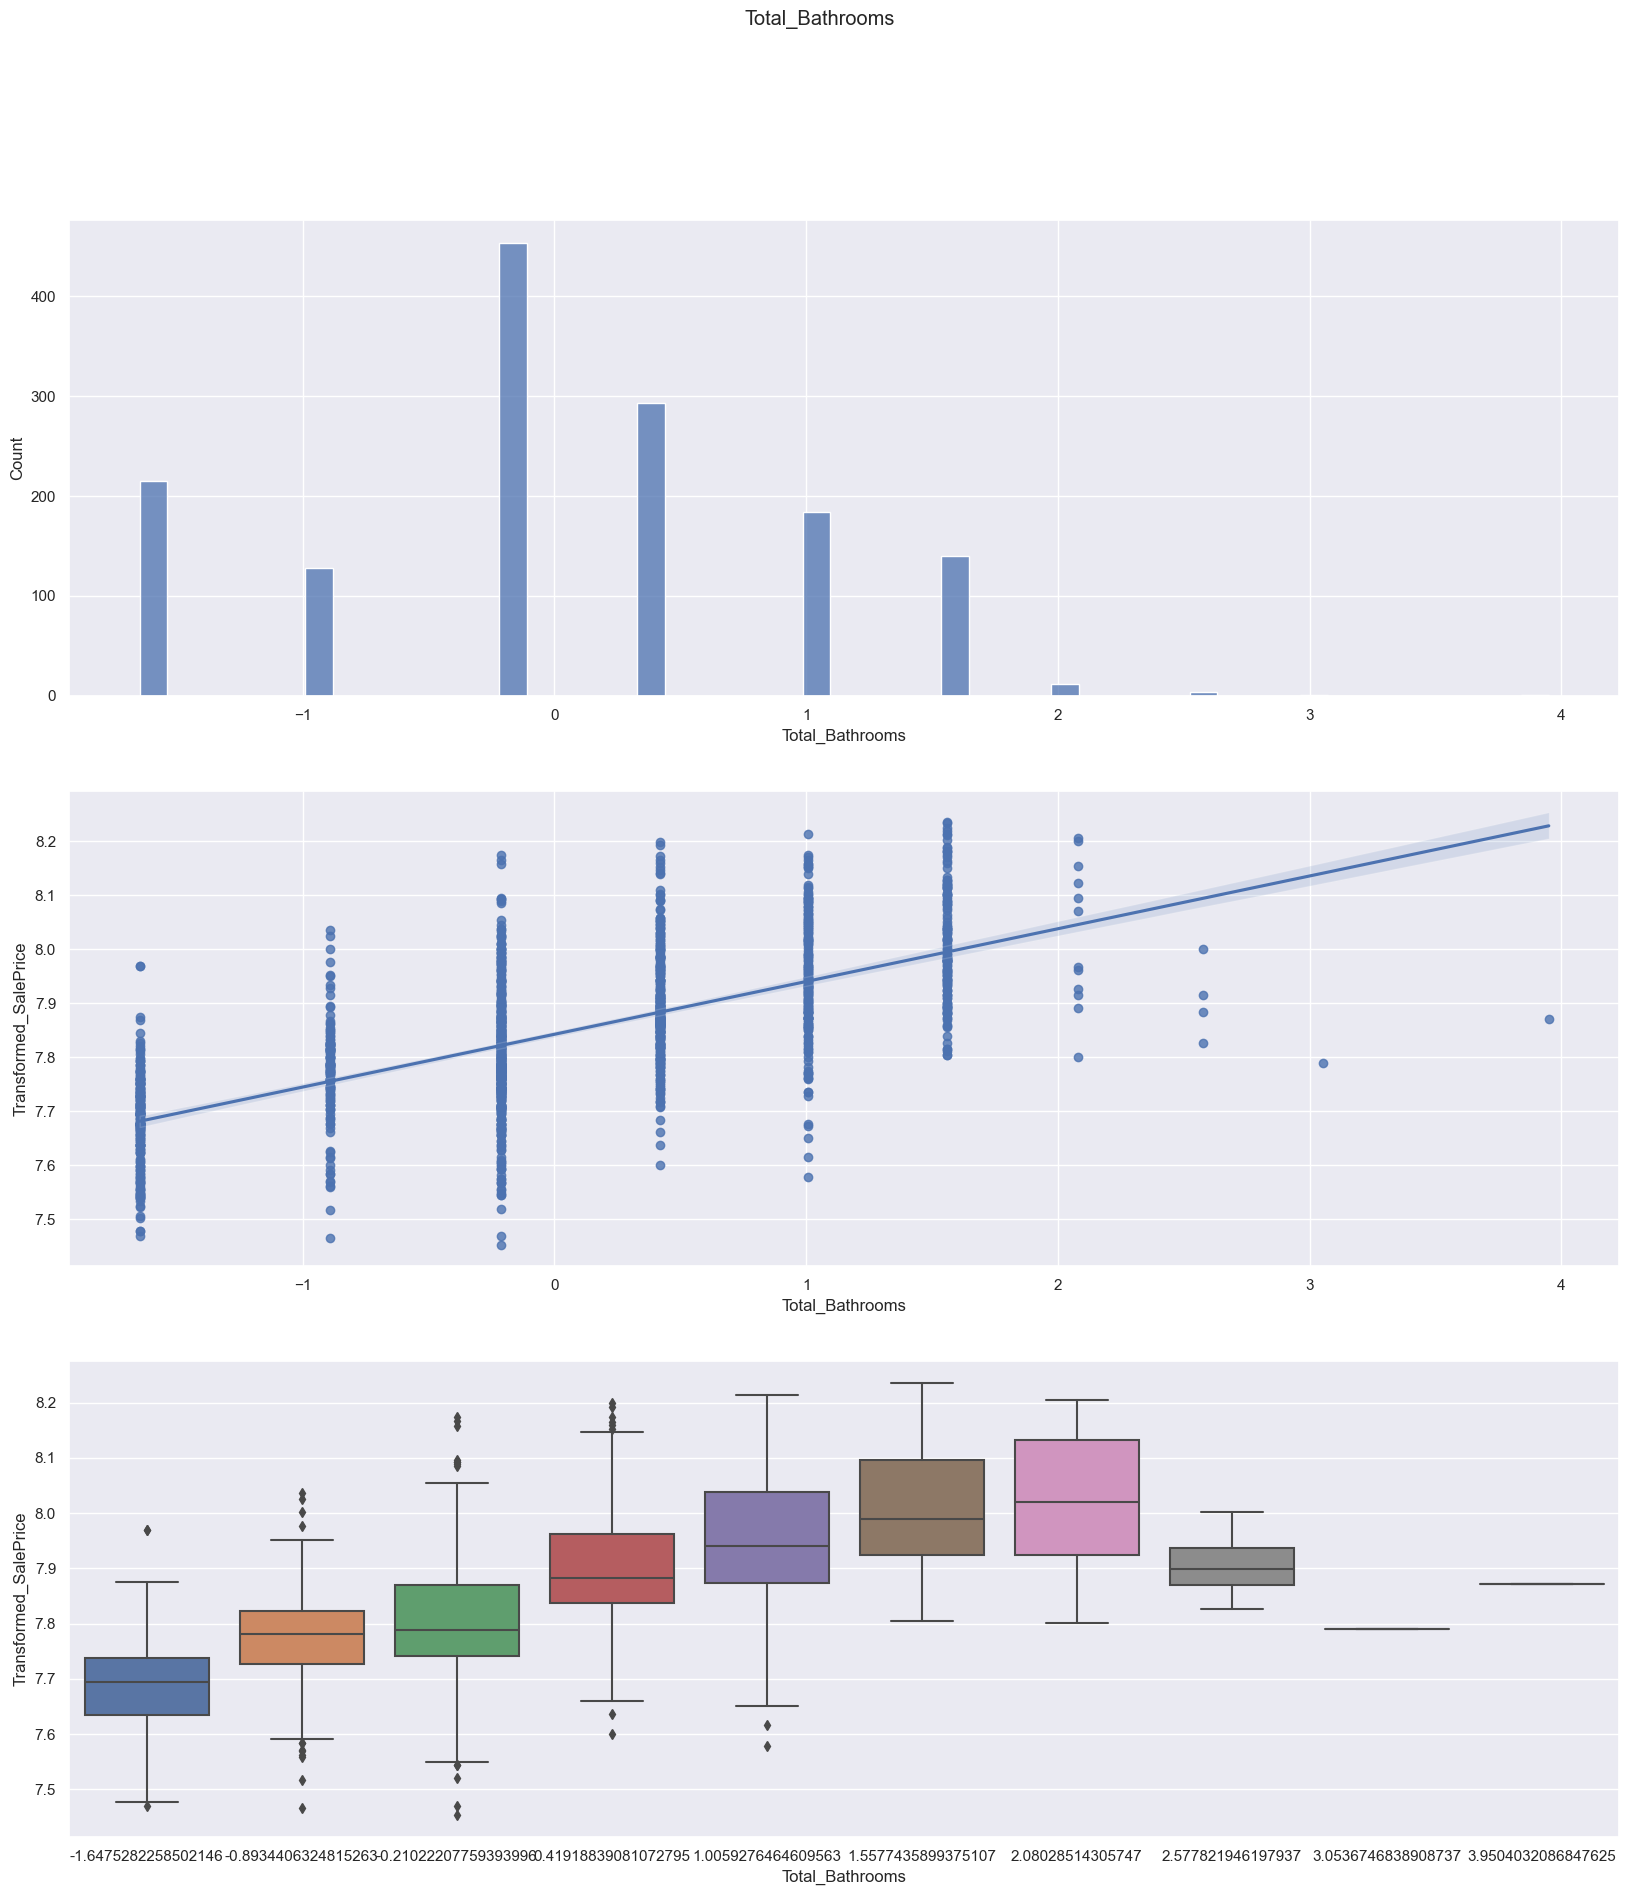

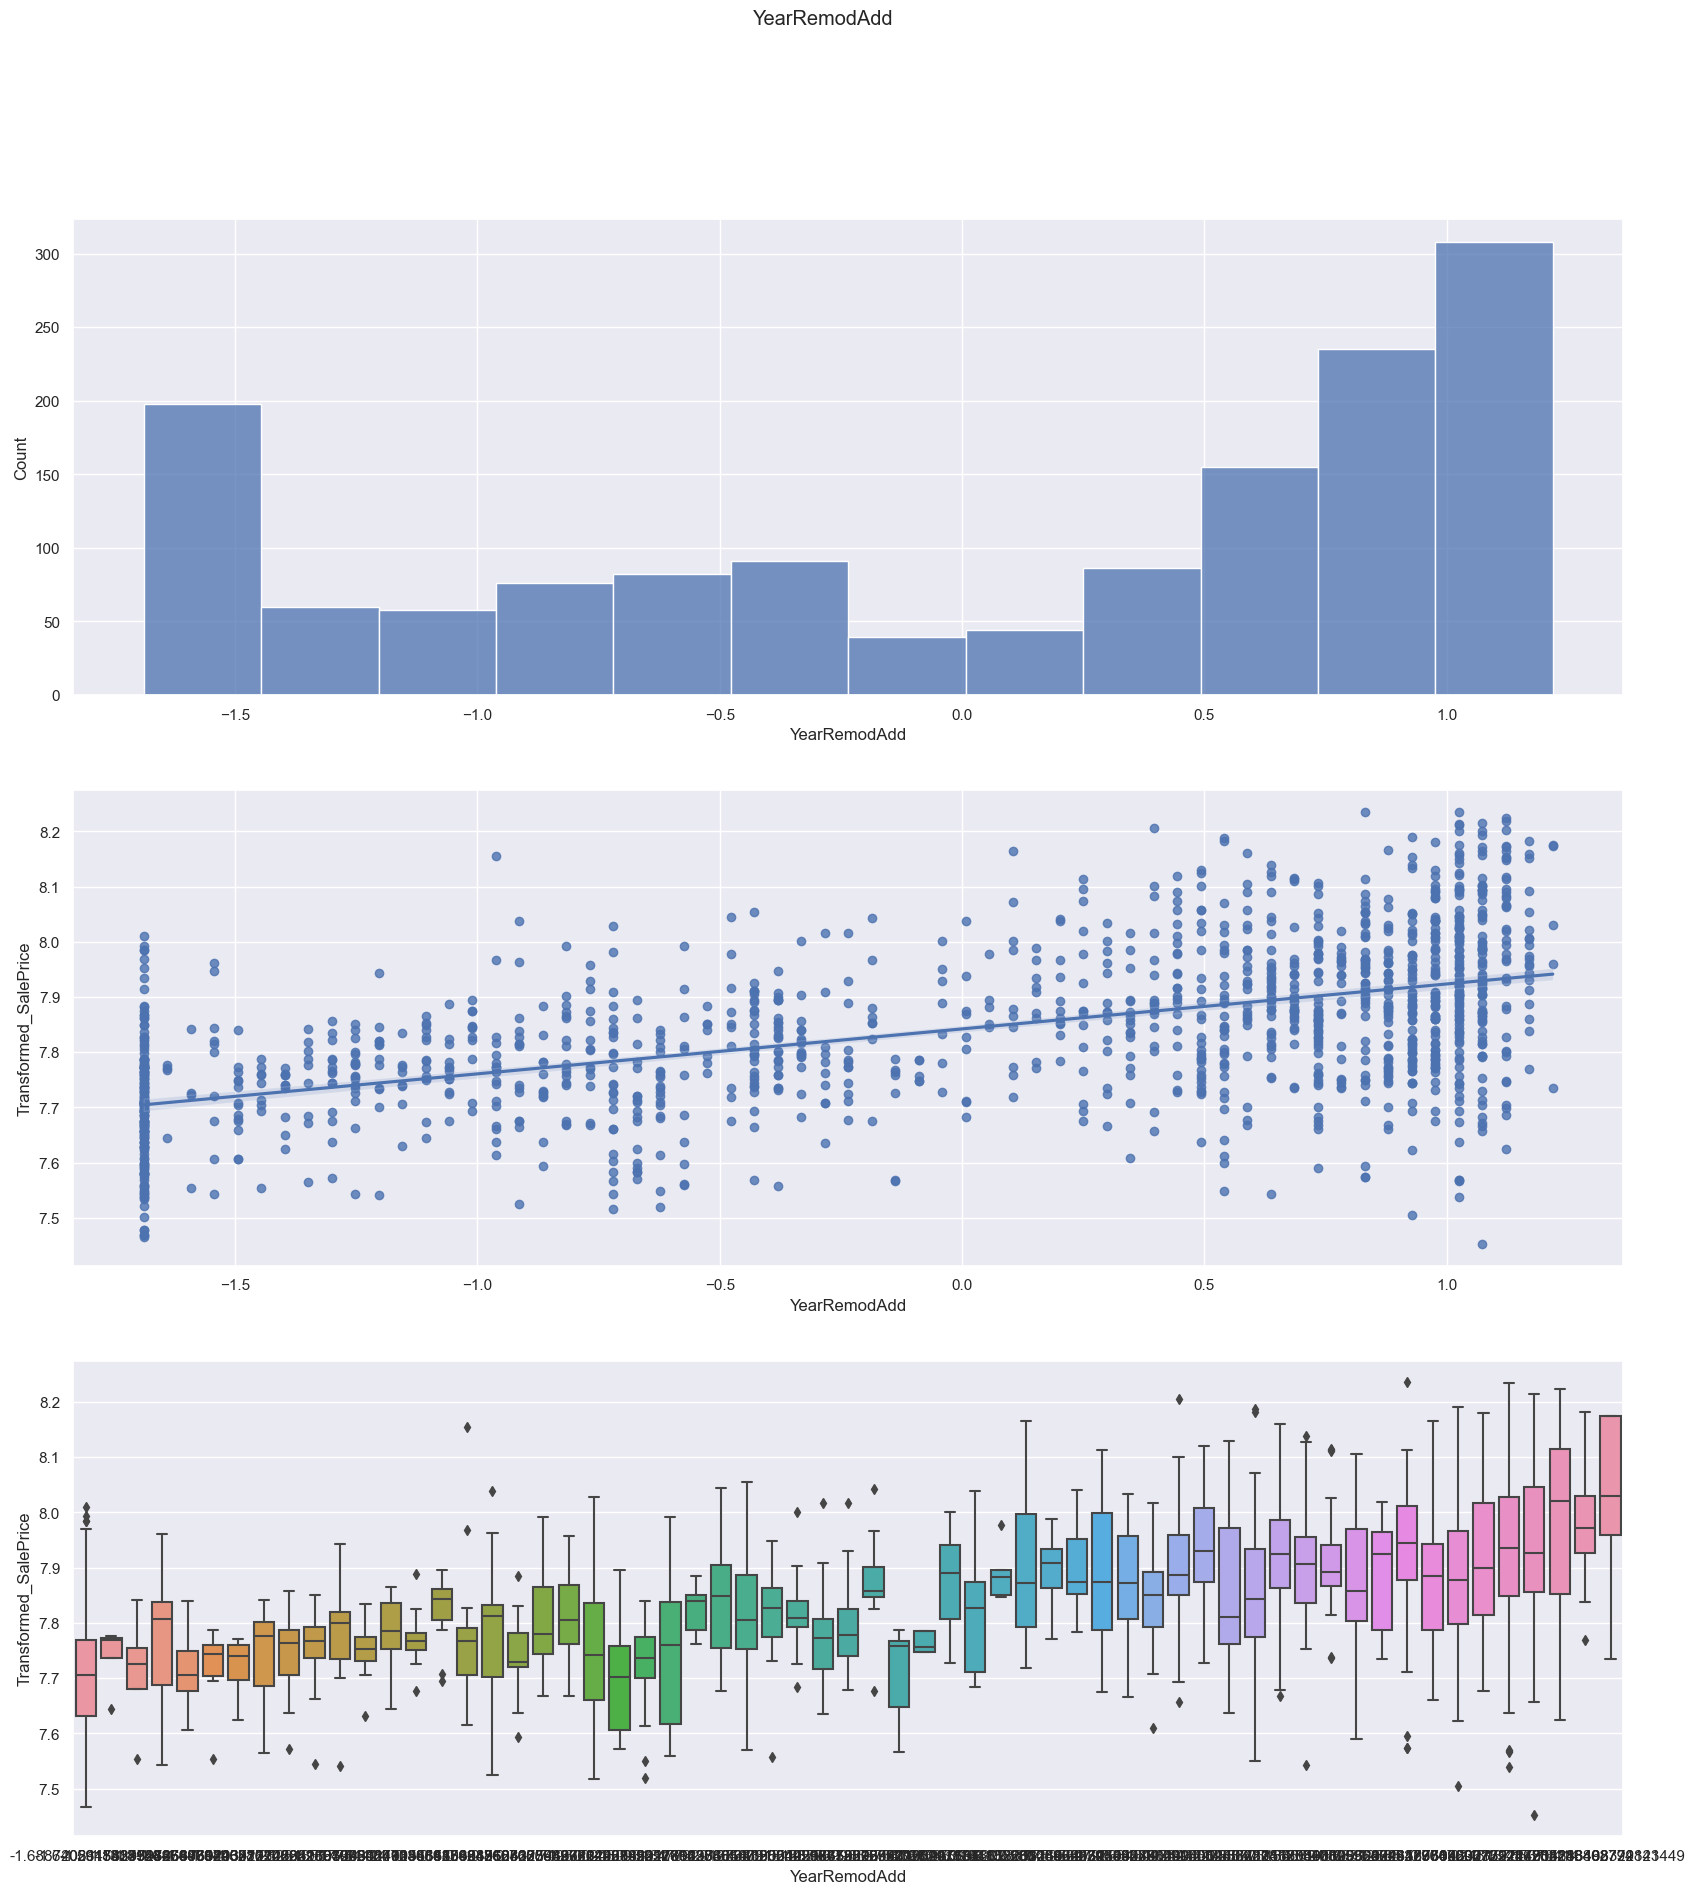

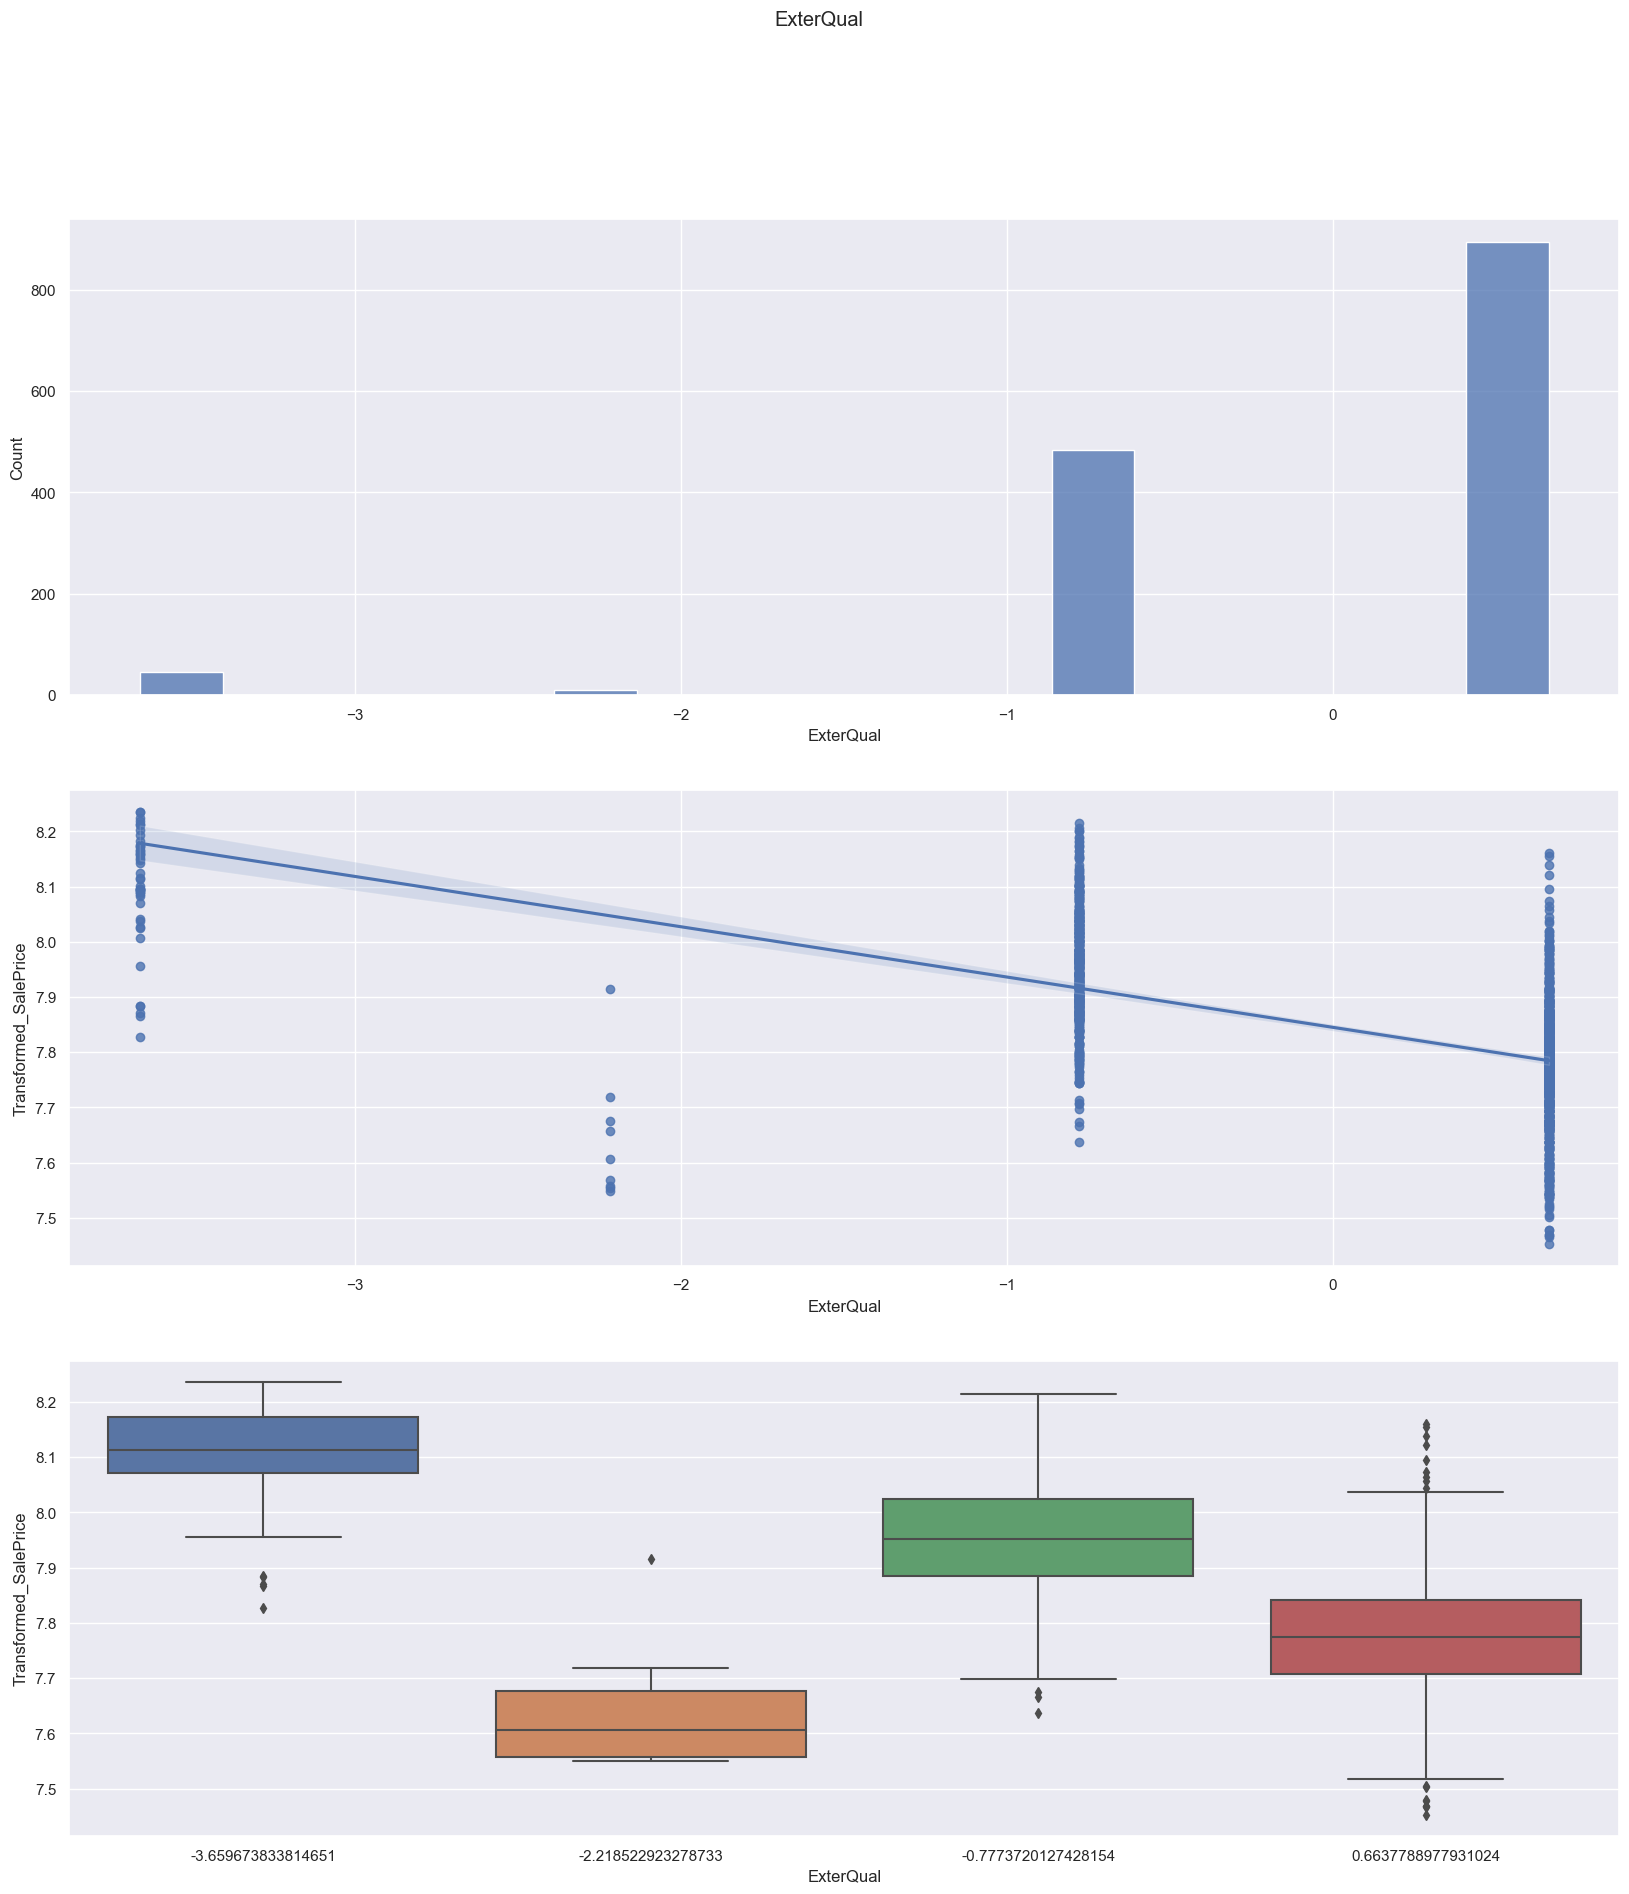

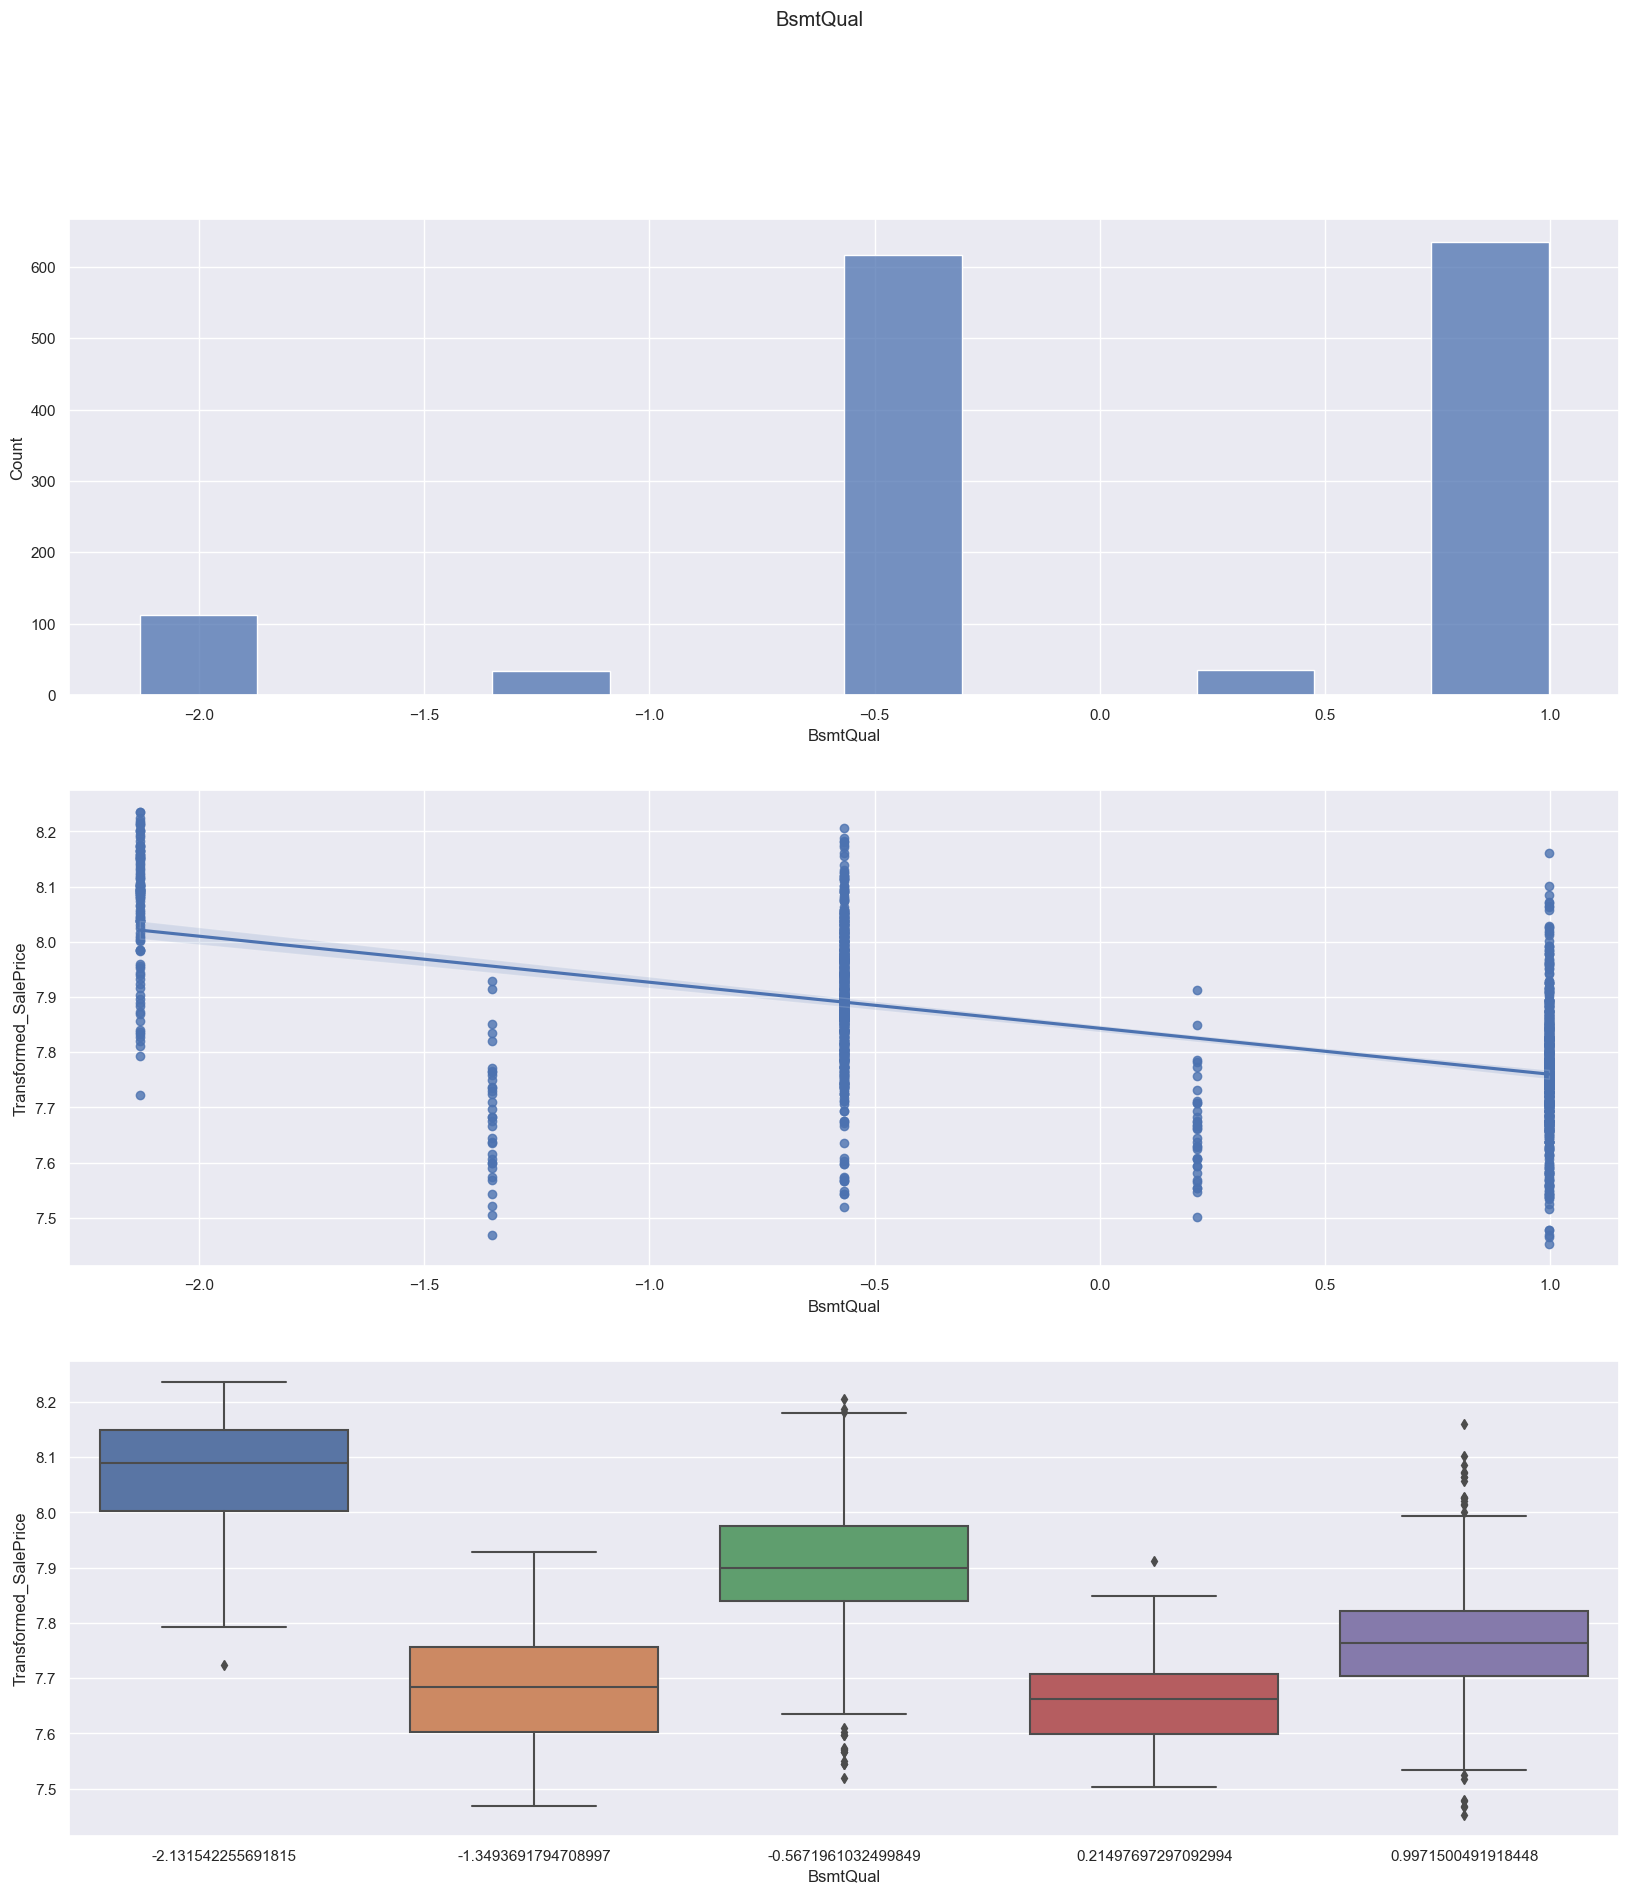

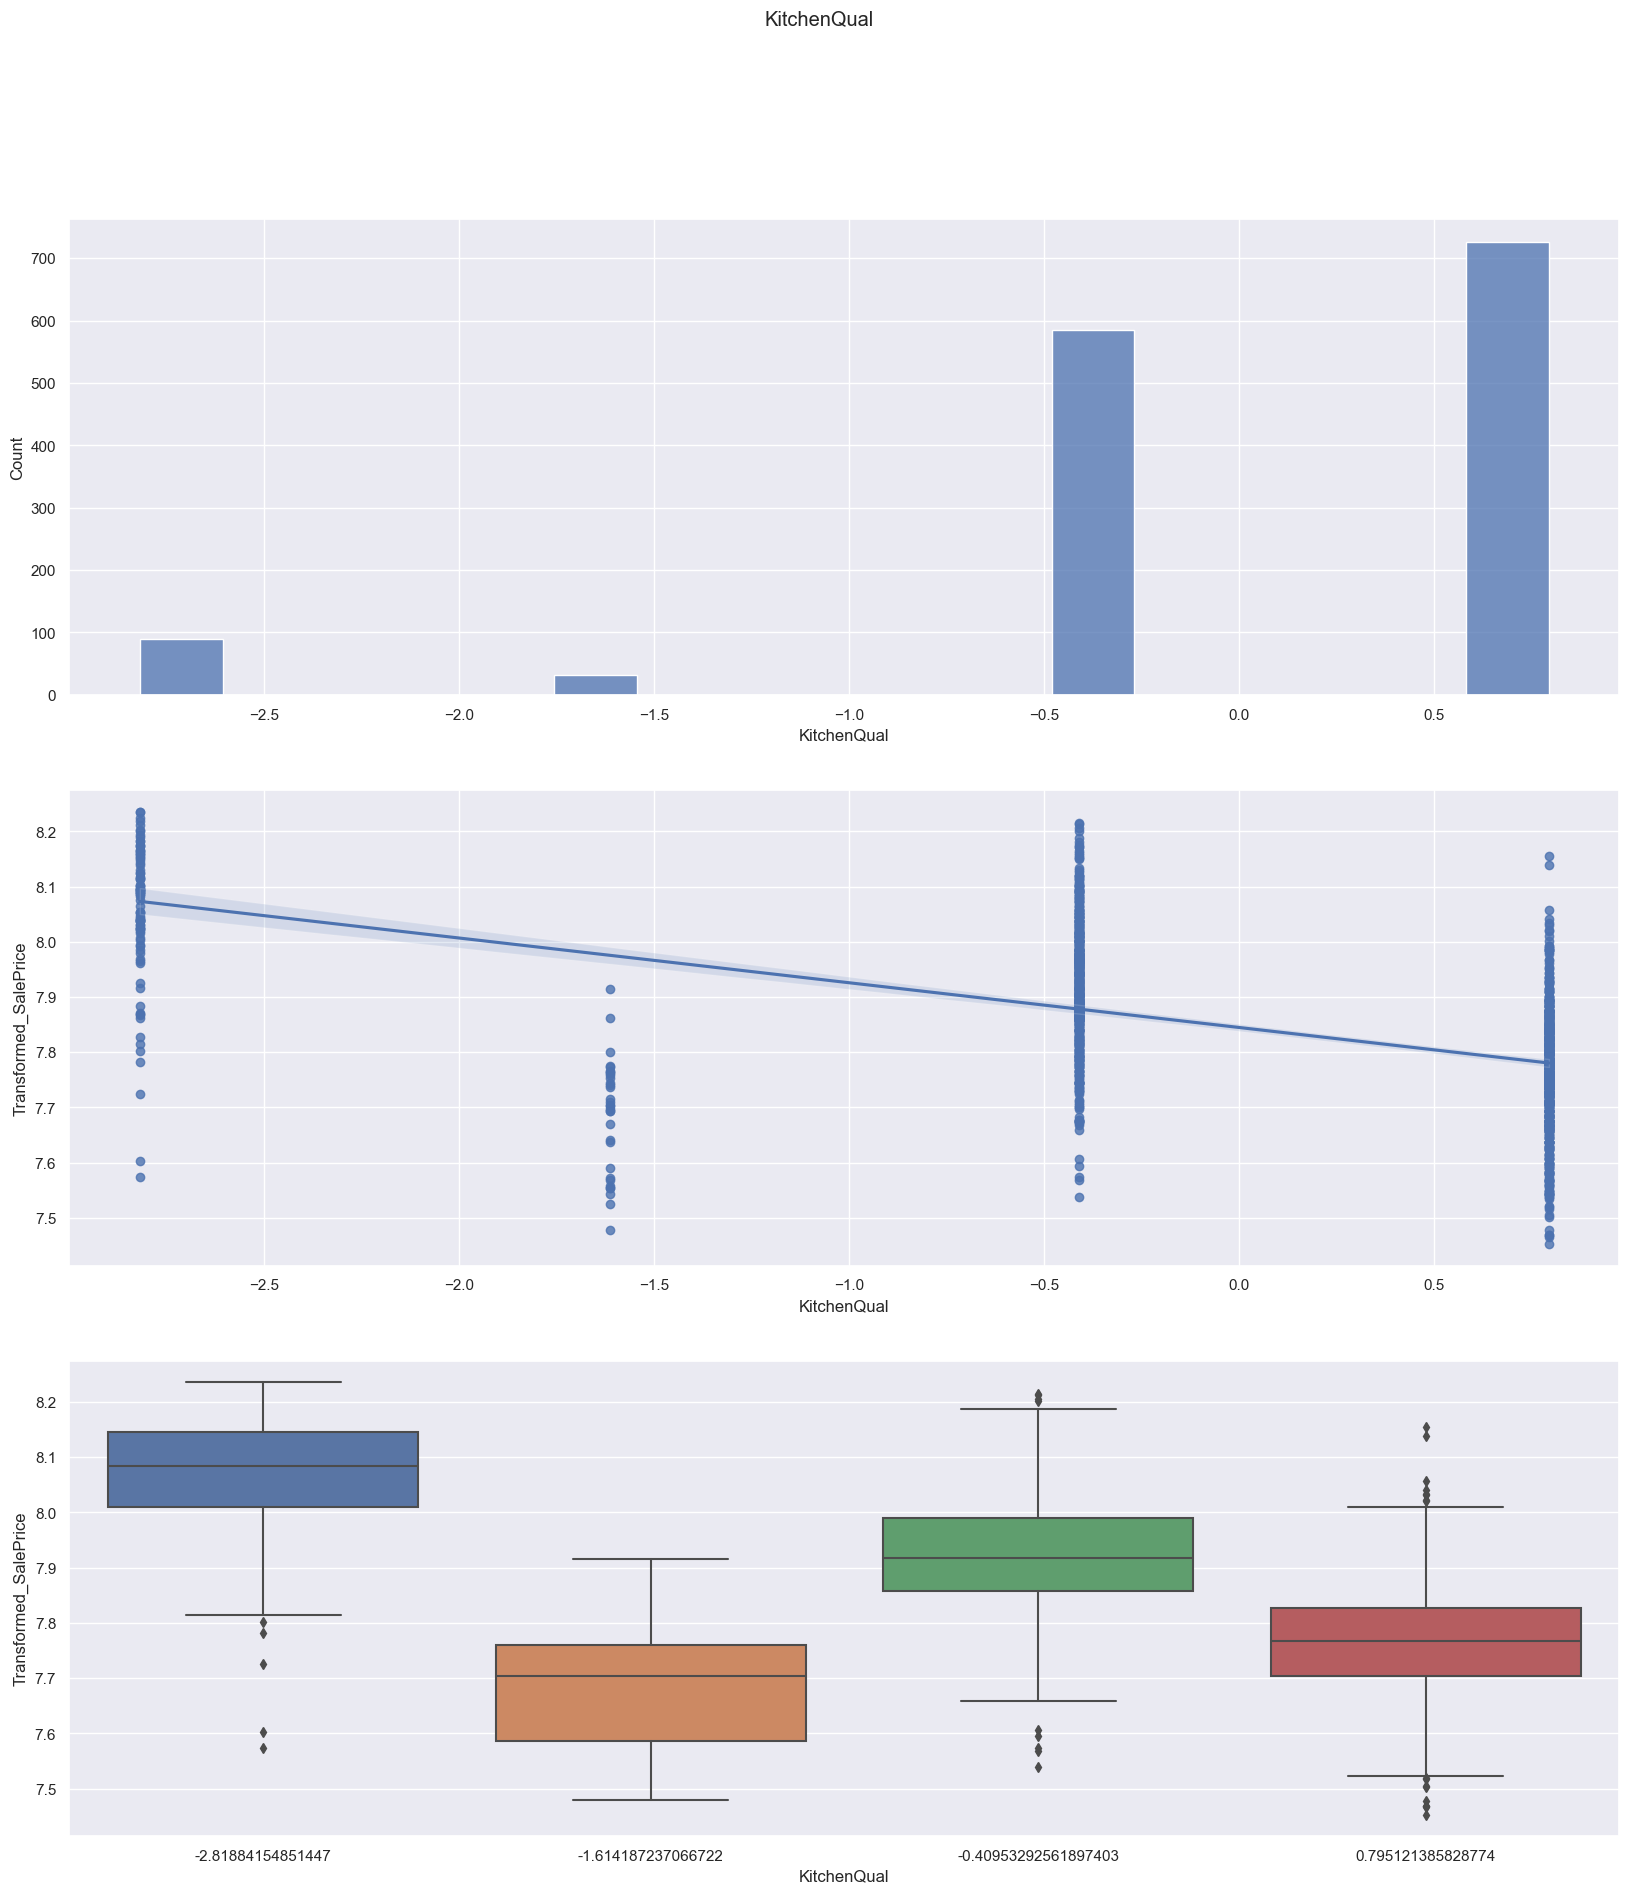

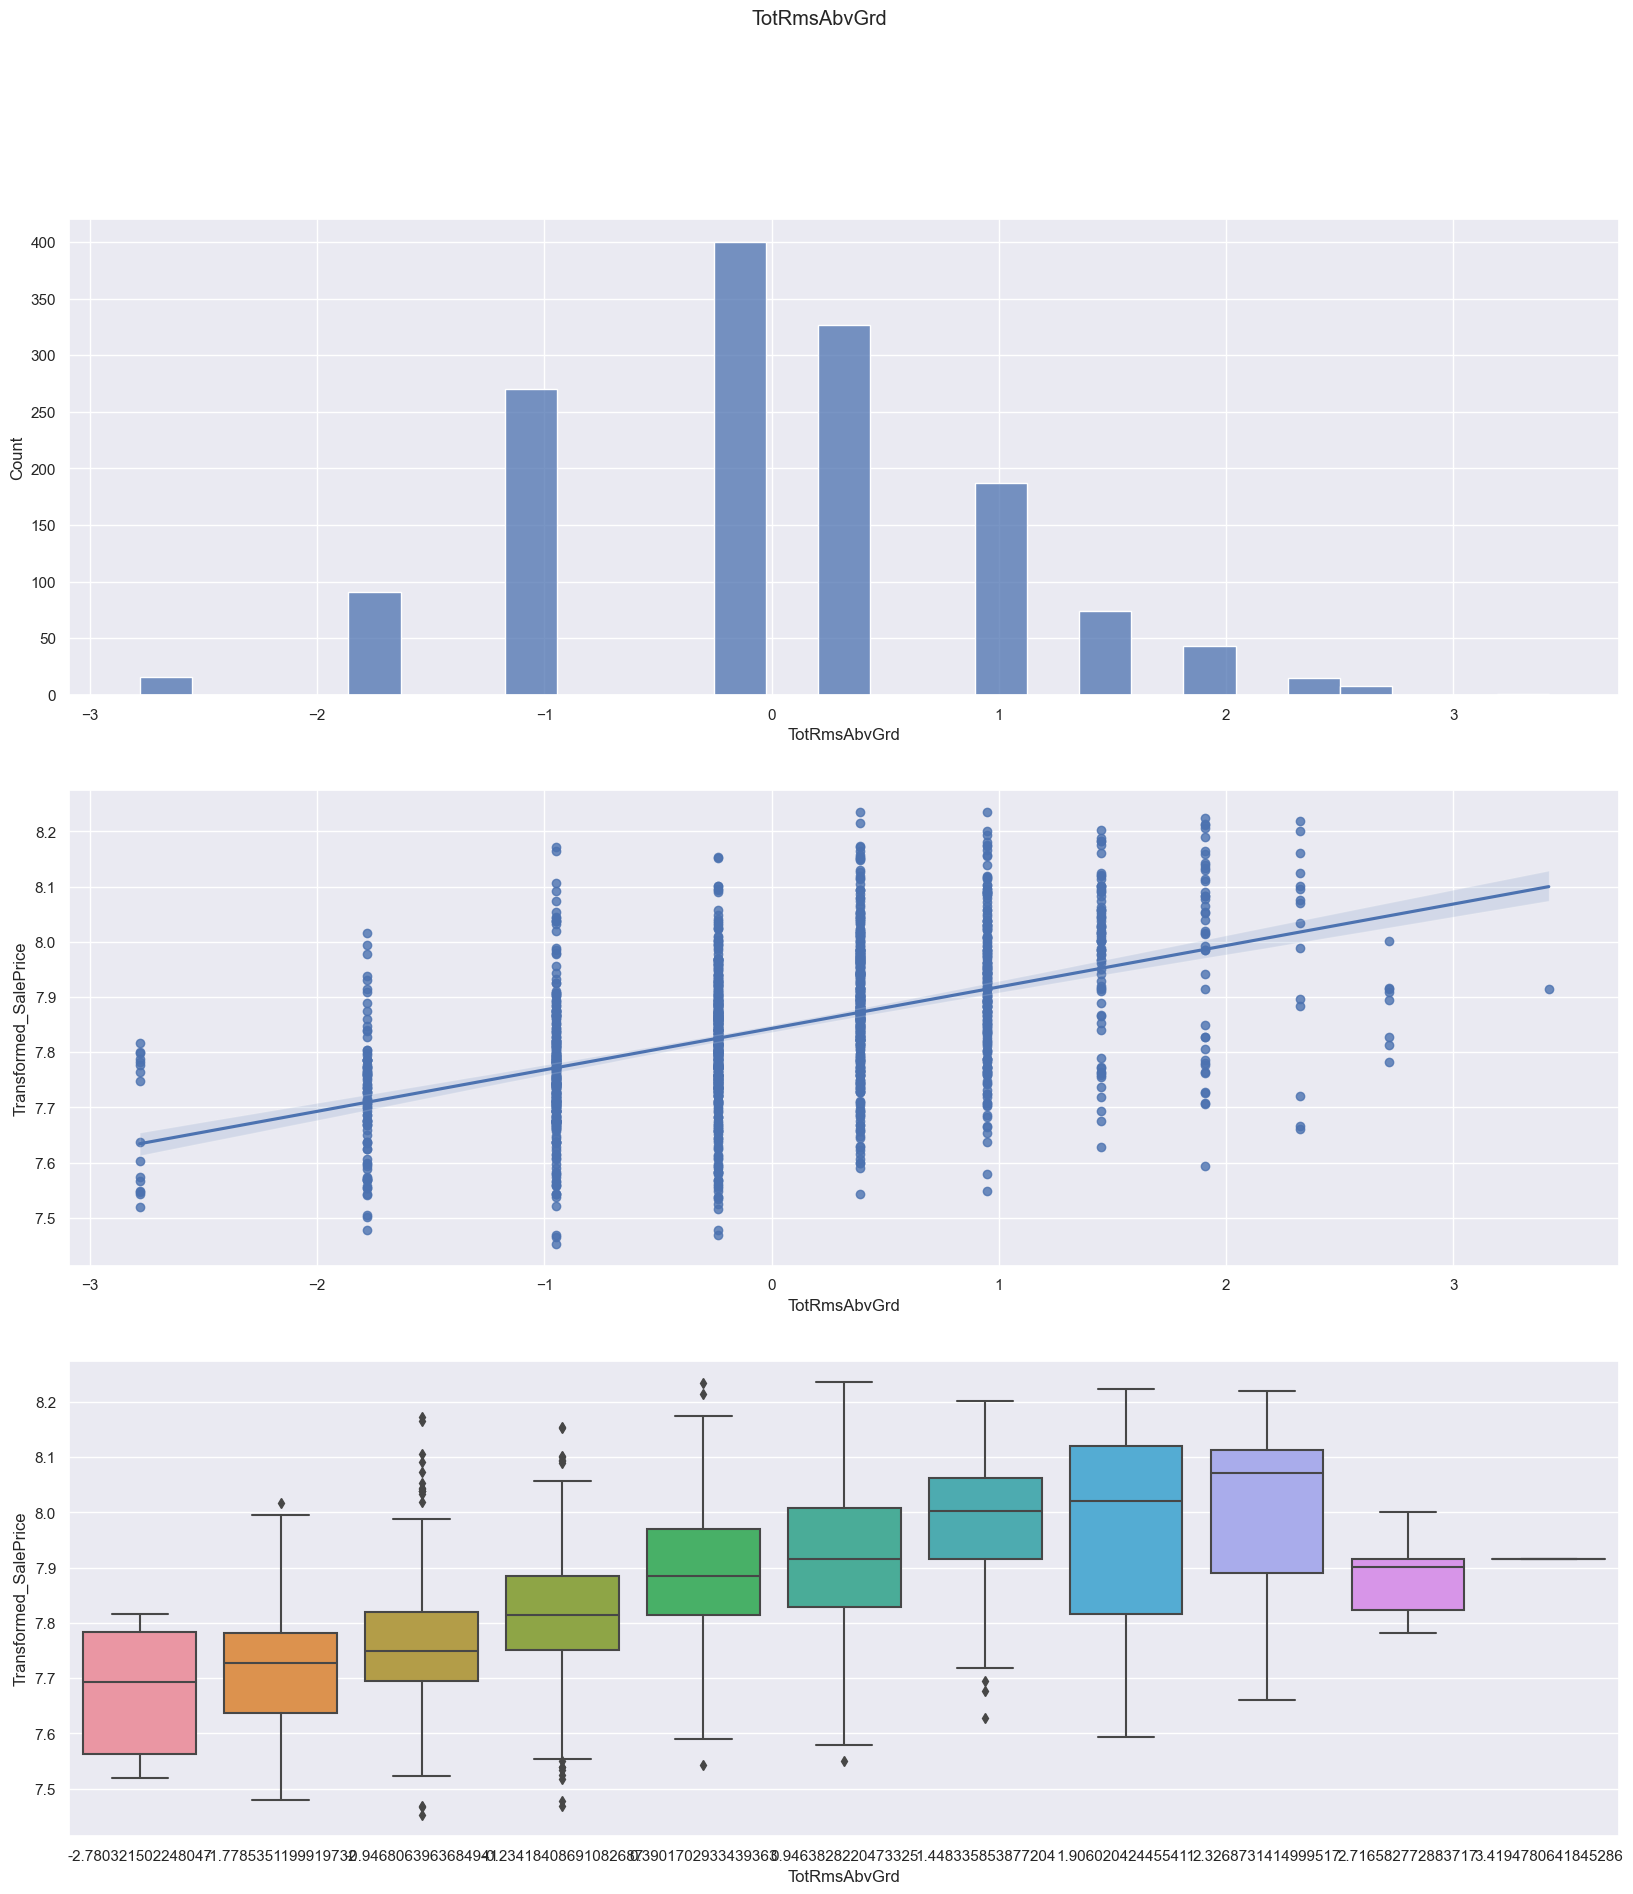

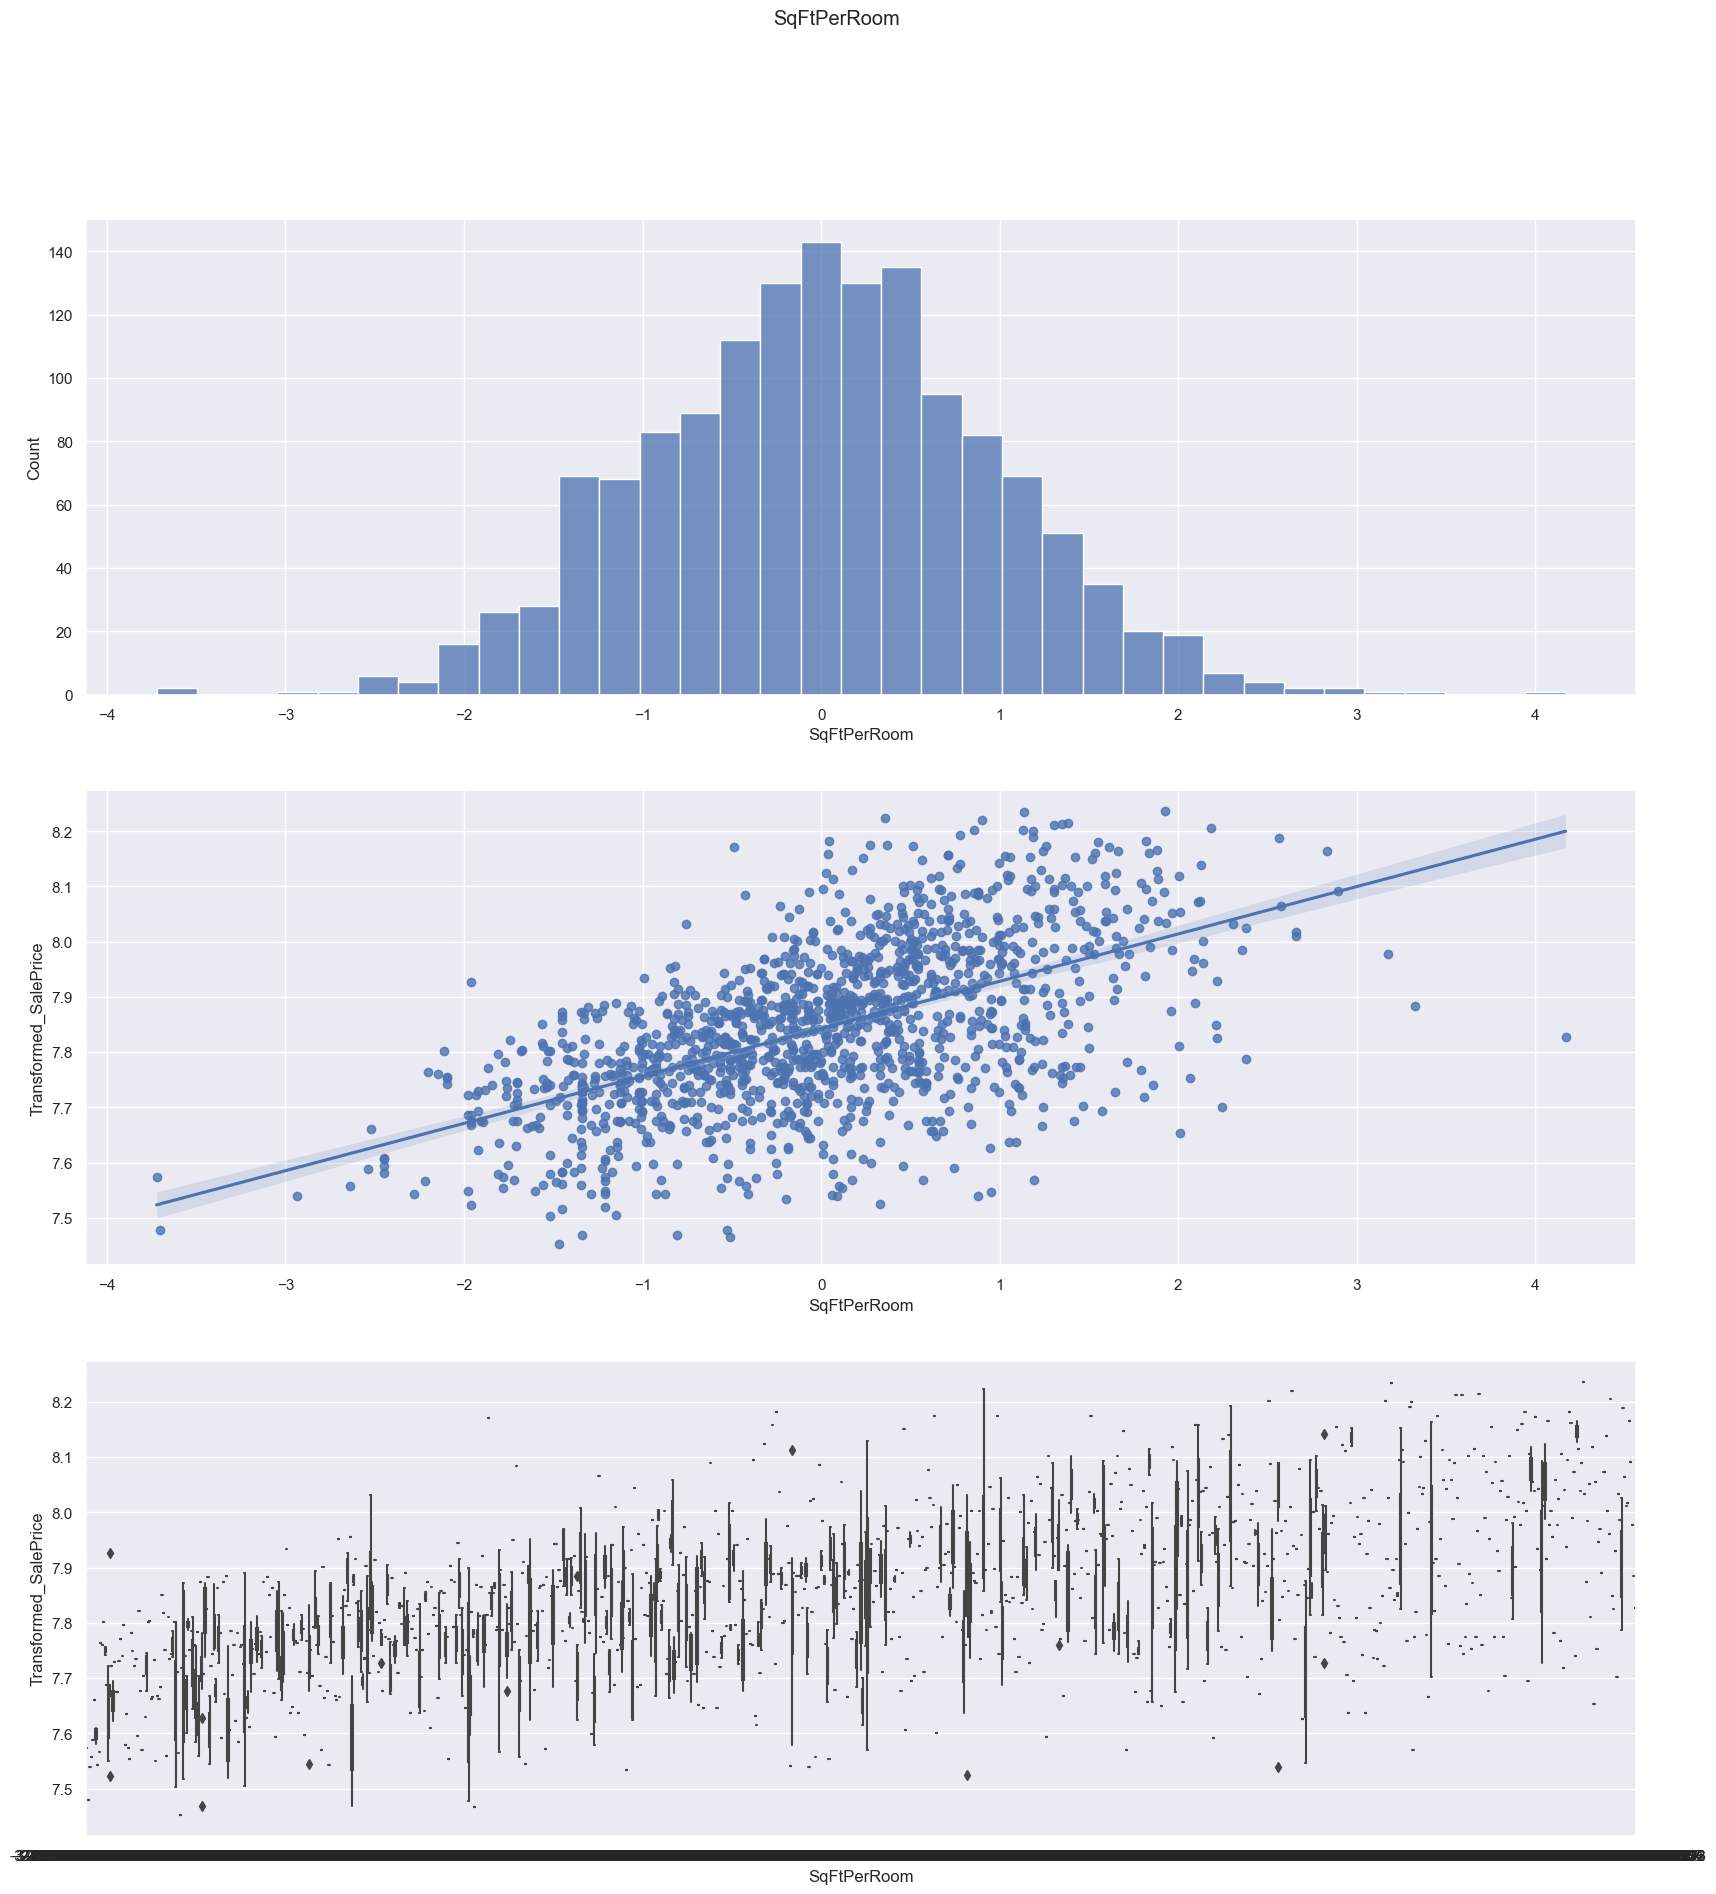

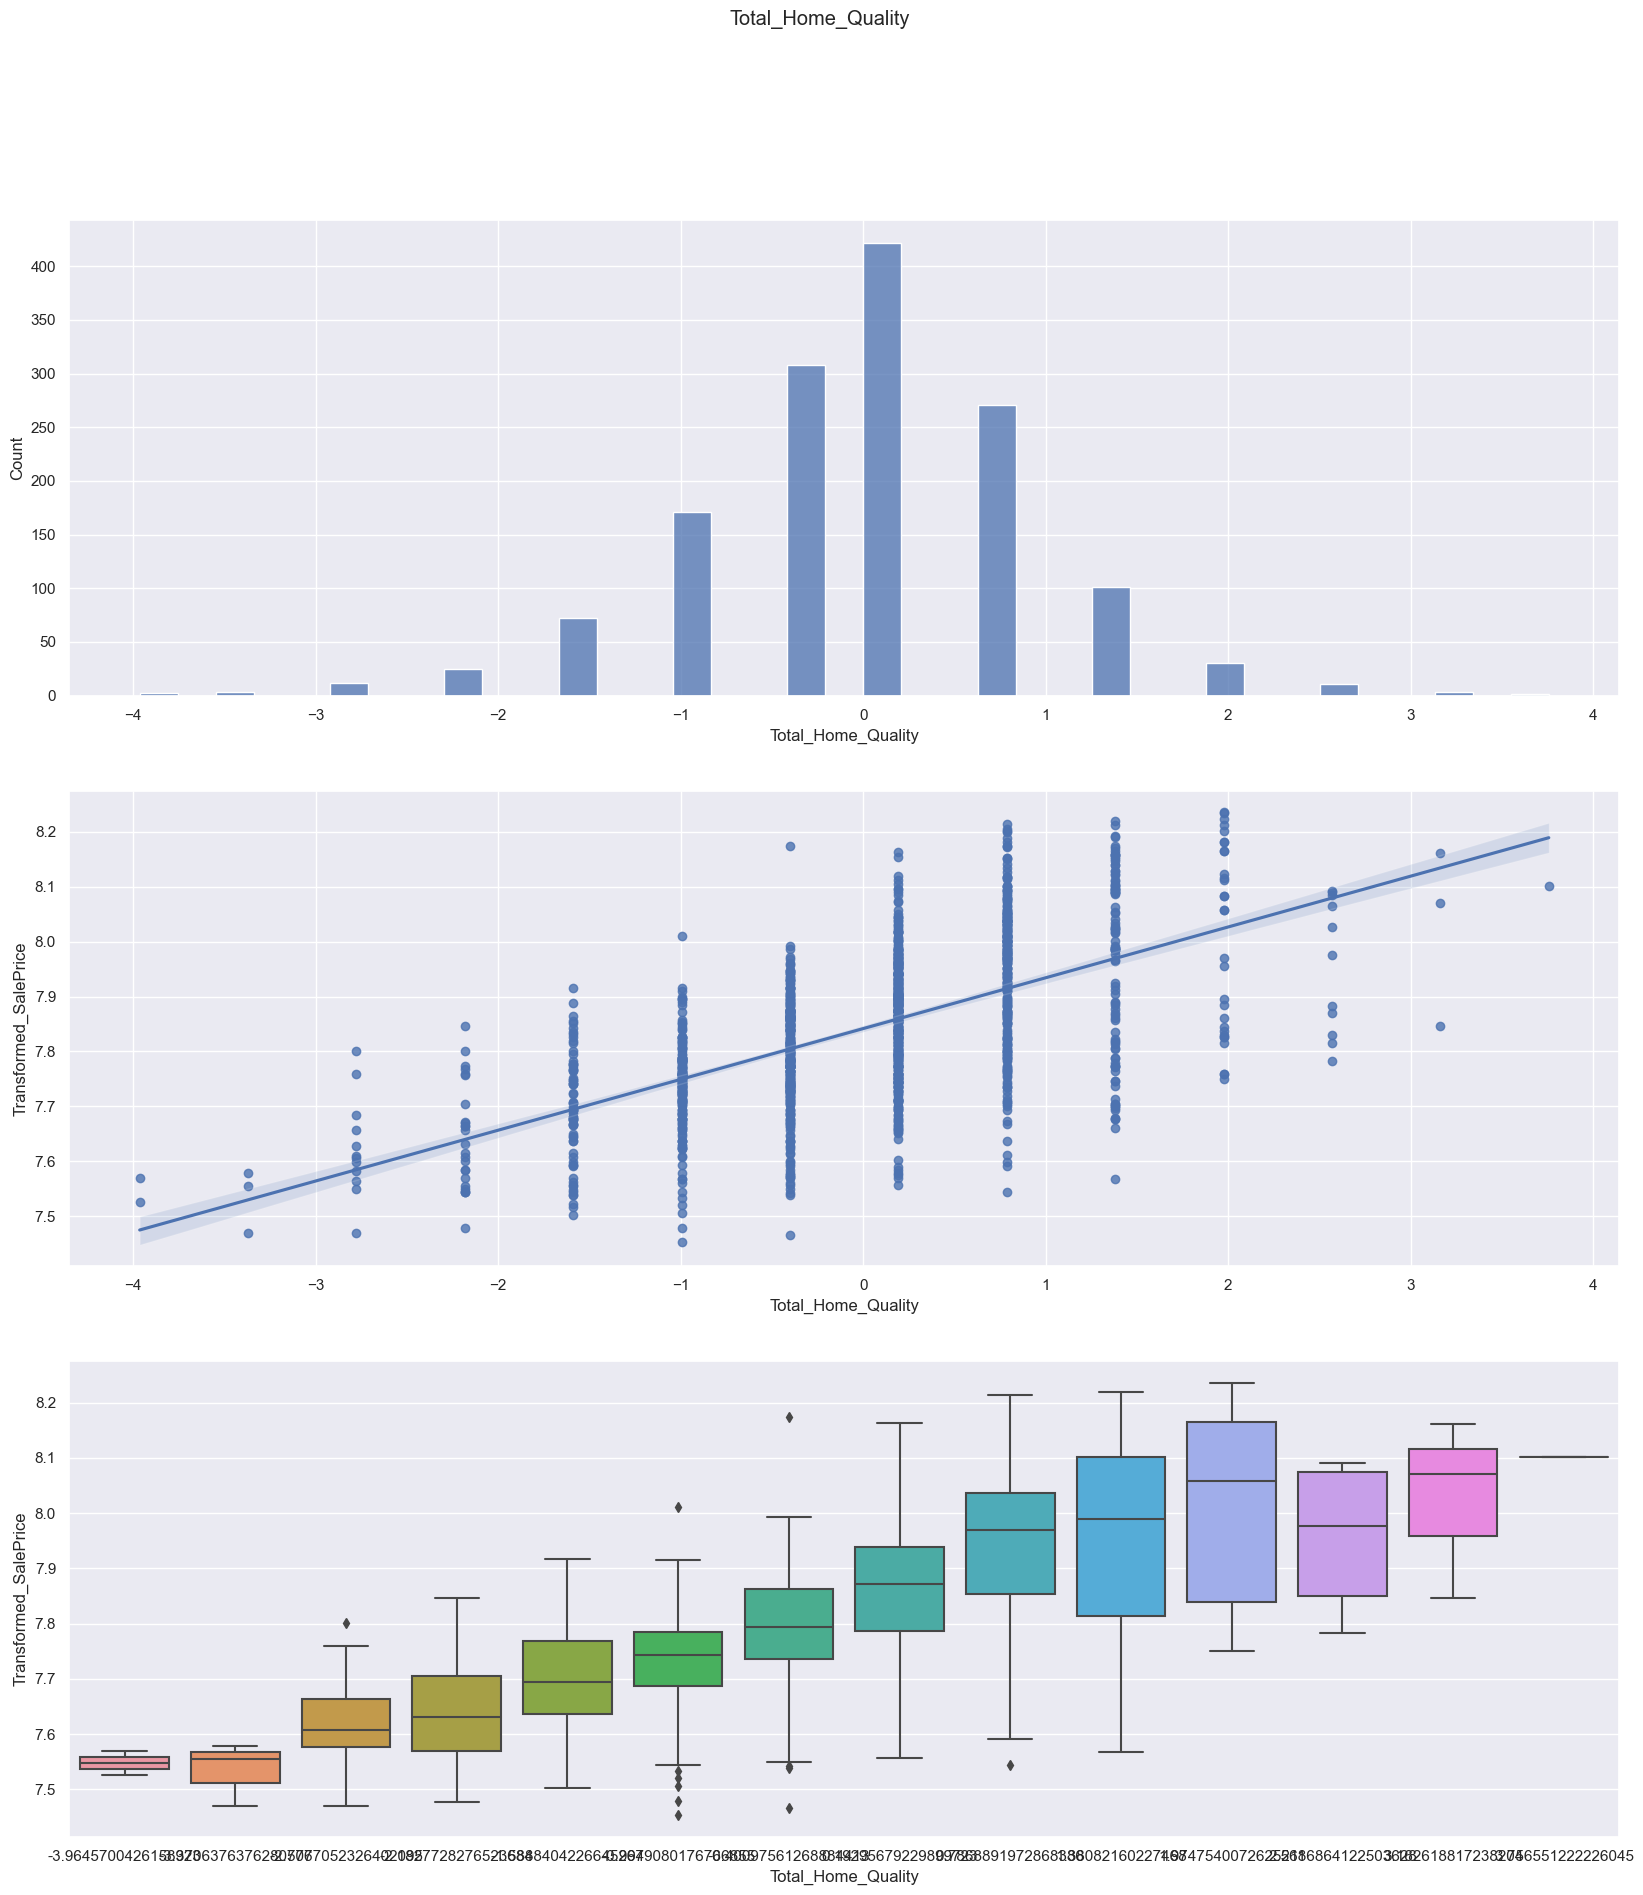

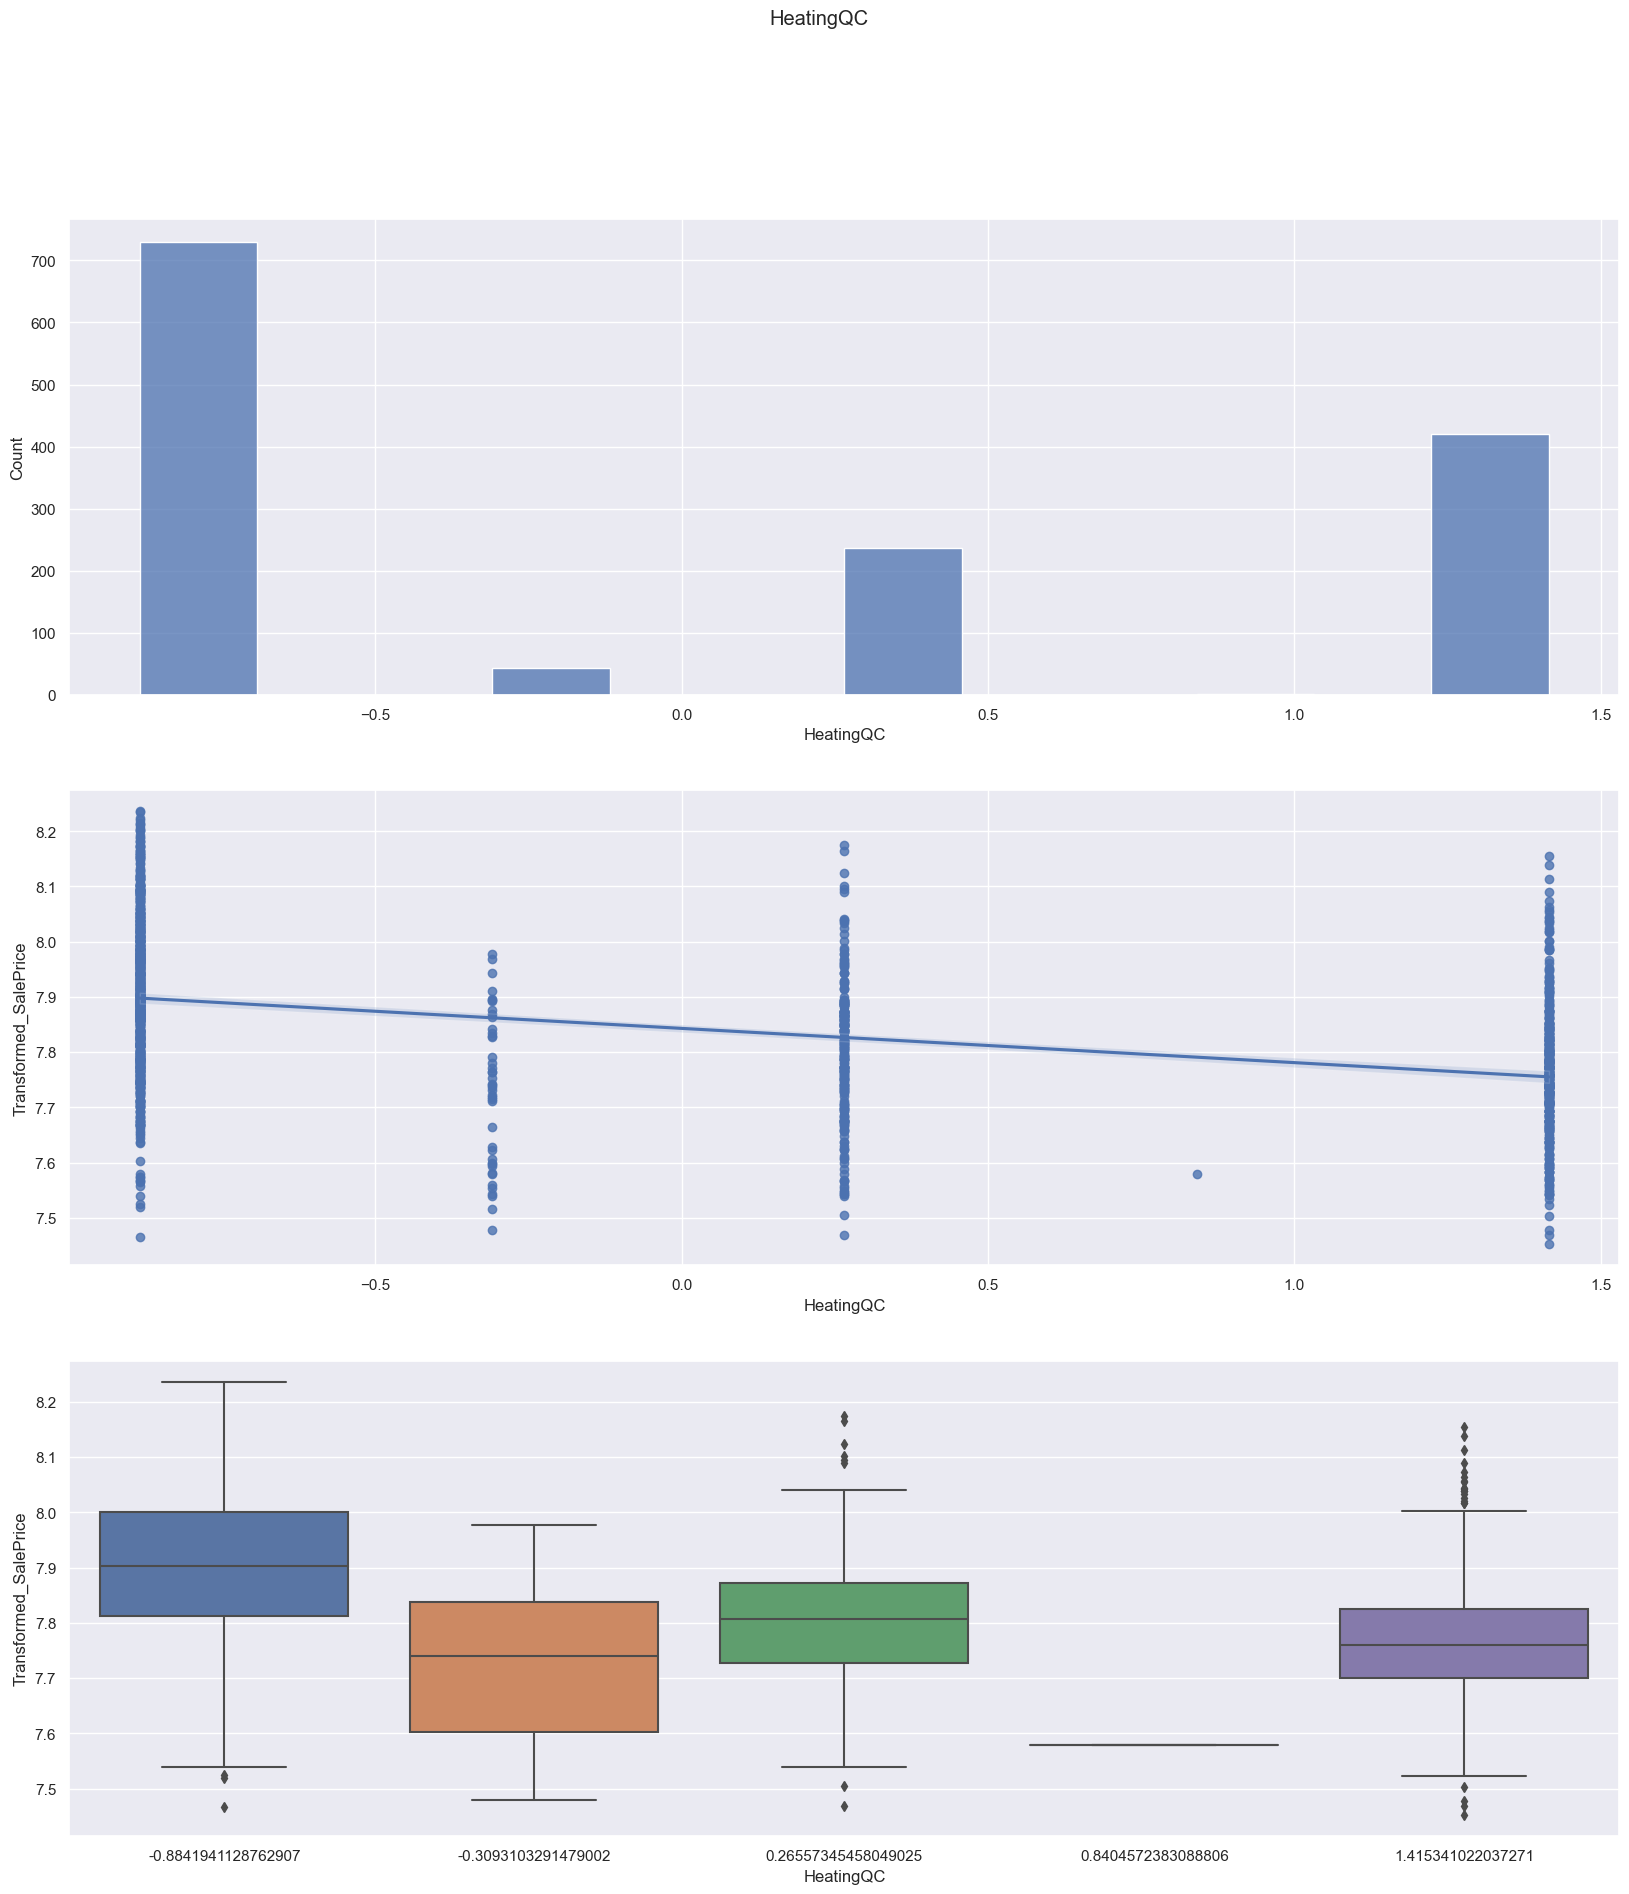

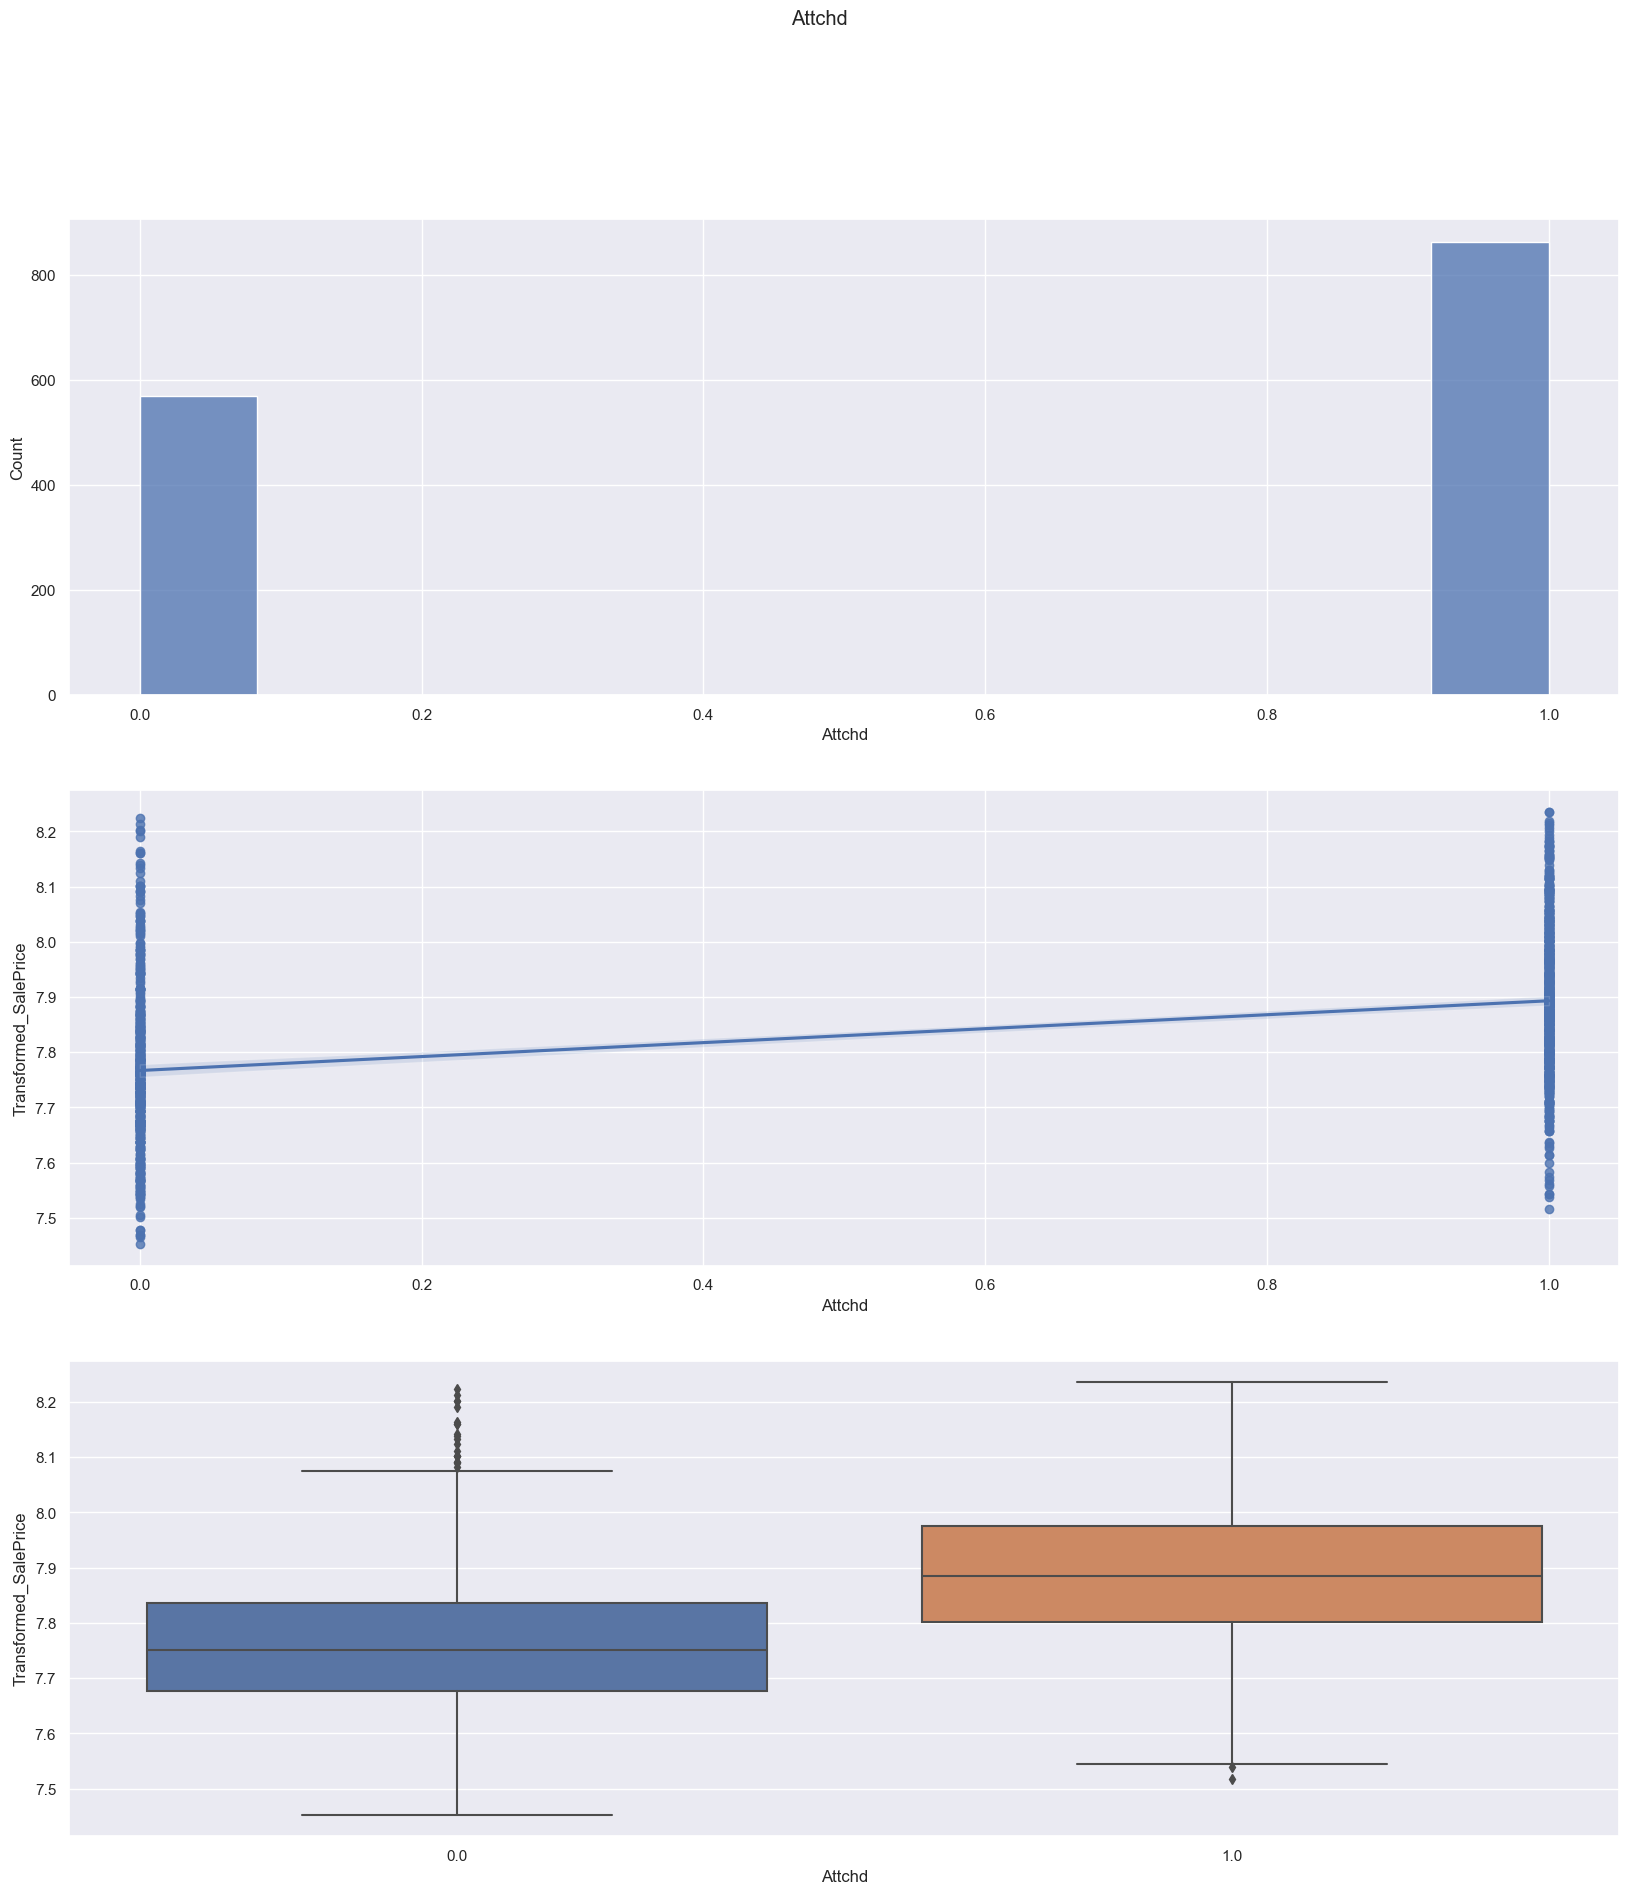

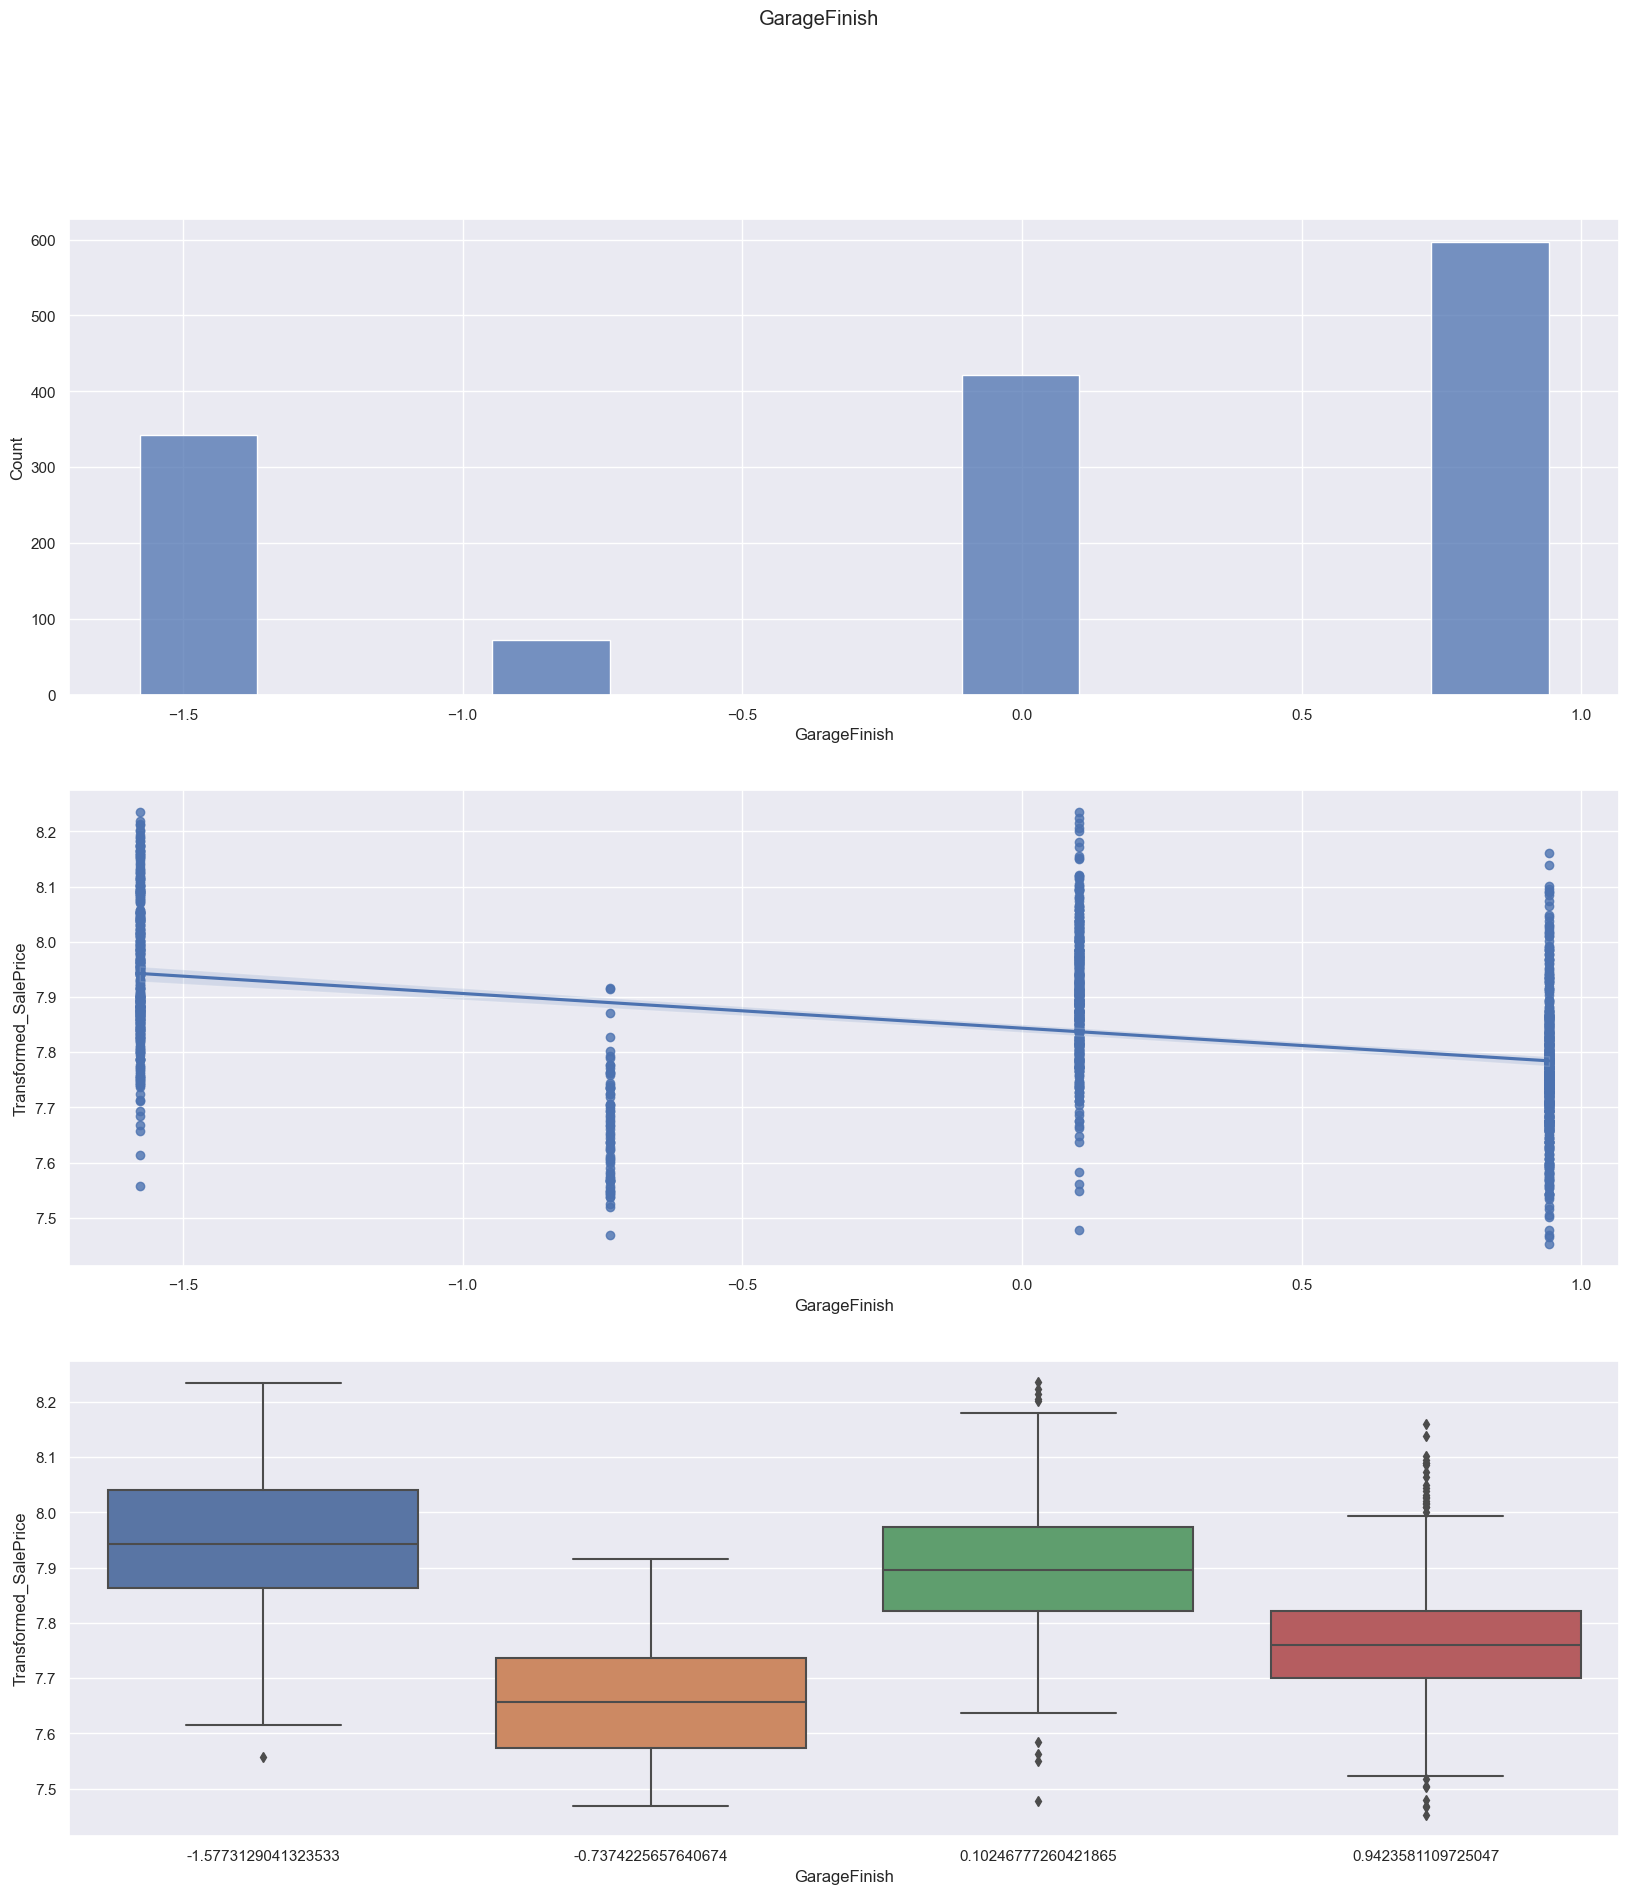

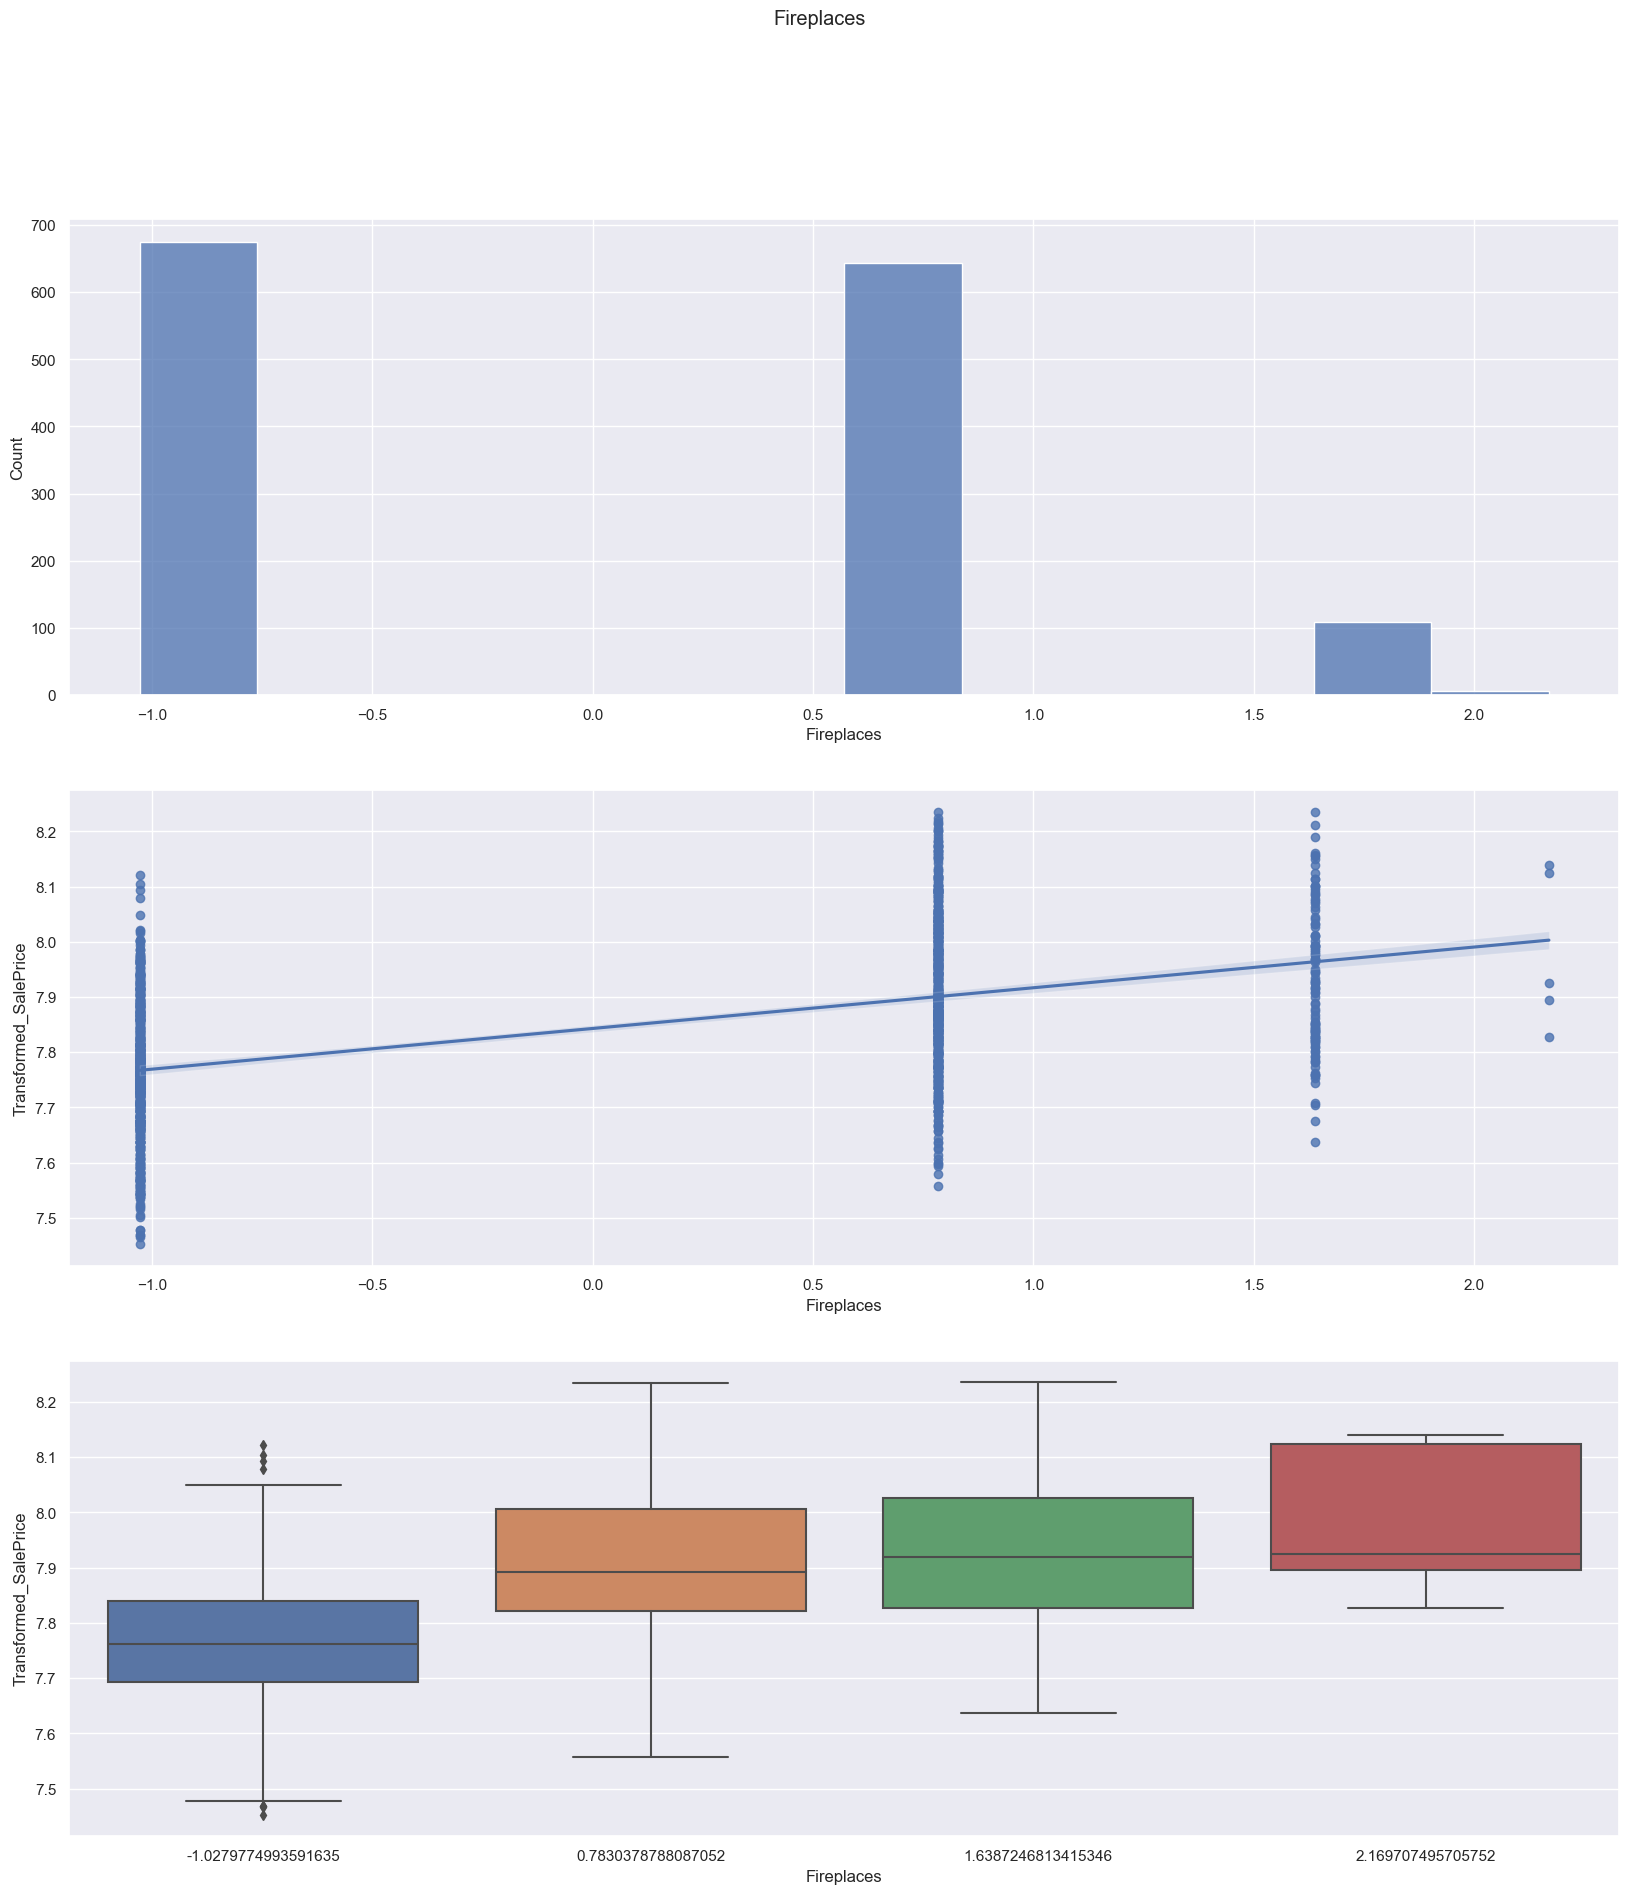

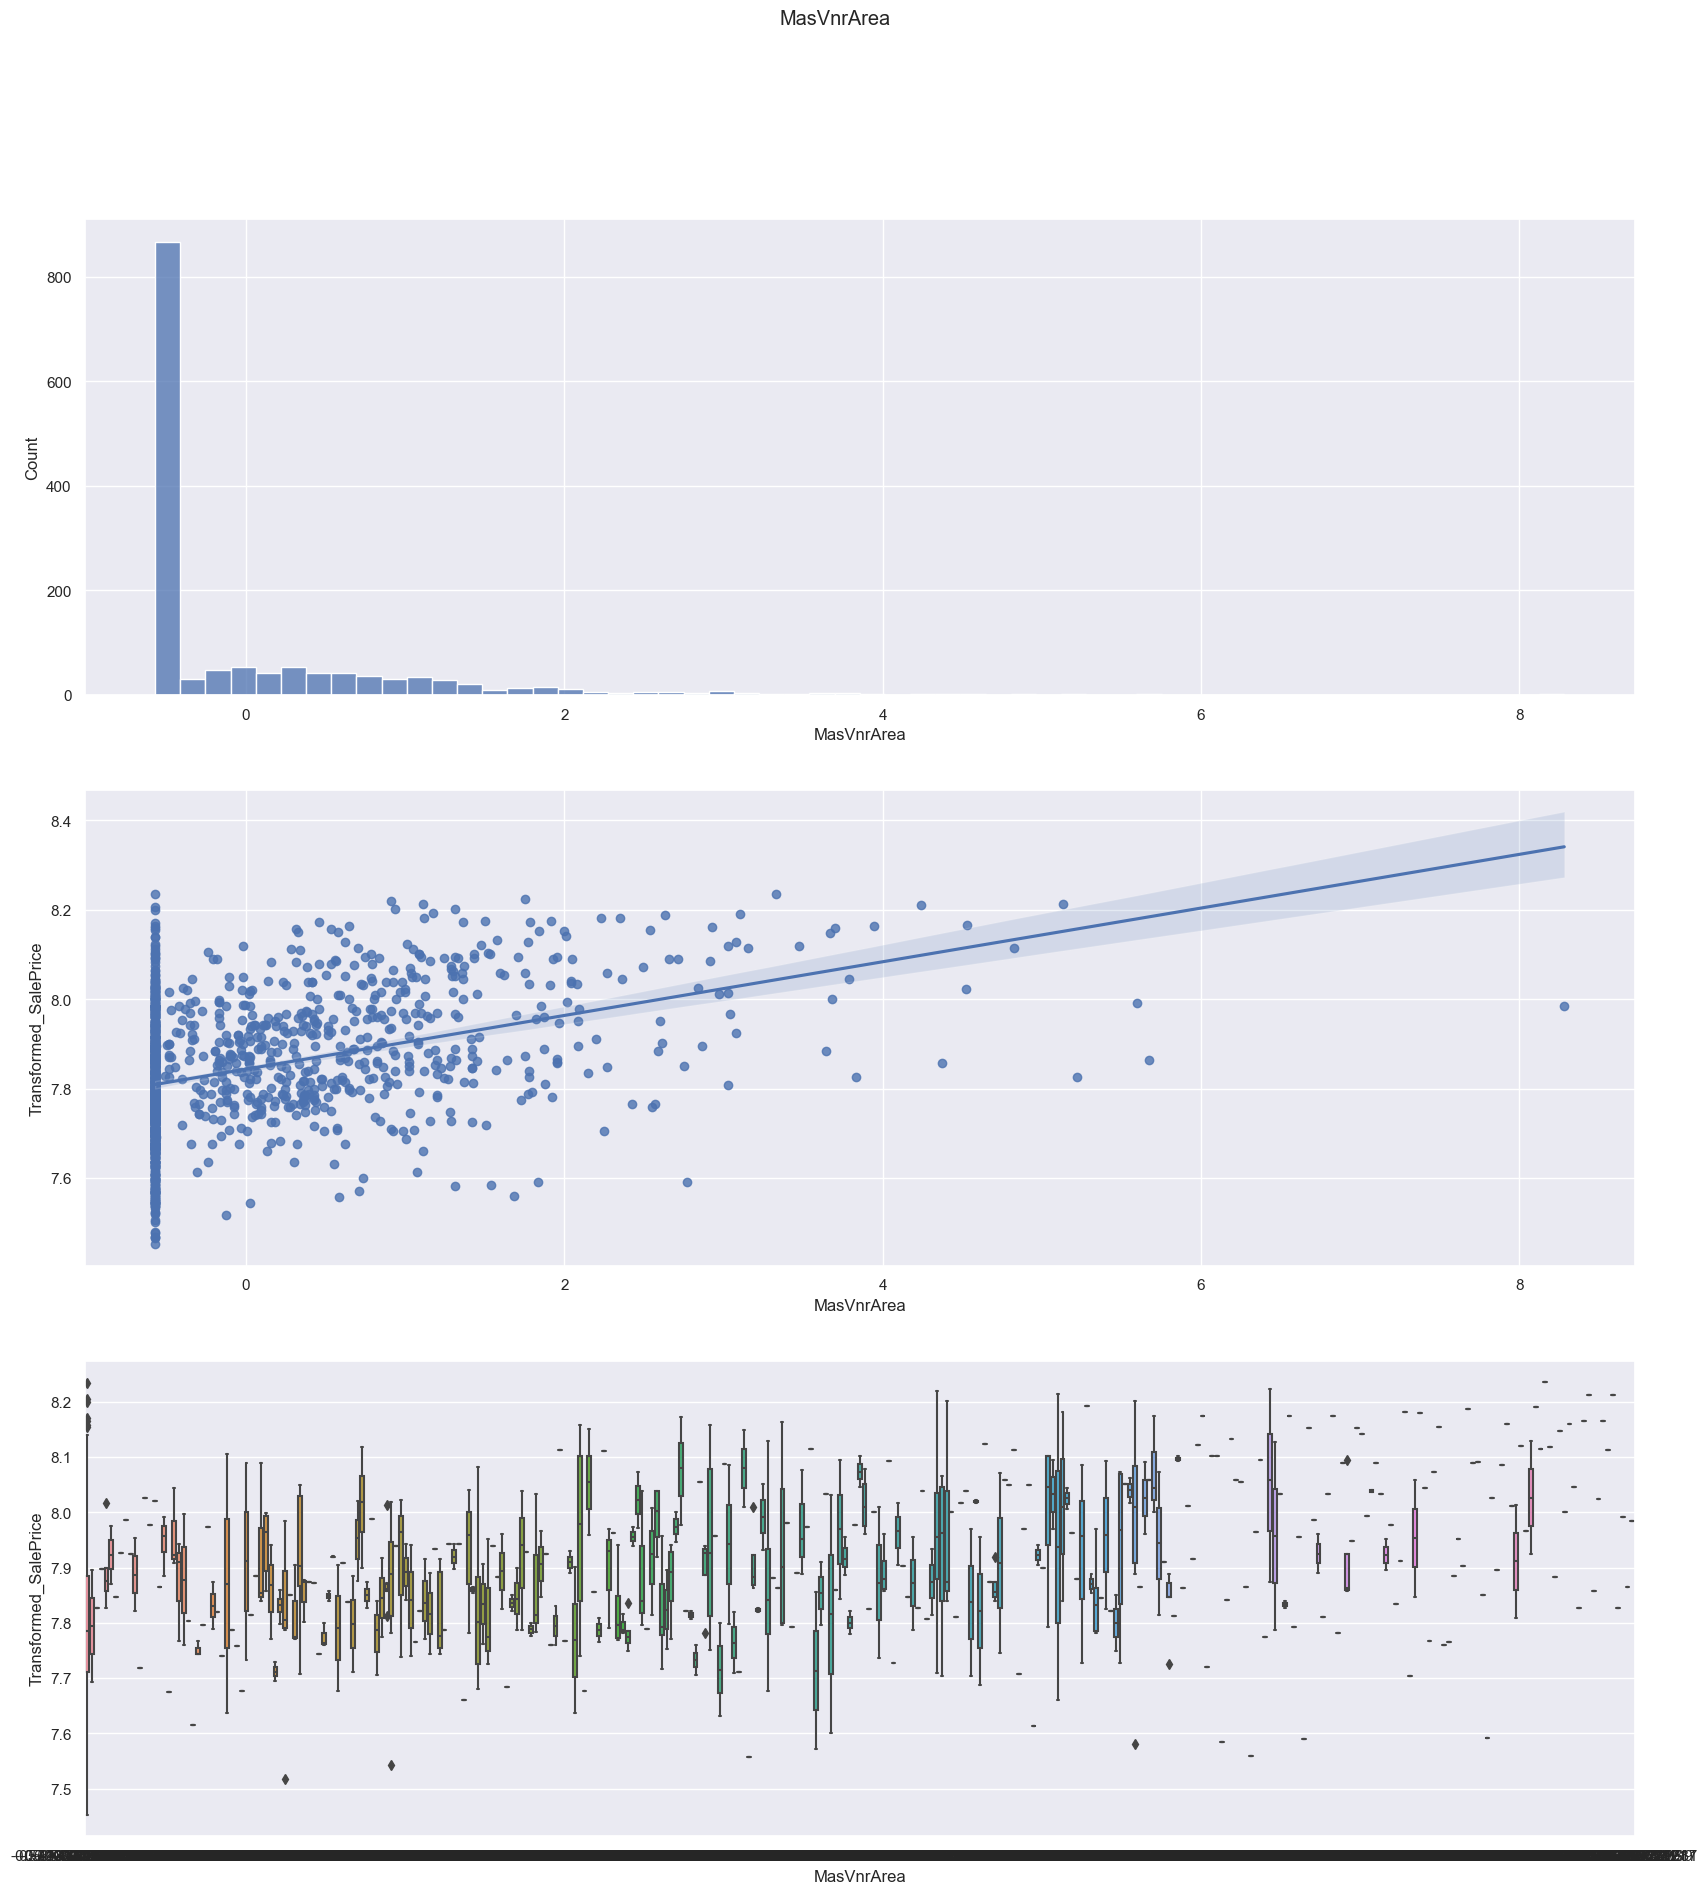

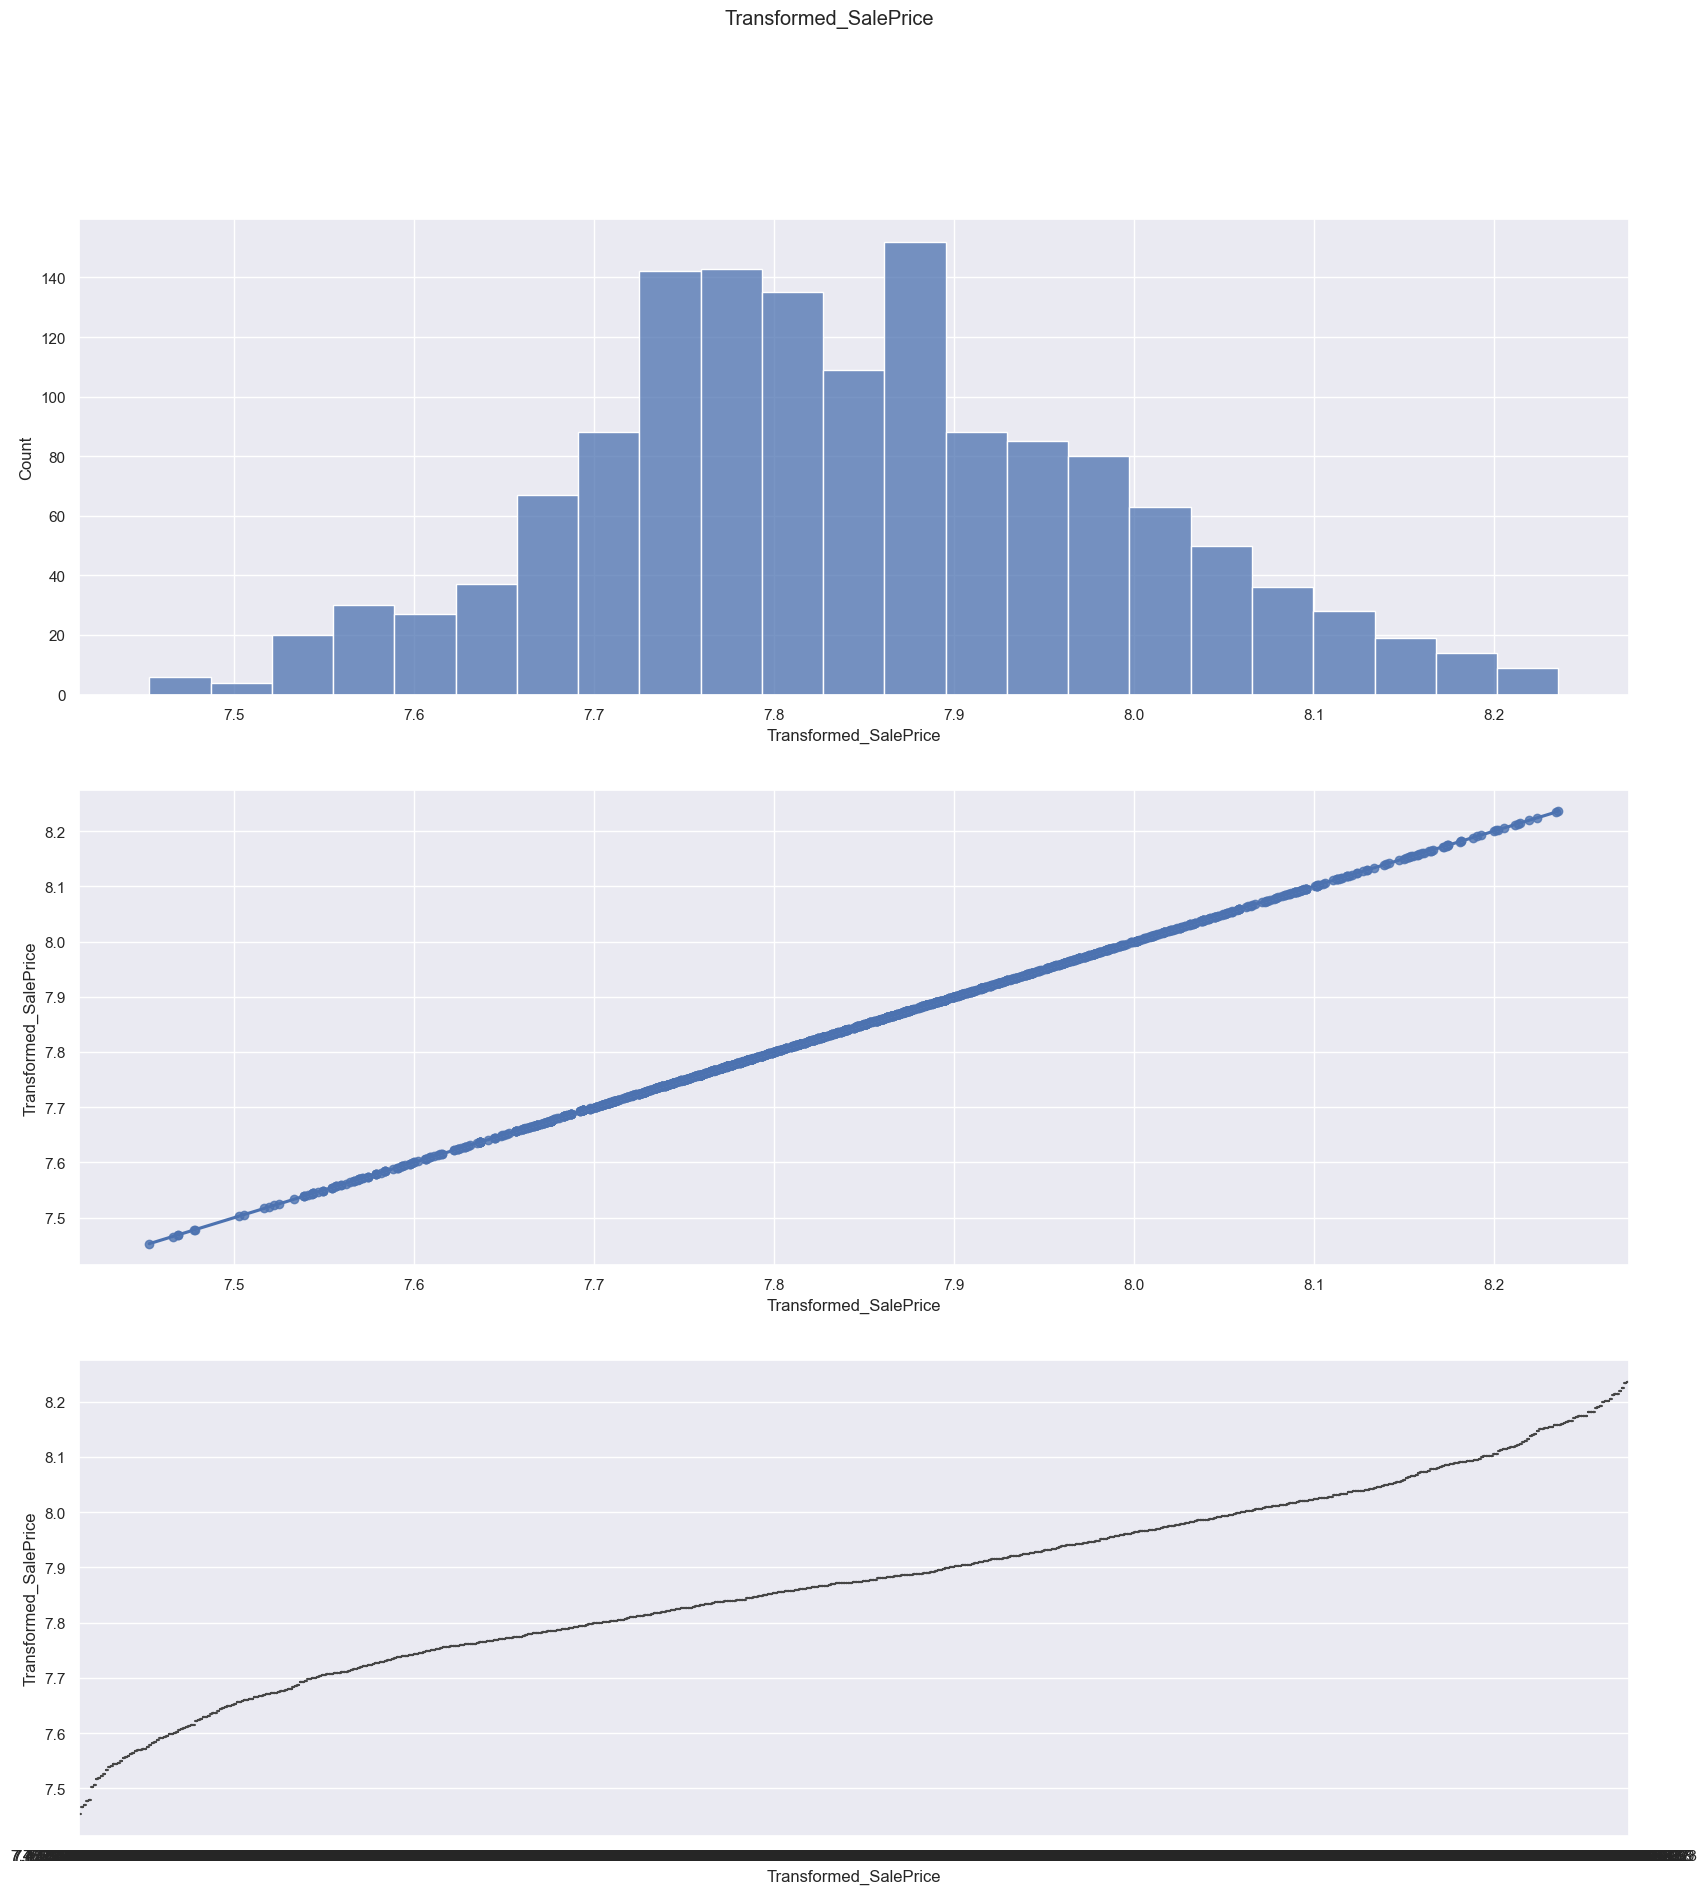

In [46]:
dummy1 = IQR(df10, 'Transformed_SalePrice')
dummy2 = IQR(dummy1, '1stFlrSF')
dummy3 = IQR(dummy2, 'TotalBsmtSF')
dummy4 = IQR(dummy3, 'Total_Bathrooms')
dummy5 = IQR(dummy4, 'SqFtPerRoom')
dummy6 = IQR(dummy5, 'SqFtPerRoom')

for i in df10.columns:
    simple_graph(dummy6, y='Transformed_SalePrice', x=i)

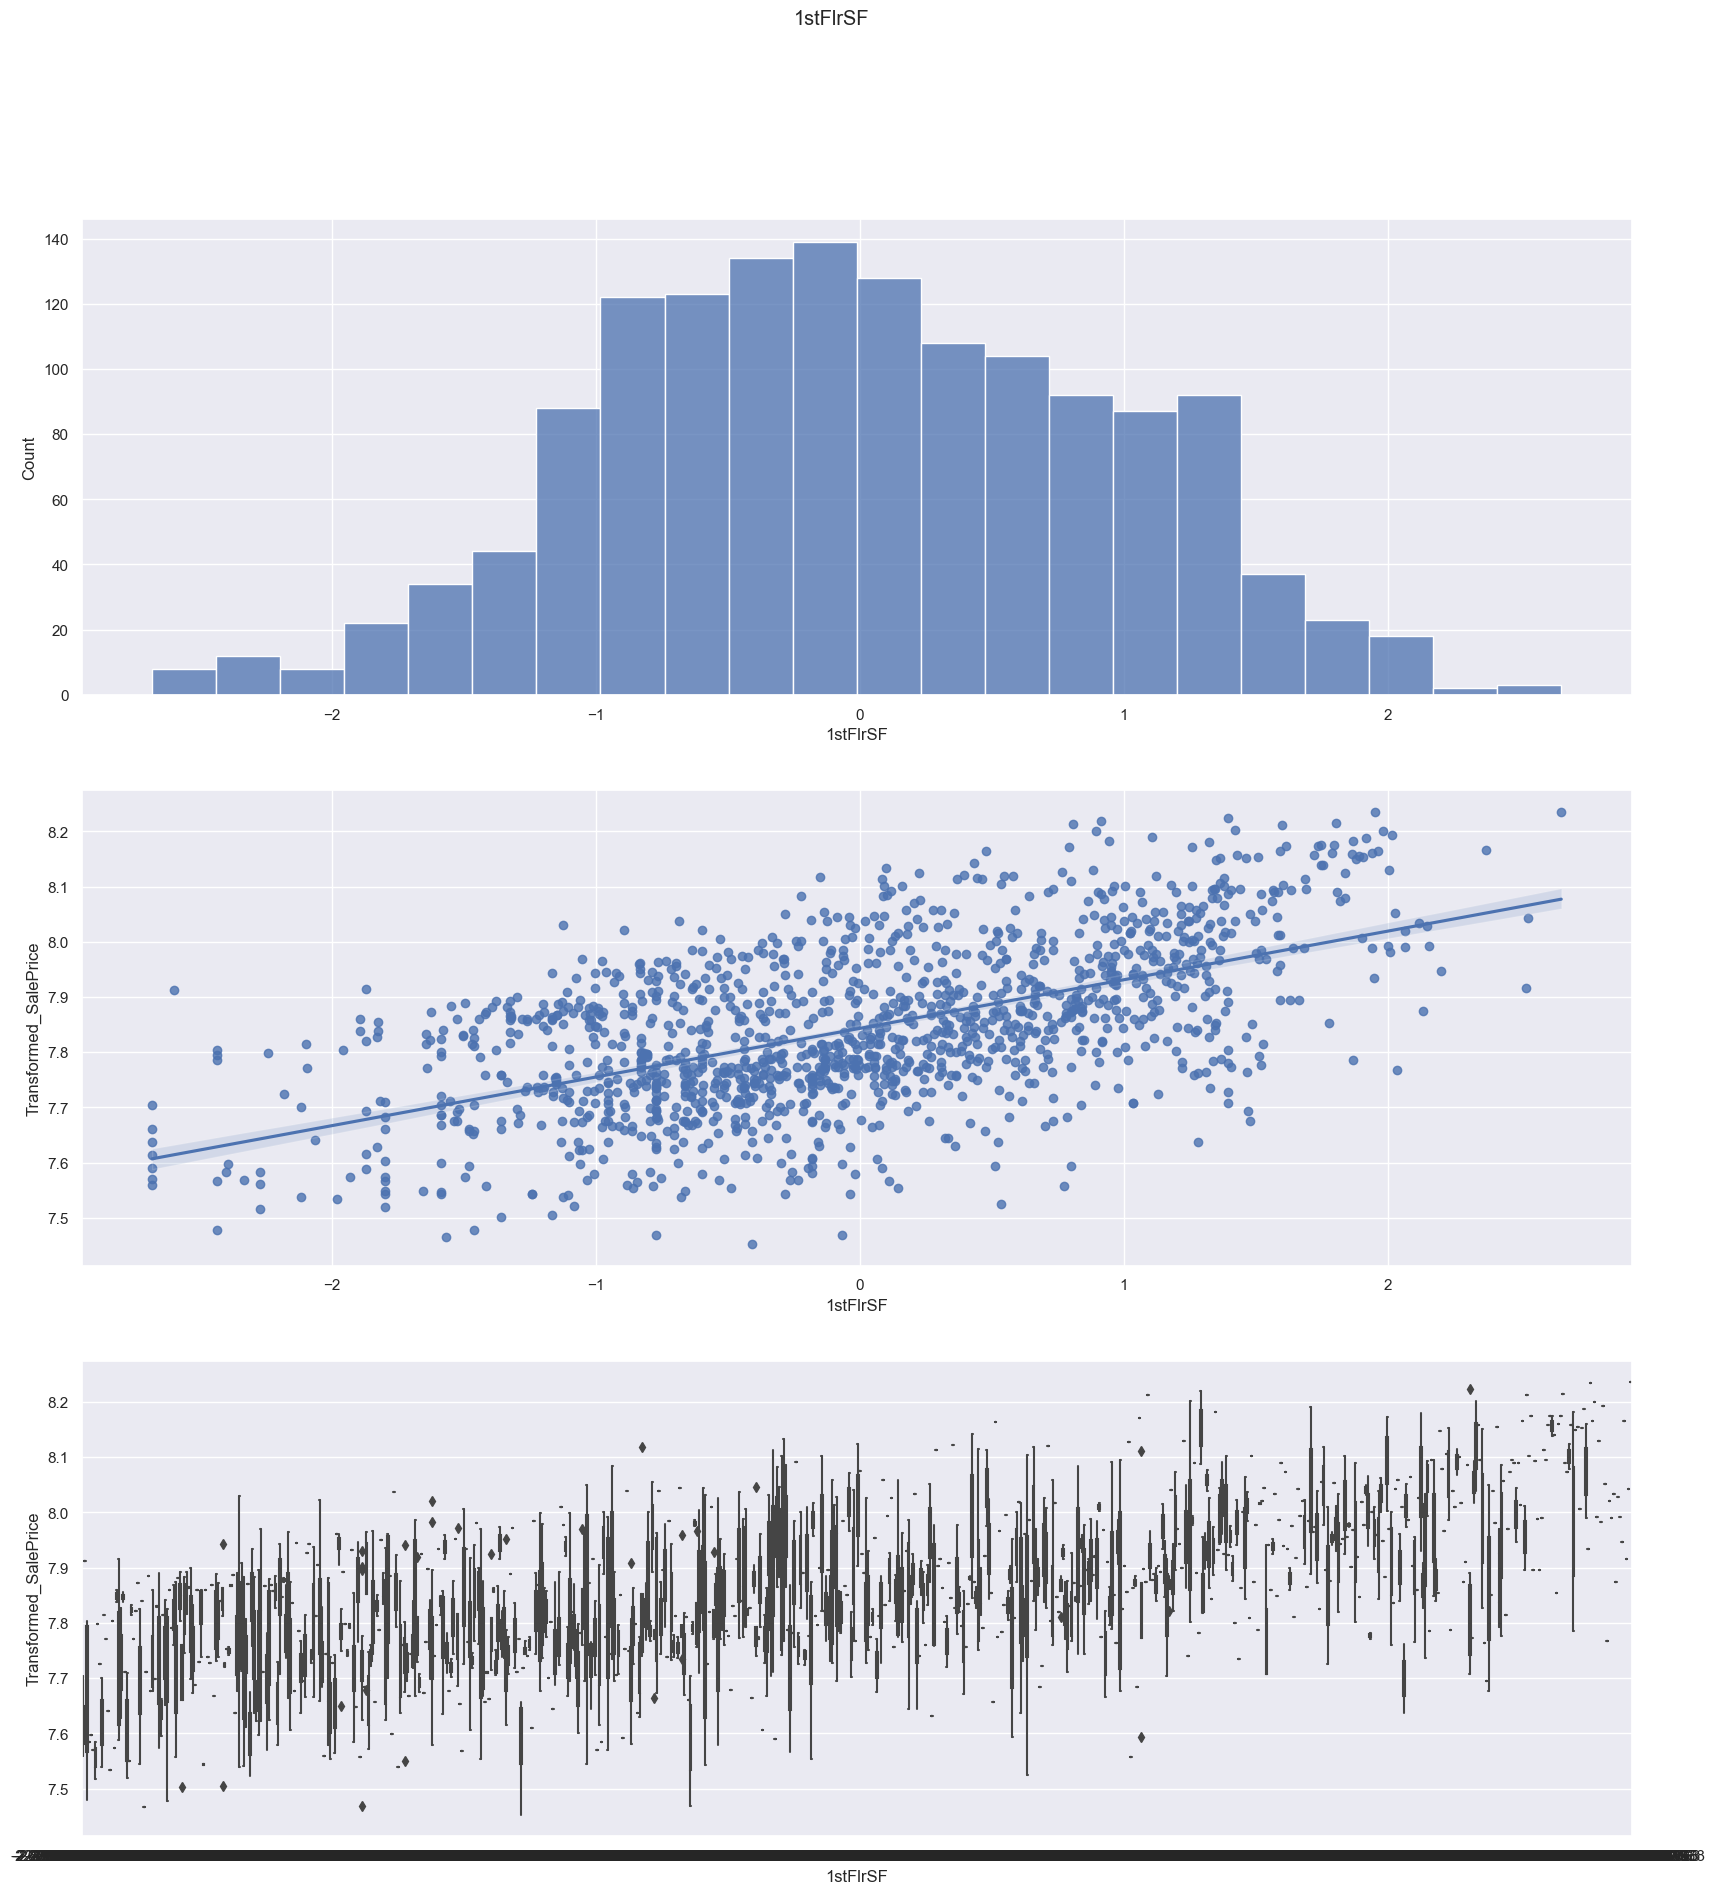

In [47]:
dummy2 = IQR(dummy1, '1stFlrSF')
simple_graph(dummy2, y='Transformed_SalePrice', x='1stFlrSF')

# 10) Splitting Data

# 11) Model Selection

# 12) HyperParameter Optimization

# 13) Model Training

# 14) Results